# Categorization of users
In this code, the DBScan algorithm will be utilized to categorize the users according to their attributes in users.json. This categorization can help automizing user related content in terms of their experience and usage of the Yelp platform.

## Step 1: Importing the required libraries

In [1]:
import pandas as pd 
from pandas.api.types import CategoricalDtype #Provides in-memory 2d table object called Dataframe
import numpy as np #Designed for high-level mathematical functions and scientific computation
from sklearn.cluster import DBSCAN #importing DBSCAN module
from sklearn.preprocessing import StandardScaler #for normalization/standarization of data
import matplotlib.pyplot as plt #visualization library
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from datetime import timezone
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Step 2: Loading the data

In [2]:
df_user={"yelping_since": str, "useful": int,"compliment_photos": int,"compliment_list": int,"compliment_funny": int, "compliment_plain": int,"review_count": int, "friends": str,"fans": int,"compliment_note": int,"funny": int,"compliment_writer": int, "compliment_cute": int, "average_stars": float, "user_id": str, "compliment_more": int,"elite": object,"compliment_hot": int,"cool": int,"name": str,"compliment_profile": int, "compliment_cool": int}
user_data=pd.read_csv('/home/jovyan/work/user.csv',dtype=df_user)
user_data["yelping_since"]=pd.to_datetime(user_data["yelping_since"], format="%Y-%m-%d %H:%M:%S")

In [3]:
user_data.head()

,yelping_since,useful,compliment_photos,compliment_list,compliment_funny,compliment_plain,review_count,friends,fans,compliment_note,...,compliment_cute,average_stars,user_id,compliment_more,elite,compliment_hot,cool,name,compliment_profile,compliment_cool
0,2013-10-08 23:11:33,84,0,0,1,1,95,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,1,...,0,4.03,l6BmjZMeQD3rDxWUbiAiow,0,"2015,2016,2017",2,25,Rashmi,0,1
1,2013-02-21 22:29:06,48,0,0,1,0,33,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,0,...,0,3.63,4XChL029mKr5hydo79Ljxg,0,NaN,1,16,Jenna,0,1
2,2013-10-04 00:16:10,28,0,0,0,0,16,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,1,...,0,3.71,bc8C_eETBWL0olvFSJJd0w,0,NaN,0,10,David,0,0
3,2014-05-22 15:57:30,30,0,0,0,2,17,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,0,...,0,4.85,dD0gZpBctWGdWo9WlGuhlA,0,NaN,1,14,Angela,0,0
4,2013-10-23 07:02:50,1114,5,1,80,57,361,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,16,...,0,4.08,MM4RJAeH6yuaN8oZDSt0RA,1,"2015,2016,2017,2018",28,665,Nancy,0,80


In [4]:
user_data.shape

(1637138, 22)

## Step 3: Converting the data into user statistics

Utilized raw data in user.csv:
- review_count
- fans
- average_stars

Utilized features gained from user.csv:

| feature | parameters used | transformation applied |
|:-:|:--|:--|
| yelping_since | yelping_since | converted into unix timestamp |
| friends | friends | count |
| votes_sent | useful, funny, cool | sum of columns |
| elite | elite | count |
| compliments_received | compliment_* | sum of columns |

Possible features gained from tip.csv (not implemented yet):

| feature | parameters used | transformation applied |
|:---|:---|:---|
| tip_avg_text_length | text | avg of character count of texts send by a specific user |
| tip_latest | date | date of latest tip given by the user |
| tip_avg_compliment_count | compliment_count | avg of compliments of the user's tips |
| tip_business_variety | business_id | distinct count of businesses the user has given a tip on |
| tip_count | user_id | count of tips the user has given |

Possible features gained from review.csv (not implemented yet):

| feature | parameters used | transformation applied |
|:---|:---|:---|
| review_count | user_id | count of reviews the user has given |
| review_business_variety | business_id | distinct count of businesses the user has given a review on | 
| review_latest | date | date of latest review given by the user |
| review_avg_text_length | text | avg of character count of texts send by a specific user |
| review_avg_votes | useful, funny, cool | avg over sum of all votes of the user's reviews

In [5]:
user_data.info()
#conv_data=pd.DataFrame(columns=['user_id2','user_id3'], index=list(range(1, user_data.shape[0])))
#converted_data['review_count']=user_data['review_count']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637138 entries, 0 to 1637137
Data columns (total 22 columns):
yelping_since         1637138 non-null datetime64[ns]
useful                1637138 non-null int32
compliment_photos     1637138 non-null int32
compliment_list       1637138 non-null int32
compliment_funny      1637138 non-null int32
compliment_plain      1637138 non-null int32
review_count          1637138 non-null int32
friends               1637138 non-null object
fans                  1637138 non-null int32
compliment_note       1637138 non-null int32
funny                 1637138 non-null int32
compliment_writer     1637138 non-null int32
compliment_cute       1637138 non-null int32
average_stars         1637138 non-null float64
user_id               1637138 non-null object
compliment_more       1637138 non-null int32
elite                 71377 non-null object
compliment_hot        1637138 non-null int32
cool                  1637138 non-null int32
name                

In [6]:
user_data['votes_sent']= user_data['useful'] + user_data['funny'] + user_data['cool']

In [7]:
user_data['yelping_since']= user_data['yelping_since'].values.astype('float64')

In [8]:
user_data['compliments_received'] = user_data.filter(regex="compliment").sum(axis=1)

In [9]:
user_data['friends_count'] = [user_data.loc[i,'friends'].count(',')+1 for i in range(0, user_data.shape[0])]

In [10]:
user_data=user_data.drop(['elite','friends','funny','useful','compliment_photos','compliment_writer','compliment_cute','name','compliment_profile','compliment_cool','compliment_list','compliment_funny','compliment_plain','compliment_note','compliment_more','compliment_hot','cool'], axis=1)

In [11]:
user_data.head()

,yelping_since,review_count,fans,average_stars,user_id,votes_sent,compliments_received,friends_count
0,1.381274e+18,95,5,4.03,l6BmjZMeQD3rDxWUbiAiow,126,8,99
1,1.361486e+18,33,4,3.63,4XChL029mKr5hydo79Ljxg,86,3,1152
2,1.380846e+18,16,0,3.71,bc8C_eETBWL0olvFSJJd0w,46,1,15
3,1.400774e+18,17,5,4.85,dD0gZpBctWGdWo9WlGuhlA,48,4,525
4,1.382512e+18,361,39,4.08,MM4RJAeH6yuaN8oZDSt0RA,2058,293,231


In [12]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637138 entries, 0 to 1637137
Data columns (total 8 columns):
yelping_since           1637138 non-null float64
review_count            1637138 non-null int32
fans                    1637138 non-null int32
average_stars           1637138 non-null float64
user_id                 1637138 non-null object
votes_sent              1637138 non-null int32
compliments_received    1637138 non-null int64
friends_count           1637138 non-null int64
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 81.2+ MB


## Step 4: Preprocessing the data

In [32]:
x = user_data[['yelping_since','review_count','fans','average_stars','votes_sent','compliments_received','friends_count']]
y = user_data[['user_id']]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.999)

In [33]:
xTrain.shape

(1637, 7)

In [34]:
yTrain.shape

(1637, 1)

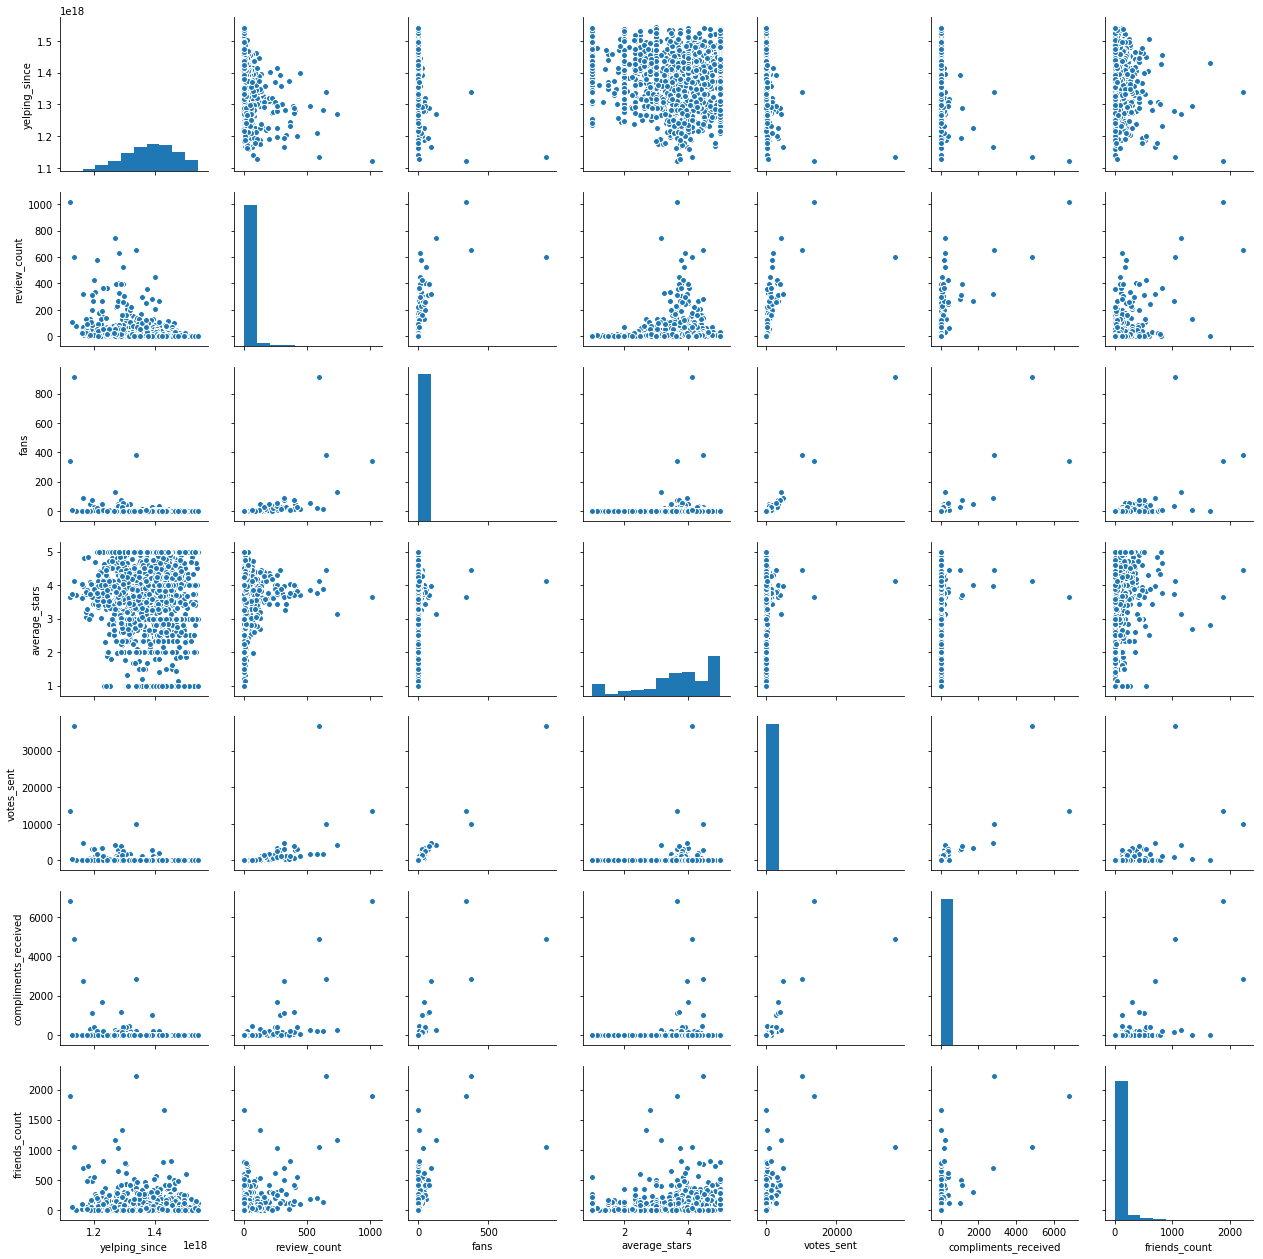

In [35]:
sns.pairplot(xTrain)
plt.show()

In [36]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
x_scaled = scaler.fit_transform(xTrain) 

In [37]:
x_scaled.shape

(1637, 7)

In [38]:
x_scaled=pd.DataFrame(data=x_scaled[0:,0:],    
...              index=range(0,x_scaled.shape[0]),    
...              columns=xTrain.columns)

## Step 5: PCA (just for analysis of variances)

In [39]:
pca = PCA(n_components = 7) 
X_principal = pca.fit_transform(x_scaled) 
X_principal = pd.DataFrame(X_principal) 
format(pca.explained_variance_ratio_)

'[0.52091545 0.14943786 0.13812116 0.10053933 0.05908908 0.03015224\n 0.00174488]'

## Step 6: Applying DBScan

In [40]:
db = DBSCAN(eps = 0.3, min_samples =5).fit(x_scaled) 
labels = db.labels_
print(np.unique(labels))

[-1  0  1  2]


In [41]:
labels.size

1637

In [42]:
x_scaled['labels']=db.labels_
x_scaled.head()

,yelping_since,review_count,fans,average_stars,votes_sent,compliments_received,friends_count,labels
0,-2.351798,2.720519,0.370440,-0.040700,0.584142,0.212184,0.593692,-1
1,1.459939,-0.331128,-0.081683,1.130021,-0.092543,-0.077620,-0.368631,0
2,-1.878912,-0.315558,-0.081683,1.130021,-0.088681,-0.077620,-0.368631,-1
3,-1.445359,0.727607,-0.044006,-0.678481,0.021364,-0.060820,-0.346924,-1
4,1.378895,-0.299989,-0.044006,-0.031963,-0.090612,-0.077620,-0.231156,0


## Step 6: Visualizing the data

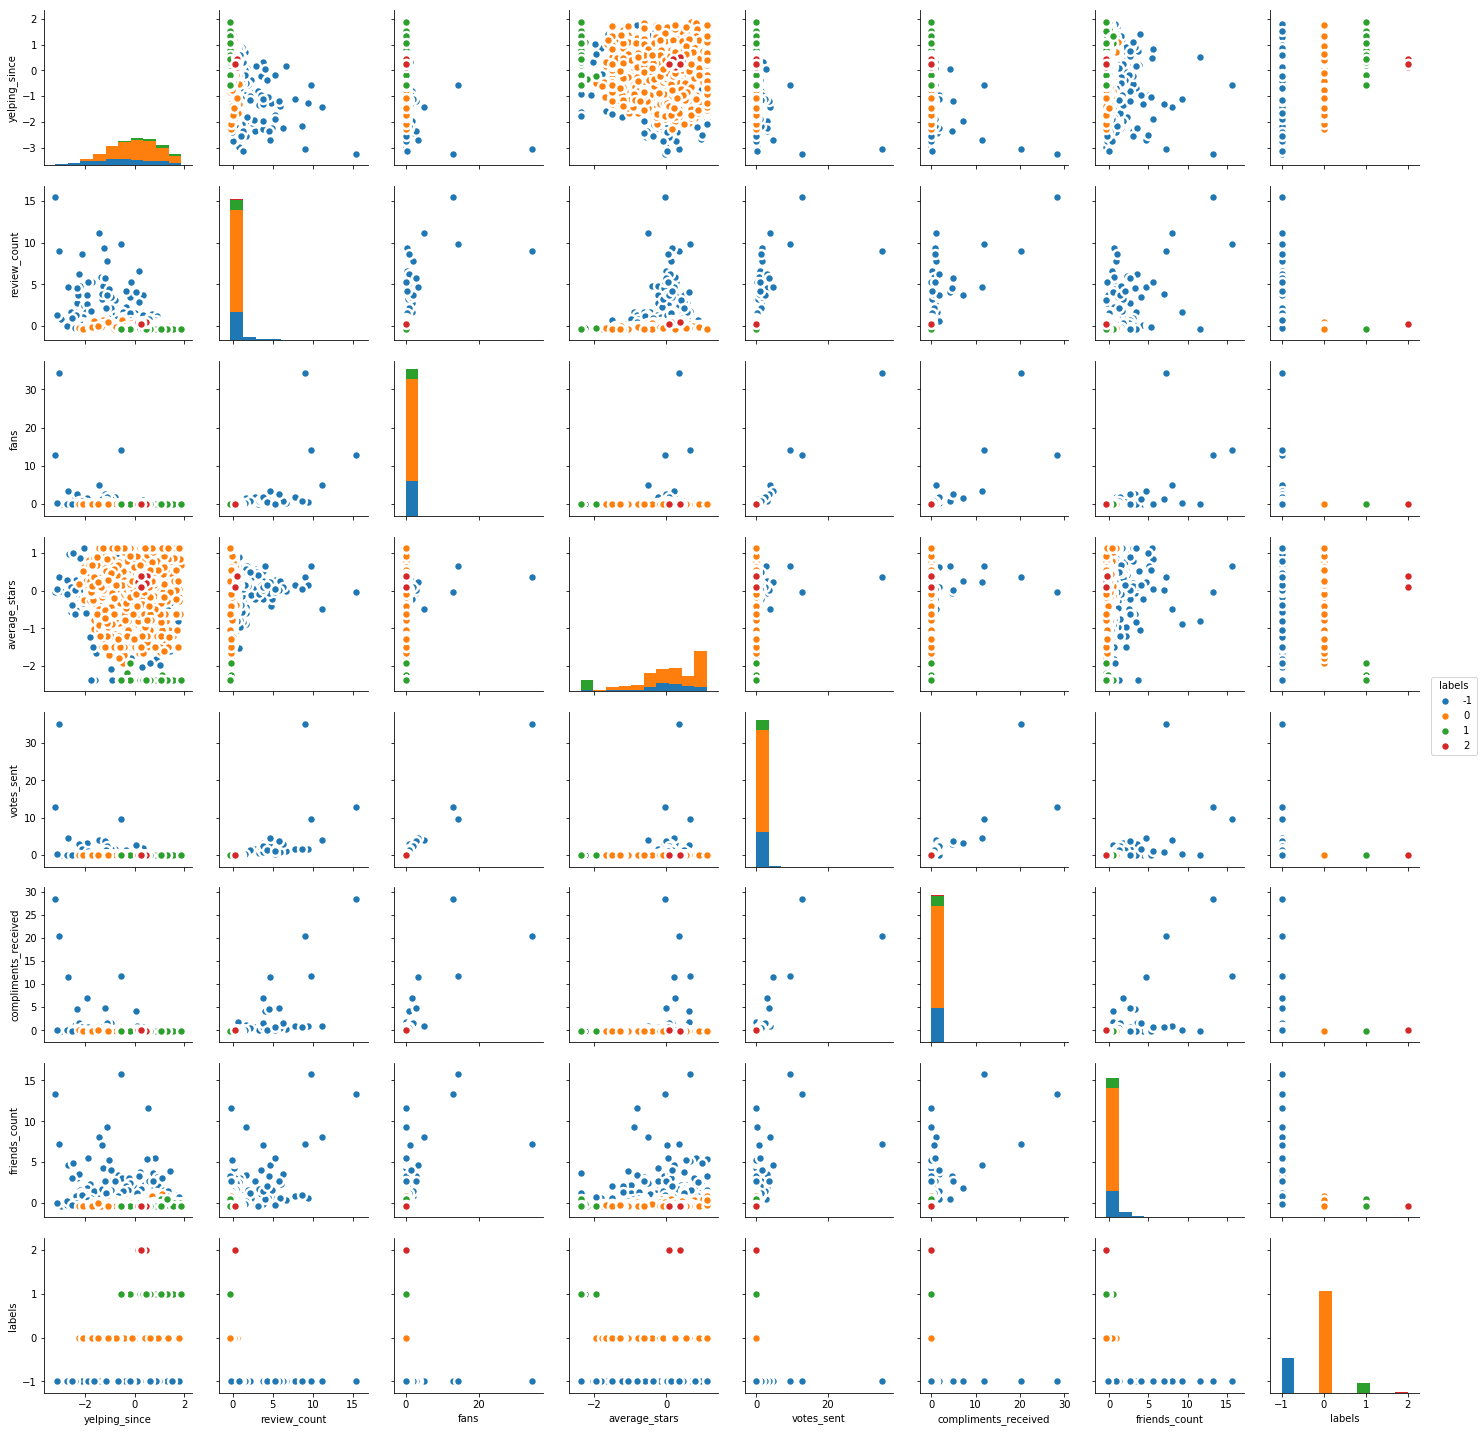

In [43]:
sns.pairplot(x_scaled, kind="scatter", hue="labels", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [187]:
xTrain['labels']=x_scaled['labels'].valuesdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABckAAAWYCAYAAABte06yAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzsnXl8VPW5/z8nmSQz2ZMBspOgZUkMJCIgSESs0FILatVC5GpdqZW60NvbW+293vv79fbnrb1Lxa1al7bKVYJVXFCpNhdRFAQKYUsMUSBmI8tkTybLTM7vj2/OnGXOzDmTbc6Zed6v17xmzvds35k8+S7Peb6fh+N5HgRBEARBEARBEARBEARBEAQRjkQEuwIEQRAEQRAEQRAEQRAEQRAEESzISU4QBEEQBEEQBEEQBEEQBEGELeQkJwiCIAiCIAiCIAiCIAiCIMIWcpITBEEQBEEQBEEQBEEQBEEQYQs5yQmCIAiCIAiCIAiCIAiCIIiwhZzkBEEQBEEQBEEQBEEQBEEQRNhCTnKCIAiCIAiCIAiCIAiCIAgibCEnOUEQBEEQBEEQBEEQBEEQBBG2kJOcIAiCIAiCIAiCIAiCIAiCCFtM5yRfs2YND4Be9Jqo15RBtkuvSXhNCWS79JqE15RAtkuvSXhNGWS/9Jrg15RBtkuvCX5NGWS79JqE15RAtkuvSXiFJaZzkre1tQW7CgQxJsh2CbNCtkuYFbJdwsyQ/RJmhWyXMCtku4RZIdsliInBdE5ygiAIgiAIgiAIgiAIgiAIgpgoyElOEARBEARBEARBEARBEARBhC3kJCcIgiAIgiAIgiAIgiAIgiDClqA6yTmOy+E4bg/HcVUcx53iOO6BYNaHIAiCIAiCIAiCIAiCIAiCCC8sQb6/C8BPeZ4/wnFcAoC/cRz3Ic/zlUGuF0EQBEEQBEEQBEEQBEEQBBEGBDWSnOf5Jp7nj4x+7gFQBSArmHUiCIIgCIIgCIIgCIIgCIIgwgfDaJJzHJcH4GIAnwe3JgRBEARBEARBEARBEARBEES4EGy5FQAAx3HxAF4HsIXn+W6V/T8E8EMAmDlz5hTXjiDGTqC263A6sL16O6ocVci356N0binsNvtkV5MgvBhLu0v2SxgBst0woq8VOPgc0HQMuPwfgJzFwa7RuKFxA2FWyHYJs0K2S5iVsYx5Xe4RWCIjfG4TgUHtQejB8Twf3ApwXBSAXQD+wvP8f2sdv2jRIv7w4cOTXzEiXOCm6kZatutwOrBh1wY09zd7ytJi01C2towaWsIXU2K/etpdsl8iQMh2jYLU0ZxRBCzZBMRNn5Jbj2ui1tcKPLsC6G4EFqwHrn9OLJ/c70PjBsKskO0SZsU0tusaccESYYg4RMI4GGbMS0wsYdCXTVnbaySC+siI4zgOwAsAqvQ4yAkilNlevV3WwAJAc38zyqrLglQjgtAP2S9hVoJuu+5h/9uTieBo3vsocHo3e392BSufApQO8YAimQ4+xxzkALDsPvYe5O8z1QTddglijJDtEmZFy3YtERZ0DHTI9r+47yzaegenrI4E4Y+23kH89sPTuPNPh/DbD0+TbY4D6stCk2Cvq1gO4BYA3+Q4rmL0dXWQ60QQQaHKUaVaXumonOKaEETgkP0SZiXothsZ5X97ApBOiN6qaBB3CI7mlDwgayF7724EDj3v+2J9rUDlW0D7We99DX8DBiSqeVoPAPpagT2PAK9sYO+BOLOLbmIR5Cl5QMYC+feR4u/7jOf+BiDotksQY4RslzAremy3pqNGtu/NigasfXwfOSOJoNPWO4i1j+/D1vIalFe1YGt5jXFt0wRjNOrLQpOgrgXieX4fwjSEnyCU5Nvzsbd+r1d5gb0gCLUhiMAg+yXMStBtd7zyIBrnCxOi890DAIBIDri2OIvtjEkA7v6YnSfQdAw4+7Hve1W/Dyz8gfr+rEuAfoe47e8BgFQuBWCR30dfZvXR8/1TZzGJlRN/ltddICUPiE0F+tuBxgr17zKe+xuAoNsuQYwRsl3CrOix3ez4bNm+xbmpeOHTs9h2oBZbVs2Z9DoShC9e3l/rGQ8KnO8eMJ5tmmSMRn1ZaBLsSHKCIEYpnVuKtNg0WVlabBpK55UGqUYEoR+yX8KsBNV2xysPouN85YSo0ymJ5r7sPrmDHGDbl92nfr/az0QHua8In1iJBqPyGKkDfaKivuffKK/7gvVsEvXAMWDTHva+bqv39QK9vwGhdpcwK2S7hFnRY7uZCZmy/d9byB5Mn2jomvwKEoQfTjaq26DhbNMkYzTqy0ITyipBEAbBbrOjbG0ZyqrLUOmoRIG9AKXzSpFqTQ121QhCE7JfwqwE1Xb9TQJWPjQh5ysjhgaHR+THBxLJnr5APEcrwkftmKYKYOMOti2N+pYylqhv1yBgiQFKtgBRsd7nJ6Szd9cwYIkK/P4GhdpdwqyQ7RJmZSy2W5iVhJxUG+ZnJU1hTQnCm8LMJJRXtSAn1YbU2Gi09w+hrt1pPNs0yRiN+rLQhJzkBGEg7DY7NhdvDnY1CGJMkP0SZiVotjveSYCO84uyk1B2qM6z3d4/JB4X6HLW1Fns3Zdz/sSfgaX3+D6mtVr8nFHE7qcks9i7TOthgCWGlQkOcl+Of4tE7iWQ+xsYancJs0K2S5gV3bbb2wLEzwAAfGN6PG5ZmgsAcLlHAktUTRATxF2Xz8LV89MxNz3RU1Z9vhuZybYg1koFE43RqC8LPah1JgiCIAiCCAZKqRMBX5OAvlZg/9MBnb+mMB3piVbxlCTx85iXs/pyzneJznh0N4nJQAU6zrGob4A5rhPlS9KRmAks3qT/fv6izrUkbAK5P0EQBEHoxDXiYh84MfXaf68vgj2ePdD9a1VzMKpFEEiwRskc5AAwNz0RCdaJTxo/LmiMRgQRiiQnCAPhcDrw3tn30NTbhIz4DFw962rYbXbtEwnCAJD9EmYlaLa7ZBOL3JY6qn1NAqRR34tuB6Jsus5PjYvBrvtLsO1ALU40dOEfVksSM401kt1XhE9Sjvj52ifk99n/JFB3UIz6jpvOItYPPc/ul1nM6h03Tf/9xhJ1LhDI/Q0MtbuEWSHbJcyKlu1+VPcRVuWukq3ISoljfd+Ow3Vo7h7AmimvNUEw2noH8fL+Wpxs7EJhZhJuWZaLaaMPcAyDicZo1JeFHuQkJwiD4HA6sGHXBjT3i9EFfzr1J5StLaOGljA8ZL+EWQmq7QYyCTj+GtPWnncNc5AHcP60+BhsWTXH+5pjXc7qyzl/yW3qx2cUAdc/B3zxrrw8brp/7fU+BxBnD+xhQiCOf637GxxqdwmzQrZLmBUt23U4HXjzyzeZk1xCZ/8Q3CM81i/KUV6SIKaMtt5BrH18nydfTXlVC8oO1WHX/SXGdJQbfIxGfVloQnIrBGEQtldvR3N/M7Ljs1E4rRDZ8dlo7m9GWXVZsKtGEJqQ/RJmJei2K0wCNpaxd19RMss2A5v2AFc/Orbz1QhgOWtb7yCO1XWK97z7Y2Dlg8CcNex980HRed/XCux5BHhlA3sXpE7mfVe8YOVb3g7tpmNA1dvi9if/5ft+d3/iO+o8Jc9b6kXp+B/oBpor5WXNlcBAj/c1DUrQbZcgxgjZLmFWBNuVIrVdu82OVTNXeZ2XHBvtkVshiGDx8v5ar4Tu57sHsO1AbZBq5IMhJzDslJcNO1m5gaC+LDShSHKCMAjxUfEoW1uGAnuBp6zSUYlD5w8FsVYEoQ+yX8KsTLXttvUOYmSExwyJTnjQCCCS/a+VzXAOu1GUkyyeqxbhozcZaO5l7LjIaMCWCjjbAfcQc34DrD4HngKSs4Glm/VHFK34GXDlL8TtpmNAxf94O/6tiUDUbHnZtDlApHmGxtTuEmaFbJcwK1WOKtXySof40PW62depHtMzMIz+ITfSJqj/N4VsBmEoTjZ2qZafaFAvDxrRKolEowyWXBTUl4UqHM/zwa5DQCxatIg/fPhwsKtBhA6c9iETA9kuMQlMif2S7RKTQFjablvvIH740mG8sXl5YCf2tTKt7aZjLFJ6ySa5wxkAag8AjUeABd/33jcOup1DSLRF6z9hzyMsWaaSlQ96O7n7Wn076N/YBBzfwT4vWA8su1eeqLTtNHD6L8Bl97HtznrmUJ98aNxAmBWyXcKsGMZ2n6p4Cs8ce0ZWtvaCtXh46cOIjYqd7Op5UMpmAEB6otWYshmEYca8v/3wNLaW13iVb1k1W12Wjwh3pqztNRLmCZchiDDA4XRge/V2VDmqkG/PR+ncUrme1WAfEBMXvAoShB807ZcgDMpU2e7L+2vhHlEEJ2g5wLUis93DQGQUkLkA+MO3gf1PiPt6W4Cv9wNzr2bHqCGc72P7tj8cwu9/sEj/pHsiNMHrDooOcp9EyJ3mgoNczwMFgUCONSjU7hJmhWyXMCOlc0uxs2anR3Ll54t/jpsLbvbs12PXR2o78NRHX44r+tufbAY5Owlf3LIsF2WH6rwertyyNDeItfKBScZo1JeFHuQkJwiDoEz8sLd+L3bW7JQnfmg+AcxcGsRaEoQ6uuyXIAzIVNruycYutPcPiQX9DnUH+I/2AbGj9z74nDxhJcC2Dz3PHMyCQzsqFshdDtR+Ku6LnwEUXOu7QkNOFiMidZKPuAC3C4i2weUewZGvO3GqsQtXzJnB9mtNWgJJBjriAiJUhqKZFwOX3g18/iyw5tfA0nu8j5n2DfYCAH4E4CLUHyic2QNs3AHYUuTn65WFMTDU7hJmhWyXMCt2mx1la8tQVl2GuKg4Lwe5P7t2uUdgiYzAwtwUJMREYWt5zZiTJppGNoMwFNPiY7Dr/hJsO1CLEw1dmJ+VhFuW5hpPL98kYzTqy0ITStxJEAZBKxEMACA6foprRRD60GW/BGFAptJ2b1yYjRduXSwWxNqBm7YzORGB7kag6h1xO5DI7KyF7NWlcKpLE2nuf1osj7Z5azxG2TxakJbICOSk2jA3LUG8zrMrmJzK6d1Ax1mgt1V+/oqfMQe3FGkyUKnMn5qDHGBO++/8BthyXHSQ97UCdT40HrnR4WxULJBXwj4vWM8mU3d+6O0gB/w/fDAJ1O4SZoVslzAzdpsdm4s349aLbpWVa9m1JTIC7X2DAIC7Lp8FYOxJEwszk1TL52eplxOEwLT4GGxZNQcv3LoYW1bNMZ6DHDDNGI36stCEIskJwiDoSQRjpCenBCFFl/0ShAGZStv9zvwM78KMIuD651j09O5R6ZH6vwGX3Cbu1xuZ/a1feZcpo9UjLMCyzeJ+jcjwkm9MQ3rSqCNdOmnxFeEtOLjnfx/4+D+9tcY5P/KGX7wHNFUw/XFrIpAsWf7rGgJyFvuvc3Qc+y2X3QdkLPB9HyCwhw8GhdpdwqyQ7RJmpq67DjmJOV7leux635dtuKYoC4VZSchJtaGu3Tmm6G9TyWYQhuH9E03ISY1FoeRhysmGLtR39GNNocoYNViYZIxGfVloQk5ygjAI+fZ87K3fi+z4bCRbk9E50In63npZtmRYk4NXQYLwgy77JQgDMuW268vBu3Qz0HiUaXEnZYrHL9nElphKI2qkkdluFxDpZzjn+AqIjGYR5v3tACSR3DqWs2YkWcXju5vYdXKWySO81b5P9mJgo49IGl/nzLsasEQzB7mSpCzddfY4yJX3ufyngGU0YiqQhw8GhdpdwqyQ7RJm5u0zb8PR78C/XPYvsnLBrpVI7fqaoizP55TYaNS1O8cU/W0a2QzCUPz5SD3Kq1qQk2pDSmw0OvqHUNfuxFX5M4zlJDfJGI36stCE43le+ygDQdnSiQnGMNnSe4Z6cL7vPGanzPaU1XTUICMuA/Eks0KoY5hs6WS/RICEp+0qHbwAc3gLDt6mY8CrpcDdn4iR18J5h55nETTKyGxfDPcz+RElHbVAymik2Z5HmHTKRTcA0+cAraeBU68DKx/0JNTsGRhEgtXHpFvr+whIk4HqPUfq4J51hRj9LtRZiaTOnntuXSC/z/qXgYJrNOrxidZvS+MGwqyQ7RJmxTC2CwCuERcsErmw4ZFhREVEeekTA0BabBp2rNuBVGuq13V2HK7Df39wGu/eX0LO7dDGMGPe3354GlvLa7zKt6yabayEr2Mfo00pYdCXTVnbayQokpwgDEJCdAISohNkZdIG10P9YSB70RTViiD0odt+CcJg6LHdjoEOpFhVdK0DRSsJZ0YR8KNPgdjRyfSXfwW+sYo5j6UOYCU954F3HpBHZas5yAHRQQ4A89Yx5zInSVFz4/PA+VOeTZ8Ocj3fBwD+cDUwMsy0wfWeo5wc9bWITnK9S3Ajo1gEvZTPnxGd5HHTmWM+0IcPBoLaXcKskO0SZsaiyKcRFcEeAkuTelY6KlFgL0DpvFLRQf7ZE8Bgj6efXr8oB98pTEeCNUp5Cw9tvYN4eX8tTjZ2oTAzCbcsyw04ySdBCAgyPVEWDqmx0WjvH8KwizeeTI9JxmjUl4Um5CQnCAPhcDqwvXo7qhxVyLfno3RuqXdm5MHe4FSOIDTQZb8EYUC0bPef9/0zfrn8l+O3Zz0OXsFBfuBpplH+3f8CFt+lfp4QoZ2QziRK9j7KpEc2fy5KlvjTHM+Y731NLkK9XLhORDRwxT/o/z62ZKCnSdz2dY402ajSkd7fLn6eswZo/QLoOCc/X20Jri1Vflx3g3y/1sMHE0DtLmFWyHYJs+LPdoWknqpE2YAP/lkmESY4yI9+3YGLZ8ofxrf1DmLt4/s8uuPlVS0oO1SHXfeXkKOcGBPT4mOw7+dXwhIpBke43COybcNgkjEa9WWhR9Cd5BzHvQhgLYAWnucLg10fgggWyiV6e+v3YmfNTpStLZM3tNmLg1RDgvCNbvslCIOhx3b7Xf0oqy7zmvgGHOEViMZi7nL2nr2Evfc7gJ0/Aob6gGEn4GwH3EOiTMmye5meeXcjk1qxJvrW79brRBeQXmfedwP7PjzkTm5f52RfIn5WOtJzlojyMYtuZ6+mY8D+J9l3lmq09zQBCaO6ms52+XUWSR42VL4FpOSx+kjv21kL5F/jXT8DQu0uYVbIdgmzEqjtdgx0wBJhYdGmxRuBd3/qtXpq64encfMy70jel/fXyhJzAsD57gFsO1BrLGkMwlQoHeKGdJAPOZnQR5RNLBt2sjFltM3XWVMO9WWhiRH+I/4IYE2wK0EQwWZ79XaZhh0ANPc3o6xakfgsJm4Ka0UQ+tBtvwRhMPTYbvH0Yq9M9UKE19byGpRXtWBreQ3WPr4Pbb2Dvm+2ZBNz6EpROnj7WtnnjCLg+t+LSSg/fxao+QCo/RRoPMIipIWJtnB8Sh57JaSzMl/SJsP97LPg/N77KHNc732UbQt1EJBep1mUYtH8PgDQcorVtee8+jkpecCcbwMF14llUsf1ml8D1z/nLR+TUcTK7/qrXKMyalQD0j3MHiJIySsRP1e8wr7r1iLg91ey92dXAEf/B2aB2l3CrJDtEmZFr+0OuAbwm0O/wYqyFXi58mVWGBUrPgCXrLi6dXmeqib5ycYu1TqcaFAvJwg9tPUO4sV9Z/Grdyvx4r6z/setwSLaJneQA2zbQA5ygPqyUCXokeQ8z3/McVxesOtBEMGmylGlWq50zEgx7PIoIuwYi/0ShBHQY7u5ibmIipRrho4pwktLY/HTJ4DKnWJ0eMG14rm6pE1S5Sl21M7R40Q/8Wdg6T3q1+k4B/S1sTprfZ++NnZ8YiYQFSf/Db7eD6TNB1JneddxySYW8Z5XItbDV8S7dHXVsBOwjmpDRkZ5121GgXisENHecU4uyaIW1W9QqN0lzArZLmFW9Nqu1WLFnq/3eO9Lnskedkv6muRYRf6MUQozk1Be1eJVPj8rKdBqEwQAoGdgGI7eQdxRIo69qs93I8YS4VcbPyjoWekYZKgvC03Iu0YQBiHfnq9aXmAvUC0H5MujTjZ0GfNJMBEWjMV+CcII6LHdIfcQSueVyvYHHOH1xXvsXdBY3FjG3qVJiNY8Aty0nTmQAcBiFfdJo6ulSJ26znZAmlBM7RxB8xzwdqIvWM8cy1IHOcCWiEsRItG1vg8/whKD3v2J6LwWzsm/Rt1BLuy/+2Ng9b+xbb0R70LUkfC9lHWLkkTq6YmCNzjU7hJmhWyXMCuB2G5STJL3vs6vvfoal3sE759owp1/OoTffngaLvcIAJZkMT3RKrtmeqLVeEkWCdOQYI3C3PREWdnc9ERjOsj1jPuCDPVloYkpnOQcx/2Q47jDHMcdbm011j8GQfgjENstnVuKtNg0WVlabJqXY8YXhVlJeLL8S3KUExNCoO3ueO2XICaKybDdqy+4GqnWVNkxhZnqkVzSCK9Hd38h7miqAN7YxCbI/sgoUtfE1nLquoeBolKg9FX/5/hyoguyJmqO9YJrgWueYJ9T8lgknB7iZ8gd58rJDc/Lt93D4ue46doR74LUjEDTMfYbP7uCvQsSL2oIjviVD7JkoIIzX+rkDwJTOW4giImEbJcwKxNpuy39YuR312CX3K5dg8Csy2V9zcCwCyWP7sE9/3PEI932q10sOnVafAzee6AEW1bNxlX5M7Bl1Wy8e3+JR5qlZ0DSZxJhyVj8ZG29g/jth6c9D2UM6TvQO+4LMtSXhSYcr5ygBKMSTG5ll57EnYsWLeIPHz486XUiwgZO+5CJQY/tOpwOlFWXodJRiQJ7AUrnlXo5ZvxxsqELf61qpmQu4cOU2K/edne89kuEFaa3XUGTXCq5kp5o9UxgT9R3Yd2T+7DrvhIUZiWJUTEps4Db3xMvFMhy0r5W39ImvvB3jlCnvBLmINeqT9XbwNcHgG8/wrabKoAMHfIkQ31AdID5NFwDYiT9KxvUk33OWcOixAHgnQeA88dZklBBPkW6f+IIqXEDEVaQ7RJmxTS22zvUi/holhtjW+U21Yfssmv1DuKSX/3Vs31dcRbuunwWGzf44e2KBpxp6wt4zhdwwnFiIjDMmNfX2HXX/SXGsgM94z6DEOJ92ZS1vUYi6JrkBEGI2G12bC7eHPB5zd0DSEu0ojArCS8fqJ2EmhGENmO1X4IINmOx3WnxMdh1fwm2HajFiYYuzM9Kwi1Lcz0RXi/sOwsAeP6Ts3istFiu382PAFyE6KQWomVO72Za3IImuRJBPsQfnaN9QHKu9jlCnUbcbFurPvnXyKPcBQd5vwOofBtoOAIkZng7+gUHeV8rUPuZqLXuHmba4QLSbaXUjNpkSSo1s26r+LnpGLD/SSD1AvXvHUJQu0uYFbJdwqz4s13BQQ4ANxfcrH2t+BjkpNpQ1+7Ev64rwO3LfciQKfiPD6oxJy1B+0AJSgdpeVULyg7VGc9BSkwaY8qnEwz0jPsMAvVloUfQ5VY4jnsVwH4AczmOq+c47s5g14kggkHPUA9qOmpkZTUdNegZ6tE8d0+1uLSvOIeSuRBTz3jslyCCyXhsd1p8DLasmoMXbl2MLavmeBzkL+47izcrGgAAb1Y04MVRh7nHYc2NDr8CWU762RPeGuJNx1i5gGuQOceTJXql/iRHhDoFKmsipa8VeKYE2LUFOPqSb91IaSS9gCIZqtd222n2LsjGpOQBWQvZuz/98IwiFhlf8vfedah8y/d3MRnU7hJmhWyXMCsTYrtuuUxKSmw0rivO8jjIteQwTtR3oa7dGXACT38OUiI8EPLp5KTaUJSdhJxUlsvFZz6dYBHouC9IUF8WmgQ9kpzn+ZuCXQeCMAIvVb6EZ449g0Vpi5AZn4nG3kYcbj6Me4ru0Xw6KZVNWnMRc3a43COyxJ4EMZmMx34JIpiMx3a7nENIskUryoZxvF4+2fjlrkpkJluxpjBDfgGl01ugscK7bLBn1MmcB9hSWZLOnCVicksAsIxGgg32AjGj0WyNR4C5V/v+Es4OwJbCPnc3qR/TJXGcV74DzF4NRI1Geh98DoiMZpMYQepEcKxLI9iF4zIWiGVaUjOn3gKu+Bkre+C4IurcBUSODmMHulnkuPI6lhj5vZ5dwbRgQwRqdwmzQrZLmJUx2e5b98lXWSkeCGclW7Fphegg14r2fmHfWVkCzy+aujEtIUYzGjzghONEyHHjwmz8ZNUcmZzPyYYu1Hf0+zkrCGiN+wwC9WWhibGsjCDCmPioeJStLZNlQ650VOLQ+UOa525YxJKoudwjSIljA6Rf7arCvVd9g5bPEVPCeOyXIILJeGxX6SBnZVF4rLQYC7KT8MtdlQCY3uPiPBV9wkCWky7ZxKRPOs6x15pfA0vvUa9YjLjc2+Mg9+WQFhzkAHDtE8CSu5jD+fgOYMF6YNm98mSeectFBzkAFN0EXPkLcVuQOlE6+puOAWkXidt6pGaq3wPmfJs51r2izkeHsO5h4OlLtSVrBCe9VMM9ED14A0LtLmFWyHYJs6LXdgdcA7AKsmFOB1tp5UNO7dEbFiBxdDyhRw5jQU4SHl6b71m99szeM8ibFqspl1GYmYTyqhav8kAj0gnz8p35GV5lhVlJmhr4QcHXuM9AUF8WmhgicWcgUOJOYoIxVCKYieLFfWfxy12V2LJqtrH0xYiJxjCJYAgiQELGdv0lwXrukzPoG3TJtMplKB3FAFtOevcn6gk5hSSc0fHAZfeJZVqOXuE+kdFAbCqL+HYP+dY+B4Cm4/Ko70BRnt9zXpR1AYA9jzBpFiUrHxQj0KXX8Pc939jEnPq+rgOwJFAJGcC6x8Trqf72fn4TRkiOG4iwgGyXMCums90h1xCiLaMP0l/dCFS/yz4r+yYFd/7pkKoj+6r8GXjh1sVe5cKcz9d+KVoJx4lJI2TGvFOKyQMZQgRK3EkQRHBxOB3YXr0dVY4q5NvzUTq3FHabXfXYgSE3fvzqES+nTFVTtyd6kZbPEVOJa8QFS4TF5zZBGJVA2l4pWsuiN12ukThSmsyzsYJFkC/epO4gF46XTq71Jv6s/Qy4abs8IrzpGPD1fjERp3I5uB7ntL/9Sge71EEu3F/JgvXAglJxW7jGQLf/77nsXm8nuTKSPaMIiE8Tt/3pr2slRzUQ1O4SZoVslzAr/myX53lwHCc6yAGg5ZT4WUVOrbN/EMmxbB6nN9r7ZEMXnv9EzH+iJxp8WnwM3nugBH851YyKuk5kJFl9P8QnQhZ/wR2GIdBOYWYBAAAgAElEQVTE9kFkrHMIwriQYDFBGASH04ENuzZg11e74BhwYNdXu7C3fq/P463Rkfj2RenYWl6DtY/v8yR1yc9IxHXFWQBo+RwxtSgntzTZJcyAWtu7YdcGOJwOzXMnJAmW4PjeWMbefTjIKxu74BxyywtH3EBeibxMLdFmwbVyBznAtgUHOQA0nxSTbgpJxYRJyt5H2QRFmZTTPex/v5S+VmD/0+L2rCvEZEwAk4+5/jkgdZb3udZEMXJe7XtmFInXEVBK1izZBPCS3y8QPXgDQ+0uYVbIdgmz4s92eShW6XfUMok0ARU5tX9/vxrD7hEAwC3LcpGeaJXtl+qP8zyP65/+FGuf2OdxkEv3a5EaF4OblszEozcskCUcJ8IDIbhja3kNyqtavPwIhmEsieSDwHjmEIRxodEIQRiEIy1H8Pg3H5dpWgm4e3ow4nQiasYMWfn6RTn47EsH3qxokGnV3bPyAhw449A9YCKIiYB3ucBZLD63CcKIqLW9lY5KHG05ilW5q/yeOyFJsNzD3rqLKhRkqjz0TEhnjuXMi4Hdo9HPKXksyacSrYhwZzt7j4wW66MVbR0ZxY73tV96byEiKP+7QHIusGwzewFAZy0rA+ByONDxyisYqKyEtaAAKRs3wmK3A0s3A41H5RHjUoe2LVV0RCRmsoh8KXHTgfnfF7cFPfiUPFGCpuOcuh68gaF2lzArZLuEWfFnuxGcIgZxz6/Ez2p9E4C5aQmIimTnTYuPwa77S7DtQC1ONHRhflaSLNqb4zg8f+sivLRffX8oY4oIaIOjR/PeEJgkkGE8c4iphvpc/dCvQhAGYXXuatXyEacTkQkJiExIUN3/z2vz8WZFg8wpMzc9Ee8/UOJJ4kkQU4Gyo6WOlzADam1vgb1A9YGlknEnwZJqhc9fD3zzn8RywaFdvJFFgivLpY7upZvZNbIXe0eMS+/ja9nqUL/oYI6VJBjVM0mROqcBb8kUQHS2r/m1xxkuY7RsxOnE2etvgKu5GQDQu+cjdP75dcx643XmKFfKqkgd2gvWA/EzvCVrBrqB1i+AnCXyJKXL7gUKrgPSJH/n5kogKUf9OxsUancJs0K2S5gV3bbrGgRSLwDmrPErp/aDZfJ+cVp8jF+HZWqc//2+MLOTWUvejtDHhAR3TAWBJLYPIuOZQ0w11OfqR/cvw3FcLoDZPM//leM4GwALz/MqoUoEQYwVQdOqpa8F/3f5/wUARNhsAHxH102Lj8GdJXlIsMojEclBTkw1PiNACcLgjFVP8JZluSg7VOeVBEv3Kh5ppHb+OvaudGhf+U/q5UpH9+K79N1HQBrxHR3LIqo7zrGIagE9kxSn5Pg1vwaW3uN9fNMx5sQe3eerrYiw2RC7ZAm633nHc6qruRkdr76K6ffeK8qqdJzzjshbeo/3vYf7gacvZd91wXpg5S9EORdrImBVTGLSjDep0YLaXcKskO0SZkW37Vpi/Oa4GHK5EW2JhCVSjD5/7pMzWHaBHYWSh+0nG7qw/4xDO8+JH8zuZDZNBLTBGXdwx1SxZBMb4yqTq6usxAg2ZtEkpz5XP7qc5BzHbQLwQwCpAC4EkA3gGQBXTV7VCCK8EDStmvubUTitULbP5XD4ja574Ko5Hi07gggGWjZKEEZF2vYCwN76vdhZsxNla8s0B7lay6I1iRldIXTRDWKSSqlDOyXPu1wpDyKVNul3AJ8/C3Q3Adc+Id4nkIhw9xDgdgGRFu1JinuYHQ/InODoawWOvybKqWQUARffDEC7rbDfdpvMSQ4AA6ckSc+ufRo497H/BKcC+x4T6358BxAVB6x7TNyvJUFjcKjdJcwK2S5hVibSdqMtkQCA9r5BpI4GN/UOuLD2iX3ISbUhJTYaHf1DqGt3Ysuq2eOqt9mdzKaJgDY44w7umCoCTWwfJMYzh5hKqM8NDL2R5D8GsATA5wDA83wNx3Ez/J9CEEQgbK/e7mlgOwc6Zfu6du2CZcYM2C5ZCC4mBsP19XAeOuyJrku0aevZEsRk0vHKK3A1NyPh6u8g+sILMfTVV+h5730xApQgDIq07RVo7m9GWXUZNhdv1jxfa1m0Xy67D7j0R3JNcqlDWyp9EpPAJgxSOZWmY8DZj8XtnT8Caj5gCTGl6IkITysE5nyLTUIiR4eHWpOUyChxvyCxIo14z1vO7l3yEyCKrYrq+egjWGbMABcVheH6egDyaHHrRQWwLV4EfmAQ7o4ODNfXw3rRRWI985azlx58PRxQ1hPwjsw3AdTuEmaFbJcwK4LtRmVnI3b5ZYiIi8PAiRO+bbevVdanDLlGEG2R65a/WdGI1flpyEmN9Tgx69qdqGt3ApgYJ6bZncymiYA2OOMO7phKhMT2Bma8c4ipgvrcwNDrJB/keX6I4zgAAMdxFkCZupkgiPFQ5ajyfK7vrceZrjO4IIktq7Pfeivst94qO37E6UTfwYMTXg8z69URwSN+1SpM+/GPwUWIA3/+P/8TA9XVnm2XywUL6Z8RBkPa9kqpdFT6PEdoJ+OtFlxTlIm0RKv2jXxFLSuTdq7bCnz4MIt8lkqfXHaf9zUziuRO87bT7F16HqBv2ao08lyK1iRFuV8aCb//SZZYdNRBDgApN9yAlBtuAAAMnKqE449/RPc778iixfNeftnzeeD0aURlZgLQkWTIPcyc3YJ0ja+HA8p6CqglHTUwetvdu//nKPXnhKGgMQNhViLi4zH7s09hSU2VlY+4XOonKB66Kh3kAHDH8lkYcrEVwZPlxDS7k9k0EdAmYFzBHVNF5VujqykVgSGdtUD+NUGrlpKxzCGCgZ4+lxDRO/LYy3HcLwDYOI5bDWAzgHc0ziEIIgDy7fnYW7/Xs90+0O5xkqsRYbMh4YorvMq3H/waqwrSxjQRNrteHRE8bPn5XmVcRIRXeVvvINkSYSiUba+Ar6Q7ynby/71bhYUzk/HibYuRHButfhO1qOWkbGDhD7yPTUhnjuXMi4HdD7EJgZDs0p88SG+LmECz45x4DBDYslUhOl3NKQ8APeeBqFim6S3cN36G/HyBZT6uMYr1ogJk/cdvYCsshLVYJeEoAOsccSLX87//i8Rvfcv3BSOjmINciNxTPhzoa1WvpxSpBI3B0dvulle1UH9OGAoaMxBmxX777arlEeN8oCN1nk+GE9PsTmZTRUAT46fiFTZWTsljcoDOUYnBOWsM5SQPdA4RLPT2uQRDb2v+IIA7AZwAcDeA9wA8P1mVIohwpHRuKXbW7ERzfzPWXrAWi9IWAQgsycJ/fVCNJ/73S2zpHhjT4MrsenVEcNFjq2RLhNGQtr0CabFpKJ1Xqnq8Wjt55OtO/PGzc75tWxm1vGC96CD35fheuhkYcQPWZPE4f/IgkQoHvRDFLeArIvzA00zHXDoJWfmguL+vFdi+kemUC/sTM8X79jQBr90G3P4eO16I3v7uf3n01LXahtRbxYcF/o4dbmiQ193Xbyc8OFA+HJj7HfFcPRI0JiCQMQL154SR0LJdi8WCt4/V4Y7ls4JYS4LwZqwJ8L5o6sa0hBhMi4+Byz2CJ/73S9WVu47ewQl3/oaCk9kUEdDExCCM0TrOiQEggOHGaIHOIYIJJe7Uj14nuQ3AizzPPwcAHMdFjpb1T1bFCCLcsNvsKFtbhrLqMqy7kC0V10qyoFx6/mYFcyCMVV+uMCtRtdwsenVE8NCbEIRsiTAa0ra30lGJAnsBSueVItWaqnr8mHQ9lVHLQoS1luNbGs2tJQ9iSwZylgB1ozJcx3cAeZerR6sLDHQDnz3BriNMQhIzgSV3y+/b2yLXR5feN6MI6G6QO6qPvgwU/x2AwPoxrWMTv/tdsQ79Dv+/nRBN7uvhgB4JGoMzlkRM1AYTRkCv7TZ0OINVRYJQZTwJ8E41dmHIzeOmJTNhiYzAG0frUdfu9FrpExdjQUffIFLi9Dmwj9R2YKY9VnPVBTmZCQBwuUdgiYzwuW0ITDJGC3QOESwocWdg6P1vKAdzigvYAPx14qtDEOGN3WbH5uLNyEnIASAmWZAiJDgDIHOQf9XS40nwoqUv19Y7iN9+eBp3/ukQfvvhabT1DgIAVhek47riLM9xOak2FGUnYfk3JiaTtK/7EuZHy1YFzKJ9SIQXQtv75FVPYnPxZr+D28JMdRv2a9tSTcWUPE+EtV/HtxI98iAbd7Ao8Dlr2Pv87/uuE8AkU+7+WH7O3Z/IHeJFNwEPHAM27WHvd3/MIuGl97Wlssh1gDmlf/y5R4c8kH5M69ioGRJZl8+f9f/bxU1nzntfCFHmyu+uJkFjUPS2u0K/npNqw6r8tCmrH0H4Qq/trphtnv9HIjzQa7tq3HBJDm5aMtOz/T3JnEtY6QMA1qhIVQe5r3nUwtwUPFn+Jc2rCF0oHeKGc5ADphqjBTKHCBbjabfCEb2R5Fae53uFDZ7nezmOi52kOhFEWNIz1IPzfecxO2W2p2ygUj3pgzTBmcD+MyxRm5a+nJbu+D0rmQ76XZfPQuEEOjRJ7zy00WOrFosFd6/wrbNPEMFAre2t6ahBRlwG4qPjvY4fk66nNCJG6oAORBdbjzyILUU9arqvFTj+GtBVz7TQl2wSE4ZqJeZMVUgdZBQxGZf6Q2KZczRR6FAfEB0HxIirkgLpxwI5Vtdvl5ilfoyA1nc3OHrb3cdKi/HPa/OpryUMg97/9SvmzlA9jiCCRUD9lAZ//625SI6Nxi93sWsqV/p8WHkeqwvSAWjPo25clE1yWoQuhOTzalI/hsIEY7RA5xDBYiLbrXBA72OjPo7jFgobHMddAoDWvxHEBJIQnYBUayrerHnTU2YtUE/6YL3oIq+yhk4ntqyajXfvL/Hoyx2r6/SKKvCnOw4Ac9MT8Vhp8YQ6yPXclzA3em3VFj2+xEYEMdEIbe+2ym34zcHfYFvlNthtdp+DW0HXc8uq2bgqf4ZXu6uKNCJmRqFYnqGerFJVc3HpPUxORYp06WlvC0uqqUSQdPnLQ8CBp4CDz4oO8sq3vJ3NTceAhiPy8/c8Aryygb0LyS+zF7P3xgrg0h8xx3l0nNftA+nHAjlW12/X75DX3dkhP9Y9rNh2qV/ToATyexlyAkyELQH9rxOEgRiP7Tp6B72iwO8omeVZ7aNckRYtifDVmkcVZiWhqUu+nyCUCA9btpbXoLyqBVvLa7D28X3GXIVggjFaoHOIYEF9bmDo9VZsAfAax3HCutYMABsmp0oEEb7YbXZcN/s6z3bKxo3o/PPrsuUxlrQ0pGzcCAAyLdefr5nndb2inGRsP/g11hSmIzmWJXXTq6c70U+Zx6TjS5gGLVslCCNjt9lxc8HNuo8fk66nWkRMIJqLthTgzg+ZI/zEa8BQLztOWHoa7yPiUinpIo1kr3iFRafnLgeSc4HOWqD2U+D+0WhsLc10gDnnl94jHi8k0ly3FUhID6gf02xHuuqBhAwgIlL7t3MPA8+UyOt+Zg/7DQWEhwWebXM9xAuk3TVN5BgRFui13Z6BYSRYo5Sne0H2TUwVemx3hB9BBOcdi2iPj8Hp5h6vKPC7Lp+FA2ccnhVpIyM8IiI4mdylnnlUcQ5JGhL+8fewxXCrEEwyRgt0DhEMaJ4eGLosjef5QxzHzQMwFwAH4Aue54c1TtMFx3FrAGwFEAngeZ7nfz0R1yUIs6G2XMdit2PWG6+j49VXMXDqFKwXXcQyEacyJ4dUy1VJe98gUuNiULpkJvZWt3iWrBZmJqG8qsXreGn0wmRIo+i5L2FetGwVAFwuFyx+bJYggsGULJWsfGtUi1wR/SxEmB96nkVkZxbLHd9qJKTLE3oqcbvkEwllpHh/u/i5eCNw5S/k9WqpEiVWtJKFAsCcb7F3pUP9w4eB658LqB/TbEfiZjAHOaD921W/5133uoPsIUNCOkta2lUPpEmia5orgaQcwJrg69c1FHraXYDkzgjjodd2d588j+8vyvF7LbJvYirRY7tnu87iwuQLVc9PiY1GXbtT5pgszErC+w+UeHTIIyI4di9JJLmeedSai9In5DsSoYtpgtaGnMzrGCVJizjsBHgA0TZfZ005ZpFb0dvnEoxAvBWLAeSNnnMxx3Hgef6l8dyc47hIAE8BWA2gHsAhjuPe5nleXTSHIEKYhOgEDLmHsK1yGxp7G3HD7BtwYcqFsNjtmH7vvQFd60R9Fza9dNgzQcibJi6B96Wne+syUU93Mp4yj0nHlzAVY7FVggg2yrY3Mz4TV19w9cQObnMvYw7kyGiW5PL294EoK9unpbkojc7OKGIR1EIUtxrKSBullnnHOfFaBdd6nz8jX/wciGa60qF+fAeQeTGwdLNm29D+JzacTL31B/6PtbAVURjuB6Ji/f92Fa+ol594jT1ksCYC7unAgd8BnXVAcg5LdGoSB7mAnnbXVJFjRNigZbsulxu7T2k7ycm+ialGy3btNrvPfR39Q57PUsek4CB3DrlUpQm15lEu94hqsk+CkCI8bMlJtSE1Nhrt/UOoa3caL2jtyw+8g0vaTrMVj/nXBK1aSqZkDjFB0DxdP7qc5BzHvQzgQgAVANyjxTyAcTnJASwB8CXP82dG77MdwLUAyElOhCWBLNcZGWCDpAirFc3dA0hLtHr2vXm0QTZByLWLTnJBT3fbgVqcaOjC/Kwk3LI0VzawmoynzL7u61fHlzANI0ND4CwWcBFi1As/MgLe5UJEdHQQa0YQ2kz6Uklp1HNXo+ggB5gsiHRJqTQSXI/ciRL3MPDBPwHFfyc61ZWyJC2V4sRD6YS/9G4gdnSCrydZqICaQ333Q8CI22fk+8Dp03A89zy633kHADBUV4e0B3/ud5WU5zfJKwGW3etbm1yoe0oek5jpb2cPCIZ6xWPipotSMSZEb7trmsgxImzQZ7u8LscN2Tcxlbh7esC73bAkJ8vKeZ4Hx3FwjbiQHCPfh2EnEGXDifou1LWLad2k9l19vhu/++gM8qbFqj7c0ZpHSaPOCcIXd10+C1fPT8fcdDHBevX5bmQmGyc6G4B6EEdGke8xXxAxg9wKzdMDQ28k+SIABTzP8xN8/ywAdZLtegCXKg/iOO6HAH4IADNnzpzgKhDE5DGRtuvq7ETfgQNwnT+PiMREJKxc6Vkik2SV/ys/vK4A31uYhf1nHKrX0tLTnSxplDHp+BJBIVDbjYiOhsvhQN+hQ+CHh8FFRSFuyRJaxkVMOYYdM/iKevanuahH7kTteit+Jjqt1WRJCr/P9vlywj9wnF1Hj+63UH9fDnWpU3qwF4gRo2ssdjuic2ci/sqVnqWffh3k0t/k+A72Sslj0fkL1ssd3svuBQquU5dTMTCB2K/edpfkzoipYDJsV89qQ7JvYrwEYruRCQlwORxwvPQSEBmJ6Nxc2BYsgCWROR0tESp92KhkxAv7znqKpFHg1ee78e3HPsF1xVn43sVZPu9N8yhCSaBj3gRrFOamy8edUoe5oQh0JSXhE5qnBwanx+/NcdxrAO7neb5pQm/Ocd8H8G2e5+8a3b4FwBKe532KbS5atIg/fPjwRFaDCG+4qbqRmWxXqe8IsMHcu/eXUOS3sZgS+50o2yVNckKCqWx3LEgTyd24MBurC9K8I73UtMrbTgPTRifBr2xQdzzPWQNsLGOfR1xAhIVpbNd+Bsxdo7+Sex4B9j7qXb7hZXE5a1+rPs10pcMdYA71uz9hxzdWANtvAracFHXF9RLobzK5mG7cQH06MYqpbFfvmIHsOywwle2q4Rxy4dmPz6hGgW/ZXoGinCTcvnzWhN+XMASGGvO63COy8ahy2xD4HFP6WUlJTAZT1vYaCb3eimkAKjmOOwhgUCjkeX68gkD1AKQhPdkAGn0cSxAhj8PpwPbq7ahyVCHfno/SuaV+de2kOIdceGbvGZxs7EJhZhJuWZY75oRFgUijSB1B470vYW5cIy5ZBI1ymxzkhFEZT9vr85q9g9haXgOAJZJLT7TivQdKkCrVDFVqlTvbgfgZwJ0fsv165E5624DEdKaxHYiDHPCtOd5RK37W0kyXHucvkeaBp4Ar/0l0kKs9IGg6JtebfHUj0HKKfX5gtK6BSMBoRSGFQJSSVrsLkNwZYUwmasxA9k1MNXraXSW2aItqFHhb7yAuyU3BLaO5oWheRUw2Soe44RzkwNhWUgaJyZhDEMFFr8fi/0zS/Q8BmM1x3CwADQBKAWycpHsRhKFxOB3YsGsDmvubAQB76/diZ81OlK0t825o28+yJetx0+Ee4REZwcEWbUGtox/lVS0or2pB2aE6T+JOPQiDssKsRKwuSNe1pE8ZvTOW+xKhgWC/URFRSIpJQtdgF4ZHhtXtlyAMREBtr4/z1QbHc9MT8W/XFuLht04CYInkXtqvSCSndCzP+ZYoZQJoy50AzEGuRt1BoL8NmHu178r7cjjPH5VjGegGuurlkiWOM0Bihmf5OPpaWZ+Us8S3Q/3A0+z9YolmY8Uroma48ICg4xyLCBec5IXXAyfczAEuaLXrlYDR0nN3Dweu924wAml3aZk+YSQmesxA9k1MFXps1+F06LbjafExMge5v3lVc/cAIiM4mmMR48IUD2ICSRwfRMY7hyCMia7HRjzP71V7jffmPM+7ANwL4C8AqgDs4Hn+1HivSxBmZHv1dk8DK9Dc34yyapXl46mzgBN/BgBERnBo72MLPO66XFymJyTu1IMwKNtaXoNNL/0NW7ZXoPp8t+Z5L++vlS1vDfS+ROgg2G99bz1OOU6hvrfet/0ShIEIqO1VIAyOnzn2DPbW78Uzx57Bhl0b4HCyfBA3XpItO141kZzgWN5Yxt6lUiaCE33lg8x5vPJBUb5ESt1BJkOy5xHmHAaY01pwkPe1sn3CMe5hVr5kE3MwS8lZAiSMOt5Pvs4kUnb/gkmeAID9ArmD/NkVwAurgTc2eU9qhvtZ+e6HgGUKJT0hgrzjHNB4hL0D8ojw+TeKv4ug1a71mwga6f6ikITjIqOZkz5rIXuX7jcB1O4SZoVslzAremy3tb/V5/md/UN4cd9Z3PmnQ/jth6fR1utZpI9TDV1+51VpiVb88KXDsnMIIhCkc/7yqhZsLa/B2sf3Gc+mfCXoVFs1GETGM4cgjIvfSHKO4/bxPF/CcVwPAKl4OQeA53l+3Cr/PM+/B+C98V6HIMxOlaNKtbzSUal+QqeY83bfl224pigLhVlJyEm1eTKnqzpkVFA6u9+saMCbFQ340x2LccWcGT7PO9mofn299yVCh4DtlyAMwnhs19/geHPxZtiiI7FkVgoOnu0A4CORnDT5pdq2r+jsuoPsgWncdObYtiYyfXFlNLQ0ojolD+hrAbgI5lxWk0i57H7xHotuZy9fSB3R0kSaJT8BLrkNiIpl9UzJAzIWsON6zjMnvJ4oeSktVYB7iE2c9EjA6IlC+rvXRK1z4ZyzH/u/roGgdpcwK2S7hFnRY7szE0cTKA71AdFxnvKegWGseewTn5HiV8ydgV33leD5T87izYoGz3nSeZVrhMe2A7W0coIYE/4C3AxlU4GOEYME9WWhid9Icp7nS0bfE3ieT5S8EibCQU4QhEi+PV+1vMBeoFqOZFHO/xvT4j2fU2KjPZ9VHTIqqDm7/3VdgV8HOQAUZqpfX+99idAhYPslCIOgx3YfO/wYnqp4yhMhLqBncJydEoucVBu+OXcGbh1dUu2hrxXYugB47Q7go1+z960LxGhwNZqOsejsF1Yz57dw7LJ72bsyGvr4a0BeCXOGP3AM2LSHOciH+th+ZSS7ZELvVdc9jwB/+YW8Lko6zgHV74vbJT8B5n1X3D7xmnhfPVHyAu4h+XVl+4bZ7/eqRLFPTxTSNMWEMKMIuMxn7njDQe0uYVbIdgmzosd2Y6Ni2YeREdkxg64RzRW4hVlJeKy0GP+yVryedF7V0T9EwUjEmDFNgFugY8QgQX1ZaKJLk5zjuAsB1PM8P8hx3EoACwC8xPN852RWjiDCidK5pdhZsxNREVFItiajc6ATwyPDKJ1X6n1w+1lRMxZAgWLwBADpiVbcspQ5ZJq7B/CLnSd86o4VZiahvKrFs31dcZYnw7o/3bK7Lp+FskN1sgGf9L5E+BCQ/RKEgdCy3RF+BC+cegEAsLNmJ15b9xpSrCkA2OB4b723+px0cPzQmnxMT/Sh9dj5NXDf31jEtcBwP9Dyhbcu9uE/AJ8+JsqSAPIkRhlFLGK745w8WjqjGFi22fvevpzhgJjQsugmFq2ujEb/9iOj19aRRPOS2+T7BnuYRvnSzfqTggr3kjq+nR2Ajf0d8PF/sCh6QJ6E0wRRSOOB2l3CrJDtEmZFsN3m/mZkx2cj2ZoMC2fxtl33MGBNkBVNi4/BX7Zcjh2H6nG4th3t/UOoa3fKHJSd/UNIjo3GHSWzcLy+CwfOODzzqhP1Xahrd+KGhXIpN4LQi3LOL2DIALdAxohBgvqy0ERv4s7XASziOO4bAF4A8DaAVwD4yQZFEEQg2G127L5ht75s6QkZQJTVq7i5ewBz0hJww8Js3LI0F/ZRZ/a/v/eF34SetyzLlTm7N60QHeT+EsgkWKOw6/4SbDtQixMNXZiflSS7LxE+BGS/BGEgtGw3gotAdny2R3f01S9exeZi5nSWTpYF0mLTZINjnw5yAMi6xLssKpZpZCs5vVvuIBeQOsRtqewYqZM67zL2Lji+pU5ktQSVgkM8Mhq4cjRqXCqr0nFOvyOa5wGOk19/ySZ2/cajLPrdV8Q3wKRa6j5nD4UFnXTPd00RP0sj2vc/CVz/nLqUzOJN8igkvb+JQdHb7rb3DSI1jvplwjjQmIEwK3abHTuv3YkB1wCmx/rpL6SyaV0NQFIWAGBueiIeXic+SD/Z0IX6jn7P9h1/PITf/2ARpsXH4BdXz0NkBOeZV72w7ywFIxHjQjnnBwwc4KYlR2gAqC8LTfT+9UZ4nndxHPc9AI/xPP8Ex3FHJ7NiBBGOKBtUnw2sioMcYH2K4r0AACAASURBVAldXrh1sVf5guwkj7admu7YtPgYj7O7qWsAF43KqOjRLZsWH2MsDTMiaOi2X4IwGFq2mxSThPreegByKRW7zY6ytWUoqy5DpaMSBfYClM4rRao1VTxZ6Yi99G4g1i7ff/w1oLseSMwGFnxf3VGrJ2rb2a4eLS2NBAfYdaTa5b2tQPzoPQWHuNRRr5RV0euIVjrIAfk5ex4BLljJItZtyWz/UB+Lphe01nOWeF/D329zfAeQebF2pLrWb2IStGyX53m8tN9gWqMEARozEOYlIToBCdEJ2gcKtFZ5nORKCrOSUDgaxXuivgtHvu70zLNmJIrzvQ8rzyNvWiweXptPwUjEmJHO+Q0d4CYN2LClsvGte8iQYzTqy0IPvX/BYY7jbgJwK4B1o2XGeoxDECGA8smj15PIwV4gJl7lTHV6B4YRb43CHSWzEBUZgYffOglAXXdMzdltGt0ywhBo2i9BGBQt2+0aFNs8pc6g3Wb3RJZ70e8A3vox0FrNIrAFR+xPKpkDeaCbOailcijNlUBkDEvEKUUrarv9DFBU6h0tDcgjwQWkUi3xkgmH4BDvbxfLlA56PY5ox1fAUK96pLg/5/WuLcC5fcDmz8XfQCviW/nb7H6I/d7fegSIlLRBQtJQPb+JSdCyXY7j0NQ1oHYqQQQVGjMQoUJrfyusFqtvx3nOMs/H9r5B/OkzdRnLijqmZKs2z1pdkI7VBele5QQRKKYIcFOuYBQw4BiN+rLQw2/iTgm3A1gG4P/xPH+W47hZALZNXrUIIjzRfBJZ9Y74efcvWBSeJMHbHz49g85RTXLnkBur/vtjtPUOAmDLq4QkMHp1xygxJxEI9CSdMCv+bNfpcnqiyJVSKhjoZk5tKW014udYO7BxB0uYeffHwIL1QMosMcLamgikKZL7pBV4O8gB7SRGqRewiYNaUiO1BJuAXKpFQHBqC7IqAHNCJ2bKj/vsCWCgx/t8nhe/26ulrK8S6GsFKt9ieTXUOLqNOeC7G1k0uXDOsyuY5vjp3exdmrAUYL/NPZ8B67YCF/+A/TYr/lHuIN//NEvuKRDIb2Jg9LS7xTnUZxPGg8YMRKgwPXY6EqIT4HQ51Q+IEXOA/HTHMWwtr0F5VQu2ltdg7eP7PHO1i2eyFVXSeZbLLU/+qdwmiEB47pMzOKl4CHOyoQvPfXImSDXygYnGaNSXhR66/oI8z1cCuF+yfRaAZ6bBcdzrPM/fMPHVI4jwwuF0YHv1dlQ5qpBvz0fp3FLYbZJl+dZk8XP1u8yJIVkefsvSPFgi2bMvW3QkoiycTBrljpJZ+NrRr1t3zFS6ZaP4SzRKTC6a9msyyJbCB3+2a7PYcP03rkdaXJq3lMr+J5nTNiVPXA561b8A02Z73ySjiEmUfFkuLw9EF1tvEqOBbqblPXu1eG8tqZaWKmBGvjwqW0tWRZqU7HgZsGCD+ABAOGfELX5PqbxJSh4wbQ7wvWdE+Znq98R9WhHfX+8H8q8Ry2wpLEmoMlGowNm9QJQkWanwm6TkAbGpLHJeqeduAvS0u2sumvzoQ2oviUAJtTEDQP8H4YIv27VZbJrnftnaK9uWylgWZiVh4cxkzzzL5R5ByaN7EGXhkBIbjY7+IQy7eK/cUsTUEAr/370DLqx9Yh+WzEpBTkos6jr6cfBsB7asUhm3BhNhjJa7HEjJBTpqgdpPDTlGC8W+LNzheCHiZzwX4bijPM9fPAH10WTRokX84cOHp+JWRHigIpg6OWjZrsPpwIZdG7wSwJWtLRMb2oEe5pRorAB+f4V48soHVR0n1zy5D9MTYmQ65S73iMeRroe23kHj65aNokw0CjCnfggPJqfEfvW0u7rs10SEoS1NNaFhu69skDufF6xnTmVAn/Nb6TgGWMS2VHNxxAUEEpXS1wpUvw8s/IGO+4xGojdWAAeektddcIiv+Acg2zvXhRd7HmG64kt9SM/seYQ9UFAi7b/e3gIc+QPTQ9+0h5W9dR9w9CX5OWt+DSy9R7tOyvt31QHX/Y5tD3QDXfXySP7mSiApR+7898ZU4wae58GpacNPINRemgZT2S4AdPYPITk2elLrOlHQ/8GkYjrbVWPQ5cbP/3zCkydK4Kr8GZ65mtTm3z/RhHv+54jXdbasmm18uYwQY5z/34YZ8/YMDKOx04m56eKKxerz3chMtiHBaiA15SEn+9WiJA+ehp0ADyBa+2HUVBFq818VpqztNRL6PWX+Gb+nnSDCnO3V22UNLAA09zejrLpMLBAm7geekp8sWXr02Vdtns8d/UNe0iiBOMgBUbfshVsXY8uqOYZ1kAP+E40Sk4su+zURZEvhw7hsV6m3vew+9q5HIgTwr4st4MtB3nTM+3oAUPuZ6CAf6GbvWlItx8sAx5dM7kQ4fuVDwMYy3w5y9zBQ9bYonbJkE5NgeWOT+jJZaVlKHnOEp+TJl872t7AHDd/7vVh27ROiVA3A3gUHeV8rc36/ssFLfsyLJZuYRrqAT6mbAJKxBRk9tjvZDnKA2ksicPS2u28clTsTjQz9H4QH4xkzxFgi8VhpsUf+UkA6V5M+FPrzkXrV61BuqKknVP6/E6xRMgc5AMxNTzSWgxxgjvAohTM8ymYoBzkQevNfgkGCOQRhEKocVarllQ6F3m1fK9NslSJZepSfzib4J+q7MOziPUv2zjn6kGePQyhDiUaDh277NQlkS+HDuGxXKk2SkgdkLGDlepNC+tJcjJYkaPYVkZ5RBLz/j8CKn8kj1NMXiOc9uwK48p+Ai2/2LdXCjwBr/l3cHnEDEZHyY3rOAx8+DNQdBL75MDD/RiAySi53IpVk2fMIcMFKoPjvRH31jCL2edm98ocLPefFz2seBZJzvOsoSNVkXgzklsi/n/A7C0lRhSh89zCrIz8CcBGsbN3j8usGInVjQIzS7lJ7SQSKXtutPq+S98Cg0P9BeKC73R3olMlkftXSg6TYaEyLj8EdJbNwvL4Lb1Y0+JWxvGpeGk4396CuXa51Trmhpp5Q+v82jWyMMI7ztW0AjDIOIyaWiYokD8swfIKYSPLt+arlBXZFpFvcdOaMEUjMZNqwYFIqKXGsk2vo7Me795d4Ir+/aOqe8DobDUo0Gjx0269JIFsKH8Zlu9II7XnfFcv1JhxSRqILzP8+e9eKSC/+O3nUOQCkzmLvgqP+rR8DfW3wQtAK5xRDQaWDHADeeYA9nO04B7x+p+9ocWkE+tJ75AlIS7YwR7fyOydI9LIFB7mvCPGlm8UHEcdf8x+FL0ykpN/PliJ+1hvtb2CM0u5Se0kEil7bvbY4U/U4I0L/B+GB7nb33H7Z5m1/PCRL0vmT1bOxZdVs2VxNycZLZ+KTf/wmdt1XguuKswDIc0N90dTtuR4xuYTK/7cgG+MreayhUDrEDeYgB4wzDiMmlolykv98gq5DEGFL6dxSpMWmycrSYlmiOC9KfqK6ZF4qpbKmMMMz6Np+8Gsszkv1vk6IccuyXKQnWmVlRk80GioEZL8mgGwpfBi37QqO4W8/Ipb5cn4rEw4t2cQedErJWaKdtFJwBGcUAV2K/QKCE3vNr0VZFSmCM9w9LC9Xbgv3kXJ8B3MoH/idWNZS7X2ee5glxASAqFj2riWR4st5PaB40Ltss1yGRUD5IALAZ1+24blPzmBwyCUW6pG6MThGaXepvSQCRa/tXnahSttlUOj/IDzQ3e521ck27/vmbJk8R649TiZj6ZT2TwoKs5LwWGkxdm6+TOZUf2bvGdPJfZiVUPn/NpVsTCCSekHCKOMwYmLRJbfCcdwJeOuOdwE4DOBXPM9/MNEVI4hww26zo2xtGcqqy1DpqESBvQCl80qRah11bvM8IGiLXnIbe2lQ6+hDVVM3VhekyQZhtmj2r2+a5VY6mRYfg133l5gm0WgooWm/AFwuF57Yc8YUdka2FD7osd2AkcqwCEhW/XiQSpQ0VjAn+qWShJR6ItKzL1E/JqMISL1Art8tSIus2yo64vVE6qh9n0vvln+fGXOBfgcQK0lUdKwMWHizuK0lkQKoO68vu18elS79joIMy+5RKRnlgwgAP3/jOOranVi3IB3po/2f7mh/A6PXdic7+SG1l0Sg6LHdqUg6O5HQ/0F4oHvMECvfXr8oB5996fCS52jpHoAtOlKmCe1yj+CJ//3Sa3528UxxNdSL+87izYoGXJU/Y+K/JOFFqPx/m0Y2Rs940QBMyhyCCDp6NcnfB+AG8MrotvBopBvAHwGsm9hqEUR4YrfZsbl4s/rOxqMs0ZmCWkcfXv9bPZLjonHH8lmyfbn2OORKdMidQy583e7E3PQEryzd5VUt+KSmFS/etnhSJ9OTjZBolJh6/NrvKFvLa1B2qE5vNvigQrYUPuix3YBQc34v3qQe0e1LKxxgTuDTu73LpY5gQRdcqdW44mfy7d5WoOMs0PqFXOJEjy638vus+Af1hJ5SBzkgd5AD+rTau5vk+5duVnf0S+u6dDPrI8/tEx33bhcQacGJ+i6Pnuuwyy1eV89vawL02O5DbxzHv103f1LbXGoviUDRsl0zOcgF6P8gPNA1Zrjwm+y9+RQQPwOIm467Lp+Fv1bJk/zNUEQnA8CvdlXhj/vPAWDzM+m42TnkxkNvnMCbFSyprdnkPsxMKPx/F2YmobyqxavccHakN7ePAZjwOQQRdPQ6yZfzPL9csn2C47hPeZ5fznHczT7PIghiYmg6xpacb/TOlHzzC59j2MXj3ftLNC/z6sE63FHCHOnS5VbXFWfhrstnodBoHSQRUlgsFnzwkxV4es9X2Hag1vQDTYLwiz/nt160ItLdLjFa7fT78kSayojwtAIWdX3iz2JZIJE6at8n0MSXeqK3sxYCR19iMiolfw/MkOg9Co7+07u967r634AIi/ggIpINcZNjo3BdcRberGiAc1iyKFJvtH8I8LubF6FFsbyaIMyGyz0ikxUkCEMj9M1f72d95cqHUJiVhKxkb6e4lCO1HR4HuYAgh7Fl1RzYoiPxt6+ZjNlty/Jw75XfmITKE6HKLctyUXaoTia5YkjZmBBY7UeYF71O8niO4y7lef5zAOA4bgmA+NF9vgW0CIIYH8P9QMUrwLs/ZfrjKjxeejFmpsbqWu71nfli9KCw3Opf1xXgdkUEOkEETMPfmDNL0B0GmP22fCFbATEnLQGPlRbjw8rzQagkQaijXNY/Icv8lZHdIy7mxJVS+RZLxCzV/G46xpJqZi3UjkgfdQTjwNPAmb1yJ7kvB/b8G8VjxhOpo+Vgbz8LHHuVybIIEeZ6orcLrgGmzQbyVB78Co5+QV5FWldpdLyEnNRYPFZajAXZSYiQ/kkDifY3KjrbXUA9WpEggkYAtitADnLCEARqu9mLmZ7yKClx/udrT330pWq5VA7jWwXpWLsgQya/QhB6MI1sTIis9iPMiV4n+V0AXuQ4Lh4AByazchfHcXEA/n0sN+Y47vsA/g+AfABLeJ4/PJbrEETI0H4WSJ0FODuAjx4Fzh8Haj9l+/xEt0kHSDsO12HbgVpcd3GWl/QKAGQk2TyfCzOTkBAT5XGQh5o+OTHFJM8EnrgEyFnGHFxtNUDdfpZYdhSXy4XOATemxcdgdYG6Q4sgphpBemqm3YbslFjUd/Tja4dTVRIooHZSGcmtdJAD7CHo6d3MUW5LBZztQMc5lphZWDmkJyK98ah84qA3QlxPpM7e/wBGhr2jxLUc7KmzgONl7L4PHGe/h57o7Vi76CDXklc5vsN3VNHpD4CGw55z7iiZhdq2HvkxExHtH0x0trtmyQVBhBEB2C6NSwlDocN2ZWQUAReslBU5h1x4Zq+6bd+4MFtTDuPhtQWez1rjkrbeQRw6246CzESZBCcRvphCNkYYL0ZGs1UZ/e2AeygkV/sRxkOXk5zn+UMA5nMclwSA43m+U7J7xxjvfRLA9QCeHeP5BBFanD/OnAq2FGDFT5mjISaBOT6W3gtYE7zPGeoDotmAp2dgGJ996UBL9yCuLcoE4DvxCwDcdfksNHaypVZKffLTzT04Ud+F/1y/AKkaEQ8EAYA5mwRHmMCoJrCUf3ztONkVYSgE6anz3QM4eLbDU66UBFLL4zBufX0hUqbjHHsJ+IuUaakCTr4BnP0IKH2F/e8t/4k8klpvhLieSJ3Go0D1u2yycs9nrI8C9DnYbalA4xHg/AnfkfG++reBbv+O/mX3Mie5r98qYz7w/s9k58xIEB8U+4zi76yVR+QbGZ3t7tbympDIOUKEEDpt942j9UiNjcYbR+tNk8+ECHF02q6Mops8H3sHhnH/qxWoae1BXbvTayyxuiAN6YlWXXIYWuMSl3sE5VUt2LA4Z/zfmyCmkrH8nxHEBKHLyjiOiwFwA4A8ABZhCTLP878c6415nq8avfZYL0EQoUXuZcCRl4CFP9Af3RYtRgQkWKPwWGkxnEMu2KLZv/avdlWhvLpZdYKRYI3C3HTW8QhOIn/a5C/uO4tPv2qjaB7CN8rIWcVAxmKx4MXbVZL9EUQQEaSnlEiXNgPyPA4CUp1QvygjooWkmnp1sfc/DZx4jUWaA2JUjeD0TiuQHy91YKfkiccro6713H9gNC6iuxH4/+zdeXwc9X3/8fdYtyxLlnzJlm3ZnMGRD4g5HGwCxVAndRICCSG0DokDuRoIaX/N2SZ5pG1aehFIQhKukEJJyEENdUIa4yZggw12wIewAWPLsg5fsmTJsi7Lnt8fo713tbOr2d2Z2dfz8dBD0miPr3Y/852Zz36/n+/2n4UW0bSTYA+0tyxsSrjd41tppfTO262yKgHhif7pC6VZlyQeVTRhuvT57dZrcWCTdMH7VFYS1ieNNorfK0lyKWm/K0lrb1/KmiNwHxuxu+GLfxL8ubGtW1v3d2pFw/RMtwwYnY3YjVA2MfhjRWlR8Fy4sa1bD25o0pptbcFzicKCcfrN55fqPzclL4eR7LyksGBcMEHOjGF4Tqr7GeAQu5H2lKRuSX+UNJi55gB5bPwU6fx3S7uflqbNt0aVh0uyQNrxviFNLC8OJsj3d5zUBxfP1Dff//bgbRJdYDS2dyetTT65oljrdx9xZvQk/CnVRfwAF2iYUZV0arNkP5keI17pk5q51siywMjqnb+UulukqlnS/A/F1sVuek6afI41ejp85HNnU/znnL7QSjJH3/5E1FoAdupyn+oP/bzvD6EkebIEe/s2K+lcPSd0POs/HpEsiHiNkpVVCQhP9N/8i9DjnTgsTZgW/7UIfw3Ct6c6it+NkvS7hYWFJMjhTjZiN1xDXRWxDHdw6Hy3oa4quGbGC3s7gttrxtsrh2H3vCQjM+HgWdGLILt2UWSuK5EjdpPkM03TXJHqgxuG8aykeIVnv2aa5lMpPM4nJX1SkmbPnp1qM4CcSTl2x0+JP4LNRn3Z1Y9s0f0fXRw82ZkzObbuXKILjA9eNFPvnm8lzhONNHjfojr93+tHtWZb26ijJ8d64GWkgzukHLs2ayCv23VIjW09vK/ImFRjd9WSej2xpSXp1Ga7yfQY8UqfTA19eGklgz8z+mMs+3/SrDizMKI/TA0sFrr0zshFxQLiLW6ZbGT37MuskilSZAI5WYJ98/et71POD93n1Uet0eFSaCHTZH1HoKxKQHgbwhPugQS53Ysqu6P4syyl+LVbe34E/S8yKROx+0pzl77/h7c4H0RGZazfTfTBcJTVS+dqxsTQ4spnzpgaF7bSdP/Qab15+IQWzop8LLvnJWOaCecAru0yJ508WfR1uWsT5Cmc3wBOsrtHvGgYxvxUH9w0zeWmaTbE+bKdIB95nPtN01xsmubiKVPYKeAdKcfu6VPxt49WX3bE0d5BPba5OeImHb2Dunvdm/rET7bo7nVvqqM3/kSQa+ZNC95+5b0bdc/6PVq/+4juWb9HK+/dGLzfrctCCZlEoyfHcuBN9vzInpRj10aMStI182rVfKyP9xUZk2rsTq4o0do7lurO5efq6gum6s7l5+rXdyyNmdq8akm9aitLI7YlqhMaIbp2d/UcafoCO/9KSCBBfvKo9PtvS49/2Pp+8mjoNgM90u++Zv0cSJCH375li73nOrxLGghb4HLFP1lf8RLIgQT7zU9Y3wMJ8oM7rL+t+GfpA/eHbj94Qtp8n/VzYCHTZH3H9IXWayYlT2IHLqqeu8u6oHruLuv3wOtknols+6eel678slVi5covWwuvRY/iz7KU4tdGv3tqeDjY19L/IpOcjl1Juqi+WhNKijgfREZlInYlWWtfjDjeNzTqNdnyC0IzocIT5JJUVlwQkyCX7J+XpD0TzgFc22VWOnkyu/mBnEplPwMcZnck+VJJHzMMo0lWuRVDkmmaZopXeQBGFV17K8DGAmnXLaqLONlJZWpdIJGdbKRBQ12VZtWUqaWzP+HoybGMFsj1SAeMgY0YHR4eVmFhoW5dNjei/iKQa5Mrkk9tDiTTH9ucvE5ohOja3eU1kX+3O/I52aiaU33SSz+y6p2PnxJ5+wU3RibaEz3fW89K0xeFFtIc6LHKtlz2WWnRqvgLbMb9nxfE/yDgir+xEvm//0fpqpGEvp0FQM//M+u5w0eqD56wFrcOjEiXki9YakR9aGu3Prpb2XjtzDOmVt67MXjsj9f/dp4cZDFlZFca5wx2zwcZtYqMsnPMCjjVF/xx9SNb9MoBa42PeNdk4YOK7Maw3fOStGfCOYBrO3fxTOmdVPYzwGF2h3i+W9K5kq6V9F5JK0e+p80wjA8YhtEqaYmkXxuG8b9jeTzA1+LVU5Uipp3/9bXn66/CTjZGOylJxM5Ig+ry4qSrrKc7WiCXIx0wRjZiNCDwYUv4+3q8byhTLQMcE0imP3TLxbpz+XnJE+SSlYSunBH6va8z9HOykc/hko2qmVAr1V8eSniH337J7fae75zlYeVS7pPuuzT0t0CCfO/vk//PiRQUSe/+F+ltYaeQdvqOFd+OHKn+1rPSpu9ZP48LG++RbxdVNl47Y5wRceyP1//+9c+3u3MkGfwrjXMGKfn5IKNWkXEpxK4WfkSSdLhnIJggD0h0TZZqDNs5L0l7JpwDuLZzl3TyAzmRyn4GOGzUJLlhGJUjP55I8JU20zT/2zTNmaZplpimOc00zT8dy+MBvtEbJzkSnWSR4k47f3vYiIB0TkoaZsQfURA+0uC6C+siShGcHAyViBnrgdfO88fjiWljfmczRgOqy4sj3tcnX23LZOuA3Iku63Hpp0N/S2U6aSABXD1HqrsoVIIkPAE8sT7+7QOjuu0835Hd0pO3Sb/9Svy2HE/Snw/0hH4OL/ey6T6pv8vaHj7KPMW+Q289Kz12Q/zEt52LquGwD+ROHrXa9duvWt/jfTjhZim8dtEfdof3v28d7XXfBTL8LY1zBin5+aBnEkDwrlRid6Qe+dPb22P/pvjXZJmIYbtl5TIh3Ws7ZIZnPrRI9dwQcFCyciuPyxo1/kdJpqwyKwGmpLMy1C4gf+34mTWab+oFoW3JFkiLI52pdXYWsFt9eagu+cMbm7RxT4ce/rg1jX+sB167C+iF88y0Mb+zEaNm2M0LxxnB93Vna7deeKsjIrYAX0lU1iOVkc+Lbpau+mpkIvjg9sik9ane0M+BMi/h5V3sPN+az4YW6ozXlujFpU8elc6ctkaynzxqfZXOC41an7M0tt3h7B7fjuyWNv5HaBHP8MT38RZp4qzki3G2b5OmvT3U7vDyNZK06bveWhTKxmt3ZqTjDT/2R/e/LZ397rtAhr+leM7Q1Tdka+SrZxJA8K40rsl6B4bjbo93TZZuDB/vG9KTr7Tphb0dcUu02CkrF82J0kXpXNshc3JZeiclaexngFNGTZKbprly5DuZCyBb3nl7/O2JkiyNT0pzl8Vc1Ns9KenoHVRRgaGqsmLbte0a27r14IYmrdnWFpwCK439wJtOzV9q3bmIzfq+h3sG9MBHFwff14c2Nrnv5AzIhuh65QHhCeAju60PTee9P/79w5PPf/Yf0olDVsI6kDAOL+9i5/n6OxP/7fRwZNL95FHpZzdLn1hn/b7jF9KSz1o/v/yA9M47pMs+E/t8AV3NUnX96H1Hf5f0+I1Sy8uhbdGJ7+4DVpI82UXVnnWh/ydZ/XKvSNLvnjlzOuLYH6//lVx4gQz/s3nOsP/YSd1w0Uxba0B4JgEEb0sWuyc7IpJ5qSSK04nhTAwYcuox017PBRnhqQ8tvL5uDDzL7sKdMgzjelkLeJqSNpimuSZjrQLy3cmjUvOLUu0CqSbJZ1QvflfqeCPmIGLnpKSjd1Cf/M+tevKzl0fcb7Tk8o0/elEvN3UFf2/p7FfzsZOqnzTekQNvqiMdGDXkIqYpGUbC34sKrUPOtLC6iA9vbNLmfcf0dyvDZk4A+SLZyOfTp6SD20Izi5It8hn9cyBh3NlkHUuSPd/h16Su/fH/JkkFUaeNLz9gLZwZ0NMa+rlkQihBHt3uJZ+zFgSttnFsKKuWbno8ceJ7++PSFV+M/L/jXVRtvk/q2hf63S/1y5P1uwUFEdPqo/vfNdva3HuBDH+zec4wZ9J42+eFnkoAwbtOn7LW2Eik7RXpvGuDvya7JnvujSOqrSrV+bWVacVwJgYMOfmY6YxiR2Z46kOLJMcIIFNsJckNw7hP0jmSfjqy6dOGYVxjmuZfZqxlQL46eVR64xnpoo8mvs3BHaGarv2dCS/qk52UPLqpWafPhCa0PrBhn5acNUkN4bXN27q1ad8x3bbMqq40cOpMzOPsPtij+knjc3LgHcuoISemESJM9IlLkhOZNa+2qWfgVExdRN4X5I1kI58LiqSGD1o/R5cHefO3VsI7vDxI9IV7dMI42fNVzbJqp9ud2npwe+RI9cqZoZ8vXBW/3WddaSXIU5Eo8d26xUqQj9bGjjelrT+2kuTzwkrF2BlV7wVJ+t3CwkJNqog83R8+fUbP7j6sF/Z26M7l57r3Ahn+luI5Bdd3VAAAIABJREFUgx2eSgDBmwLHtKv+Vrrwz+PfJixBPjg0rJLiwoTXZM+9cVS3/HiLrltUp+/ctCitGM7EgCE7j3m8b0g/fmE/5+se45kPLTJwjADssDuS/F2SGkzTNCXJMIyfSNqZsVYB+az5xVCCPNGowUCCvPeINepv4U1pPVVje7c6+0KLmPUODGvldzdqVk2ZqsuL1dU3pJbOft25/NzgbQrHRR6gaitLdenc0PT7RAfeVw906cLZ1Wm1czTpjhqilnkGJBnleqJvUGsbD+kjl1jvzXUX1sU8BO8L8k6y6aSBpLed8iCjjWyz83yllcmntvYdk8onWT8HEs2BfX7Bh6TDu6Rp84ILlkW0e8GNiUeXR4+KD2eekYw4a83PvHj0tkrS5POkFf8kXf55qWh8aHuyUfVekcrrOKKwYJxWNEzXiobpEdv7h4ZVVmx7kikwNklit39wUGUlqR/3PZMAgje9/IC11kYgQZ4kjktG+tTegWFVlIb61zcPn9B9v9+rNdushevXbGvTny2o1TXzalOO4UyUGbLzmKsf2aJXDhyXxPk6MiCN8xvACXGuOOJ6Q9LssN9nSdrhfHMAqHYkAR4YqfDcXVYS4rm7rN9PHg3dtmKqdOmn0r6ob5hRpZbOfjWOjApYtaRetZWlauns146RxbyiE873f3RxzOro1eNDJ0PNx05GPEdjW7fu/Nk2fe/3b6XVxmTSXbE9E6vH5zU78WoYunZe7agPw/uCvDLQYyWVwx3eJQ2ciL1tOuVBDm6XfvsV6f6rpM0/SL19B7dLz3wxtB+fPiX9cGmoLZfcZiWWN33P+n38FKlqZuxjBCwZWXPDTn8hWfXIpfgJ8oATh6yyY7//duz9w02olUonhH4PjKq/8svSeSus75/a4K1Foey+jlEOR/WxgeP0j57fl+AegMNsxG5RQUEOGwgkcHB76scySUOnTwd/fnhjk669+/lggjzgtfaetJoUuH4LN9YyQ8ke83DPQDBBHsD5uvs9s/Ng8Lo/oLGtW79tPJijFiWQ5vkN4AS7w0UmSdptGEZg1aSLJW0yDONpSTJN830J7wkgNYEa5HYXFbv227F1Ym0KjMJ+cEOT7Sl+yUY3PPlKm558tTViJLqkiNHoTktn1BC1zB1mI17LisZpQtnoscr7grxSWimdnmIlsI+3WItPzv9QZDI3wG55kKdulw43WqW4wuuLV0yNv4hm9EidSz8VGim+6XvSjp9bdcGv/Io1Un3GhdL2J6zbhpdvef030tveE1tKJdDu6jmhWVB2j2+P32jVI483cijegp4Dx6V3/0v8/yveCCSvLwqV5uKjX/3vnXrz8ImY4/TVF0zNZGuBEBuxW1jIrAa40Nx3pXQs6xscVnlJoWrGl2j49BkVFozT+xbN0P3P73Osdn4mygwle8ynt7fHvR/n6+72y1datX73EV0yt1qzqsvV0tWnl5u6dPUFU2Nml+WUXxZXhyfZPfv4ekZbASCW3VGDaSbIpcgToHW7DqU1xS9aIPG+ozV0kuTGRZMyMTUxr9mIVzsXvLwv8KvwWvsfvGim3j1/5GJk/JT4yetodsuDVE6XXv3P2PvHq7WdrM75ks9ZSfLw485Nj1vf+zql8prkieZAu8tDZblsH9/e82/SgU3SBXHGYmz+QWSCXJIW/YW9/0uSdj01krhfGNmu483xn8+N0lx8NNDPBpLjAfSzyJoUYvdwz0DEgrNATi36SOhnG3FcXlKoX2xp0YcunqXCAmtWVKaS2k6XGRrtMXsHhuNu5zjibh+8aKa+sPy8mPXHWrv6ctiqOPyyuDo8yVZ2zTTN5zLdEABRsrSomNMnVV5ZNCndWuZIwKF45X1BLmR6sdh4tfb/+fr5uumS2UnuGSbZopvdbVJVXWq1tpON1Jm+0Eokx9uPw5Pe4U4PSQXFse3e+cvQNrv9xfSFkUnscIELqOo5VlsKy1IbqT5nqVU6pqBYKquxRt6fHrJKrnhFmv0u/SxyLoXYLS+m7ApcpCxsfSWbcfyOORNjbuL12vkcR7wpOEAjTENdVUTS3BX8srg6PGnUJLlhGCckmfH+JMk0TbMyzt8AOCFZouPEQWlcYXBUXE//kCrLiuM8UPZ54cTPK8l8z3BoETzeF2RbIIFdVGioprxYT77a6vjiU/Fq7fefOp3g1qNINGp7831S+6vS9Q8kT6aHszNSZ/J5of146KRUPD7+fQIK4hyHokfLJ+svOvdJ2382+iJNi26Wrvpq/CS6nf+rfFLk63TetYlfJ7dKs9+ln0XO2Yzd/qFhTSi1sSAxkAs24/isKVYJtcAH8hWlhXrfwhmeniHBccS7Mj0wxBF+WVwdnjRqktw0zThFMQFkRbJEx7qvS/s3BqePcxGROi8k8z0jlcRcErwvyKYtTZ168JbFMVNPt+7vdKw+Y3St/esW1enjl1vrT4z5YmWgRxrotr537pVqzrZfa9vOSJ0P/Cg0ajyQII+u973kc6Fa5AM90qk+a6HMRJL1F3/4J6vMS3SJlHDz3j+2/yvQDi/XthxDv0s/i5yyGbtlxdQlh4ul0AdHzyj7x1/v1kWzJ+rhj12sieXuGOSUKo4j3hNvZqPTA0Mc4eB1JZAq22cehmEslXSuaZo/NgxjsqQJpmk2Za5pABJewO9/wUogSMHp44ZhZLdtIzzxaTSyw+sJJ+SlbEw9ja61///+1LqodORipbQy9f3u9ClrEU47I3UCCfKTR619PF6977dfJ5XOs5LjpZWxi3cGnDwqdTZJsy4ZfVR84PiWbJGm6GT9FX9j//8a6JG6W6Vp80LbDu+SqmbFXzjVreh34VXELrzKzrHs1IBUFBopvqWpM2ZG2SsHjuuRF/eTaEbWxJvZeKhnQI9tbnZfHHKMQI6Ms3MjwzC+IelLkgJRWizpsUw1Csh7J49Kz3wxdsr46VPW94qwUXU5XMAikOB58tVWdZwY1JOvtmrlvRvV0TuYszYhRwZ6rARTuMO7rO2Ay3X0DurudW/qEz/ZorvXvel4H7ZqSb1qR6ZVz6op08zqckmjX6zY1hk1XuHgdiuxfOJQ4vsUjMw8CozUufLL0nkrrO+f2hA7UuePPwmN5o6u9109R5o6kmgusv4vnTwq/f7b0uMfDrUjkFx/6Brpydtij2/Dg9b230ZdECU6xgUe77m7rET9c3dJv/ua/f+rtNI6lm7+gfTbr1rfK6Z6K0FOvwuvInbhVcmOZQFFkaVU3j1/ur6+cl7MzXa2dcdsAzIlemZjgOvikGMEcsjuSPIPSLpQ0iuSZJpmu2EYHrqKADzm5Qekl35kfVXPCS0qtvAm6xPVyedZ27v2x0wfz+bI7myUKYBHbPqelaQKj9eu/VZyilEAcLFsTD0Nr91ZMC406yeVi5Xwvv3ysydr9VKrXIu2/1Ta8UTkfidZH6oG6oBvuk96+UfWbWYvkRZ+OFTL285Ineo5oZ+jEwLRC3iGjzSvnhMquxKeXN/xc+ureo609AvSOz4mFZZILS/HPneiRZriLc750o+k+R+SZl5s7/+KrpXuNfS78CpiF16V7FgWx/G+IU0sL9bqpXO1o7Vba7a1Bf82P+wa6uGNTXphbwczc5Ex0TMbA+a7beFOjhHIIVsjySUNmaZpamQRT8MwkqzaBGBMwpMQXful9ldGvoeNqCuriZk+Hkj23LN+j9bvPqJ71u/J6Mjud8+fHlOSoKGuigR5PgrEbHi8Sjmd6QDY4chobhsCtTtv/5Nzg9saZsS/KIm+WInu27+1dpfeODQymuaS26TTQ5H7XeUMK1kcsOBDodts/n5oFNzQSXuNr39n6OfohTL7OiN/D08ghCfQ442269ovvfFM6PfJUVN9R1ukKdHovef/Lf72w7ukwd7IbYHZWcHfh+Pf163od+FVxC68ys6xTLJKY47YsOdo8Frs1mVzg9trK0u16rJ6SdLrB3v0rbW7snL9hvwVPrMxIDwOXYNjBHLIbpL854Zh/EjSRMMwbpP0rKQHMtcsIM9FJyECwkfULbgxZvp4tpI94TJdpgAeYSdmARfK5dRTuxcr8fr2H/xhn/WDndIi8W5z009DC3EmUxC2MPQlt1nJ64Cu/dKxfaHfwxMI4Ql0O33EB36YvPRLKo/36mORpVRKKiJvWxC14HWBxxYJtPEaDJ3yWOIf+cFG7A4OEbtwIbvnu1MvCP743oV12rrfOh421FXpwxfP0p3Lz9Wv71iqSSOjxceXFOq6RXXB+2Tq+o3rtvwWmNl45/JzdfUFU2Pi0DW4rkQO2b0aGJSVGO+RdL6kr5umuS5jrQLy1YlD1tR0O4uOxZkibifZ8/hLzVr/+hFHpvJ5ZoVsZJ6dmAVcKNtTT4/3DWlo+IymVpZGlGHZ2dat+XVVWnVZfczFSry+fc22Nv3ZglpdM6/WfmmRdKaonjwmjZ8U+Tifet6qe96+zbpgqZga+vv0hVaNcMlKoAcW1bS1SOgk+22083gX/sXojxFYwDT4+7C3EuU2XoOdbd2qn1zBMRnuYiN2G9uJXbiQ3fPdkZlUJwZOaUJpkS6YHlrQ+q4bFsQ87Kyacn3npkVaMLNK31pr1WJ2+sN6rtsghWY2uhrXlcghu1cC0yR9XlZN8odlJczHxDCMf5X0XklDkvZK+rhpmsfH+riApwUWPYuXhLj4tsQj6kbYSfb84Lm9aunsT3hilEpNc0+tkI3MshGzJ/oH9eDGZuoswlVWLanXE1taIvqyTE49nVherBMDoTIfdi5WEvXtr7X3WEnyMUja5xthN255WZp1yegJ9+gLm03fk65/IHkfseVBq5Z4+OihI7ulY3ukC94X+zxpHicjeH0kuY3XYPi0GXFMpuYtXCGN2HVaNtfwgY+kcOz5+dYWtR/v153Lz1P9pPgzt04MnNKDG5qC8Rdet9zpD+u5bsMzOw9qVk15zHpirV197iqX6sQ5HpAmW1cDpmn+rWEYfyfpWkkfl/Q9wzB+Lukh0zT3pvnc6yR9xTTNYcMw7pL0FUlfSvOxAH8orZRO9VnJ8kRJiOFBa4GzOJIle3a2dqulsz/4t+gTo86TqY0w8MwK2ciOJCNVT502dc/6PYxagavYHc3tpAmlRclvFCZTiXxbo8rKJ4VGXNfMlZ75orTozyOT2eEjsKMvbGrOkk71S0VlifuIzfdJv/2KNUro0y9YI/BO9Usb/0O68quJ/4Fko+N//B6rNFmcxdR+//oRXXbWJJUVFwS39Q+d1uZ9x3TV26bG3N61krwGPYPDEcfkNdvatKO1mxGEyL0UY9dJjKjFmNicmfXY5mZNmTB6PE0oLdKTr7ZGxN+ty+Zq875jjn9Yz3UbfvlKq9bvPqJZNWWqLi9WV9+QWjr7dfUFU92VJJfSnwEJjJHdmuQaWbjz0MjXsKRqSb80DONf0nli0zR/Z5pmoNjcZkkz03kcwDf6R05QAqPJE9m/IeGfktUZW7OtNeY+4SdGv208lFJNc7uLzgGS1D9SXzTTdfKBVAVGcz90y8W6c/l5rqvNmKkakrbXsQiMuB4/Rbrib6Q3fiM9dbv0x0esuuPRI7ADFzY3P2F9LyqL34DTp6TdT0v7ngvVIA8s9llUZo1Ar5kb/77Dg9ZinOEO75IGTlg/t2+Tupqkt62Me/er3jY1IkEuSWXFBd5KkNvwWtvxiGNyV99Q8Gf6YrhZdOw6KRdr+CD/dPUNJYzhnW2hCfRvq50QEX8NdVV65vPO14nmug2BGGjp7NeOsMFzxAAQYmskuWEYd0i6RVKHpAcl/Y1pmqcMwxgnaY+kL46xHaslPTHGxwC8rczGwWnopDQ9tGDF8OkzKiwYp/3HTqqzd0gX1VePOnV/y/6umG3hB8XtramNMMh2mQJ4W98pM/gzo1bgJoG+NNHvbpCJGpJpjSpLNrJnoEfqbpWmzQttO7xLqpollU6IvG1BkVVKJV45lYCTR6WXH4isbT5+ijWjqmqmtSjn8RZp4ixp/odCz9F9YPSFP5Uf5Rbauwf1pRVvkxQ7m0yiL4Z7hceu0xhRi0zb2dqtU8Nmwmui2TWxg6LC4696vPPHIq7bQAwAydktvjhZ0vWmaUZ8vG6a5hnDMOIP0ZFkGMazkuIVy/yaaZpPjdzma7JGpv/XKI/zSUmflKTZs2fbbDKQeynH7smj0vP/Kr3j4xGrogenuheWSsWhmnaBJM531u3Rmm1t+tiSOfrblRdEJHeO9AxoamWpdftx4cVlYw+KtSO3i5bo0+VclClAdqQcuwkTYzOtMkKSzp02QV9fOU/fWruLEQvImHTOGaIT4m5LkGdKKouWmqYpwzBiF7s8uF3a9l/SVX9r7eulldLpKYmT1wG7npKq50SWbTm4XTreHEqanzwq/eiKUH3zN39r1Tv/1PNWory0Mu4i1pJGT7zLveUWUopfG/3u3628QBNKiyVZJdVm1ZSpprxYnSNTrOmL4ZRMxq7Tsr1gM9wtpdhNdq02ou1436gzvqrKQrH9+iFrBlSm44/rNv9J9ZzXMzFg4xgBZIphVVHJ0ZMbxi2SPi3patM0++zcZ/HixebWrVsz2zDkEyP5TZxhK3Z//23pubusn6vnSGU1Un+ntPCmUUfu3fmzbVqzrc36efm5wdGGn3lsq/7huvnBA19H7+CoB8XopIFkJc6dmNbvhHwY9ZeirMRvSrEbHrdd+60SClGx+82nXtPtV5/jiphCzrgndvOY3T7/eN+gJpaP/P77b0s7nojcz6W4+/qo+rukx2+Ueo+EHuv0UKgmeeC5AsfEcKk+Vxx3r3tT96zfE7M9/BiagHvOG1Lod+N541CPZkwsS7lGPjzLN7E7Vm4/30UM98WuZPta7ZXmLn3/D28lvHZ5dFOzvv/7t4g//+KcN1U5PkYgKGt9r5vYHUnuOMMwVshaqPNddhPkgO8d3B76uWt/KPnQvm3Uu926bG4wSR4+Ve+frl+gieWhkQrJpuu7+dNlt476w4hA7IbHrRQRu32DwyovKYyZ7QAgN+z2+S/t69KfNoxMDDy4PXY/l5Iep2KUVUufWCedOCTt/IU01CtdfFsoQR54rnjCn+tnN0s9B60FOkdGlXf3D+lXf2zTC3s7EiYlfFFuwUa/23FiQN/7v7363NXnxLwG59cyGgs5YiN2O3sHVFRYkJEPcdx8vguXS+Fabfj0Gf3D2t16ZJN1m0TXLquW1OuD76hTWXHOUjPIE/1DwzIMQ6VFoTVZBk6dlmma7oo/G8cIIFNyuSd8T1KJpHWGYUjSZtM0P53D9gC5N32hNZ082oxQHfK1O9q0Yc8x3XXDguC2hroqXTtvqnYfOhExVS+QIP/Zywe0eV+nbl02Vw1JpvLZqXvbeXJQP3kxNKL7lnfWqyZB7TynRn+PtsiS03V6kQYbsfuHN47oPQtmkCAHXMROn7+t9XgoSW5jXw94/KVm/eC5vZKkH/75O/T2eMefCbXSO2+P/8R2nuvwa9YI9PkfkmQlJf707g1JP1D1RbkFG6/PN//nNa3dcUgTxxcF3+cv/WqHVW6N2VjIFRux+/WnX9M5UycE47bz5GDCc810ZGKdB+SBFI6B3/2/t4IJ8oBE1y52E5TMqsVY/PC5fbpn/R5dMrdaM6vL1drVp5ebuuzMosuuFPYzwGk5y1SYpnmOaZqzTNNcNPJFghy45DapckbktsoZ1ug6WTVhP/f4Nk2viq0dfv9HL9aGL/6JPnfVOTF/Wz5vmuZMLtfdz76ph19o0vG+oYRNGD59ZtTfJalmfImumTdNE0qKdM/6PXrPPRvV0TsYc7vA6O971u/R+t1HdM/6PVp5b/zbJuOLUX9+ZiN2f/VqWw4aBmCsigvGqX/otPVLkn2982To+LL+dSsJ/YFFdaEE+cmj1jTaxz9sfT95NPQ4gyekgROh35M8lzr3WVPcwxboXLfrcMIPVMOtWlIfsw6H5xavstHvrt1xSFLksXL3wZ4xHY+BMbMZu+Fx+9c/3068IveSHZfCOH3t4uR1FfJTICYPdg9o75FeHey2zpdcdz2dwn4GOM1FcyoAaPwUa0GyLQ9a04lmLLIOBiMX/72Dw0kv4uON0rU7WiZw8lVUaKi6vFhdfUP63FXn6sMXz4q5bUNdlb5z0yItmFmlb63dFXdUhJOjv30x6s/PbMQu7xXgTZ9+11l6ZudBXf+OmUn39eKCUPnCb39gvqaFJ6KTLcRZWCYVhJ2aJnku1ZwVU5vyl6+0xv0foi8AfVFuwUa/GxDe/3aNfFDObCzkjM3YDY/bt472Eq/IvWTHpTBOX7swqxZj9cGLZuoLy8+LmFne2Nat1i6XVT9OYT8DnEaSHHCb8VMSLkgxobRIz3x+qarHRy62meq0u8M9A3p6e7t6B4YjSqWEn3y1dPbrukV1wQR5oudZvXSudrR2x/0E2skRFKuW1OuJLS0xiyx5atSf3yWJ3VuWhN6rx19q1vrXjzBVFHCZ8ONDYN8sKy7UNW+fpiM9A5paWTrqvl5RWqQzZ0yNG2dEJsgl6eUHQgnygJ526yLoyq9EJsgDRnmueFJJSvii3EKSfndWTZlODZvBY+XO1m61dPYHb+O60WPIH0li96LZE2PiNlm8UooCWZHkuDR8+owKC8YlvXYJ3G7/sZOaM2l83Mc63jcULJ/JrFqM1bvnT4/Z1lBXlbQca06keP4HOIXCsICbvPjd2IXKDm63to+ITpCnMu3ueN+Qrr/vBV367fX6x1/v1j3r9+j//XxH8O/RJ1+3XTHX1vPcumxu3AREw4z4B9x0RlAERv3dufxcXX3BVN25/FxWgXeTFGP3B8/tZaoo4ELTKkt127KzVFVWFLFvTigtshLkcQyfPqPfNh7Uul1WaY9x46zR5B29g3r8pQOhG9pZiHOMUimjYqe8mKvZ6Hc/e+XZEcfKhzY2RdycGT7ICRux+/DHLo6J29HilVIUyAobsbvhTauMWLJrl8Ds39cP9sR9qo7eQa1+ZEvwdyevq5C/OnoHdfe6N/WJn2zR3evedGcfaWM/AzKFkeSAmwyesKaiV8+Rymqk/k5rRecrvxz35k9va9e0yhIVFRrBkWGjTbv78Qv79cqB4xHb9hwN1X8NH4E3q6ZMbx85GUs2va+hrkp1E2OTJ06P/vbFqD+/SiF2o0cyMlUUyJ1ks4QS7ZsHjvWqoqRINRUlKiwYpxUN02MeN1C+6+ZLZ1sbbSzEdOOPXtT44kL9+40L01qkL14ZlU8snasJpUUxt40uT+a5RYVt9LsfuSR0vP3Zywe0ZltobQhmYyFnbMRuYPTswxubtGZbW9J4pRQFssJG7M6oLtOrB7p04ezqpNcuP3v5gK6ZNy3u3x7d1KxXDhzXG4d6dH5tpW55J7NqMTbh52Y15cV68tXWuIub51yKORHASSTJATe55DarPmvXfutLGnWRitVL52r1Umu0d2Nbtx7cYF1IhE+7Ozk4rPEl1q4eb5peS2e/mo+dVP2k8RFJ7ZqRi5NE95Mip/dVx0lm+KLmK+xJIXajRzJKTBUFciFwsRS44F6/+0jExdKty+Zq075jce9bPb5ED21s0tJzJmvxnJqYv4cnrBrbuq2pvIF+IrzkSlg/sbO1Wy83dUmS/nNT+omtvPlANcVzhuXzpunOngGOx8g9m7G7aW+HXtjboTuXn5s0XilFgaywEbvn11bqS7/aoQtnV8fcPVi2TNJzbxzRNfOmJYzritJCrb19qc6vrZQk1Ywv0cYvXaVndx/WL/7YSj+OlG1p6tSDtyyOqUm+dX9nzGCHnErx/AZwEklywE3GsEhF+EKaPQOnQg9ZEtrNLz97ctxarbsP9qh+0viIpHZgtWtpbAvP5E2yIt/ZjN3X2rojRjIGMFUUyD47s4QS1amcUFoU07f/b+NB/enIRVZ4wurBDU36zk2LkvYT4R+gOZ3Y8mWt4hTPGTgewzVsxu6Ssydrydn2FmpjgXdkhc3YXTQrFHc3/uhFDZw6o66+IZ03bYIeuuViSdK7zp866lPdtuysmG2BmVt2Epq+PO5hTDxTk5yFO5FDJMkBt0mwSEVg2l7AaFPkT4wkyQMLwgRcf1Gd7n9+X8w0vYvDRgHGu4hm0UzYYmOBlWlVpaqtLCWWABewO/LS7oX2xXNDx5LwhNWabW1aMLPKmvmUoJ947o2jER+gOZnYSjZi3tNsLmx1YuCU2o/3B0ckStIbh3o0Y2JZ3FI0QMYlid3BU6dVUlRg++E4V0XW2Oh3V7y9VlLkDClJuuGimSk9VbqJbl8f9zAmnvnwhIU7kSMkyQGXONwzoGmVpTGJ7ca2bv1ya6tuv/qc4LZkJz6BC95/WLtbn7v6nOCBb2J5cVrlT6JHmC+aNVEr3j4tbokV5Ce7CZjoEjyXnzNZN1xYp6qw8j4AssPOyMtULrRrxpfINE0ZhhGTsPrW2l06cKxPf7vygohj3OkzpgrGGZpUEeoDnE5s+bVWcSqJ7wmlRZpUcUYPv9Cktq5+1VWX6f0LZ5AgR07Yid37N+zVz7e2qrq8WNddWKfVl88d9TEp8YdsSXStFrjmMk0zeI0UPkMq1WPbWBLdfj3uYWz48ARIjiQ54BLlxdZomcKCceo8Oaj/fe2QtrV0a3pVqW6/+pyIk3w7Jz6/2NKiRzbt18TxkVPi051uzTRtjObBDU26Z/0ezaopU3V5sbr6htTS2a87l58bjJsdrV1aMDP5IkYAsiPRyMtbloQu4lO90DYMQ1LihFUgsRBYL+NY76CmVpaqoa5K3715kfYeOel4YsuvtYrt9LvhJleUJE00AtlgJ3aLC8appbNfp4ZNvX/hDFuPy/kFsuG7//eWnny1NSJ2JQWvuQLHQUlaMKtKJwZPpfWhjZ3j78DQsEqLY1M6fj3uYWz48ARIjiQ54BITSovUPzSssuJC1Ywv0UcuqddHLol/WzsnPo++1ByzDciUQEy2dPYHLxakyPg7fVr6beNBXTuvVuPGGTEH0mxlAAAgAElEQVSPASC7EiWyw2cJjeVCO1HC6uGNTeoZOKU7l58XXMBMkt67oC6N/yI5v9YqttPvAm5kJ3YvmTPJ1oKdQLY1tnfHxK4Uv+9dffnctD+ctHP8jZcgl/x73MPY8OEJkBxJcsBFyhKc6ESzc+LT1TcUs22sPFPDDFlnJyYvrK+O+BvxBORespGXTl5oN7Z168ENTVqzrU1XXzD6gmVO8mutYqfeG/piZJvdc4bo8wa3Yh/KL9lKQI/lefx63MPY8OEJkBxJcgTN/8n8lG6/85adGWoJAo71Dmrd7sM6eHwg4oQ72YnPzlZrhIOTJ0PUMMNoUj0ZJ54A9wqvF5zKvj1aoujv/2eXHnohVJs1/ILs4Y1NemFvR8aSS36tVexEEoS+GLngpwQe+1D+SRa/+4+d1H+/0jbm41k6+8mJgVOaUFrk2+MexsZPfS+QKSTJkbZUk+oSiXW7jvcNafUjW/TKgePBbU9sadG6v7rC1onP5qZjjk9RpYYZRpPqyTjxBLhH58lB/fXPt+usyRX6u/fO04TSIs2YaP3N7r6dLFH0gYvqgkny8Auy1w/26Ftrd8W9jxPW7Tqka+bV+rJWsRNJEPpi5IKfEnjsQ/knWfx+Z90erdnWNubjWTr7yYMbmlRVVqTVS+f68riHsfFT3wtkCklyBO1sOpDS7efPnZ2hluDHL+yPSJBL1gn3Qxubgic7o5343LbsLMfbRA0zJJPKyTjxBLhHzfgS/euHFuqxzc3BpPKE0qLg3+3s28kSRQ11VfrwxbM0vao04oLsh8/tS3gfJzS29ejXOw7p1mVz1RA2ev1Iz0BEPXSvGmsShL4YueKXBB77UH4abc2NNdvaJDlzPEt1P2ls79b63Ue0o7U75rgHSP7pe4FMIUnuU2mN8k719ikm1WGfG0+4qWGG0TywYZ+WnDUp4mS8sa1bm/Ydi/uhDfEEuEs2kq133bAg4m/rdh0KJhMS3WesVi2p18p7N2rNtjbNqilTdXmxCscZeuCjix17jlxJtd+Nh74YueBE7LoF+1D+2dl2XPPrJkZsaz52UnePjCCPvG12r90C8bhmW1vEce+6C+vSXkAU/uGnvhfIFJLkPkUC29tSOeFu7ujVpAklqigpivmbk6hhhtH0Dgxr5Xc3Bk/Gu/qG1NLZrzuXnxv39sQT4C/pJIoa23ribncyueTnqcWp9rvx0BcjF5yIXbdgH8o/z+46ooc27NcdV5+ts6ZMkCQ9+Upb3A99s/1hSXQ8tnT269SwqfcvnJHVdsCd/NT3AplCkhxwoVROuOsnV2SlTX5ONGDsAjHb0tmvls5+SaNfJBJPgL+kkyjKVnLJr1OLU+1346EvRi44EbtuwT6Uf8JnKP3uC1fovGkTXPNhCfGI0fip7wUyxTBNMzdPbBh/L+n9ks5IOiLpY6Zptie73+LFi82tW7dmunne902XTvH7puvq8xnZeqJUY7ejd3DUE5wHNuxT78DwmFdOh6dlJX7txm6ymAXCuCp24YzR+oATA6ci6pzbuY9Lueq8wYOvH3KH2IVXuSp2pVD8ji8pDJapIKaRgKvOeYlTpCBrfa+b5DJJXmmaZs/Iz3dImmea5qeT3Y8LXptcmiRPZ7HPnbekWi09Ja476bLj4Y1N+tbaXZKsT39/8/mlqhnPwS0PueqkC0gBsZtHnt7Wpkde3K/7P7rYDx/qeuK8Yfj0GRUWjHO4RfA4T8QuEIdrYrd/aFhlxUzGR0o454VX5WWSPGc9fCBBPmK8pNxk673CpUlvZFd3/5C+8dSuYM276xbV6dZlc/MyQd7RO6hHNzWrsb1bDTOqGFGfY9tbjuuC6ZUqLoxMyvQNDauciwlfY19EIv1Dp1VWXKD3LarT+xbV6UjYNPREDvcM6Ont7cyUsmn4zBkVjovsd4/1DmrL/k6taJieo1Yh07ze73LOkD1ejxW3+eFz+9R8rE+3LpsbsfihnxFD/tF87KRmVZdr3LhQ7vPMGVMtXX2qnzQ+hy0D3COnZyGGYfyjpI9K6pZ0VS7bAnjBX/18e3BhtG+8d54+nqerlHf0DmrlvRuDdf/W7z6iJ7a0aO0dSzlpy5GjJwa1cFbsqEUudv2NfRHxvNR0TJfOnaSy4oKI7VMrSxPe53jfkFY/skWvHDge3EYsJRedIJekSRUlJMh9zA/9LucM2eGHWHGbxvZurd99RAtnVeVFkpwY8pd4ifBx4wwS5ECYjJ6JGIbxrKTaOH/6mmmaT5mm+TVJXzMM4yuSPifpGwke55OSPilJs2enXq4D7rGz6UCum5BVTsduw4wqrd99RNctqgsmyPPx0/1HNzVHLIwjSYd6BvTY5mZfLs6WC6nG7vJ50yTlZzzmMzfui5wz5N6lcydJSq0/+PEL+yMS5FLuYykX0olf+t384sZ+V0otdjlnyA63xorbpBK7DTOqNKGkKG+uw4ghd+OcAXBeRpPkpmkut3nTxyX9WgmS5KZp3i/pfsmqteRM64DMczp2AytS33ZF6MQsHz/db2yPvwDszjbXLQzrWenEbr7GYz5z477IOYM7pNofuDGWciHV+KXfzT9u3VeIXfdxa6y4TSqxu2pJvY71DknKjxgmhtyNfhdwXs5W9DEM49ywX98n6fVctQXwiskVJfrN55fq7TOs6X2jfbrvZw0z4k9vnJ8H0x7dLF/jMZ+xLyKRVPsDYik99Lv5xy/7CrGbeX6JFTeZXFGi82snSMqPGCaG/CUfYhYYq1wue//PhmE0GoaxQ9K1kj6fw7YAnhG+SGe+frq/akm9aqNq29ZWlmrVZfU5atHYdPQO6u51b+oTP9miu9e9qY7ewVw3KS1ejke/vAfZ5rd9Ec5JtT8gltLj1X6XPjd9ftlXvBq7XuLGWPHTvp8PMezGGEqFn+LNCfkQs8BY5Wx1FNM0b8jVcwN+EahRHs3vn+5PrijR2juW6rHNzdrZ1q35dVVadVm9Jnlwmpifpr15NR799B5km5/2RTgr1f6AWEqPF/td+tyx8cu+4sXY9Rq3xYrf9v18iGG3xVAq/BZvTsiHmAXGiiXEAQ8L1CgPnzblpU/3x2JyRYkvFozx04I4Xo1HP70HueCXfRHOONwzoGmVpWn1B8RS6rzY79Lnjp0f9hUvxq4XuSlW/Lbv50sMuymGUuG3eHNCvsQsMBYkyXPhm3xSl4r5P5mf0u133rIzQy1xHy9/ug+Ln6a9eTUe/fQeALn29PZ23bbsLM/2B17jxdeZPheSN2MXY+O3fZ8Ydje/xZsTiFkgOZLkgMd59dN9WPw27c2L8ei39wDIpd6BYT28sUmrl871ZH/gRV57nelzEeC12MXY+HHfJ4bdy4/x5gRiFhgdSXK43s6mA7luApAxTHvLPd4DwDmrltRr5b0btaO1W7cum6uGPL8YRSz6XCA/se8jm4i3WCcGTqn9eL/Or60MbnvjUI9mTCzThNKiHLYMcA+S5ACQQ0x7yz3eA8A54fvT3c++qcvPmazrL6zTxPLiXDcNLkGfC+Qn9n1kE/EWa0JpkSZVnNHDLzSpratfddVlev/CGSTIgTAkyQEgx5j2lnu8B4Bz2J+QDDEC5Cf2fWQT8RZrckWJVl8+N9fNAFyLJPlYZWkRzjkDj2f8OfaX3pzx5wAAAAAAAAAANyFJjqBUE/Ek1QEAAAAAAAB4HUnyMcrGCG+3ytb/TjIeAAAAAAAAQKaMy3UDAAAAAAAAAADIFUaSR5nz5V/nugmIknIZmMw0AwAAAAAAAIAP+TpJTsIbAAAAAAAAADAawzTNXLchJYZhHJXUnOt2JDFZUkeuG+EAP/wfyf6HDtM0V2SjIWOIXbe/D7RvbMbSvqzEbxqx6/bX3A3y/TVya+ymI9/fy2T89vq49bzBb6+z03h9iF0nea3NXm+vW2M3nJtfYze3TXJ3+5xom1vPed38uoejnc5KpZ1Z63vdxHNJci8wDGOraZqLc92OsfLD/8H/kHm0b2zc3r50+PF/chqvkX/wXo6O1yc7eJ1Hx+vjXl58b7zWZtqbeW5us5vbJrm7fW5u21h55X+jnc7ySjtziYU7AQAAAAAAAAB5iyQ5AAAAAAAAACBvkSTPjPtz3QCH+OH/4H/IPNo3Nm5vXzr8+D85jdfIP3gvR8frkx28zqPj9XEvL743Xmsz7c08N7fZzW2T3N0+N7dtrLzyv9FOZ3mlnTlDTXIAAAAAAAAAQN5iJDkAAAAAAAAAIG+RJAcAAAAAAAAA5C2S5AAAAAAAAACAvEWSHAAAAAAAAACQt0iSAwAAAAAAAADyFklyAAAAAAAAAEDeIkkOAAAAAAAAAMhbJMkBAAAAAAAAAHmLJDkAAAAAAAAAIG+RJAcAAAAAAAAA5C2S5AAAAAAAAACAvEWSHAAAAAAAAACQt0iSAwAAAAAAAADyFklyAAAAAAAAAEDeIkkOAAAAAAAAAMhbnkuSr1ixwpTEF19OfWUNsctXBr6ygtjlKwNfWUHs8pWBr6whfvly+CtriF2+HP7KGmKXrwx8ZQWxy1cGvvKS55LkHR0duW4CkBZiF15F7MKriF14GfELryJ24VXELryK2AWc4bkkOQAAAAAAAAAATiFJDgAAAAAAAADIWyTJAQAAAAAAAAB5iyQ5AAAAAAAAACBvkSQHAAAAAAAAAOQtkuQAAAAAAAAAgLxVmOsGZEJH76Ae3dSsxvZuNcyo0qol9ZpcUZLrZgEAXIrjBuAc9ickQ4wA+Yl9H9lEvMXiNQFG57skeUfvoFbeu1GHegYkSet3H9ETW1q09o6l7PwAgBgcNwDnsD8hGWIEyE/s+8gm4i0WrwmQnO/KrTy6qTm40wcc6hnQY5ubc9QiAICbcdwAnMP+hGSIESA/se8jm4i3WLwmQHJZSZIbhvGwYRhHDMNoDNv2TcMw2gzD2Dby9R4nnquxvTvu9p1t8bcDAPIbxw3AOexPSIYYAfIT+z6yiXiLxWsCJJetkeSPSFoRZ/vdpmkuGvn6jRNP1DCjKu72+XXxtwMA8hvHDcA57E9IhhgB8hP7PrKJeIvFawIkl5Wa5KZpPm8YxpxsPNeqJfV6YktLxDSS2spSrbqsPhtPDzhi99suSPk+F7y+OwMtAfyP4wbgHPYnJEOMAPmJfR/ZRLzF4jUBksv1wp2fMwzjo5K2Svpr0zS7xvqAkytKtPaOpXpsc7N2tnVrfl2VVl1Wr0ksRAAPufErqe+aOzPQDiAfcNwAnMP+hGSIESA/se8jm4i3WLwmQHKGaZrZeSJrJPla0zQbRn6fJqlDkinp7yVNN01zdYL7flLSJyVp9uzZ72huZmEBOMbI6IOnGbvzfzI/5efaeQtp8jyUsfil30WGEbvwKleeNwA2ELvwKmIXXsY5L7wqo32vW2WrJnkM0zQPm6Z52jTNM5IekHTJKLe93zTNxaZpLp4yZUr2GgmMEbELryJ24VXELryM+IVXEbvwKmIXXkXsAs7LWZLcMIzpYb9+QFJjrtoCAAAAAAAAAMhPWalJbhjGTyVdKWmyYRitkr4h6UrDMBbJKreyX9KnstEWAAAAAAAAAAACspIkN03zI3E2P5SN5wYAAAAAAAAAIJGclVsBAAAAAAAAACDXSJIDAAAAAAAAAPIWSXIAAAAAAAAAQN4iSQ4AAAAAAAAAyFtZWbgTQGp2Nh3IdRMAAAAAAACAvMBIcgAAAAAAAABA3iJJDgAAAAAAAADIWyTJAQAAAAAAAAB5iyQ5AAAAAAAAACBvkSQHAAAAAAAAAOQtkuQAAAAAAAAAgLxFkhwAAAAAAAAAkLdIkgMAAAAAAAAA8hZJcgAAAAAAAABA3iJJDgAAAAAAAADIWyTJAQAAAAAAAAB5iyQ5AAAAAAAAACBvkSQHAAAAAAAAAOQtkuQAAAAAAAAAgLxFkhwAAAAAAAAAkLdIkgMAAAAAAAAA8hZJcgAAAAAAAABA3iJJDgAAAAAAAADIWyTJAQAAAAAAAAB5qzDXDYDU0TuoRzc1q7G9Ww0zqrRqSb0mV5TkulkAkBP0iUDusP/lB95nuBFxCXgH+6s38b4BoyNJnmMdvYNaee9GHeoZkCSt331ET2xp0do7ltJZAcg79IlA7rD/5QfeZ7gRcQl4B/urN/G+AcmlXG7FMIy5drbBnkc3NQc7qYBDPQN6bHNzjloEALlDnwjkDvtffuB9hhsRl4B3sL96E+8bkFw6Ncl/FWfbL8fakHzV2N4dd/vOtvjbAcDP6BOB3GH/yw+8z3Aj4hLwDvZXb+J9A5KznSQ3DONthmHcIKnKMIzrw74+Jqk0Yy30uYYZVXG3z6+Lvx0A/Iw+Ecgd9r/8wPsMNyIuAe9gf/Um3jcguVRGkp8vaaWkiZLeG/Z1kaTbnG9afli1pF61lZGfMdRWlmrVZfU5ahEA5A59IpA77H/5gfcZbkRcAt7B/upNvG9AcrYX7jRN8ylJTxmGscQ0zU0ZbFNemVxRorV3LNVjm5u1s61b8+uqtOqyek1i4QQAeYg+Ecgd9r/8wPsMNyIuAe9gf/Um3jcgOdtJ8jBvGYbxVUlzwu9vmuZqpxqVbyZXlOjO5efluhkA4Ar0iUDusP/lB95nuBFxCXgH+6s38b4Bo0snSf6UpA2SnpV02tnmAAAAAAAAAACQPekkyctN0/xSKncwDONhWfXMj5im2TCyrUbSE7JGpO+XdKNpml1ptAcAAAAAAAAAgLSksnBnwFrDMN6T4n0ekbQiatuXJa03TfNcSetHfgcAAAAAAAAAIGvSGUn+eUlfNQxjUNIpSYYk0zTNykR3ME3zecMw5kRtfr+kK0d+/omkP0hKaYQ6RtfRO6hHNzWrsb1bDTOqtGpJvSazKAMA2EIfCrgX+6e78H4A7AeAn/ll//bL/wFkSspJctM0Jzj03NNM0zw48pgHDcOY6tDjQlbnt/LejTrUMyBJWr/7iJ7Y0qK1dyylEwSAJOhDAfdi/3QX3g+A/QDwM7/s3375P4BMSrncimEYV8T7ykTjwp7zk4ZhbDUMY+vRo0cz+VS+8eim5mDnF3CoZ0CPbW7OUYvyE7ELr8r32KUP9a58j9184Of904vx6+f3A/Z5MXadxH7gXfkeu0jOrft3qrHr1v8DcJN0apL/TdjX30n6H0nfTONxDhuGMV2SRr4fSXRD0zTvN01zsWmai6dMmZLGU+WfxvbuuNt3tsXfjswgduFV+R679KHele+xmw/8vH96MX79/H7APi/GrpPYD7wr32MXybl1/041dt36fwBukk65lfeG/24YxixJ/5LGcz8t6RZJ/zzy/ak0HsO3xlorqmFGldbvjv3cYX5dlZPNBIAIfqlzRx8KZIYTfQT7Z3LZ7It5P+AEr58/sB8gwOuxjFh+2b/98n8AmZTOwp3RWiU1jHYDwzB+KmuRzsmGYbRK+oas5PjPDcP4hKQDkj7kQFt8wYlaUauW1OuJLS0R02lqK0u16rL6jLQZAPxU544+FHCeU30E++fost0X835grPxw/sB+AMkfsYxYftm//fJ/AJmUcpLcMIzvSjJHfh0naZGk7aPdxzTNjyT409WpPn8+GK1W1J3Lz7P1GJMrSrT2jqV6bHOzdrZ1a35dlVZdVq9JHJwBZIgTfZdb0IcCznOqj2D/HF22+2LeD4yVH84f2A8g+SOWEcsv+7df/g8gk9IZSb417OdhST81TfMFh9qTEV6b8uRUrajJFSUcjAFkTXTfNaumTDXlxTrYPZDgHu5GH2qP146xyJ3oxEFA+PnN4y81a/3rR5LGEvtnYo3t3cH+t7NvSC2d/ZIyW3OU9yO7/NbvBs4fouPWa3Vy3bgf+C1W3C7edfysmjL1Dg7noDXOIIYsbty/0+GX/wPIlHRqkv/EMIxiSYE96w1nm+QsL055olYUAC8K9F3XLarTrcvmqoE+y/e8eIxF7tx1wwKtuqxeD25o0pptbcHt4ec3P3hur1o6+4mlMfj2B+ZrWmVp8PfGtm49uKFJcyaX57BVcIof+90PXjRTX1h+XsR5Q2Nbt1q7+nLYKu/zY6y4Xfh1vB/Oh4khf9neclznTZugsuKC4Lb+odN68/AJLZw1MYctA9xjXKp3MAzjSkl7JH1f0n2S3jQM4wqH2+WY0aY8udWqJfWqDbu4kagVBcD9Vi2p1103LNB3blrk6QsC2OfFYyxyq6GuSt+5aZG+vnKepMjzm52t3cFRzxKxlK5pUeeQgdf8U1eclaMWwUl+7HffPX96zHlDQ12VVjRMz1GL/MGPseJ2gev4b7x3ni/Oh4khf1k4a2JEglySyooLSJADYdIpt/Lvkq41TfMNSTIM4zxJP5X0Dicb5hSnSpckkonpR9SKAuBFkytK9OGLZ0liama+yPQxFt6XqC9YvXSuZkws1cVzaoLnNw9tbIq5P7GUukSveVlxOqf9cBu/9rucNzjPr7HiZpMrSrTur67QhNIiSd6Pa2LIf7wek0CmpXO2XBRIkEuSaZpvGoZR5GCbHJXJ0iWZnH5ErSgAXsXUzPxBeTCMJllfED5K9JXmrogSLAHEUmrof/3Pj/0ucZsZfowVLwhPkHs9rokhf/FDTAKZlnK5FUlbDcN4yDCMK0e+HpD0R6cb5pRMli5h+hEAxKJvzB+UB8NoUukLZk8qJ5YcQP/rf37sd4nbzPBjrHiJH+KaGPIXP8QkkGnpjCT/jKS/lHSHJEPS87Jqk7tSJkuXMP0IAGLRN+YPyoNhNKn0BcSSM+h//c+P+wpxmxl+jBUv8UNcE0P+4oeYBDItnSR5oaR7TNP8D0kyDKNAkqt7yUyVLmH6EQDEom/ML5QHQyKp9gXE0tjR/+YHv+0rxG3m+C1WvMQvcU0M+YdfYhLIpHTKrayXVBb2e5mkZ51pjrcw/QgAYtE3ApDoC3KB1xxeRNzCj4hruA0xCSSXzkjyUtM0ewO/mKbZaxhGuYNt8gymHwFALPpGABJ9QS7wmsOLiFv4EXENtyEmgeTSSZKfNAzjItM0X5EkwzDeIanf2WZ5RzamH3X0DurRTc1qbO9Ww4wqrVpSz+rDAFwtUd+4btchNbb10I8BeSJRX/BKc5dmTyqnH8gApsbDi4hb+BFxDbchJoHRpZMkv1PSLwzDaB/5fbqkDzvXJITr6B3Uyns3BlchXr/7iJ7Y0qK1dyzlwhKAZ7xxqEc/+MM+rdnWJkn0Y0Ceamzr1oMbmrRmW5tqK0vpBzJg+PQZFRaEKio2tnXrl1tb9bmrz+G1hmsRt/CTjt5BfW/9W/rg4plqCKv3HB3nQDadGDil9uP9Or+2MrjtjUM9mjGxTBNKi3LYMsA9Uk6Sm6a5xTCMt0k6X5Ih6XXTNE8F/m4YxjWmaa5zsI157dFNzcEEecChngE9trmZTwABeMLDG5v0rbW7IrbRjwH55fGXmvWD5/aqpTM0+ZB+IDO++39v6clXW1VdXqyuvqHgaz5xfBGvNVyLuIWfPLqpWY9s2q9HNu3XrJqyYFzfcNFM4hk58+CGJt2zfk9ETLZ09uvO5ecSl8CIdEaSayQp3pjgz3dJIknukMb27rjbd7bF3w4AbvPC3o642+nHgPyx/vUjEQnyAPoB5zW2d6ulsz/m9ea1hpsRt/CT8Gv48LgmnpFLgbiM7muJSyAkE3N9jAw8Zt5qmFEVd/v8uvjbAcBt6McA0A9kD681vIi4hZ8Qz3Aj4hJILhNJcjMDj5m3Vi2pV21lacS22spSrbqsPkctAoDU0I8BoB/IHl5reBFxCz8hnuFGxCWQXFrlVpA9kytKtPaOpXpsc7N2tnVrfl2VVl1Wr0ksYAPAI+jHANAPZA+vNbyIuIWfEM9wI+ISSC4TSfL9GXjMvDa5ooSFFAB4Gv0YAPqB7OG1hhcRt/AT4hluRFwCo0s5SW4YxgZJz0vaIOkF0zRPhP/dNM3rHWobAAAAAAAAAAAZlU5N8lskvSHpBkkvGoax1TCMu51tFgAAAAAAAAAAmZfySHLTNPcZhtEvaWjk6ypJFzjdMLhHR++gHt3UrMb2bjXMqNKqJfWaTN0qAHGE9xeXnz1Z119Up4nlxbluFoAs49whN3jd4SXEK/yEeIYXdPQO6ult7Wrv7teMqjK9b9EM4hQIk065lb2SOiQ9LukhSbebpnnG6YbBHTp6B7Xy3o061DMgSVq/+4ie2NKitXcspTMFECHQX1x21iR9Yfl5aqirynWTAORA9LnDhJIiHesd5Lwhwzhng5cQr/AT4hlecGLglI71Dmr10rnBbW8c6lFJ4ThNKC3KYcsA90in3Mq9kg5I+oikOyTdYhjG2Y62Cq7x6Kbm4ME+4FDPgB7b3JyjFgFwq0c3NetT7zpL37lpEQlyII+Fnzt8473z9J2bFun82soct8r/Ep2ztXT25ahFQGLEK/yEa2Z4wYTSopjzsfNrK0mQA2HSKbdyj6R7DMOokPRxSd+UNFNSgbNNc698mkrV2N4dd/vOtvjbAeSvitJCffxya2RCPvWTACIFzh2uW1RHn5BFje3dmlVTppryYnX2Damls1/XLarThbOrJfEewF2irzFm1ZTpA8QrPCpePNeUF+tg90CCe6SH/QJjRQwBo0un3Mq/S1oqqULSJklfl7TB4Xa5Vr5NpWqYUaX1u4/EbJ/PKFEAUT68eJak/OsnAUQKnDt89qqzJEmdJ+kTsuGuGxZEvJ6Nbd2aWG6NDovul988fEI7W7v1bzcuUM143gNkX6Cf+MTSObr5knqdPbUi+DfOI+A1o8WzU9gvMFaBGCoqNFRTXqwnX20lhoAoKSfJJW2W9C+maR52ujFeMNpUqjuXn5ejVmXOqiX1emJLS8T/XFtZqlWX1eewVQDcqLLMSsbkWz8JINKty+bq/Ytm6KwpVpKgZnyJHrxlsR7c0KQ129ok0SdkQvQFbnjZq0C/fN2iOt26bC4lsZBzty6bq4+9s17VcT6k4TwCXjNaPNsRGN1bUVqo9y2coWmVpTG3Yb/AWG1p6qJsJ28AACAASURBVNSDtyyOOAdobOvW1v2dWtEwPYctA9wjnST5ryTdbBjGXNM0/94wjNmSak3TfNnhtrlSJsuPBA6O8+uqtHzetDE/nhMmV5Ro7R1L9djmZu1s69b8uiqtuqxek/ikEUACifrJhhkkZYB8MKG0KKa+ZUNdlb5z0yItmFmlb63dJSny3Onxl5p17dtrGck0BtFTqD9++RxNLC+WZPXL33jvvGD5GyDXwvuIjt5B/e61w7r50tmSKPcI74mO51TKWQRG937qXWeN2kc31MVf24P9Ana9e35sIryhrooPzoEw6STJvy/pjKQ/kfT3kk7ISpxf7GC7XCtT5UcCB8fLzpqkL1xzXnCbG+pFTa4o4dNpALbF6yevW1QX/PDPLX0bgMxJtJ+vXjpXO1q7tWZbW8S50w+e26t717/FlN80xZuGv2HPUT352cslSR+8aGbw4pg+GG4SPv0/kCQfy/UW8Y1cSqckyqObmnXZWZOSruFxzbxaXbeoLjgjK4AyqEgFfSQwunSS5JeapnmRYRivSpJpml2GYRQ73C7XylT5kcD0qduuCB0cRzvADp8+o8KCcWN6TgBw0uGeAU2rLNWty+bqzcM9eqYxVJXrM1eeLYl6ikA+SFb/+tZlc7V537HgudPO1m61dPZLEtPG0/T0tnZNqyxRUaEhSaopL9bR3kEd6RnQ1MpSXRP2ISV9MNzkd68dVlGhoZbOfr1xqEfn11bqlnemd71FfCPX0imJ0tjerb8KGyQ3Wgx/5sqzIpLklEFFKqhJDiSXTpL8lGEYBZJMSTIMY4qskeV5IVPlRxrbuzWrpkxvHylHkOwAS4IcgNtMGm99XjqhtEg/+IvFOnX6jDbu6VDTsZM6v3aCJOopAvkgWf3rhroqPfP5pcHarQ9tbAr+jWnj6Vm9dK5WL42dpt/ROyhJwfNG+mC4zc2XztbNl85W/9BplRUXSLLWMdj4pav07O7D+sUfW21fbxHfyLV0SgVdfvZk2zmA82sr9fX3ztMLb3VQBhUpoyY5kFw6SfJ7Jf23pKmGYfyjpA9K+ltHW+VymSg/0jCjSh0nBoO/U4sPgNdEf3hXVDBOV71tqq4K20bfBvifnfrXgQT5wxubIkbFMW3cWdEjw+iD4VaBBHlAYcE4rWiYnlLihvhGrv3lleekXCro+ovqgj/bieHVl8/VataXQBqoSQ4kl3KS3DTN/zIM44+SrpZkSLrONM3djrfM40ar9fTMzoO6eG5NxIXLqiX12rDnaPD3TNU+T7WtAGCXnb4km30bgNywW//6yT+2BhfxlJg2nq4TA6eCi8Yl64fpg+EWHb2D2tLU6WitfOIb2ZIoXi+qr9bHlszRI5v2B2+b7NgWWGBZynwMc92P/8/encfHVd33/38f7ZIly5Zky5a8YLNayFg4hmCwIWypCWZJSIrD7+vQsKXkRwhtvk2a/pKG0j6aJvm1QJI2KVvqkBJIwvp1UhLHScAGk9iAd4MNNrYledNiydq3+/1jdEez3Jm5I80+r+fjoYc0V3funJk599xzP/fcz6EOAOG5DpIbYyZbltVpjKmQdFzST33+V2FZVls8CpiOIuUSm11RopXf3eiX+6mqtFCPfGaJN3dkpNznscpJTu4+ALHgti2J17wOAFKH2/zX1zfU6FB7T0zT12Wblq5+tXYN6OwZ+a7aYdpgpAK7rj7+F0v8Hk/0fIT6jUSIVF+/tnKBpkzKH9exLZ51mPN+UAeAyKIZSf6UpJWS3tRoPvJRZvTx/PEUwBjzgaRTkoYlDVmWtWQ820klkXKJ1deWKz/PBOXH822YIuU+j1VOcnL3AYgFt21JvOZ1AJA63Oa/zsvNcexrvH2oXefPmZqQsqa7l7Y2e3ORu2mHaYORCp7cdFD5ecZ1Hma3qN9IhPEe29yIZx3mvB/UASAy10Fyy7JWjv6ORwKsyy3LaonDdpPCTS6xqSUFEfPjxSP3eSBy9wGIhWjakkS0bQCS44/7W/Xh+ZWSou9jHG7r0b/+Zq9O9Q/q8VsviFsZM0lzR6/3b7efN20wkm1nc4cqfFJMxPJ8hPqNeIu2vnb2Dmpycb7r7cerDnPeD+oAEFnUw5GNMS8aYz5tjCmJR4HSybHOPj26Yb8eXLdXbd1jk27W1zjnDPPNJdbeMxAyt9jJngG98u5xHWztjm2BHbgpKwBEQlsCZKaWrn49uG6vbl+zWf+z44jj8ic2HvAu39Xc6f072nZhdkWJzptVTrsRhZryYu/ftMNIF/U15WrrGfB77IS6i1Tktr4ebO3W4xv26+3D7d5lvsfOB9ftVUtXf+Bm4ob9DNQBILLx5Oz4N0nLJe0xxvzcGPNJY0zRBMpgSfqNMeZNY8xdTisYY+4yxmwxxmw5ceKE0yoTNp4DVvXkIt25fL7Ki/P1sYc3amh4RJInl9iMyf4fiW8usR2NHRocshxzi7V09WvFQxt0648267Lv/EHLv/07ffZHf1J3/2AM3mWwSGXFxCSi7gLxEG3djdSW9A0Oq3dgyO//J3sG9MTGA0k5UUDmot2NHTt35cPr92n9nuOaU1niuPyBtbvV3u0JeF3fUKN3j3oC5ZHahWOdfUH7/23L5un2ZfG4aTE9RFt/o/m8Q0lm0AaZI5q6u3rpXA0OWdo5Onox3c9H2IfSW6z7vMc6+/Tu0U7NrZyk25fP12VnTZcUfOx8eP0+rfzuxpjXl8D66DZGgfQT67oLQDKWZUVey+mJxuRKukLSnZJWWJY1eZzbqbEsq9kYM13SOklfsCzr1VDrL1myxNqyZcu4yhxK4AQGkqexCJzAINxMwPc9vVUr6qu1on5shvZQucRe3nlEF5xW4Zhb7MF1e/Xw+n1+y75xXZ0+e0n8ThjDlTULmES9UFR19/5xXM29n9ukslBC6q/buhuuLdm4r0XLzqzyW9dNu4uMlVJ1F858+ySzK4q14ctXBC2XpBsbavXQqgbv41N9gyor8txaHq5d+Me1u/T4xg8kpdX+n3L9Bref96m+QT224YB2Nnfomx9fqOmTi2iLs0tK1d2Wrn5t+aDN1bmTW+HO1eKFfSghUqruSuOrr07n+ZL099fV6bYI5/pu67ZTffyLpafp/hvOHXe5MWEp1eelDiAKCWt7U0k0E3d6GWOKJV0n6WZJiyWtGW8BLMtqHv193BjzvKQLJYUMkseDmwkM2rrDzwR8x/J5evC3e70dvXC5xOx1nATmibqxodYbII9Xx4/cfQBiIVRbcqSjV1Mn+ediZOIYIPX59knC5Q++81JPP6V3YEjFBXnegK0Uvo/x9ZXn6uPnz9JjGw7oha1N7P/j5Obz7h0Y0tX/9qqOdvZpdkWxpo+OJKMtRrJUlRb6nRNN9HwkMDgYeK4WL+xD2SlSfT3ZM6Dn3mpSc0evvnZtnSTn8/w7ls9TfYRUF9HUbaf6+F+bPtAN59fo/DlTOe8HdQCIYDw5yZ+RtEeeUeT/Lul0y7K+MJ4XN8ZMMsaU2X9L+qiknePZ1kS4mcDg5Z1HQ3aAJKm+tlyXnFGliQrME2WfeCbq9iwAiLWZ5cU6N6BtY+IYIPX59klC5Q+eXTG2f//wlf267+mt3hQKrl6jtlwPrWrQ36+sY/+Poz1HTnn7sfGaMBFIpnDB6nhiH4JtYGjY+/eUkgLdtmye/nzJbO8y32PnN66r00OrGiIGyKXo6nao+vj9378X8XUAAOMbSf4jSbdYljUccc3IqiU9b4yxy/KUZVkvx2C7UamvKdf6PceDlvtOYLCtMXIH6BPn1064LKuXztWGfSc0PGKpMD/He+IZq1EKybgNEUD2aOvu18s7j2pbY4cnx12INsZNuwsguVYvnatnNh/W0c4+HW7r1c6mDtXXlvstDwy4rt9zXC9sbdLsimJNLSlQUX6O7lg+Xx+tmyEpdD/ktmXzVDNlIlPcQPJ8vi9tbVbTyV7VTinW9Q01qiot1OK5U3VjQ61e2NoUdMGDthjJEtge3HrxXFVM8vQZOnoHVF5cEGELY5IVrGYfgq0gLzdo2VnVZd6/7WPnRfMro7pTPJq6TX1EJKH6CQA8xhMkf1XSV40xcyzLussYc6aksy3LWhvthizL2i9p0TjKEFO+J3u2wAkMAic4sPkecKaUuO/IhVJVWqjnPn9J0PKjnX1aNMszE/zhtl7v8mg6ftHcqkUwHUC0nPIgBrYxXX2DKi3Kd9XuAkiuqtJCrb13mTd3ZWN7j+pry/2WH+kY24d9T84/NKci6DbySP2QqxZUuyoXfRRnTm3wI6/u936+X7jiDL15qC3kBQ8bbTESIVJ7kGOiS4WarOAg+xB8hTs+VZUW6ldfXCYzmubX7bl5NHWb+ohwIvUTAIx/JPmbki4efdwo6eeSog6Sp4rAk0CnCQySfcD51k3nef/e2dThzd8ZTcfP7Wj0ZOX0A5De3LQxpaO5c6tKC7Xury/V4xsPMHEMkMJC5a50Wm73lT532XzHCccjtRF5uZGzANJHCS3S53v69FJt+PIV2tnUobcPnQy64EFbjESKVF99c+2HMzQ8orzcnKSdq7EPwebm+GTfKSG5PzePpm5THxEOcygAkY0nSH66ZVk3G2M+LUmWZfUaE+Wl/hQUaQKDRB1wfK8+33P5GTp/ztSgdez8ndcunKElpwX/PxS3t2rReAIYj2hvdS4ryqdNATKIffHLDm7ZE3naYpEOgT5KaG4/3/ractXXlnuDi0zihWSIVXqUdbuP6ZqFM5MaHGQfghT6+HS4rcfxIq7bfSDauh2r+shdW5mHORSAyMYTJB8wxhRLsiTJGHO6pKyYPdLtAWe8BxTfq883NtR6A+Shtnf1uTOiKr/bW7XcNJ5P/fGg1r9znAMmAC83bcxXnt0eNlc5gPQQmNPy0xfOVnFBnjdAfqpvMGgk6HjSIbR09es3u47plg/PkcQJXjhuPt8nNh7w5h91M3IfiBe39fW191vCnm/84q1GHeno023L5kUVHCQAiIlyc3wKPKd/aWuzblvmudMqmmNioi/EcNdWZiJnPRBZVL3j0RHjP5T0sqTZxpj/lrRe0pfjULaUMzQ84vd4Z1OH7n9xl1q6xq4R2AeUh9fv0/o9x/Xw+n1a+d2NfuuE4nv1+c5LxybzGO/2Aq1eOjcot7rTrVq+M2/78m08f/DK+xMuD4DMEqmN2dHYoWc2H6bdANKc3Td5YO1uPb7xgB5Yu1uX//+vqKt/0LtO78Cwd913j3ZKitxGvHOk07FP9YNX3vMuc9NHyVZu2uAH1u6m/UVKcNMePLB2d8Tzjfqacj2wdrfue3qrdrq8WBbL8ytkJ7fHp8Bz+gfW7vbWU7fn5skQ7q4tpK9UrnNAqohqJLllWZYx5ouSPirpIklG0hcty2qJR+FSzfd+956ee7tRU0sK1O4zgeacqhLdNpp7cyK3AdtXn2dXFOvc0YOsm+21dff75TcLJdKtWvYs8pHynu1o7PCbPJTbnAFIkduYxzce8K5LuwGkL6e+yUXzKzUwOCKNdkemj56EPbnpoA629uihVQ0R24jNH7Srtbvf2y68/l6L8vMME0265LYNpv1FKohUX3/4yn6/9UPVW7tNeGFrk17Y2qTZFcU6Y1qp/u3PF2lqiPMj0jZhol7a2qzqyYVq6xkIeXwKdU7/2IYDro6JbsTrjgju2spM5KwHIhtPupU3JM23LOuXsS5MqtvZ7AkO+waIJan5ZK/fOk7cHFDs218qSgqi2t6XfrZN3/nUIlcHxFC3aj2x8YC2N3a4OmD7BrqieX8AMl+4NuaFrU1+y2g3gPQU2Df5xnV1jhN12uuu33Nc580qj5gO4fw5U7Rpf6v38fUNtbq+oZaJJl1462C7Fs+d6roNpv1FKghVX9ftPhrUZ5Cc622oNiFUgFwiAIiJu23ZPG/alMNtPZKC6+JVC6q96/vWuRe2Nrk6JkYSz5QopOXIXMyhAIQ3niD55ZI+Z4w5KKlbntHklmVZ58W0ZCko1MGiZkpxxHXcHFDsq89tPQNRbe+9E13jHvmws6lDj20YO3GKdMDe1dTh2GnlgAkglP/ZcUQPrN0dtJx2A0hPvn2TGxtqvQHylq5+DY9Yqva5ldde94G1u7W9sUN3LJ+n+oB9/5W9x3XZWdO9E0oGvd7o8r3HTums6jJO8BzMqSzR/S/u0ieXzPL7DI919umbv3onqO9G+4tUtrOp03F5qHobbZtAABCxNLuixPt3qLoYWOfsY+Lffewc751X0YrnHRHctZWZ/mfHEc2uKPHrJ+xs6lBje49W1M9MYsmA1DGeGXuukXS6pCskXSdp5ejvjBcqh9MNi2oiruPmgGJffb5p8SwdbO12tT079YnvyIeTPkH2cL7y7Hat/N5GvxOnB9bu1qMb9od8zrm15fr1fct1Y0Nt1O8PQObr7h/y/m3P43DBvAry3wEZxO6bzK4o1r1XniFpbETbN3/1juO6kmf03MrvbdQn/uM1b19lR2OHfrzJP8dpS1e/Hly3V7ev2awH1+315gk+q7pMHb0DGhmx4v0W005VaaHuufIM/XbPMX3l2e1qG/3McnOM3vAZnS/5t7+B8+0AiXKqb2wOg5M9A3ritQOuz38miry8mIhQxyhJQcen/iHP/BxOde6N/a3KzTGSpA9autTWHV1O/HjeEWHHJe676kxduWC67rvqTP3y3mVZf9dWurtgXoXuWLNFy7/9O13//Y1a/u3f6Y41W3TBaRXJLhqQMqIeSW5ZVtbO1uDmFl97nZe2Nav5ZK9qphTrhkU1rg8ogVef3aY+8R35cNt/bdYjn1kS8TarwAO1zTfI5eTsGZP10KoGXXveDO1q7uQ2ZwBez2w+7L39NC/Xcx2W9AhAZqkqLdTGr1zu3celsRFtvreR2+s67f9TRlPLPb7xgF8fpq07/O3j5cUFgr9wqVYitb++3yGQSI9tOKDy4nzdtmyeppQUeOd3kuLfb6BfgvGKlOIkZzTobfvdnuO6ZuHMiHXuod++p9OqSlLqjgju2so8gfXwinOm0/YBAcaTbiWruTlYVJUW+nX03Hp0w34tnV8ZdKtxpPySgSPL3zp00tVtVm5vowo1IcjVdTN0dd2MqN8ngMz12vstunBehepryzU0POIXKKejDWSOwOCq74g2+zbyr61coKrSwrD9mDf2t+rrKxd4l615nQn1ovXvf3hPZYX5+uYnFqq4INe7vKWrP+znDySTPV9BqDRM8a637BcYj2hTnFwwr0JP/+mQVl04J+I5/ZULpkdVFlKiYDxo+4DwCJJH4VTfoHoGhv1ybcZSV9+QVn5vo2ZXFGtqSYHaewb0oTkVQbnKhoZH9Ns9x/Ta+y2676ozHUeWu7nNys0oinhOCAIg89TXlOuxDQf00KoG5eXmqK27X+8ePaU5FZNUO7U48gYApIWWrn69tLXZO2I8cETbC1ub9MLWJq257QJddpb/if/xzj69uK1Z3f1DQbdvu7l9/GTPgKaUFPhdiMtm9TXlenj9PknSQ6saJHlG5P/kjYOaVJinGxbVjDvnLRAvdpthtxWzK4p1Y0OtvvTRsyUpaP9mf0cqiDbFSVVpoVbUz9Af97fqw/Mr/bcVMDeY7wjwJzYe0Gvvt/gNUHPaNndEIFq0rUB4BMld8g0W20HsvBzjmNYk1MjrSOyrwYfbenW4rVeSNDg0lqvMlpeboxX1M4MmV7CvQkvub7OKdCUxnhOCAMgcxzr7VD25SKuXztXK727UExsP6LZl81QxqVBLTw9u/3oHhlRcwCEISEe+fSL7zpFQI9rqazz9kVN9gyorypckTZ9cpDuXz3fctpvbx597u0m3XTLPeyGuYlJ2BwTsz9431U3FJEaKIbUFthmH23r18y2N+vxHTldxQV5Q0IYgDlJBNClOOnsHNbk4X1NKCvwC5Cd7BnTbf23WW4dOepf5jgB/50ind8L7SAPUGBWMaNG2AuERoXDJN1jsG8Q+3Nbjd8CayMhrt1eD+weHVZg/djvtu0c79YM/7PcGyGN5m1U8JwQBkDlKRm/x923Hnt58SB9dUK0KnzbscFuP/vU3e6POuwggdfj2iew7RyL1Yb7+wi5J0t0fma+zZ0wOuW2nYPviOVP02YtPk+QJHjSf7PX+79e7jurTF2b3reW+n/1r77eoZkqRrlpQ7Xfie7yzj9HkSCmBbcYlZ1TppvNrvRfQD7f1aHZFSZJLCfiLlOJkeGREuTmetndycb7jNqaUFOiRzywJebz84Sv7/dZngBpiiZHkQHgEyV1yChbf2FCr8+dM9Vs20ZHXbq4G+wbIJen0aaVaUV+tU/2DMb/NKt4TggDIDPYIUSl0O/bH/a26+ZE3JCnqvIsAUodvn2jR7LH+QKR8q5InDcvfX1cXcu4W38CZU6qQc2ZO1teurfM+NjJOm8k64fqP7d0DenFbc8jR+0CyhKq3Q8Mj+tff7FVhfo6+ddN5SSgZ4CzSBWE7QO5mO051f93uo97jpS8GqCFWGEkOhEeQ3CWnYPGdl3pO8OzcmFJyRl6HSr/iJNpUMEwIAiAaA0PDKsjLdfzfh+dX6u9X1umBtbu50AakMbtPdGNDrT47GuwON2/L9kb/PtBr77UEBclbuvr1293Hwk5u5mTVhXPG+S6yx9RJBQTIkZJGRizl5ARf6MrLzdFDqxr09qH2JJQKCC/SMcr3fPuey88IGlQXzs6mTsfl9JsBIDEIkrsUGCyeXVGsc0fzbD73VlPIiatsl5xRNa7XDRfUfnTDfnX1DQUFut892qmaKcV+IzvtbUWbCoYJQQC45ZtzOFTbdduyeTrU2sOFNiCN2X0ie7BApHlb7lg+zzsxX0VJgWOf6MlNB/Xw+n16Y3+bvvTRs7xpFsL1g7r6BlVa5Hw7e7bp7h/SpEJPt368c+MAieSmzxBNcBFIlp1NHZpSkq9ZU0v8joe+d527bZcZoIZ4o48AhEeQ3KWq0kK9fN9yPfd2k157r0VXLaj2/u+191v8Jq7asO+EhkcstfUM6ENzKiLm3wwlUlB76fxKrfzeRr9lLV39qiotDAqQS5KRdO3CmXr8tQPeZW5SwTAhCAA3ikZTQUVqu762cgG39gFprKq0UL/64jLvhJmh5m2x+xf1teX6zV9dqrOqy0Ju074T74WtTY7Bdym4LSFAPsY3QD7euXGARHLbZwBSUVt3v/7lV+8oL9fIkvTNT3jSAv1m1zHl53nujnB7LBsaHtHQ8IiKCvIYoIa4or0FIiNIHoUpJQW67ZJ5QbcI19eU+01c9dznL4nJ60XKb15fW67ZFcU63NbrXRaucassLdTXr6vT3Zefrn9au8eb7+xIR1/I5wCAW/mjge+XtjarenKh8vOMN1jm23YRIAfSnx0gl9ylmgsXIJekf/74Qn2z8B29eajNe6feROd5yUYvbW3mM0NacNtnAFJRxaRCfftTi4KW3/LhObrlw3P07tFO7yC5SMeyvNwcv74xA9QQL3ZdtO/sa+sZ8IslASBIHhOrl851TLFiG+8tLW5OOqeWFOhwW69jzvPegSHvDPG+qkoL9dCqBn38/BpVlhaqnhxnAGLotmXzvCmodjZ16LENnkn7mHQIyEyhUs196kOzvH+Hy1kuSdWTi/TQqga95DNhmdt5Xt462K45lSWMgpKn/b1wXoW33bXR/iJV0WdAOunsHdTk4sh3MfneRZ6MOcsAJ6VFeVr7hWV+8Z+dTR3atL81iaUCUgtBcgfhgtqvv9eic2aW+Y2gqiot1M0XzPZ77k2LazWnctKEbmkJddLpO3FHe8+ApOCc527y/F129vSoPpdQQXcACKW+tlwPrWrQebPK1dk3mOziAFkj8Nh/68Vz/fouTut9cvEsXbPQMwl4W3e/1rzu7gJ/qByqdmq6/sFhlRXlO6aCC3R9Q633bzf9IElaPHeq7n9xl+658gwC5fJvdx9Yu1sSk74hPdBnQKpzEyCXpL7BIRXle86b3RzL2rr7HY/RvtI1l3S6ljsTOU3iXV9bzqBJwAcRzwBOQe2OnkFvDt2LR4PRQ8MjQSkD7Ofm5xn91dWe21UmcqtwpIk7djR26ENzKvTYZ4JznvcOeE5IQ72f+28411tmtxODFhfkESgHEFa4CTtPjZ7wvnOkU1VlhXSQgTgJnDjs6rrqkAFye73bL5mny88Zu3heMalQV9dV62Brjx5evy/sBf6q0kKt++tL9fjGA94cqncum+ftJxX65B6O5kQ5Uj/Ity355JJZWXu7cLh2d3tjh97Y38qkb0hJ9BmQ7kLV4aL8PA2PjCg3J8fVOf36d46FPX6lay7pdC13JuOiBRAe0c4AgUHtb1xXp88G5CCX5JhT156oo6KkwLtsIrdXRZq4wxjpoVUNjs+dPno7c2DeqSWnTdX//ug5kiIftFacO0PLv/17v2VuA+SBje8dy+e5GkEGIH1FalPsNuCHr+zXaVUlWRnMAhLBPvaH6sP4rnfR/Ep9feUCx0nBAkckH27rCXkiVVaUP6ET/KGREeXl+PetIvWDfNuS+tpyPfnGwYifTaaJ9Ln+3cfOUW6OYdI3pBz6DEh3kepwV/+wyotzIh7LHt94QKf6w985ka5zdKRruTMVFy2AyDI6SD6eq2S+Qe3bL5nnPbl0sy3fiTpsbm8VDiXcxB32bTEtXf167b0W3eBzi7LNKe+ULdJBa3ZFib5z03n6m2e3a1dzhy47a7r39cJ9Fid7BnTXj7forUMnJUnLzqgiQB6l0/qeivo5H8S+GEBUntx0UPl5RotmlXsnggnsCP9882G9sLVJVy6ILt0TAPd2NnfoxoZaxz7MledU65YPz5Hk6YvYd745se8eu23ZPE0tKdD5c6YGbe+Ti2fp6rpqx8EDvrePR5y4zCdA3tbdryMn+3RubXnIftATGw8EtSUNs7PvduFI7e70EDnggWRz02f45fZm+gxIWZEmnS33Sc0S6Vh231Vnhn2t7oEhza4o9r6OgWVRZAAAIABJREFULdXzmpOPPbUwcScQWcYGycd7lay+plxlhfm6Y/k8v8Bya1e/Drb2aP2e4xG35Zv6JNLtVRNlv8/zZk12DJI75Z2yuTlofeqC2bro9ErNrijxe73Az3XdX1/qDYRPKSnQc5+/RDubOvT2oZNavXSu97nc2gNkrk8srvULuNkTcPm2KU/+0TPSk/y4QPxceU61lpw2RZL/cXt2RbFyjbxB8qvqqr3rOB2ffdOsfXzxWB+jtatfXf2DurGh1pvDPFBLV7++/PPteuKzF0iK7kT5VN+Qzg3RRvhO7Cf5tyUrzp0R9nPJRG7aXSAVuam769/xDDSiz4BUFM2ks5ZlyRjjfey7vpvYwNeurdPXrq0LewxMRRMdMIjYYuJOILKMDZKP99aev7xsvmNKkbNnTPa75ThwW09sPKDX3m8JCv5Gur1qog619uhoZ5+urQh9YtjW3S9ZUkVpod+oLvugFXglMfCgZQfIJefP9XOXzXccKe47CURLV7/u+vEWDY9YausZ4NYeIAPNrZzk99hO1fD2oXbvsjkVxTre2U9+XCCO7CC4JG0+0KaL5lcGXfy3RRpUEKpP9PWV5/ptw+4ffOum8yR5+gv7TpzyrmP3OS6cN1VzppboUHuP/nSg3fFEObAtsf2fbU36wk+3eh/7BhaGhkc0NcKkZ5nITbtr58UFUombultfU6bX34vd4CJgonwn5PQVadJZ3wB5W3e/frvnmE71D+q+q86MKjbg+zqPvLo/5feNeA8YRHSYuBOILGOD5OO9tcc+GYw0CVLgVeIXtjZpe2OHY/A3XMoUN9q7B5SXa7yB6P/ZcUQXzKtQVWmhFs+dqjWfvVCXnT3N8blDwyN+k3WNWNKxjj5VlxfpjuXz9LGFM/xGvr97tFM1U4pDlsX+XL05zudWhM13asvPNXru85eMbWf0Kji39gCZI3CUjP3YTtEgSdctqtE/XF9PflwgQa5ZODPkaG8p9KCCLR+0aUW953nh7gQ71TfoDbIvmuUzMqm5Q4fberWzqUP1teX6y8vm6+6PnK6i0Uk8JWlgaEQjIyOSpJERSzk5Rr6a2nt0sLVH58wsU8WkQl23qFb5uTn6+ZuNQYMOnNK9ZAM37S4BcqQiN3X3srOm66bFs1XuM98TkExOAXJfvpPOhlIxKXxsoH9oWIV5Y8fKY519emlbs7r6hvxiEp9aMivlU5rGe8Agojc0POLXZwp8DGS7jA2Su7m1x3dUta9Io6ruWD5PL2xt8tvWjMmFah/NExbNZBSBHUQnUyd5OoZ2AzZ/2iTd9eMteuIvLtCUkgJvgNxpJFdgg+c7arusKF9nz/A/sPoGzJ3cuWye/uG6czXLZ3S5ra27X2tedz6JLi/279zaV8E37jsR9vUApI/Atsypbfuzc0MH6wBMTLhgdlf/oF7aekTbGk9q0awp3tHmoQYV1M2c7N3myu9u9E5M/tzbjX59op6BYeXnGX20brpfH8Puhz224YAeWtXgOCK9IC9HkqefEhggl6TaqSWqnerpb9h9oBX1M73Be7hrd4FU5Kbunj69LFHFAWImUuB677FTOqt6rG4fP9WnNz9o10fOnqbigjy/ALkkVU8u0p3L5+uJjQe08rsbgya3TXUTHTCI2AqMDxEgB/xlbJA80q09Oxo7dOePt3gPMr5X0CKlaqmvLdfiOVP8bhN65DOjOTdH83BfelaV3/OdRkhJIU5muk9If3pUOrJNmrlIWnqPVDTZW76zZ0z2G5Ut+Y/kuveKM0Jv68I7pUn+o84PtXbpp5sbNXtqiVbUV3svHPQNDKmjb0jVPpM+XXS6//vyVTGpUNeeN1MHW3v08Pp9QSPqf775sPLzcrTsjCpVlXmWLTvTeQQ8AADZIFbzdUSaM6S0MN87wfjeY8FpUGyzK4q1YEaZ5oymQth8oE1P3Xmh5k8bO6Hf2dThHWlePblIG758RVB5br3Y0w/7yFk+x/nhQSl3fCf10Z7EMQ8KACDZ7HRXdqzh3aOd+uX2I/qLS07znnNPLytSfW2592JyW3e/Xt55TNsaT3riFwF3tPsOxuvqH1RpYXoEy5Ea0qZ/FNhnnEAfEohGxgbJI93a8/jGA36Bb9+TLzepWuxR3IFC5XTyBsgjBa2HB6VXvyPt/bVUUiFNmSsVhR/dLXmuWN916Xz96PUD+uSSWWOv9Z+XSp3Nnsd7X5beflL63Kt+rzmnslRfWXGO97F9EC8qyFORw8ivcM6qLtNDqxr08fNrdeuP/uR3EP/UBbOj2hYAAJlsvJOMO4lmzhDfEWz2oIJQecudUrW4yV9ZMalQm756hf9ggAmc3Iz09iqn2JMOzp5MtKm9R6/sbfG7wC/F9nMFkDxP/fGg1r9zPLUDOUAYdror38FuTndu23OAjYxYqphU6L2ovbOpQ99f/57uufIM7x3tD/52r/d5BMgRjbTqHwX2GQmQI0EyNkguhb6154mNYzNCO+Uod5OqxQ6QDwwNq71n0G+0tRQit5OboHVuvnTNtz0/gc8NFVzvPyUVlvnNsC3Js779WrbOZmnzY9JHvhr0/my+5fY9KbWGhmTyxqqM7+NTr7yivu3bNfWWW5RXWanLzp6mp++6SI9u2B/ydWzkwQIyQ7g2AkCw8U4y7iTwAv+NDbXeOUPCjRqqKi3U7//3ZY7pUNw61NqlOZWlQctDpf4YOHRIfe+8o5IPfUh5lZV+/xtqbVX7U0+pb/duFdXVefsVOcXFGj51SrllZRqxPOvWTi3xpo3x7Uv8Ztcx5ecZ7/wphfk5mlKcr9ffb9H1i2rH/T5TEe0u0pWbuvuDV97X4bbe1A7kIOsNHj+unOJi5Zb5pwcKldo1nMA7z+2L0m8faldVaaHqa8v1GSa9xDjFst8Zdy4yIsA9+ovuZdWnYk8WaQfIJelTH5oVtJ7bWZgHhoZVkJer6sm5gZtwDvqGClrv+IV00d2hCx4puF4YIl/fkW3By6ae5gmqB25/+8+lzkZp8ixPA5Sbr6HWVuVMGpt5PnAn8n086cIL1fi5v9TJXzyrec89q7zKSl00v1INs6eEfl+jCJADmSFcGwEgmNOda7MritXVPxT1tuwL/HZg+POXz5fkn1N8wYwy7TnSobt+vEWP3brEe/LuDZB3n5Cat0pzL5YKJo0ti3CS4g2QWyPSyIiUG37fL5gzRwVz5qj9579Q2RWXewPlQ62tOvCJmzR07Jgkqev3f/DrV8jyRMcnFQZv37cvYY/Aywa0u0hXkeru8MiIDrf1eh+nbCAHWS9/+nRJ/oPLJKm7f0gjlhwv7IS7eN3RO6C//tk2v+V+E9qePT3O7wiZyk3GhJRgx79yCzzZFbY/45gRAe7RX3Qvaz6Ztu5+3bFmi1/g+1s3nec4+ZPbWZgLRifVaOnq10tbm/1HcTsZGpBqF0t5xdJQrzR7qbToZs9Jp6+Bbmnn89Li/+V5PM4R4TprhXTiHan9A+m8P/fkNg98rcFeabBPWvr5oKef+sMfNPWmm8aKH2J0lyTlFBer+IIl6t28Re0//amm3XOPJKkoP/gCAoDMFK6NABDM9861GxtqHdOdhDI8MqI/fdCms6aXqXL0FuwbGmo0f5r/iO7e/kGt/cIlqiorCrGlUSMjUuFk6cyrfZ7cLj19i9R13N1JismRHC58h2obpn7qkzq1YYPKli+XJLU/9ZQ3QO597rFj3n5F7mSfW9QHuqXXHvYMFFj4KalsRvj3l6Fod5GuItXd3Jwcza4o9guUp1wgB1kp3B1PvmZXTFJn76D3se/I8o17W7Rpf4v+dKA96E6J8uICneob1B/ePa4N+07okc8s4Q4KxISbjAkp4eDr0qef9o9dHdkmHdokLbg+eeVKY/QX3Ut6kNwYs0LSw5JyJT1mWda/xON1Kib5B74/9aFZjgFym9tZmNu6PSO0qicXBgfJ+09JeUVj+ZOuvt9dYQsmjQXIJecR4ZJntFc4Sz7r+ek+EfqKW36xNMU5V/hIV5f374ijuyTl19SqV1vUt2tX+HIByDhu2ggA/uzJLR+8eZGWhpkY20luTo6Wzh97TllRvmP+8dkOaVAc5eRIOQEn4cVTpdvX+S9rO+Dpl5xxledxb7tnvRAitQ1FZ57pXbdv927HbTj2KwomScu/JOWNI3Aw2C/lBz/PsqyQKWJSEe0u0pXbunvOjDK/IHnKBXKQdVy3u5YlGaPJxWPH5a2HTuryc6bLGKMbF9fqxsW16h0Y1i/ebNTXX9zpd6fEzz53sfd5x30G+b1//JTKSwqCgub2yPTSojzduXx+PN46MoDbjAlJV3dD8LKZi4IHfMIV+ovRSWqeC2NMrqR/l3SNpDpJnzbG1MXr9ezA9+O3XuAXIG/p6teD6/bq9jWb9eC6vTrVNxhmK/4qJhXql/cu0/Ofv9j/HyMjntFNkSYY6D4h/f6fpadu9vzuPhG8TqjGoKbBXSF9c5e/8yvpj496ThAjyKuu9v4dbnSXzRockCQVnXtu8MZGb5GOymC/1HZQanpbat7uGTUGICW5aSMA+LMnt/QLkFtW8DGzp1Xa8iPpxS+E7ivYz423inljAXIpbIBcitw25M8YGwFeVOfcBXTsV0hjAfLhQWn3i2N9qcGe8O/BIUAuhc6hnqpod5GuxlN3UzKQg6zjuu46HE+uWFAddJwpLsjV6qVz9csvLAt5p8R0n7nPfv/uCa3b7f/6dlq1h9fv08Wn+we8egeiT9+GzGVnTLjvqjN15YLpuu+qM/XLe5cFZUxICcOD4R/DNfqL0Un2SPILJb1nWdZ+STLGPC3pBknOQ4niIBYz/Do2KjkOk3baOT2ve9hzW3CkXOOjV6B14Z2e5b4pVybXSBfc6bz9y74s1SwOPjgXlknnfMzVe5KkSUuXev92M7pr8NBh5VVXa+ottwSvOJ4Tz/xCqWKuJDrEQKqLagQoAK+gwGzg4+FBqaRy7O6wI9ukV78jXfo3wXeJhTvWRjMB0vDQWF5xa8STRiXcdts+kGZf4PjvaNqGqbfcopO/eNavIx+yX+ErN98z6qizSWp+W8ovGStbBk/6RLuLdOW27i49vUojlkKmvgQSLVbtbsupPm3+oF0XzKtQVWmhzq0t171XnOm4ru/E1Hc4jBK3J2OcXVGsc2vG7rY41TfovcMsXA50ZBe3GROSLnCwaaTBpwiJ/mJ0kh0kr5V02Odxo6QPJ7IAoWb43fJBm3e0eUtXvzYfaNM1C0dHn9snXTUN0tkugs6+wfCpp43lzYyUa9w+2Z00zRM43/yYJ8VKTYMnQD5pdORZX+fY9j+3QZp53jg/DX955WMH2aK6OnX9/g9B6/iO7pp8/XUqX7lSeRUVMXl9AOnDTRsBpBvLsvQf2/5Dq85epcrisdFZ9sTdktTa26qn331ae1r3aEHlgqB1vQIDtpf+jbsOf+A69u2mjZvdB3ydLsqXz5IWfybEa/p0DyMFyF/9jnTNt8ce/+lRqfOIdMP3JEXXNuRVVmrec8+q/ac/Vd+uXSo691xPzkTffsU7v5KObPUPeA/0SgXF0kWfl04eCv2e335Suuctz7oZgHYX6cpt3b3tknm67ZIIcz4BCTTudvfUUSkn13vcqior0jULZ+rpPx3SVXXVqiot1HmznNMJ5TnM9eGrvtYzX0dFSYHf8t6BYZUV5cdkUCAyh+9FF6fHyDz0F6OT7CC505CnoHuFjTF3SbpLkubMmRPTAoSa4XfJaZ4TMvug8vhfLPH8wz7pOm2ZdPnfjS2zT3znXRY8CaZvMLzE50TPTa7xY7ul6jrPATXUJJ2bvu/Z/rX/6hcgd3Pi7vbk3s3orsrPBJ9snxo4pbKCMknSml1rVFNao6vnXh3xtdcdXKcX33sxaPmOlh36z23/6VhW14GKBIpn3QXiKdq6O+4RoECMjafdDXX8MMbo7vPu1kef/aieWfmM95jiGyC/ee3NOtbjqfevNL6i5/c9P7bu8KAnyB0YsD3z6rHgd6TRzqH+Pytg5Pbr3/OkVXMaLR14Uf68Px8LkEf7+h/+nGdku73dhv81tp7ve7zwDmnmoqjbhrzKSu/k30E2Pyb98kuev33vvDMam39lyhzn9yx5Huf7TGCagiPNo6m/tLtIJbGuu+k2RwDSVzza3TW71qhrsGvsfLRshrTtp550ZT7HmVUXztHLO49oRf1Mb32PNOr7K89u96QfGl1+dd0M3dhQqzcPtfmVwU7TEmpQoG8O9HTAaPhg0fZ57dhWfp7R1JICtfcMaHDISs0LJinYR3OSijGoQPQXo2OsROSvDPXixiyVdL9lWX82+virkmRZ1jdDPWfJkiXWli1bYlaGB9ft1cPr9/ktm11RrA1fvsL7/+febvQ+1u//WXrlW2MjtgNPCmsXS3f+3v9FnrrZM4JJ8owk/+I2/20F+sjfjgXEX/yCdzRWSPb2/7+jnok4FXziLknVJdV+J/lDI0Na8eyKsOv4GmptDT+6K4BdBnt7u1t3y8hoQeWCiOXb3bpbN6+9OWh571CvLvzvC73LX77pZeXl5Ll6vyEkrPcdTd097W9/GfX2P/iXa6N+DtJeQuqv27obbRuBrJYydTfS8cOyLJ334/N096K79fkG/4vg/7713/XDbT8M2mbQuoHHe/t4HdiHkDzp1O7bIeXkhf6/HRz2dWSbZ12n//v2Q6TQfZjA7VuW9GCd///P+jPplp95/vbtowS+x/P+XPrEo5Ji1Da88R/SywGDBXz7S2//RDrfZ9LzwPcsSXMvkT77K8/f0Xy2/lKq30C7iyikXd3t6OlXeUmKBW6QDGlTd4dHhpWbk+s9l/U7Hx3skV57OGjg28HWbs2tnCRJOtkzoBUPbQiaWNE3iHn99zdqe2OH3/J3j3bqzx7aoF/ft1xnz5jst/3b12zW+j3Hg97HlQum6/FbnVOlpZrA0fBS8OeSwlKmz+sU+5Kk+646M7UumIy/j5ZQE4hBJdw4+4tZeaU62fdVbJZ0pjFmnjGmQNIqSS8lsgCrl87VDJ/JMCRp6fyxCr2zucP/1qUj2zyBbnvEduBIpR7/K7iS/CfebP9gbAT5hXd6dnZfvrnGm7dK5QH/dzJzkefEL3/s9uGn333ab2eVpGM9x/TMu894H+fl5Ck/Jz/sOpL0Xvt7nvVHR3fN/sEPNO2ee7w7VXtfu9/6J3o8E4pVFlcqPyffu726yjotqFzgqnx1lXWaVToraHlxXrGWVHtG9efn5CsvJ8/1+wUQX6HaCCCVRTp+GGO0ZdUW7W4Nzue3p3WP4zaD1vW9c8z3eO002jm3wBMgD/V/Oy2brbvV83vmIk//JPD/9v9s4fowgds3Rpq91P//J94d+7t2sfN7lKTtP5N2/EJSmLZhxy+kH31MeuRy6eFF0nN3em5JD/T694ID5JL/nXe9AXcGOk16fvU/jf3t5rNNA7S7SFdu6i4BcqSicHU3N8dzp5l9Lut3PppfIg32B23PDpBL0nNvNYUc9W0rys8JWn72jMn6++vq9Oq+lqDt19c4p3FZWOu8PBWFGw0P90JlUQg1aWzSpEkfLZ1iUPQX3UtqkNyyrCFJ90j6taQ9kn5mWVZCs8c7zfD7tWsXeP9fX1Outp6BsSfMXBQ+ZUr7B9LxgJPmwGD4pu97ftu5xj/yt9JZKzy/P7dhLNf4tqf8J+cM1HZgbPs1/ieDbk/cywuDD46B6zz/3vOO2zrceVhf3fBVXfrMpbrm2Wu0au0qXfPsNfqHTf/gt/3xBhZ8y+a7fOYkT274KUVTotoegPhZs2tN0P62u3W31uxak6QSAe64OX7k5uaqrrIuaB37wm+goHX9gtQ+k1E7pV2LNi1b01tjfxdXBP9f8u+HRLv9qoCJxNo/GOt/1F0/ttwpKP27f3TevuQJfD97u3TwNan5Lc92t/9M+j9fDF63/5TzNmoaxv4uDujPOA1EKKse+9vNe09xtLtIV9RdpKto6q59Luu3/qwPhd3+a+8HB7kl/yBm3+CI4/LbLpmnOx0m9nQaFDhjcpFWXzQ3aN1UlTbB3RSXNhdM0qSPRgwqMyU7J7ksy/qVpF8lswzhZvhdvXSuntl8WDubOlRfW+456drvk05l5qLg23k3/pv3FmNJwRNvVsyXBns9I8lC5Rpv3Cxd+mX/yTmL/G+d0tHtUsU8zzYu/bLfvxZULtArja8EbTbwxL2jP/jAErjOjEkzvH8/v+95ffzMj0uSXtr/ktbuX+spblejGrsaJUnXnX6d3/YvnXVp0Gu4KZ9v2XyXH+k+Ikk62Xcyqu0BiJ+uwS7dvPZmzSqdpfLCcnX0d6ixq1F3L7o72UUDwnJz/BgeHtaqc1ZJko73HNf0kumSpFVnr9Lz+54Pus3SXleDPZ6RYxfe6cmh3dkstfuMenLqQ/jekeb0f8k/ONztM4Klty34/5J/P6TDZ2SOm+23BN+Wq2M7PP2PEp+8677v0TY8IA0P+U8EanMT+B7ql/IKnbfte+fdYK9nsEGo92xPel7kc4HAzXtPcbS7SFfUXaSraOqufS7rdz562nLP71NHpLKZQc+pryl3TI3iG8Rs9xnA5ya4aQ8K/MkbB7WjqUMLa8u1+qK5qkz9NCVebj4XRGbHtgLT1qTcBZM06aMRg8pMyU63kvLsg0pje49nwaRp0qqnxm4Hdhqp9MFGaWjAf5kdDL/lGc9vn9QojmZdMBYgl/wD5MODnt9zL5be+rHn7+Kpfk9fdfYqVZdU+y3zO3GXJyf54Mhg2HUk6WPzPqZ97Z6T5EtnXer9O9Jr7G7drcGRQb/H9lU1N8+1g+6+y3uHerXlmCfX1uDIoIZGhly/XwDxY++DjV2N2tW6S41djeyDSAuRjh+WZanb6lbFaIC1JK/Eu15lcaWeWfmM7l50ty6bdZnuXnS3fnbdz7zrautTnt++d44Vlo0dx536EHZgOdT/QwWHm7d6RmP7/n/0GOktw0e+6j/PSaTtW5Z0eFPw/+dcPPbYnoA01N1xTgFyN68tSSMj4bdt95Ms+feZAt+z3fcq9Ol7uXn9FEe7i3RF3UW6ilR37XNT+1zWr15bllQ8eid0fqnj9iON+t7R2KHDbb1By+155oaGR+TEHhT4+K0X6L6rzvIGyHsHhhzXTzWZMBo+FThlUfjlvctS74JJmvTRiEFlpqRO3DkesZ64Mya6T/iPVLrgTueTtWhZlicfqG1kRMoJuK7RfUI6tEmqXugZ1eWjtbdVz7z7jHa37lZdZZ1WnbNq7MQ9inUk6dTAKZUVlAX9He75vz34Wy2uXux9vGbXGtWW1uqquVe5eu4L770QtHxny079cNsPHcvq9r0ESKmJYGxM3AmXUmYiGGnc+yCyU1rW3b6hPhXlFTlswYE9QdeMRdI5Hwu9XqQ+RLj/D/RKBaOB39e/Jw10Rd8HmcjrS5I1IpkIYy7sEeHRvna0Qr1OKON7/ZTqN9DuIgrUXaSrtKu7a3atUfdgt3O9tu8oD6Glqz/kqO+Xdx7Rz99snPBo8OOdfSouyFVZUX7klVNEuM8lxaVUnzdtxCvGFmMZfizLyok7CZIj26VUp8tGkBwu0elCuqLuIl2lZL8BcIG6i3RF3UU6o8+LdJWVQXLSrQAAAAAAAAAAshZBcgAAAAAAAABA1iJIDgAAAAAAAADIWnnJLgCA2CCPOQAAAAAAABA9RpIDAAAAAAAAALIWI8mBLDae0efRYrQ6AAAAAAAAUpmxLCvZZYiKMeaEpIPJLkcEVZJakl2IGMiE9xHpPbRYlrUiEQWZQN1N9e+B8k3MRMqXkPo7jrqb6p95Ksj2zyhV6+54ZPt3GUmmfT6p2m/ItM851vh8qLuxlG5lTvfypmrd9ZXKn3Eql01K7fLFomyp2udN5c/dF+WMrWjKmbC2N5WkXZA8HRhjtliWtSTZ5ZioTHgfvIf4o3wTk+rlG49MfE+xxmeUOfguw+PzSQw+5/D4fFJXOn436VZmyht/qVzmVC6blNrlS+WyTVS6vDfKGVvpUs5kIic5AAAAAAAAACBrESQHAAAAAAAAAGQtguTx8UiyCxAjmfA+eA/xR/kmJtXLNx6Z+J5ijc8oc/Bdhsfnkxh8zuHx+aSudPxu0q3MlDf+UrnMqVw2KbXLl8plm6h0eW+UM7bSpZxJQ05yAAAAAAAAAEDWYiQ5AAAAAAAAACBrESQHAAAAAAAAAGQtguQAAAAAAAAAgKxFkBwAAAAAAAAAkLUIkgMAAAAAAAAAshZBcgAAAAAAAABA1iJIDgAAAAAAAADIWgTJAQAAAAAAAABZiyA5AAAAAAAAACBrESQHAAAAAAAAAGQtguQAAAAAAAAAgKxFkBwAAAAAAAAAkLUIkgMAAAAAAAAAshZBcgAAAAAAAABA1iJIDgAAAAAAAADIWmkXJF+xYoUliR9+YvWTMNRdfuLwkxDUXX7i8JMQ1F1+4vCTMNRffmL8kzDUXX5i/JMw1F1+4vCTENRdfuLwk5XSLkje0tKS7CIA40LdRbqi7iJdUXeRzqi/SFfUXaQr6i7SFXUXiI20C5IDAAAAAAAAABArBMkBAAAAAAAAAFmLIDkAAAAAAAAAIGsRJAcAAAAAAAAAZC2C5AAAAAAAAACArEWQHAAAAAAAAACQtfKSXQAAQGZZuGZhVOvvuHVHnEoCAAAAAAAQWVYEyVu6+vXkpoPa2dyh+ppyrV46V1WlhckuFoAJYL8GgMxCuw64w74Ct6grmCjqUGbh+wTCy/ggeUtXv1Z+d6OOdvZJktbvOa5nNh/W2nuX0RgAaYr9GgAyC+064A77CtyirmCiqEOZhe8TiCzjc5I/uemgtxGwHe3s00/eOJikEgGYKPZrAMgstOuAO+wrcIu6gomiDmUWvk8gsowPku9s7nBcvqPJeTmA1Md+DQCZhXYdcId9BW5RVzBR1KHMwvcJRJbxQfL6mnLH5QtrnZcDSH3s1wCQWWjXAXfYV+AWdQUTRR01+jsUAAAgAElEQVTKLHyfQGQZHyRfvXSuZkwu8ls2Y3KRVl80N0klAjBR7NcAkFlo1wF32FfgFnUFE0Udyix8n0BkGT9xZ1Vpodbeu0w/eeOgdjR1aGFtuVZfNFeVTEwApC32awDILLTrgDvsK3CLuoKJog5lFr5PILKMD5JLnsbgvqvOSnYxAMQQ+zUAZBbadcAd9hW4RV3BRFGHMgvfJxBexqdbAQAAAAAAAAAglKwYSQ4ASJwdBw4luwgAAAAAAACuMZIcAAAAAAAAAJC1CJIDAAAAAAAAALIWQXIAAAAAAAAAQNYiSA4AAAAAAAAAyFoEyQEAAAAAAAAAWYsgOQAAAAAAAAAgayUkSG6MKTLG/MkYs80Ys8sY8w+jy+cZY/5ojNlnjHnGGFOQiPIAAAAAAAAAACAlbiR5v6QrLMtaJKlB0gpjzEWSviXpQcuyzpTULun2BJUHAAAAAAAAAIDEBMktj67Rh/mjP5akKyT9YnT5Gkk3JqI8AAAAAAAAAABICcxJbozJNcZslXRc0jpJ70s6aVnW0OgqjZJqQzz3LmPMFmPMlhMnTiSmwEAMUHeRrqi7SFfUXaQz6i/SFXUX6Yq6i3RF3QViL2FBcsuyhi3LapA0S9KFkhY4rRbiuY9YlrXEsqwl06ZNi2cxgZii7iJdUXeRrqi7SGfUX6Qr6i7SFXUX6Yq6C8RewoLkNsuyTkr6g6SLJE0xxuSN/muWpOZElwcAAAAAAAAAkL0SEiQ3xkwzxkwZ/btY0lWS9kj6vaRPjq52q6QXE1EeAAAAAAAAAAAkKS/yKjExU9IaY0yuPIH5n1mWtdYYs1vS08aYf5L0tqTHE1QeAAAAAAAAAAASEyS3LGu7pPMdlu+XJz85AAAAAAAAAAAJl/Cc5AAAAAAAAAAApAqC5AAAAAAAAACArEWQHAAAAAAAAACQtQiSAwAAAAAAAACyFkFyAAAAAAAAAEDWIkgOAAAAAAAAAMhaBMkBAAAAAAAAAFmLIDkAAAAAAAAAIGsRJAcAAAAAAAAAZC2C5AAAAAAAAACArEWQHAAAAAAAAACQtQiSAwAAAAAAAACyFkFyAAAAAAAAAEDWIkgOAAAAAAAAAMhaBMkBAAAAAAAAAFmLIDkAAAAAAAAAIGsRJAcAAAAAAAAAZC2C5AAAAAAAAACArEWQHAAAAAAAAACQtQiSAwAAAAAAAACyFkFyAAAAAAAAAEDWIkgOAAAAAAAAAMhaBMkBAAAAAAAAAFmLIDkAAAAAAAAAIGsRJAcAAAAAAAAAZC2C5AAAAAAAAACArEWQHAAAAAAAAACQtQiSAwAAAAAAAACyFkFyAAAAAAAAAEDWSkiQ3Bgz2xjze2PMHmPMLmPMF0eXVxhj1hlj9o3+npqI8gAAAAAAAAAAICVuJPmQpC9ZlrVA0kWS/l9jTJ2kv5W03rKsMyWtH30MAAAAAAAAAEBCJCRIblnWEcuy3hr9+5SkPZJqJd0gac3oamsk3ZiI8gAAAAAAAAAAICUhJ7kx5jRJ50v6o6Rqy7KOSJ5AuqTpiS4PAAAAAAAAACB7JTRIbowplfSspPssy+qM4nl3GWO2GGO2nDhxIn4FBGKMuot0Rd1FuqLuIp1Rf5GuqLtIV9RdpCvqLhB7CQuSG2Py5QmQ/7dlWc+NLj5mjJk5+v+Zko47PdeyrEcsy1piWdaSadOmJabAQAxQd5GuqLtIV9RdpDPqL9IVdRfpirqLdEXdBWIvIUFyY4yR9LikPZZl/ZvPv16SdOvo37dKejER5QEAAAAAAAAAQIoySG6M+aIxZrLxeNwY85Yx5qMunnqJpNWSrjDGbB39+Zikf5F0tTFmn6SrRx8DAAAAAAAAAJAQeVGuf5tlWQ8bY/5M0jRJn5X0I0m/Cfcky7I2SjIh/n1llGUAAAAAAAAAACAmok23Yge6PybpR5ZlbVPo4DcAAAAAAAAAACkt2iD5m8aY38gTJP+1MaZM0kjsiwUAAAAAAAAAQPxFm27ldkkNkvZbltVjjKmUJ+UKAAAAAAAAAABpJ6oguWVZI8aYY5LqjDHRBtgBAAAAAAAAAEgpUQW6jTHfknSzpN2ShkcXW5JejXG5AAAAAAAAAACIu2hHg98o6WzLsvrjURgAAAAAAAAAABIp2ok790vKj0dBAAAAAAAAAABItGhHkvdI2mqMWS/JO5rcsqx7Y1oqAAAAAAAAAAASINog+UujPwAAAAAAAAAApL2oguSWZa2JV0EAAAAAAAAAAEi0qILkxpgzJX1TUp2kInu5ZVnzY1wuAAAAAAAAAADiLtqJO38k6QeShiRdLunHkp6MdaEAAAAAAAAAAEiEaIPkxZZlrZdkLMs6aFnW/ZKuiH2xAAAAAAAAAACIv2gn7uwzxuRI2meMuUdSk6TpsS8WAAAAAAAAAADx5ypIbox50rKs1ZJelFQi6V5J/yjPKPJb41c8TERLV7+e3HRQO5s7VF9TrtVL56qqtDDZxQLiinoPAJmPtj618H0A7AdAJsuU/TtT3gcQL25Hkn/IGDNX0v8j6VFJPZK+FLdSYcJauvq18rsbdbSzT5K0fs9xPbP5sNbeu4xGEBmLeg8AmY+2PrXwfQDsB0Amy5T9O1PeBxBPbnOS/1DSy5LOkfTm6M8Wn99IMU9uOuht/GxHO/v0kzcOJqlEQPxR7wEg89HWpxa+D4D9AMhkmbJ/Z8r7AOLJVZDcsqzvWpa1QNITlmXNtyxrnu/vOJcR47CzucNx+Y4m5+VAJqDeA0Dmo61PLXwfAPsBkMkyZf/OlPcBxJPbkeSSJMuy7o5XQRBb9TXljssX1jovBzIB9R4AMh9tfWrh+wDYD4BMlin7d6a8DyCeogqSp4uWrn49uG6vbl+zWQ+u26uWrv5kFynhVi+dqxmTi/yWzZhcpNUXzU1SiYD4S9d6T5sFIJPEu01L17Y+U43n++C4h0xDu+QO+z4SKVb1LVP270x5H0A8Gcuykl2GqCxZssTasiV0GvTAyQgkz46fjZMRtHT16ydvHNSOpg4trC3X6ovmqjLLPgMXTKJeKFLdRWykW72fYJuVkPobdd29P8rRCPdzi18WSs26iwlLVD8siW09/QYH0Xwf9NWThrobZ+nWB020Cez71F1ELdbHmgns3ynV56WdQhQS1vamkrxkFyDWwk1GcN9VZyWpVMlRVVqYde8ZSLd6T5sFIJMkqk1Lt7Y+00XzfXDcQ6aiXQqPfR+JFOv6lin7d6a8DyBeMi7dCpMRAEgntFkAMgltGiKhjgDZiX0fiUR9C/bohv3aGfD+dzZ16NEN+5NUIiD1ZFyQnMkIAKQT2iwAmYQ2DZFQR4DsxL6PRKK+BevqG9LK723U8m//Ttd/3/N75fc2qrt/KNlFA1JGxgXJmYwAQDqhzQKQSWjTEAl1BMhO7PtIJOpbMPszOdzWq+2NHTrc1pv1nwkQKONykleVFmrtvcuYjABAWqDNApBJaNMQCXUEyE7s+0gk6lswPhMgsowLkktMRgAgvdBmAcgktGmIhDoCZCf2fSQS9S0YnwkQXsalWwEAAAAAAAAAwC2C5AAAAAAAAACArJWQILkx5gljzHFjzE6fZRXGmHXGmH2jv6cmoiwAAAAAAAAAANgSNZL8vyStCFj2t5LWW5Z1pqT1o48BAAAAAAAAAEiYhATJLct6VVJbwOIbJK0Z/XuNpBsTURYAAAAAAAAAAGzJzElebVnWEUka/T09iWUBAAAAAAAAAGShtJi40xhzlzFmizFmy4kTJ5JdHMA16i7SFXUX6Yq6i3RG/UW6ou4iXVF3ka6ou0DsJTNIfswYM1OSRn8fD7WiZVmPWJa1xLKsJdOmTUtYAYGJou4iXVF3ka6ou0hn1F+kK+ou0hV1F+mKugvEXjKD5C9JunX071slvZjEsgAAAAAAAAAAslBCguTGmJ9K2iTpbGNMozHmdkn/IulqY8w+SVePPgYAAAAAAAAAIGHyEvEilmV9OsS/rkzE6wMAAAAAAAAA4CQtJu4EAAAAAAAAACAeCJIDAAAAAAAAALIWQXIAAAAAAAAAQNYiSA4AAAAAAAAAyFoEyQEAAAAAAAAAWYsgOQAAAAAAAAAgaxEkBwAAAAAAAABkLYLkAAAAAAAAAICsRZAcAAAAAAAAAJC1CJIDAAAAAAAAALJWXrILAADILKf1PRXV+h/EpxgAAAAAAACuECRPAS1d/Xpy00HtbO5QfU25Vi+dq6rSwmQXC8h47HsA4I92MTvwPSMVUS+B9MH+mp743oDwCJInWUtXv1Z+d6OOdvZJktbvOa5nNh/W2nuX0VgBccS+BwD+aBezA98zUhH1Ekgf7K/pie8NiIyc5En25KaD3kbKdrSzTz9542CSSgRkB/Y9APBHu5gd+J6RiqiXQPpgf01PfG9AZIwkT7KdzR2Oy3c0OS8HEBvsewDgj3YxOzh9z7MritXVP5SE0gAetD9A+mB/TU/29za7olgVJQVq6xnQ4bZevjfAB0HyJKuvKdf6PceDli+sLU9CaYDswb4HAP5oF7OD7/d8Y0Ot7lg+T/V8x0gy2h8gfbC/pqdPLp6lv7rqLL9j/s6mDjW29ySxVEBqId1Kkq1eOlczJhf5LZsxuUirL5qbpBIB2YF9DwD80S5mB/t7/sZ1dXpoVQMBcqQE2h8gfbC/pqdrFs4MOubX15ZrRf3MJJUISD2MJB+VrFl+q0oLtfbeZfrJGwe1o6lDC2vLtfqiuapk4gSkoEyaDZt9DwD8JbJdzKTjSbqpKi3U+i9dqkmF+ZL4LpAa0rlfxj6EVJKI+pjO+2u2a+nq10tbm9Xc0aua8mJd31BDewX4IEiu5M/yW1VaqPuuOivurwNMRLL3k3hg3wMAf4loFzPxeJJu7AC5JLV29etga4/+L3tvHl9Ffe//vyYn28lKEiAkYQuySAgkUkBWpRVbVBRaqyK31opSr/60cm9XvbftvV301t7+3Fpb63JrbXG3aLGiSFFBoYIatrCWPYFAFrJv55z5/vHJnFnOnHPmJCc5Myev5+ORR2Y+85mZz3zOez7Le96f93vjvrP8LUhMceK4jO0ZsRMDKY9OfF8HO80d3ahr6cTK+cX+tANnmpCSmIDM1KQQZxIyeKC7FTDKLyFW4HtCCCEkGrA/sReTRmTh4eXl+NGSEgD8LQiJBLZnxE5QHkkoMlOTMGlEli5t0ogsKsgJ0UBLcliPzjzQS+m095t3wVB8ZXoRhqQl99v9CAmFXd8TQggh9sPYF9w8dwxy00VfkJFqPvw09iekfwjWT6+cX4xdpxqxtqKKvwVxLAM9DrU6PibEKqFk+MnNR9DS4Qkq15RHEg66WyEkNFSSw1p05vrWgV1KpyyVmj0uLyACMSGxwMp7wiWnhBAyePH6ZLgSJF1fsKy8CJeX5PsV5ADwjbljsbeqCWsrqnTnT+VYZ0AI5V7ltgXFWFtRxd+COJJYjEOtjI8JsUo4GZ4zLg9LHtsSVK4pjyQUdLdCSHjobgXWojM/+9HALl16Z28Nvv3FiXh4eTkV5MQW/Oul40zfk5vnqO8Jl/gRQsjgxZUgAVD7gh9fXWI6jklyJeDh5eV48KvT/GnGcRfpP0K5Vyktysb00UP4WxBHEotxqJV5JCFWCSfDpUXZGJXrDirXlEcSCrpbISQ8tCSHtejMA710acXFo/3b4ZYNerw+bKiswSufnqJ7CxKWcPIU7Lg7OREb/v0SPL3lqO49yUmP7ntCdy2EEGJ/jG31LfPG+l3C7aluxE+XluKmno+owdr162eMwhcmDcOO4w2YOTZXN+4i0SNS9yrPfGMm3fuRmNOb8WAsXE1YmUeSwUltSye2H63HFVML/PvhZNqKDOekJeNkfTvSUwJVOUMzUkzna5RHosC5NiGhoZK8h3DRmY1Ll0blupGblox544cG5I1mw1Pb0olv/nEHvD4Z9W1dpssGE10JuGJqAU43duAn6yrp3mIQY0UBblzCVzjEjRtmjgp6XCtPmalJEb0nClaX+NFdCyGE2B+ztnrzoXN47c55AIC7Pj8eF43O8ecNNY4ZmpmKxaUFMXuWeOd8W+h+1cy9ChXkJNb01s1lJOPQaM7Xws0jyeDjfFsXfrh2N777pQt1+9XnO4LO6QFrMpyalIDHbrwIV5cVmt473HyNDF6U8dvoPDdG56Rh65FazrUJMUAleRg8Xh8SXQm4ac4YvLj9JGaPy8NtC4qDukDxeH349cbD+MPWYwAiV/IpgRQUP1Fen+yfdALAnqpGPLX5KP607bi/86tv7URuut4iSHucDA6MSovMlCQ0tXfr5M7rkzF7XJ7fD+xPl5b6FeRA8CV+b+ysxsp5xTCivB8KynuivUYkS/xCLTGkPBNCiD0wa6tH56aj2+tDkivBryAHzMcxf/m0Chsqa3DjrNG6a6zffRqzL8ijkraX1LZ0oqqhHSWFWUjq6ZuHpKVg03cW4pVPTuGHr+8BoO9X6V6F2AElnoFCbnoKXv7XOfjVOwf9Y1Yr40Gr41AaZZD+ZkhaMn77tRlB983m9IA1GX7p9rn+7f60CqbFcfxR1dCOTd9ZCHeyy5/W3uXFwZpm/raE9EAleRg2VNbgiqkFGJqRgk3fuRTu5NBVluhKwH8tnYKSoiz8edtx1Ld14WR9uyUlnzJgy89K8SvJ8w0+xUqLsvHw8nJsqDzjT/v2Szvxy+vKMDQjBXd+/oKAZbPRpr3Lg9+9fwRnmjow94I8LJw0DNluTmhjTWV1I2aMHYKT9e2478rJuHhcXkCe/KxUPLy8HNNGZkOS4F8Kr2Bc4resvCjgo9DZ5g7882wLLhyRqXO1AvR9yWmwJYalhfTLTwghdmFPdSNG5boxeUQmAODykhG4bsYo07xm4xijoUFrpwfpKYlYPJUW5b2lrbMb7qQElI0aEnDMnezCTXPGYProIbjqsS0AQPcqxFZoFeQKo3LT/GPWn6yrBBDebYrVcSiNMkisUeb0Te3duvRI3KX058cefkiKT4KNEczSCRmsUEkehiHuRHx4qBbzJgz1K8hbOrqR0RPcoL61E89+dBxdXh8+P3EYphRlIT0lCdfPGIXreyaMnd0eeH1y+HuluvD+dy6BV1bzdnV7kCABSooEIDExEZeXjPDnefKm6f7tifmZOPyzL/XxqQGPx6PbT0xURcWdnIjViyZAkgIHtCR2XDJxOC6ZOFyX1tzRjac2HzX1Q2qGdonfj68uwS0m1uPDM1MxPFNVerR1epCm8YkXbMnphsoz2FPVFNIKwWyJ4bLyIiwqyQdAiwZCCBloPF4fZJ8XkiT5xwJP/Mt0JCa6AvJ6vV64XIHp4TDzq+q/f894pLXLC3dSAhI05SAqaSlq0C2fz4e39wbGqplSlI2fLi3FD1/fQ/cqxJY0t3dhy+E6zCzO9Y/vtCtlg7nva+/y+OdpVlyfxMJ3ORnctHV246N/1mPDvhphGd7TLme5AwMmWnWX0p8fe/ghKX4xrgQ37hMy2OEsIwxzxg8LSMvQRP/NTU8JqzBOSbJWzYmJiQE/SLKFc42TxWhMHsNdgwpyZ5CZmoRsdxI27jtryQJA61ZIUZCHU0ynhVBuAMCBM0347XtH/MtlQ5XBbInhHQsv8JcjlEVDTVMH7vvLbirPCSEkiiS6EgDD5MlMQQ6gVwrysPfvGY9kUzFumYSE4LFqvvq5kfjNpsN0r0JsSaY7GVdMLcALH5/AopJ8/1jutgXF2HakzlRulfHh7HF5+PYXJ2JUblrY+/Q1hg4hkZKWkoRFJflYVJKPupZOPLbxMO66bDyGZqSg0+PFnX/+FKWF2bhtQTEyU/WKc1mW4ZNluBL0fXF/fuzhh6T4xagQp4KcED0xfyMkSVosSdIBSZIOS5L0g2heu7alEw9tOIhbn92OhzYcRG1LZzQv74cKY2InNlSe0cn7yvnFWFZeBEC1AAiGskz1vqtEkBll4vHIxkPYuO8sHtl4CEse3WL5XXpv/1l86eHNfgV5uDIo91+9aAIumzwcP7q6BJN6lvOHsmgAxJL+gzXNEZeREEIIiUeU/l/bV7qTXXh79Xz/0v33DwYqCgmJNctnjcaOY/X+/dKibLx1z3xTlxPK+HBtRRUWPLgJCx78O1b9cTve2FkVkFfhpjljMMLgCiqSGDqE9IW8jBT819IpOFnfBgBISXThf786DUPSkgIU5IDQNRgV5EBwd5TR+NgTzWsPlE6GEEKiQUzNciRJcgH4DYDLAZwCsF2SpDdkWa7s67XDWZ22dXmQ1rMsT7GUzUhNxKoF43RpivWs7qtu6zng+EdAyVJ1/+MngdM7gYIyYM5dQGqWvkDaPOUrgp87axWQ3mO93tUOJLvD51OOnz8BFH3On1TXXocXDryAfXX7MDlvMpZPWo48t95Pdbg8vq4uJCSLZbieujo0rFmDjspKpJaUIGfFCiTmibzt+/ah5d13dWkA0NzVjMxkoeR8du+zKMwoxOVjLg977w3HN+D1w68HpO+u3Y0ndj5hWlYrz2t3lGfISMrAzVNuBhC63s24vGQE3tx1Bkse3eKX99sWFPsV1VoLgNPn21EwxK1bZqW1wA6mmN5xrB6LS4Xv2FCW5qVFhvegB20Zzrd16ZZ6B1sma8WiISctGSfr27kckBASEaH6D5/Ph4bOhqD9Sci+p+oTtV/W9uOXfs88PVj/Huq4wkePAZ3N+uNeD+BKDLyO1XGIleMdTeqYJ8g9IunHLOWtfB0YM9d8vBSszvtStzYmXH39dNmUgFg12Wmij35my1F8+M9aXGpw1UbIQBBOdmeMydHlN8bBUTCOD0/Wt+NkfTt8MnBNWZHpOX2NoUMGN1b6qWf3PouW7hb9mEDbVwG6INc56SmWVvHuPHkeQ9KSMCYv3XKgWi1WXVf25trB7hct3+Z0uxkdHFOPDhmjOUUHFalOaTAjyXJ4X9n9dnNJmgPgv2RZ/lLP/r0AIMvyA8HOmTFjhrxjx46w135ow0E8svFQQPrqRRN0ijNtw/3mt+ZjSmF2QGMOAG+vvkRYtLaeA564BLjxRaBgmrrfVK3e5M6twPASdd+Y5/bNwc/NKgRu/0A0AN3tQJI7fD5vN/DINODuT0V+iJf1hnU3oKatxn9Kflo+Xlzyov+l9fg8WPzq4oA8669dj8SERHjq6uDKyYGUkABPXR2OfuVaeGrUvIn5+Sh+7VUk5uVB9vmwv2SKLg0ADjUcQm5qLvLceaisq4QECZPzJoctX2VdJW5Yd0NAerunHbP+PCugrFaeNwgDtgwgnOxqn+GlJS9hct7k8PXu8UDSLEGXZRmSJGFPVSOWPLZFJ+8LHvw7Tta369Le238WCy/UT461CvNbn91uuhz1g+8uxOi8dNN3ZURWqm7go9xXi7YMz3x4FCtNfJ8bsfJOa+912eThePrmmWGv63AGRH6ttrsKY3/wZkTXP/Y/V0VaJOJ8bCO74foPWZZx+SuX+/c9Pg8SExItnRu0H/+PM6H793t2Aa6k8P0/IMYAriQxiXjiEv1xWQYkqffjEFkGHioJXb7Wc2LME+QekfRjYfP29HE4vRN4frl+vNTVYm3s9G+V5nViVrfm2GbcEK6+FBY8+HdcO32kv6+saerAA3/bj7UVVQHjYhLXOE52decE8Ztrdc5HHI3jZFeZywaMCZS+Sum7DYSbW7V3eXHva7vx8PJyf/5gH3u8PhmuBMn/7liZtxnL0tcPSdF6PyMtu82wzZjXMfXY+zHagNIHHdSA0ps+t4dB6TIj1u5WigCc1Oyf6knrM1b9aCmWsqNy3ZjSs6zIaD07Ktftd/mAj58EXMlicqnsa1/enLF6BbkxT87Y4OcCYn/7U2K7R+EdNp8rCRg1R80P4IUDL+heVgCoaavBiwde9O8nJiQiKUHfOSclJPkn/63bt0PqWdrVsGaN7qUCAE9NDRqefx4AICUkIPPKK3RpADAhZwLeOvoWAKAkrwST8yZbKl9JXglGZowMSHcnujEjf0ZAWa08r91RnmFkxkh/PYWtd4OPVsX1T2lRNkblugOsrI0WAKUjs/HCxyd019BOQMyW2o3KdWN0XjqA8C5QAGBOsb7h1ZZh96lGfHi4NuAeZoRbGrv7VKNOGU+/koQQK4TrPyRJwpvXvOnfV/odK+ea9uNj5oXu313J6sQ5XP8PqHkLysQYQ3tccQfX23GIJInxRbDy7XpZHfMEuUck/VjYvMrzFJSJcmjHSwffVreDPduyJ83rxOzZHUC4+lJYMXO0v6/0+ny4+P6NWFtRRfcSJGZYlV0twfzm0nUKGUisyq4ylw0YEyh9lYmCHADeqKgOObdyJ7tQ3diGZ7YcBaCuwH365plYvWiiTontShD9nfLuWJm3aQl1batEy7d5pGUn5jimHh0yRnOKDqo3fe5gJtZRkMy+TASYtkuS9E0A3wSA0aNHW7qw1YAsSsOdq3H3YGzMtcdweieQlqvf16I9ZpYn1LkK1RXBzw+Wb5j+S+y+un2mp1TW6T3ZZKdk41TLKf/+kNQh6kGv17/ZUWnuAadj717/dnLxuIA0AKhuMTRwFsunLZs2vSC9IKCsVp93oIlEdpVn0D6XlXoPRk5ask7el11UhKVlhboBztCMFCwqycf6PacxuSALY3qU3wpmS+0mDMv0b1sZ+PzHkskozHGbWiE8veWoZWV2uKWxT/cMFgFOjqJBb9pdQuxApLJrpf9wuVym/Ynlvkfbj+eMMU9X6M04QcGdCzQcCz2OiPT6QycEL1+TOn4Ido9I+rGI+jx3rr6c7Yb+yOzZ8saHPg4Er9sBIhL5tVpfN88d6w+y/c9zrbhs8nC6lyBRpz9kV8s/z7bg0Nlmv7s/BbpOIX2lv2RXmcvqxgTGvspA1fl203Tt3GpkThp+sq4Su0414t8unxAwfwtGLIJxRitILgOJmhPpmNcx9WjTMZoRu+qgjPRFpzQYibUl+SkAozT7IwEEaFRlWf69LMszZFmeMaLG+DwAACAASURBVGyYteUVVq0KFEvZ+raugDQF7TEUlAFt9fp9LdpjZnlCnatQWB78/GD5zh3UHVIskY2U5Omt3Bs79Q3i+Y7z6o7L5d9MLTFYxyvpU6b4t7uOHglIA4DCjMKA86yUT1s2bfrp1tMBZbX6vANNJLKrPIP2uazUezASEySdvK+cV+yfMHR0e/zpQzNSsLi0wHSAZQykuXrRBPzq+mn+41aCumS7k02tEJ7ZchTbjtRFpMwOZtHQ3uXB2KFp/jK++S3z4E7EOr1pdwmxA5HKrpX+w+v1mvYnlvsebT/ecNw8XaE34wSF9nrz430Zh9Qalklrz88aGfYekfRjEfV57fX6croN/ZHZs9UdDn0cCF63A0Qk8mu1vhQFOQBMzM/sk1UgIcHoD9ndq1HcfPeVnZg51sQYCdGxeCWDl/6QXUCdy+rGBMa+ykDRELdpunZudapBBPxcW1GFv3ymBqi9a80nIa/dn4E+gxGtlR6xKLsTiHTM65h6tOkYzYhddVBG+qJTGozEWkm+HcAESZKKJUlKBrAcwBvRuLCZck+rOOvy+ACoDffJ+nbs6RmIGRvzk/XtOHCmSezMWgV4u9SvW7NWCf9ICg3HgBrDlxptnoZjwc8FxP7MVWK7u91aPm83cHIr0N3mP7x80nLkp+XrTslPy8fyC5f79z0+D7p93bo83b5ueHxCgZo+cyZkn6innBUrkJivv15ifj5yVqwAAMg+H5r/9pYuDQAONhzEleOuBCC+qClf1cKVr7Ku0m9Frk1v97RjR82OgLJaeV67ozyD1uIgbL17PLpjSoyBmqYOPPn1GaaTBK/Ph9QkMWF+7ZNTfrlX8Hh9umsZJx7awEm9GficberAk5uPoKmjO2rKbHdyIidHhJBeEa7/kGUZV71xlX9f6XesnOvvl7X9+PEPzdMVvF0i4Gaw49r+H1DzVleIMYb2uBJ3prfjEFkW44tg5Zt2nTrmCXKPSPqxsHmV56muEOXQjpcmLu7ZDlG3a1eZ14nZszuAcPWloPTrhNgFK7Lb0NqFEdlijBlqXEvIQGK13VXmsvoxgaav8qp9n7aNvqa8MOTcqr3Li4+PNgSk7z/dhHW7zujmdcp1lf+xcE0UTidjFbpVig6OqUeHjNGcooOy2m4RQUwDdwKAJElXAngYgAvAM7Is/zxU/kgDyJmxofIMhmemomyUcGuhBKVIT0nEqgXjdGnKsr1b5xcjM7XHd1jrOeDEVmDyNer+9qfEpK2wHJh9F5Caqb+pNs9F/xL83JmrgPSh4pg2AnaofMrx8yeBoun+pLr2Orx44EVU1lWiJK8Eyy9cjtxUvQVGuDy+ri4kJAt3M566OjQ8/zw69u5F6pQp4mXLFXnb9+1Dy8aNujQAaOlqQUZyBgAR5bsoowiLxiwKe+93j7+LtYfXBqTvqd2D3+38nWlZrTyvCbYJBAOoz5CelI6bp9wMIHS99xVFzk83dqB8VDYWTxmhU4JHcg0ucY0JtgkEo4WBO4kFbCW7ofoPn8+H813ng/YnIfueqk/Vflnbj1/6ffP0YP17qOMKHz0mAoJpj3s9gCsx8DpWxyFWjnc0AalZIe8RST9mKe++N4DRc83HS8HqvC91q8dW44Zw9eX1+eBKiLVNDLEJjpLd5o5ude5FBjuOkl1AzHtbu1v1YwJtXxWCUHOrnSfP49G/HwpIb+7oxtNbjur0GZFe2+44uOy2GvM6ph57N0YbcHqpgxpweqlTGpSBO2OuJI+UaCjJCdFgq0EXIRFiq0GXApXkxAK2lF1CLMBxA3EqlF3iVCi7xMlwzEucyqBUktO0hBBCCCGEEEIIIYQQQsighUpyQgghhBBCCCGEEEIIIYMWKskJIYQQQgghhBBCCCGEDFqoJCeEEEIIIYQQQgghhBAyaKGSnBBCCCGEEEIIIYQQQsighUpyQgghhBBCCCGEEEIIIYMWKskJIYQQQgghhBBCCCGEDFokWZZjXYaIkCTpHIDjsS5HGIYCqI11IaJAPDxHuGeolWV58UAUpA+ya/ffgeXrG30p34DIby9k1+51bgcGex3ZVXZ7w2D/LcMRb/Vj13FDvNVztGH9UHajidPK7PTy2lV2tdi5ju1cNsDe5YtG2ew65rVzvWthOaNLJOUcsLbXTjhOSe4EJEnaIcvyjFiXo6/Ew3PwGfoflq9v2L18vSEenynasI7iB/6WoWH9DAys59CwfuyLE38bp5WZ5e1/7FxmO5cNsHf57Fy2vuKUZ2M5o4tTyhlL6G6FEEIIIYQQQgghhBBCyKCFSnJCCCGEEEIIIYQQQgghgxYqyfuH38e6AFEiHp6Dz9D/sHx9w+7l6w3x+EzRhnUUP/C3DA3rZ2BgPYeG9WNfnPjbOK3MLG//Y+cy27lsgL3LZ+ey9RWnPBvLGV2cUs6YQZ/khBBCCCGEEEIIIYQQQgYttCQnhBBCCCGEEEIIIYQQMmihkpwQQgghhBBCCCGEEELIoIVKckIIIYQQQgghhBBCCCGDFirJCSGEEEIIIYQQQgghhAxaqCQnhBBCCCGEEEIIIYQQMmihkpwQQgghhBBCCCGEEELIoIVKckIIIYQQQgghhBBCCCGDFirJCSGEEEIIIYQQQgghhAxaqCQnhBBCCCGEEEIIIYQQMmihkpwQQgghhBBCCCGEEELIoIVKckIIIYQQQgghhBBCCCGDFirJCSGEEEIIIYQQQgghhAxaqCQnhBBCCCGEEEIIIYQQMmihkpwQQgghhBBCCCGEEELIoIVKckIIIYQQQgghhBBCCCGDFscpyRcvXiwD4B//ovU3YFB2+dcPfwMCZZd//fA3IFB2+dcPfwMG5Zd/Uf4bMCi7/Ivy34BB2eVfP/wNCJRd/vXD36DEcUry2traWBeBkF5B2SVOhbJLnApllzgZyi9xKpRd4lQou8SpUHYJiQ6OU5ITQgghhBBCCCGEEEIIIdGCSnJCCCGEEEIIIYQQQgghgxYqyQkhhBBCCCGEEEIIIYQMWqgkJ4QQQgghhBBCCCGEEDJooZKcEEIIIYQQQgghhBBCyKCFSnJCCCGEEEIIIYQQQgghg5bEWBcgXqht6cRzW49jT3UjSguzcdOcMRiakWLt5NZzwPGPgJKl6v7HTwKndwIFZcCsVUD6sMBzPn4SSMkE5t4d/ryOJmDrr0Nfs/J1YMzcwHTl/NQs8zL09n7Ga5SvsFYHHU3AkU2R1ZdTiKdnIYMPyi8hhAwsbHeJU6HsEicT6Vw8yDz7rd2nMbM4V6c36PJ4kZzoAgA0d3QjMzUJQB/1DVE4n8QHjpED9hEkRkiyLMe6DBExY8YMeceOHbEuBgDA4/Uh0ZWA2pZOLHl0C840dfiPjchKxbpvzVcbHG834EoK/N96DnjiEuDGF4GCaep+U7V6o6xC4PYP1EZBm+f2zdbOq6kEfjvH/JhSltM7geeX6++l3K/1HDC8JLDcvbmf9rraa0TyLD6P9foKjWQlUzQIK7t9fxYy+BgQ+bXU7lJ+SWTYR3YJiQyOG4hToewSp2If2QV6Nxc3zrN75tR7qhpx27M7dHoDWZYhSRJqWzpR19KFSSMyrekbQtDX80mfsM2Y1zFywD7CLgxY22sn6G6lDyS6RPU9t/W4rqEBgDNNHXhjp+aldiWZ///4ScCVLDpXZV/bGABif/cr6r6SJ2ds+PO2PyW280tEfrNjSlkKykRZlHSFXS8LBbmx3L29n/E5gMifxWpeJxFPz0IGH5RfQggZWNjuEqdC2SVOpjdzceM8u2dOXVqUjaRECX/adtx/miQJvdQbFdWYNCITQHB9g/a8ULxRUd2n80l80Fc5GjDYR5AYQiV5FNhT3WiaXn2+PfzJp3cCabn6fTMaTwbmsXJedYW67c4Nfkybx5jedCowXzTup71GpM/Sm7x2J56ehQw+KL+EEDKwsN0lToWyS5xMX+biJjKek5aM3VWB+oTqRlWXEEzfYHaeGSvnF2Pd3fOxrLyoV+eT+KCvcjRgsI8gMSTmSnJJkp6RJOmsJEl7Yl2W3lJamG2aXjjEHf7kgjKgrV6/b0b2qMA8Vs4rLFe32+uDH9PmMaZnjQzMF437aa8R6bP0Jq/diadnIYMPyi8hhAwsbHeJU6HsEifTl7m4iYw3tHVhalGgPqEwW9UlBNM3mJ0XjNKibDy8vBw/WlLSq/OJ84mGHA0I7CNIDIm5khzAHwAsjnUhzKht6cRDGw7i1me346ENB1Hb0qk77vH6AAA3zRmDEVmpumMjslKxtKxQTfB2m/+ftQrwdqlfy2atEv6WtGQVAlOvU/eVPA3Hwp83c5XYrtkr8psd83l68lSKsijpCtOuE8eM5e7t/YzPAUT+LFbzOol4ehYy+KD8EkLIwMJ2lzgVyi5xMr2Zi1dX6OfZXjH/3n2qEd0eGTfNHuM/zecTMeOuKS/EgTNNAILrG7TnGQmmy1g5vxjLyovCnk/ij97IUUxgH0FiiC0Cd0qSNBbAOlmWS8Pl7c8gXLUtnfD5ZAzPSo04qEFtSyf+tO04dlc1YmpRNm6aPQZ5VoMftDcAVZ8A4xeJ/dZzwt9SdYX4WjZzFZA+VH+Okic5Qx9RO9h5HU3Att+EviYgOmxXYmB6RxOQmmVehr7cT3uNi/4FmHyNtWsffc9a3vDYLxBM75+FDD5sEwgGAOWXRIK9ZJcQ63DcQJwKZZc4FXvJLhD5XHzfG8DouQEyvn7Pacwcm6vTG2w5VIv5E0S+lo5uZKQK/+WR6BvC6TLONnXAlSBZ11eQvmCrMW+f9FYDCfsIOzAoA3dSSd5DbUsnvvnHHXjtznkAgIc2HMQjGw8F5Fu9aAJWL5oY9fuTmGG/QVc4ZB8g2WERCLEBthp0ERIBlF3iVJw3biBEQNklTmXQyG5TezdO1LehtI/uL6jLsBUc8xKnMiiV5I7QtEmS9E1JknZIkrTj3Llz/XKP57Yeh9enfjCwVVADTydw/qTqFiWatJ4DNt0PrLlB/G/V1G9Hk0j76DGg+Uxk1zX7+OLzAFWf9q28DiMqsivLgKdLc1FHvLbE4fRKdo3vvQ0+wpLBx0CMGQjpLyKWX7a7xCZQdolT6bPsBqO7zXIZfD3XzHIn9VlBDthMl0H6jUhlt7a5A0YjWVmWUdvcEeSMGMI+gsQIR2jbZFn+vSzLM2RZnjFs2LB+ucee6kbUt6mKyAEJahBKQd3ZArz1A+D9XwLn9gNDRgEJGjcohkaipbMLZ5vacby2GSdrW3CitgVdHm/PtZrEtV5eCbywAmg8pd7/iUuA938BHFwv/j9xiVqOxlMi7Z3/BH41CXj6cuEaRsunfxLXfGM1sPEnQGOVSG+rBd78d3F8+1PA/10JPDwVGDI6sB66O4Xy/MPHgEfKRDkPrBfpVvF0W887gPRKdjtbgYYTQNVOURf/PQR4tEwvHz28UVEV4CufkGgQsey2ngMeKgGObAEaq8X/h0pM5ZaQ/mQgxgyE9BcRyS/bXWIjKLvEqfRKdrf+TszVjn0EbPgR0FYnjtcfBX7/eTGn/XlBz/z5fMBlOpV5eg8NraoeIlxcNCs4JkAj6RORjnm//9puFN/7N/z49d1Y84/j+PHrYv/7r+0egNJGAPsIEkNMnE8PTkoLs7Fx31nsqWpEaVE2bpozBi9uPxngx0sJauDx+vDY3w9jT3UjSgtFfjNf5QF4uwFXkqqgbqoW6QfXA589B9z+AZA+DOhqAXLGALPvML+OpF/5kJGSjIwU4JktR/GTdSLI5n9cNRmrFowDUrKAS74tlNWN1UD2SHHSx0+q91doqhb5Ft4L5JcAOWPVAJwnPwb+8TtxTGH/X0XZFRpPAl95UjzDwntVP1LFC4Dr/2juR2rLr4QyXqHhGLD3VWDhD/T3AsQX+S0PiyApBWUiqEP6MCAxybyenMhHj+jrA9D/Lhr+uqsa9/9tf1Bf+YQMGEp78ser9OkmcksIISQKsN0lToWyS5yKIrtvf1+fnuQWsptbDEy7HjjyHlC2XPhRdg8BALR3dcOdLOasKYkuNHd0I7PH37jiE9roS3zjvrN4cfvJiOd64XQZZHCi6Lz+fuAcKk6qRqK2+3jCPoLEkJgrySVJeh7AQgBDJUk6BeDHsiw/PdDlUDqSpzYfxcPLyzE0IwXrvjU/aFCDn63bhz9sPQYggs6rrQ5IyxPb4RTUmSNUBXnrOZHfqBgGhCuUzmZ/2sr5xdh1qhGfnKhHaaEm0KaitNaiROM2Ul2hbrtzVSW58RggyqNVku96CSi8CJh9p/k9zbBSjvYGwJ0DJKUBDUfFPY0fFprPAH+9J7COnIaV+uhh/5lmnGnqwJ+2Had/ORJbIpBbQgghUYDtLnEqlF3iVKzI7uw7TA3dfvn2Qdz5+fF+fUF7l9evJFd4butxnWIbQK/meuF0GU9uPoKWDo91Qz8SF9y2oBhXTh2BSSNUPdGBM00oHOKOYalMYB9BYkjM3a3IsnyjLMsFsiwnybI8MhYKckDtSMYOTcOGyjP+tNWLJuLpm2di9aKJ/k7l0+MNfgW5gtJ56Wg9B2x9XN2vfEPdtvrih3OJUnxJQNoDX5mKzd/7AuZc0GO17fOa+zMvKDMvQ2G5ut1eH/wYIJTRWYX6tIZj4p5WsVKONderzzznLjVd+bAAiA8L5/YH1pHTsFIfBuhfjsScXsgtIYSQPsB2lzgVyi5xKn2Q3a/NHo0dx9S59fCs1IA80fQlHkyX8cyWo/j5m/vwyMZDWPLoFrruHERkpibpFOQAMGlEVsDHmpjDPoLEkJgrye2E0pFcXjIiZL7fvHfYNF3XeSnK7T0vq2naoJVWX/xQFufKdXLGirQei293skufP8Gl92fu7fHfbabgzioUy8IAoGav3opce6yh54NA+jBhyb3wB8DExcBt7wJXPCjuaYanQ/XDrgQDDVeO6grh6sX4zApGy3dAX0dOI1x9aMhJSwZgwyVSZPARgdwSQgiJAmx3iVOh7BKnYlV2D72r+invYdywTCwuLQh5+f70JV7T1IHVL1T4XbMCQQz9SFwTDZ/3/Q77CBJDYu5uxYkovpyMzBuv8betKLdzitW04ZOB2oPA0Inixf/sOb0C3OzFt2Jx/oUfAofeBkbOFPttdcJqvepTIKtA73qkownY9DOhyFYU3Irf8MJycX/Fb3j2KKH8Vo7Nuh1I61FCb/pZaLcqwVzEJKaq7lI2/FD1X377B8DuV4RP8+xRwNTr1HJs+03gM2vdwASzfHfqcpxwv4uGhrYu+pcj9iACuSWEEBIF2O4Sp0LZJU7Fquz+7duAt8vvFtTnk1Hf1hXg2qS+tRPPfnQcX5lehDF56WF9ie8/3YShmSm9cpFy3192m+owuCJ58BAtn/f9DvsIEkOoJO8FwTqvay8qUjOlZIoXW2sxPudOddvqi2/0+a2gVQxP/SowbqHY9nYLv+czbhF/p3cCH/wSuOS74p7dbcA/nhCW2OH8hqdmBT825y5g66+B11YBVz8ifIUrhAtKOucu4bvc6L/cLEjptsdFPuMzK8pwo8W51vLdyctxgv0u3W26ur5lXjGWlhX6l88RElOsxiEghBASHdjuEqdC2SVOJZzs+rzqnLQn3lhCgoS/VlTjpjljkOhSF/Ofa+7E8bo2PLThkKW4aL97/wjGDk3rVSyqeRcMNVWSc0Xy4CFaPu8HBPYRJEbQ3UovUDqv1Ysm4LLJw7F60QS8+a35yO5xfQEAmHt3cJcqCsqLv+JF8V9RkJ/eCXScF9vhlpoorlOUc10Gf1IFZcJqXOmoM0cIBfn6e4WC22ip7u0G3vsfYNPPgbP7gpe9oExYgRdeJIJlarHqIgYAIAW/hxbtMzefBoZdKKzcb98caHFuzO9EWgz+1E/vFL/Xh4/oklfOK6aCnNiDytcD25PTO4F9b5jnJ4QQ0jfY7hKnQtklTsWK7Ca41LmuZmXzLfOLdQpyQPiDfnh5OaaNzMYzW44CCO1LfG1FVa8tv1fOL8bbqxdgWblq2McVyYOLaPq871fYR5AYQkvyXqJ0XiHpaBLW2ECg+5E5d6nHFLzdQsldUAYcfAeY+MXwFucH3wImX6NeI5ibE8UVC6C6KlGsucfMA275mzjWVieUz0aCXXf2naKx8nQIVyqANRcx7lxg1CzVelx5dmNdzL4TyB4JjJ6rPnNmgfiwoKW7DcgdJ/yix8NynIxh6vbZfcJqf9dL4vkMNLZ3IdudHJBOyIBy/oQ+VoBCA/0cEkJIv8B2lzgVyi5xKlZl9/L/Bl66OWBlc21LJ57behx7qhtRWpiNm+aMwdCMFKycX4zVL1Tgp+v24odLpujO2VPViKc2CwU50DfLb0Upf9W0Edhb3aSzUifxTzC3wbZbTcA+gsQQKsn7i9Zz4i+1JLz7kdqDwJ+v0/ktw6hZ6rWCLTXZ9jhw5H1VSd5WF/o+Ci7Dz56SoW5nmgQtDVd+rZIesOYipr0emHO3pkwGC3jtvvb6Pq95UNCkNEvuSRzJ8Mmq1X5H4Fdeo4K8vrUT6/fUYOep88I6oGfwFSnBBnF2x6nldjxz7w5MKygLv6LGxlCWCCG2JoJ2t7/bM7aXJCKiPGawi/zZpRykH7EquxOvCFjZHM4f9G0LirHksS24/ZILMDwrFefburDyD9vx6Ynz/mtEavkdTCYvLxmBy0tM5v0kKPHwfofzeW8b4nBeSZwDleTRovUcsOtl1e+4djuU+5GF94pAnsY095DQ9zv8LuBKBpb/WU1LywNufEG1OjZeU2H5Gr1lulZZrViMN50Glj5mrfyAsHbOyBeBPS++HThdAZw7oLp50Q4SWs4C5TcBBdMC72u0VFc4uw/49I/AsEnA574RWB/NZ/QK/tM7RT3kjnOeL6vWc8CBt4GuJiA5C5j0JdVqv6NZ5PF5gIREeLw+3bI9j9eH3PQUrLh4NFZcPBp7qhrx642Hcddl4yPqxB0T1MOAU8sdNwST3R46OzuRkuKM34GyRAhxBGHaXaD/2zO2l6RXWBgzPP5BeIWUXeTPLuUgA4CFdheJKcAdW3Vz+nD+oEuLsjF99BC4k4VB2JC0ZPz+6zOC+icPh1EmD9Y0Y/epRvzv9dOQm06ZjIR4eb/D+by3FVbeM0L6ASrJo0HrOeCFFUDeeDWt6ZS6bdX9SMMxIFlj1a1VWI+7FJhwOZDasxRm/CLza2p9ha+/N/A+QHDLdK3FeNH0yMpfs1dYPANCWb+iR0lffxSo2a13l5IxHLj0O+q5HU3hLeATXMDiB8zLAQDd7cD6+4ATW4WVuqKcN3FPYmu62oUMTP+amtbd3pPuBlIzRdqBvwGTr0GiKwH1rZ3+gY7Rz11pUTZKi7Lx2YmGiDpwRwX10ODUcscF4WQXgMtlsgrEplCWCCG2x0K7CwBvVFT3a3vG9pJEjMUxwyMbDwEIrZCyi/zZpRykn7HY7gIIMHqz4g/6mW/MRGaquqLakovXICgyuay8CLctKEap3VxqOIh4er/7IlMDRiTvGSFRhoE7o4HPC9y6AVj2WzVt3BfU7WDLQozuRwBg6nXif+s54INfAhdeJSy6p35VKMiVQJ0KreeATfcDa24Q/1t7Aj7OvhOYdn3gfUKhtRhvq4+s/FO/ap4nt1i4SwnlHzw1K3BJjTbQJ6Ba2wcjtxhYfD8w7TpVQW4soxNIdgNJhoY/ya3vDJqqgc/UFQT7zzT7t2tbOvHQhoO49dnteGjDQdS2dAIALhqdE3CrFz4+gTX/OIH61s6AY44J6mHAqeWOCyzIbmKic77LUpYIIbbHypgBQE66edySaLVnbC9JxFiQXVmWdYcVhZQRu8ifXcpB+hmL7a4Z8y4YirKR2RiVq8+r9Qc9JE201+1dnj4XdU91I358dQkeXl5OBXkfiZf3+63dp7HHUOY9VY1Yv+d0jEoUhD68Z4T0FedoLOyMmR/vCYuA1jogPU+4DvnsOb3LEq37keoKodgdNUu9Vv0x4IoHA6+r9dXd3iAs2E9+LPaNFthz7gKObdH5Qgugo1G1TtdajDcc07s+CVV+T6dYUgaEd5sSKgBo9WeqmxilXrRUfQIUfc76dQx+4BxDuDpMztAp/2eMEQpw4zKwzJQk1LV0BljctHR0IyM1CctnjfanGd22OCaohwGnljtuCCe7DoKyRAhxBBba3aunFeD9A+f8Qd8UotWesb0kvSKM7Hp8gaeYKaTsIn92KQcZAHo53l05vxgr5xcDAP55tgVrPj6ON3edMfUH7U7uu5rmq9NH4oqpBQDiw592LImX93vhpGGQJEmXNn54Bi4Ylh6jEoUgjuaVxFlIxq/0dmfGjBnyjh07Yl0MPVZe4NZzej/gM1ep1tUfPQZ0tQAX3xHoi9x47bl3AymZ+jyK/21FwbzwB6o7lbZ64SdcuU9nc/AGZtP9wPu/UPenXS9ct5iVf9bt6nW1ZdW6TQGEolpR2nu7gUemBT9+eqc4X0H7HADQ3QEkpYa/T/1RYNcL+joOjhQuQ7SwJLvhnk2hqw1I1gckfWjDQf+y1B9fXYJb5hX3uqxGhTsggnq8+a359vRZ1oNTy90HBkR+I5JdV7JoG9rq9cGIHcYglKWBxj6yS0hk2GfcEGG7+8yWo/jJukoA0W3P2F46BsfJrlZmAWD1ogkBbgLsIn92KUecYj/ZbaoGcsYK+U1IFDG/tO2uzwckhF+07/PJSEgIfDyjAZMRK0pv5RrBZNNp/rRjSR/fb455I8WqToT0NwPW9toJWpL3FeMLbOZPGwjuBxwwj95rdu1ZqwIV5ECgH3KtBbaiyN72OPDOf4pts/Ip19dajO96CRi7AJj+9dDlVwgX4NOVJAbDwY4XlInBRsMxvRV482kgs0AoyK3cJ7fYecE6FawESQUCFOSAugxsWXmRX0EebgD103WVKBrixlemF/mX9wEOC+qhwanljguOfyQCB2vdM53eKeIETL4mduXqJZQlQojtsdDudnd70NjpxdCMFKychCHQOwAAIABJREFUXwyvLKO10xPV9oztJYkYi2OGlfOLsetUI9ZWVGFEVqqpxa1d5M8u5SD9zMdPAmPnixXbWvltPqPPZ1CQt3d58Lv3jwTMycwU5ADw8icnceOsQHkHrAeRVJTs8eRPO1bw/R5grOpECOkHqCTvK/35Amuv/bVX1WCd4VyN5I5Tr9HRBPzt23o3JsbyNZ8Rbl7ShwnludZifNKV1stbfCmw60W9T3DAPEBpsOOTrhLBKbVW4Ltf0X9IsBJI1KkEe7ZgfuE13P/lqXggZT9WXaIqyMMNoK6fMRKTRmTprtPa4UF6aqIzgnqY4NRyO56SpYFpBWU62fV4PI7yS05ZIoTYGgvtriQBSx7d4u/7Vy0YF3hOFGB7SSIigjHDv10+AWOHpoVUSNlF/uxSDtKPFJYDn78vMN3M/SqEb31JkuBOTsTxujZs3Hc2qFK7uaPbH7Tz6mlFQYsQqdI7Xvxpx5p4eb8d4XonnvU9xPYwcGdfsfACe7wmTvUiufa06/UK8icuEW5RDq4X/5+4RA3YOe/f9H64U7OEhXmI8mHH08DetWJbsRhf8aL4ryiqjQFDAXSdOIH23bshe3oCi4ydB9yzUyjalaChgHmAUi3a44vv19/38LvCFY0WK4FEnYrZs131K9OPFd6mJnib1aCd+VmpeHh5OaYUCt9ooQZQCkYFOQCkpybiH0fqAoJ6EBIOo/uugP2BLAwhhAwCwrW7Xl/wgIeExBKrY4YxeelYvWgiLTaJPQhiQCZ7vfqE9gYAgCRJ/iCcty1QXWGatcstHR7UtnQCADJSgxuVRKr0Li0095vtNH/apO8oRnSvfXYKtc2deO2zU1jy6Ba/3NmGeNb3xIhwfS5RoZK8r1h4gUP5E7N07fnfVtNCWa4DQH6JqmDuaBL/Z9+pV1obyocpXwHe/XHosmgDhvaQPHo03FOnQjJahiruXxY/oHeb4u0W/ga1BAuuqSjlMzXHu9rE/1mrxHlWruM0jM+2+H+AmbeZZnVlZcGVmQlfezuAwI8xVgZQ59u68NCGg7j12e14aMNBfwd58bg8PLX5KBY8+Hdc8+steObDo315KjJIMAaCMe63dRomEIQQQvpEuHa3uUOMp2gxSOwGxwwknpBcLn3Cmuv9RmyKLqC0KBujct3+LMZ2uWCIGzWNegMnMyJVet80ZwxGZKXq0oK5LyLxzfaj9Xjq5hnY/L0v4PW75mPz976Ap26egR3HTAwZY0k863tiRLg+l6g4Z927XTH68Qai9wLPWgUc2QQMv1BNs7r0ZNvjIlCn4nt8zl2qyxVj+YZPBm55R93f+jgw4XJg6ATdJT11dWhYswYdlZVILSlBzooVSMzLAwA0vfMOGv/yF3367DuB8puE+xRAKNqN7ly0blXW3yd8EbbXA2XLhUV5folagJ1rhMLYzC2MtSCd9kf7bMkZwOw7/IeC1X+CWwy2El0JON/WiSFpwtLGShTulX/Yjk9PnAcQ6I7ltgXFWPtYFbo9MpaWFQZchxAjodoIAEhPcYU4mxBCSKSEa3ez3MLIgRaDxG5wzECcTDj5RUKS371pksZgLictGSfrhYGTWbs8RZOmdb+i5aY5Y/Di9pMBQSSDKb3pT5soXDG1ICCttCgbpXYbI8SzvidGhG2ziJ9BoSTvV79L4V7gjx4DhoxWfe8F8ycOAJWvA2Pmqvvpw4AVL+nvN3ExcG5/oF9vrWX4+nuFkhzQB8W86OtAdqF5A5OVr26f3QfMuVN32FNXh6NfuRaemhoAQMum93D+lVdR/NqrSMzLQ3LRSLRsei8g3a8gV543WADQbY8D236j7psp/dffKyzRZ99pLZCoUzF5tnD1r1B5uhlzLxCyHW4AVdPU4VeQK2j92ZUWZeNHV5dgaVmhLQdRjvCnNoiwKqMk/uC7SEhssNLuJki0GIxHnN7ucswwcDhdVuyIJfkdMtrUf3JDm1hVbZyT5RssvQFg/Z4zuG7GqID03ii9++JPmzIUXzjm94xnfc8Awz43MuJeSW41+nMomju60dblNe28AAR/gT/7E/DOfwJ3/kPsK/7EFavzg+uFFbpi7Z0zFnhhhVCMu3NEHuW/woxbxN/pncDWXwvrcK1leE2lqiAH9J3z0sf016r/J5B7gdjubAVS0sX2pCsCHqVhzRr/S6XgqalBw/PPY9hddyF1SgmSRo5E96lTunR/md5/ECgoB6YsBYZqOujmM8CGH+oDiwJ6pf+hDUJBDoj/508BM76hv0680NUuomwl6WUtXP0rjMlN82+HG0C9sdPgtqcH7dK/lfOKTfPEmmi81yS6WJFRJwXtJNbgu0hI7LA6NnjzW/Nt+bGb9I54aHc5ZhgY4kFW7IilttfTFeA/uaapAxPzM3Ht9JG6OVlacuCqiY4uL9bvNVeSAwMXRJIyFF845vf0dAGuREDSuC2WfYDXAyQmx65cDsXqeJEI4t4nuZXghaFo7/IgMzUpqIJ858nzaO8K4jPvoq8B/3FGdZcSzJ/47lfEdkEZcOuGQMW4GYrf79veBW7frFqGf/iQPl+o4AaKghxQFeQAcGFgQJKOykrTS3Ts3evfdg0ZYpqO/BJg+Z+BS7+rKrY9Pb9Jggs4tkV/UaM7mMJykTbtevFBYfH98akgB4Bkd4CCHLBW/wBQlJOm21cGUE/fPDMg6FFLh8f0mk5Ykt3X95pEH6sySuILvouExA4r7W5iYiIV5HFGPLS7VscMB2uaTfMRa8SDrNgRS/Lb1RzgfjU/KzVgTqboGgA1hgQA/H3/WVvMyShD8YVjfs/EZL2CHBD7VJD3Cs7TIyPuleTBghemp6jWCbUtnabBCwHAnZwYkGfNP074j5eNGgK3yddfP0lqcI4Af+KK0lfjdzooreeATfcDa24Q/3sCgWDkTFVBfmyz3iJbq2z2eYAd/we8frf+fIuklpSYp0+Z4t+W3Kmm6aYk9uRV3NUs/IFwJbPwB3qlv5Ln7k/ER4FggVLjHCv1r8UYxFNhT1UjTtaLAKjRCuLS3NHtfzc+O9EQ0bm9JdKo7qT/iVRGSXzAd5GQ2MF2d3ASD+2uVdkdrQlySCInHmTFjliS3y8/Ycl/sqJreGbLUTy95ag//a+7qmzhJosyFF/w9xyccLwYGXGvJA8W/XlpuQhEqCw5eWTjIWzcdxaPbDyEJY9u0SnKjXl++/5h/cU6mtTt1nPCt7hCW526rVXwLv6f0Erf0zuFYlu55hOXAO//Qrhoef8XYt+o6B52YXBl89v3AetWA5/9UZz/wS8Bn8YC3qiE727TXTpnxQok5ufr0hLz85GzYoV/f+xzz6H41VeR87Wvqen1R8Ir5RV3NSteFP+VMmvLkJSmllNbv8E+HjgV7fM0n/EnW6l/3TFX4Kv98vaTWPLYFvzqnYMAVHcsqxdNwGWTh2P1ogm6JdlPbj4S8NHIjMzUJGS7k5CZkoSLRotVEKE+PEWDSKO6k/7Hqoyu33Ma7V3mqxiI8+C7SEjsiHRsYOyb2RY7k3hod63KbmpS/7lc6e+xqh2IB1mxI5bkNy3X0rX2VDVi9QsV+Mm6Sp2i8oGvTLPFKiDKUHzhqN8z3vQ8MSTS8eJgJ+6dvZkFL5w+egiGZwoL2lBLThQ/X3tONfrzLCsvwm0LDH6aXT1RpxVl9o0vGvZfUIN0fvYcMHa+aj0eLJCnVnkezE2LEpRTIZhv9OqdQGMVcOFVQM1e4OJ/1VuvG32lp2b5ldLe5ma4MjORmJeH4tdeRcPzz6Nj716kTpkiXrZc/QAgdUoJRkzRfKl67wFh3a71ve7tFnWm/Pd5gASDKJ4/Lupk8jWB5TTWbxAf7x6vz1RZbFuMz7Phh+JDCmC5/s1o7/LAnZyI62aOwof/rMPaiirMHpeL5bNGB/Vn9/L2k/j5m/sAAI1t3fivpeIrY31rJ579KDDQx8r5xTjVID5qDISvs2Dv9S1zx0bl+iRyrMroobPNWFwqIqs7JnAMCUq4AMGEkP4jkrGBx+vT9c2ZKUm61ZJsi51DPLS7fRnXRoNoj1Xt+g7Fg6zYkb7K7zNbjmJtRRUa2rpwsr4do3LdKBuZjXnjVcvzIWm9dysRTXmkDMUXjvk9w8XyIxER6z7XaUiyLMe6DBExY8YMeceOHRGdU9vSqQteeMvcscju6XhufXY7Nu47G3DOZZOH4+mbZwIAzjZ1YNb9G/Hjq0twS6hAhic/Bl5bBdzT41Zl0/3Canva9X5lJ9obhFI4fVjgyw8IFynGl3/NDaJhMDJxsbC+BoCWs0DGcMt1okMpp8Ltm4GCaf4ouHkrVyL35q8HPb2togJ1TzyB1JIS8bIpEXIPvwv86Vo148If9C1C8ab7gV0vBtavkcjuI/W+QJERVnbNnufeU0BKZq/up/1I0NzRjczUJByva8VfPqsKGwEdEJYNn504j69+bqTOpdCeqkY8tVkM7kZkpQZMKB7acBCPbDwUcL3ViyZENcCM8l6npyRiaVkhhgcLrBvfDIj89qbdDUZHtxepSa6ACSoAU3ki9sfYx1ppX+BA2SWkB/uMGyJk7adVWP2SCOj+5rfmY0phNttih2Lndhewf9sbzbGq3d+hXsqK3bCN7Pra25HgDuMGqK0OSMvTJb36yUl8/sLhyE1P8cvM7HF5uG1BMUpDWPHWtnTijYpqVDe2ozDbjWvKC0PKlcfrw8/W7cMfth7zp/VVHuNEhmKJrca8jvg9o6PnIX1nwNpeO2HJklySpAcB/AxAO4D1AMoArJZl+U/9WLaoESr6c2lhtqmSXPsld3hWKj6+7zJVCRfM+nvULKEQV9D6IG89J/Jog3JatRAvKDNXkmuDcvZWQW4sZ85YoGAaADUKbs0DDwDJSRiybFnAoKDxnQ2o/ta3AAAtm97D+VdeRfFrrwpFufErX3VF8DK0NwDbfhtYp8ZyapeuGX28W7mPnTE+T85Yv4K8Y/9+JI8di4RUVRHsa29H5+HDcE+dano5rRV9apJQco/JS7c8+C8tyjYdtJUWZePh5eWYNjIbP1lXqVt1AZj7OhuV60ZLZ3SXdQ9UVHdijfbdu5EyfryujTCTUUUWT9S1hV3FQ5wB30VCYoPVdldh2fQilI3KxgNv7cOUniXXVlZUEvvh9HY3UtmNNtH0y2v3d8jpsmI36p56Cq6hQzHky1/Wzcvk7m5IST2ry/+5CZj6Vd15J+rb8OqnVVi1YByGZqRg03cu9a/mCUZzRzfqWjqxcr5qpHfgTBNSExOQ0RPs00iiKwH/tXQKRuel4SfrRLC+vsojZSi+cMTvGW96nhgT6z7XaVh1t/JFWZa/J0nSlwGcAnAdgE0AHKEkD4Vxycmy8iLcsXAcJo3I0uXTKchDLf2Y8hX1pIIyYNzC4IE5rb78ipsWo8W5NmJ2MMU9IHx4V6wJrnzWKuE1SmglCm7+ffci98YbTYua/cXL4b33XqFIB+CpqUHD889j2F13ievmjAUajonMWqW+kTXXC0t8IPhymoIyYUluVm4toe5jZ4zPk1/q30y98MKA7Alud0Cjtu90I/73nYMBS+uSLLidqW3pxPaj9SgpzMKYvHRdutmSvZXzi7HrVGPAhEL74UlxTxTKQsKsHJEuEbTrMtfBhFkHayajCtPH5OCnS0vxw9f36NIZOIYQQqxhpd31+WQkJKiGQMXDMvD7r8/072ekmk8F2BaT/iTSMQOAqLpRDGYk1Ru/vAyEN7jI+MIX4DYJdudXkANAW33A8S9NGYGxQ9X5lRV3V5mpSZg0Qq8MN+oows3T1lZUAaA8EhVjW2pLF7XxpueJMb3pcwczVpXkSut8JYDnZVmul6T4sLxXghf+adtxlBZmY1FJfugTwll/D58MnN0n/s+5S/j3BlQldtNpYOljIs3qy58+TCiMtz8lFOiF5UJBrgS47GgKrbjPGSvSDq4HjmwCbt0g8jWfATJH6JXwmk49taQECRmZyP16cFcrAJB789fRvmcPmv76V1GcvXvVg+5coSTXKvW9HsCVCMgyIElA82lVQW5WpwpKObUfAkJ8PLBlgx8K4/NcdFPI7GbL/cYNzcDGfWcDfCuGq4valk5s3HcWN8wcFZAeymfjbQuK8e6+Gt05yoen2y8dF9o9UZByROojciB8oJP+4aY5Y9Dt9fktXQCbBo4hhBCH4vN5Ud/mDdofrlowDi5J0rXDANtiYj+iOaaPpl/eaCrcif0xU5AHoJ3L97heKTEJmGhlDhNKiW5lnqYoySmPBFBlJilRQk5aMhrautDtke03b7ZiJEpIP2FVSf6GJEn7Idyt3ClJ0jAAHWHOcQzGJSfGzuiWeWPV4BlWrL9bzwGYrFeQa5XYs26zpOT1B7YEggflBICtvw6tuNdadPs0Li92vwzMvTtQCd+jPM9ZsQK+7m5/dk9dHRrWrEFHZWWA//Fh99zjV5KnagcP+aXAxC/qlfquHrFTPrTsfiV8nSp1cPsHwImt4pnCfDxwlIIc0D9PcgYwaTGA4PWe4Hb7A6sqpCS5MKs4Bx8fbdAtrUt0JaC+tRO56ead3/aj9X4FuTZfuCWkpUXZuHCE3mf60IwUvPfdS5GaFHlAsN4sWd1+tN7Wy1wHE6HaCIVfrN+PZFeCqaWLLQPHEEKIjQnX7iYmJmJvVT0unSTc8j2z5WiAT1ujxSHbYjIQWBkzHK5pwgPrD0R9laDWSKqvfnkdEwiPRI2wsls0XfyvPwr84Urd6ujm9m5kusX83sq854drd+OtPcIgaeO+s9h86Bxeu3OepfNLi7IxKteNbo9MeSQA9DJzsr7dn267eXM4I1ESMVb6XCIIqySXJCkBwF8BPAigSZZlryRJbQCW9nfhYoHxi2xmShLqWztVJbkV6+/iS/THjNbnW38tAnmGe/nf+Q/gku+aR/D1eYCEnp/PiuJesejWLv/qbAa2PQ7MvtNUCa99aZQgnp4a0Ukb/Y8njyxC0siRkLu7kbNihXoRxWo+FJ3N5ulmy2nShwGTr9Hvx1PwBsPzhKt3X3u7TkkOACNz0vDx0QYA+qV1b+89gxtnmQ+QphSKDzq1LZ343su78MwtYim2lSWkZh8jFAU5ANS1dOJ4XZuphbuRYPcrNbG+ULhiagF+tKQkwAqOywoHlnCyqjCnOBdf/7/tOjn4xVenYnFpPmaOzbVf4BhCCLEpVttdRUEOAGsrqvD7D44E9MP/vbQEzZ3d9g3iReIKq7I7Pj8L/75oIq56bEvUVwlGyy9vNBXuxP5Ykl1ljr77lYDV0YqCHLA2z/rt12ZgT1Ujntp8FGsrquD1yRGdf+fCC/DFkhGURwLAYe6h4k3PE0Os9rlEENbUVpZlH4BfybLcIMuytyetVZblM/1euj5S29KJhzYcxK3PbsdDGw6itqUz7Dnar2s/vroEDy8vx7hhGiXkrFXC2ltLuKUfRiX2rpeEchpQX/4VL4r/ioJ82+PAP54QnapCdwfw0aNiO0HzfaOgzPy+WiVze49yvOGYsBRXnuWjx4DXVgVXtPegBPHUovgfVxj2b6tR/JfXkJibazxd5fROYN8b+rRwddrZLAJ7WqGrVbifiRPC1XvS8MCAraca2vzb2qV1FSfVzu+n6yrxzJaj/v3RPT7In9t6HIfOqR8tgimnr/vcSP92uPds0ogsPLy8HD9aUgJAtXAww+x+y8qL/G6Qgt1r5fxiLCsv0p3HZYUDi5U2AgAumTQcy8qLdHKQkujC4tICDuAJISQCrLa7WmaOyTXth7PdyXj65plYvWgi22LS70Qiu1OKsvHTpaUhx4+xRlG48x2KfyJqdw/8TfwPEmww2DzLOIcpLcr2z6Xq27oiOv/GWfoPNr3Rj5D4warMkfiiN+PFwYxVfxTvSJJ0rdQPjsglSVosSdIBSZIOS5L0g2hdV7EIf2TjIWzcdxaPbDyEJY9uCdsRKF/XlpUX+f0p17Z04q3dp0UGxfp74Q+AiYvF/9s365d+bH0c2Pobdd9Mib3+3kBlMSCUyK+tEscBfaealApM/wZwarv+nHBK5uoKNXhmViGQlK5/ltxxwKb7gW2/BdrPq9eo+sy/qQTxNKL1P5591VWqgnzb48AjZcD6+9TML6wAnl8OjJ4r9huO68sRrE5TMgF3jv7G7Q2intfcIP4rSvTkdGDTz3pc3jiUDlWZbaXetbR3ef1W5NqlnrtPNaIgW43A/k7lGfxkXSUOnNF/UNhT3YiT9e3Y0/M1+aY5YzAiK1WXZ0RWKhZNVpXWod6zmqYOU0V2sK/VZve7Y+EFlu512wLV/zmXuQ48VmRVloX1i/Jb2dJqgRBCHIKVdtfj8ejGvl+eHtgPn9coXQgZCCKV3a/2GGdYGTdQCUj6k4jmZoqRmsZwzeP1+beDzbOUOcyxutYAo6DPjc7F2R6DvnDnG4lUP8J3Kf6IVGZiRkcTUGN412oqgY4gHghISCLVKQ12rCrJ/x3AywA6JUlqkiSpWZKkPpvrSpLkAvAbAFcAKAFwoyRJJX29LhDaR5dCfWtgQz/vAqGYXXWJqiBf8ugW3PHnT1XL22DW3wq5Y4E5/5+6H0yJrSiLAWDH/wml8hOXCEtzBaPLkdQsYORMfVo4JXPjCX16aqb+XOVZZt8BuIeI9G2PCytz5bYl5j9LqjF4SVebquRvOKa/19gF+nLVHTIvh1mdGtn3V+Dte4Xrm7fvBX47V1WMl/+L3gLfaaSqX3It13sPB2uacdnk4Vi9aALe/NZ8v+XAq5+c0inMFR9kv33viO585evyU5uFrCtLSFcvmuC/7lv3zPe7WAn3nuVnpeKbf9wRoMgO9rXaeL8fXV2CST0+z8Pdq7QoGzfMHBXw7GRgsCKryndWxUeiVg7M2mNCCCHBsdLuyrKsG/uatb8r/7Cdyg8yoFiRXZ9Gdt3JIuZOOGvH3hpJEWKViOZmF98esOJc66bSbJ6lncM8vOFQgAx/f/EkuJNdls43YkU/osB3KT6JVGZiRmoWkDFMGHGuv0/8zxiu1y0Ry0SqUxrsWArcKctyf0njLACHZVk+AgCSJL0A4evc/FNHBFjxt/Ttl3bi0RsvQmaq6hts5fxiLJw01O9iRduZ/GRdJXadasRtC4pRqhmkHaxpxuaD53DrgnEiYdKV+ptaCTwweQnwwYP687Sdass50VAEI5TPpsnX6P14h+L0TmGpPmae8FXeQ86KFTj/yqu6ZRqJ+fl6/+MAsO4eVclvdEMz+w51+/C7wPhFYrujCehuAzJHBJan9Zzw6X56pxrsNH0YMP3rwLHN6r2MgUo/drCSXIPleu+hbNQQPH2z/iPKgTNNuPuy8f7O72mNmxUAaO7o9r8DSvChtRVVmDYyGyvnF4f02WjlPfP4ZF0Amemjh/gV9vtPN2FoZorOv2Sw+1m51y+unWaax+5EEtzUrkQqq+OHZeg+3GzcXxPTgDHx8BsQQgYXVtpdSUoIsL41tr+fnjg/4EG72OYObqzJrqST3dLC7LDWjr0JAE8GFqe/+xGNd2ffCZTf5Ffs7Tx5HkU5bkvznme2HPUHU9bKcMEQty5fJL71I/FHHS/vktPlrT+IVjyGfid9mF5/RHpNpPP0wY4lJTkASJKUA2ACAP/6DFmWP+jj/YsAnNTsnwJwcR+vCUAMpDbuOxuQrrVAuHJqgU5BrqD1QW7sTNZWVGFtRRVumDnKr5D7zss70dDWpSrJAcDbDbiShPI3KS184IFwivRdLwBz71bztzcAFc8DR98HylcIxbzL8CyttSJgZ4JmwcDpncD+dcDn/0Ofd8f/AR8+DFz8r6aNUWJeHopfexUNzz+Pjr17kTplioiIq/U/3t0mXLdMXBw8AnHzGWD3y8DU63rKeE5YzzdVAzljRXmvfRLIG68/Bgir8c+eUyOEz7lLb3WvdU0z8nPB69pBWKp3ABUnziPRJek+3ihMGpGl21esuctGZftdCilogw99+M9aFA4RrlW0Vg9nmzowvGeZlpX3rKGtSzf4euYbM/2BcH/3/hGMHZpmqaO2ci8nYgwWHC64qV2xKqsK///1ZchJVz/cNHd2D2RxdcTLb0AIGVxYaXcTE12YN14/FjO2v8DAur9im0usyK4E/RjvnsvGIzsttHw4KijdICQe3n3L4922OiAtT2f56kqQsOTRLSGf93hdKx7acMivIFcwyvCGyjPw+uSAeVooIplLxcO7FA/yFm2e3HwEc8bl6XQGe6oasfVIHVZpdVkkroh0nj7YsaQklyTpNgD3ABgJoALAbABbAXyhj/c383EuB2SSpG8C+CYAjB49OuQFa5o6kJ+V6reI1X4B1fpbOlnfhutmjAIQ+IXx5rljkNszeQjWmWj9Oze0deFkfTsaWjv9kw6/wnrLw0DDUaHQ1fombz4TaDkdTJF++F2gq0Xdb6sDfjdfrzzOKgT+dYvojM+fBJ5dAkz8EnDFg/rznl8OuJJVJblSjinLgJYaVUGuteBe8G1g1Cwk5uVh2F13BZZP+SCQlBY+AnHmCL2y/+MnRXmKpgOJbuF7PG+8ekx5RgWjxXjOWNXfutY1jVXL+X4mEtn1o9RnD0HrXcPdL3yKk/XtGJXrxvhhGboJsBEl+ItCfWunX96B8F+X73r+U7x0u3AVFO49U1y7XDtdDfSpKMgVC4nLJgcGHzUj3L2cil0tNXoju+Fk1eP1+QfyinwqcrB60YQ+lrj32PU3IL2jV+0uITYhUvm1Mkb4ykX6wNbG9hcY2A/ObHPjk/6QXe0YL5yCHIhfg4p4wa7vftRlt7oCOPhWwLy4tCgbSYmS7nmN87DXPq0KUJADgTJ8eYnJCuwwRDKXiod3ya7yFk0ild2WDg+WPLYFo3LdyElL9uuxYjkPC4pBJxKwTyLCSp9LBFYtye8BMBPANlmWPy9J0oUA/jsK9z8FYJRmfySAamMmWZZ/D+D3ADBjxowAJbqWN3ZWY9WCcTqL2N1VjZhaJJboKS4nlBCkwb4wbvn+55HuoPYkAAAgAElEQVToSgjbmXi8Plw7fSR2VzUiyeUKLNDpnUKJvesl1VK6vR4YdqHwvx2Ow+8Cb9wtfHkr7HxRrzzOGQuk5Yp7zL4DGDJKWIQrrk66WkVAy7Q81Vq9/iiQWywU84BQTi/siZtqZsF98e3AF3+ub5g8HcDe14G/fBOYdj2w8D5xzUhY8G3g8/eZH0sJ4uVHazHuzhVKcq1rF69H1IcNiER2Aah170oWzzZ6DnDR14B8gx8pWfYLsSzLfhlU5FyrIK9v7cSzH5kvM1Pk/6mbZ6C0KBvNHd2oPt+usz4/cKYJhUPcyExNwu5TjejsVgPOhHvPnt5yNGDwtaeqEU9tjnxiHu5eTsWulhoRy25HE9B4Si+rNZVA9kjhVw56P4ztXV7c+9purK2oivnHDrv+BqR3RCy7hNiIiOTXQrsLqB+nFQ6cacJv3zvi74cHug1mmxuf9IfsRjrGi1eDinjBru9+n2X3/Akxl1bmrtt+I/KZkJOWHOD+9ZfXlfnnZv0pw5HMpeLhXbKrvEWTSMe8yu96sr7dH6PMlr+rUSfSXg94u1SPAoT0I1aV5B2yLHdIkgRJklJkWd4vSdKkKNx/O4AJkiQVA6gCsBxAnxzjtHR48MyWoyF9Kb+04ySu77EiD/aF8d19NVhcWhC2M0l0JYT+EllQJpTMgFDmKlbPZcvDPMg54WKlq0Uf7BIQHTMgFNNGC3UFrcuUT54F5vT4FzdaqyeYKPbNLLj/8USPIr3n3JdXAntfVY/vekm4WglmSb7/b8DpCtWnuEJiiMHv3LtF+dYbrqm1GM8vBSZ+Ue/axWXZi5D90NZ9wzGg+lMx0Fr8P/rfVJI0m1JQGfx/7N15mBTluTbwu2bfmH1gFmDAADI4MKiIgKio6CGGaOIS0SPJiZGYeCIh+c450SQnlyeLfiYnnwvGxC2J4gIucQkaFNEg6CAgMAzOsCgwDLMwzMLsW8/U98c71VXVXd1d3dNLVc/9u665pqu6qvrtnmequp5663mNLgJtO3Iaf7vzIgBq/D+17RgeWjEX45LikZM2jD9/dAx1bb0oykrGtWWFzrJET28/htaeAd1rePo/21zViCm5Kfjv5SXqADTvHcZD76kDtvp7ULZNDTU/RENPDQBA+aPA1gf0FwPbjouLbwb7ha2Hm9DZP4g1S6dH/GJH1PwNiGhs8XO/q8hJS8SU3BRcUTI+Ihecuc8lM7EbF+f/9/lo7VARLaLif9/Mfrd2p8dz/baeAVw+U72L9vPTXbqezb5iuLa1B7c8tQNZKQkoKUj3ezwms+dS0fC/FBXxFmS2+bu65kQUSkUBohAy++3jpCRJmQBeB7BZkqQ2GPT49pcsyw5Jkn4A4B0AsQD+LMvyZ6PZ5sqFxVj+yHbDATYdQ8N4r/oUDp/qdM7zdIXx5U9PYllpAQDvBxNt+QCdYQcQEyeSwnvX6ZPOrgNaGknL05cl0cqY6J409ebYVmDKRSKZ7nqbilJWZaAL+Jf7xLyGCuPtaHtwD3Tqn9O+p84G4O9r9ANtzrwaqHpNXBG88xNdLxFdO1wH6FxwJ1C/1/NgoNeudW+nnW/F8fTZH/2n6b+3NiaNLgINDasXmZX4dx2o87aL3O8I0N6WfaCu3WPPc8WVs/LdbgW8VSnDYuWDcphFQ08NAGrsai8GAvr9hsay0gLnPjbSouZvQERji5/7XaWTSKQvOHOfS/7Grhl7atpwXnFWxOObPIuK/30zsZs7Q3Ne3Cg6faXmoXdgCIMO2a0spWvPZm8x/Pt3Dzt7AWuT7aFg9/+lqIi3ELDF39VMPoooREwlyWVZ/vrIw3slSfoAQAaAfwSjAbIsvw3g7WBsC9BfHXvwvcO4aFoubpk/CUnxcYiLjXFLzIz2CmNcbAy6+gYxDCBdOwhozMhH62tATlcebz+cpA78ce6tapLZU3JZq6BMXPW+7kmRPFYS+K6DZipJcm3vdy1tD+6v/wnY+YTxe9r8C7G+p4E2B3tE+5Vktq8BOq/8lfhcfH12APDZ68A799j3Vhwzn71iyKHrNb/q2V042NiJ68+b6DzwuSbIAeh6gmvj/5cbqwwvLgFAZ98gnvjwqHPaU8/zS6bn4qJpuR4HkLHFQTnMbHNF3xd/YteFtqRPJETN34CIxhY/97uZyfFYs36f4XE+nLjPpdF8Z/Bkck4K7n3jM9wwb6JbJymzAxtSaEXF/76p8+TH1dKfQ/3Apy8AS+5BckIs/vHDxW4DJ5vNO3xW1x6xMll2FBXxFgKu+0RL7iNDcIwgMsvswJ3rZFleCQCyLG9V5gFYGcK2BcyfRJw/VxjP9AzgwyOncU2ZGABpc1UjrpyVjzRfiR1PA3IaSUoHhvKAHX8UA3BmTgJm36gbGVuXIPeWXFbMXyWW2/GY6JmtJPBdb2PRJtp99X5PyTF+TzseU3t9A+4DbRZfpA5YqvT29jVA57h89/rtgz3A7r+KCwoZE4E5N4r3fM7XgKJzgRPllhm80y/+3HkQ434wc+2NUDYxAxt21bot09TRh/EGA9y+vq8OO462OL/AdfQNIj0pHuOS4nVfMqbkpqB3wIHkhDiPPc/JvKi4eGAydpu7+gHAWXtx66EmlBZlRCxBroiKvwERjS1+3q141Tn5GJZlZyeS684tcqtXHi7c545xgd5p60VuWiJ+cMU0PLejBut21GDupAwsOyff40D2FBm2/983dZ6sGRsrsxhoV5d1HTjZdayzuNgYyLIMSVNaU5l/TlEGfvaVEnT3O9ySvc1d/VhXbjwG1Vhm+3gLAdeEuOUS5EBIjhFEZpktt3KOdkKSpFgA5we/OeHnzxXGzJQEZ4IcABxDmrERXHt0X/x/vNfbNnLwbVGWJDXPXGkNX8llhbY3+/6XRC1zwP02FqW3ua/e77ueAiZe4F4L/eO1wLs/d2+n9raYTIMr3v7eTtPXATx2of69l69VLw5kFhu/jh34c+eBZHxA0/ZGuGZuIR7Z8rnbRaDkBFGL3lP8K1/gfvH6Z1hwVjZWzJ/s8UtGc1c/v4SR6dj99cZq7Djago2rFyM3LRGXnh3aW0WJiKKWH98ZlCSLlUpd0RhmMnbP9PQjM8X8d0wmxCjkzO53K14CykbOuSeqaROl/OtHXzS7jcujJCv/580qbDl0ClkpCWjrGcCgQ3Z+b1518VluTTIag2rDrlrnOkSKJ7cdxcKzcnR32xyoa0f50RbD2IoYf6sxEAWR1yS5JEn3APgpgGRJkpQhmiUAAxgZRTcaBPqF6spZE8QD1x7dSelqglwpKeJaJ7uhAtj3PHDpT0SvbEAMbFn1mvtgnJ2Nau9rLX+Sy0a92V1vY9n/ElB4ruht7qn3+47HxCCeKdlAXDKQnAmseEE819/pvjygvy1msMv9eX9vpyl/1NzFAbvy9Nmf3CUuTmh80dSFL41PAwAcbOx0uwsiLTHeMAmu7bXrKf6VHg6v76tDQWYSLp2hT2YeqGvHU9vEMpOyk3Hnki/h5vk2vThBweHjrhmHw+G8TVQ7SBEREQXI5N2KyoD0RJbhI3aHZRl//ZjfFciCzOx3e1vUx5q7m31drNxT04a/lh8HIO7+VXj73mw0BlVjRx+/a5Obrj4Hlq/djknZyc6LMLWtvVizdHqkm+bOn2oMREHkNUkuy/L9AO6XJOl+WZYZoS6ct6a49uheODLgZk+LmgD/8HfA/g36UbABIDlL/edXyqLsf0kdMTs2Dljxorrt4SEx+AdgPrn88VoxwrZrjW6j21g+XgvMXakv76I4/K4ol7LgTnVeQwXQ1QSkjfd9W0xnA/CVB9XnlAsHvtY79ZmYTs5SX9OI9uJAb5u6vF3Iw6J3uKcLKpf8l9sqEzOTAAAtXf24/ryJhndBeEuCG9Ug/6KpC2vf/9yZzASAbUeanUnyX22swrtVjbovbrWtvXivuolJ8rHMxHgKcXFxmJSdbDhIERER+cnMODYA9p1o1Q1ITxRxJmI3RpLQ0O4+tg5RRJnZ77YcFeVSATGGlLb8ig9/+OfnhvO9fW8+UG/8HL9rkyul1Coger4CFq1vb/L7DVEomC23slGSpFRZlrslSboVwHkAHpZluSaEbbOsgw0dmFmQrs7QJm2zpgAFc8TjqjeBed9Wl3EdBRvQJ3bN3FaiJMgB87WaMierCfLu00DNx8Csaz2/nrLj6esAYuKBhGQxPeMq9w9D2+M9NQ/43nag+u/AyU+BjEJ9+8e5nJwpiWBf7/ujh4DC89QSNGYuDlSsN1eyxkqU8imx8eICi/ZzvOS/DG8vSkwQ/8I5LonwT4624MKzcgxfRtsDHBB1yH/x1VnOuuL/9tedugQ4ABRmJjsfpyXGuT0PmB90hqKUmfEUAGSlJKC2tZfxQkQ0Wib3u8/uOMF9LlmLydidO4lxSxZjJnbTC4F40ZEJse7pllXP7sLlM8c7Oxe9vb8eV88pBACUFmZgS3WT2zre9uGBrENjU25aIrb/5DLrD9xp8hhBFApmk+R/BFAmSVIZgP8C8DSAZwFcGqqGWdn4dJfaXtqkrfZKcd0eNUlutte3P7eV+Eoun6kRtbnPvlpMa8vCLLvfe1kVQB0gVKuvQ5Q70Q7yqe2hnpIDnP9v4scf3sq77H9JvK6S9PZ1caB+H3D0n/ZLkgOAo1+U6gn0cxzxWUOHYZK8tbsftz+z261G+bVl4ouZY2gYgw5Zt472ecC/wW5pjDExnkJbzwDjhYgoWEzsd3sHHNznkvWYiN1l5xiUmySKNE+xq9zxrSTIAdGT3CVRfrCxE8MynEnyRdPUjlCBnGfx3Iz8YYuBOwHz4/QRBZnZJLlDlmVZkqRrIXqQPy1J0rdC2bBI8zZCdLbrKOnapG1Pqzo/vUCfTDbT67upGhhfYr6h3pLL9XvFQJxKj21tWZhN94jnXeufd53W11R3lZQu6pAf3iR+9q4D7voUiE/x3dbBPv2XBgAY7PG87qafAjv+IB5rLyb4ujiw4w+e65lbnZnBXssfA+bcqLs48Y/KBlwwNdsZozeeP9Fw1exU7wPVxsXG+BzI1p/Bbom0BgcHPZYFIiKi4HMMDePXX5vNfS7ZztDwsHMgeSJLGegGElLd52vv+FaMJMiHh2XExEg41NiB2tZeXH+eeq6WmZLgfBzIeRbPzcgf3vJcRGQ+Sd45MojnrQAukSQpFkC8j3Vsy+8Rol2TtspAm/NXiVrkBWXmR+jd8iug5zRwy8siGR2Ij9cC7/5cPJ7+L8DsG8Rj11re+18SP+d+E7h2rZi36wngsp+Jx92nRWLdtdf4gjtFgn3/S8CUxWqS29PyAHD8I1EnvGS5mN70U+DQW6L8jFJ/PT4ZKJgLLLtPLHOiXPw2upjg7eLA8e3Av9wfyCdnDcrn2NEAFJ0HzLpGrW0PALIs7gi440Pn5zspOwXLH9nujFHtwJyufA1Ua2Yg20AHu6Uo130a2P+yqCGXMdHtYk58fDzjhogomHzsd+NiY5goIWvyEbuxMRbt3UikJMh724B9LwLHthrfYa0REyMqQJ+dn4531lysK2XpKpDzLJ6bkRl+57kiyccxgihUzCbJbwJwC4DvyLLcKEnSZAC/C12zIiugEaKNkrapecAl/wmc3AVMvMBzYld7NfrmFwxvy9JxTUZfeIc+idrfqT5+/1dqktxTyZcMtZQGzrlefQ2lNAug9hpXErMLfyCS5Mogpb6Wn3KR/jUnX6j2EtfWap96sbrMhFJRB11zMWHroSb0Dg65Dz7V2QhUvgwMdAF3bDOs320Lrp/j3meBD3+rS4hj5tXAuz8VF1xG4qm0KAPxcZIuRg/UtSM/IymoB7zmrn48uuVz3DBvom6wT0vWMqPwco1dAChfq49dIiIKHu53ya4Yu2R3vs59vTg736CkKVEYBJTnigQeIyiCTGW1ZFlulGX5/8myvG1k+oQsy88qz0uSVB6qBkaCPyNEd/YNouGM+yCGTql5IkFupPu0+O16u5a3BHlfh9hhbH1AHIy3PgD8abG6LUBcxU4fSXy3HRe1yV3nK7S9tNvrgPEzxWNtaRZFR71IzAIi4V58kTpIqa/lXc26Frhmree2AKJ3+5J7nAnv6oYO/OTVSlwwxWCE8HH5wKK7dMvbkpnPMXuq6H2vHfQVYkBEbYz+9LVKLH9kO5q7+oPWvHXlNfhr+XEsX7sdF//2fVzzqPj96AfGI7HTGGIidgcdjjA3iogoivn73YvIKhi7ZHd+xLBjaBj/qGzAd57ZhQc3Hw7quRmRP/zJc0UUjxEUQWZ7kvuS5HsR+/BnhOhxSfHodwzjzx8dQ3e/A8U5Kbh4Wq5aQ29oUK0JrkyfKAdajwHnj5R1d+0ZvniN5zrdSekiGbxJ0yNd2WEovdRdS7skZhjPdy35or2t0bU0i0KbmM3UDAZiZvlNPwUS09Rb0c77pigps/d5z+VnNEoK0vHBf1yK5IRgha0FmfkcAVGexqXuelvPAC6fOd45vfLCYvznq/uDemVYe2Ctbe1Fbau4QGS5A6tJrMkWRCZiVzK5Kf5diIhMMPudwQD3sxRRJmLX4XDgTN8Q45KsyeT+t2/QgSW/22q6vIWd9s12aisJ/uS5ImoU32+IRitY2UY5SNuxBF8jRJ/q6ENsjOQ8COSmJeK2i6Yabyw2HuhpEXWkU3PF9NRLxA/gfitJUrrvGt/amuAK1x2Gp9IunuYDwDhNCRNPpVm0iVltCRUzyys1yLW3opVcI35ctHb3Y9OBRlScbBef/chBN6oT5IC5zxEAMifqet0fbOjAoEPWjWJ+4wWT8NEXLUFNYNvmwGqCrWqy2YHZ2PWBfxciIpMC3O9yP0sRZzJ2tePtEFmKyRjud8imy1vYad9sp7aSyleeyzKCdF5JFAgWETagjBC9Zul0XFEyHmuWTsdbqxc7Bz66/+2D/pWxSMnx3EN6/8uiVEjWFDHtWuNbW1bl8UvUsioLfyDWmbkcOP/bwOxvqNs8/pHxa3281v2qXEOFmK/oaRG/fZVmAYBzb1Uf+1q+fp9ad9zHrTJdfYP460fHsKemDceau/DwliP47rO7caZnwOM6UWP+KuCC74gLGUp9eKOBS7+6VhdTx1u6dTE64BgCANx+8dSgJrBXLixGfrr+xhFLHlhN8FaTjQKg7APOuV6NX5fYjYvzfZGLfxciIpNM7HeNcD9LEWcidofBuCQLW/jvwLL71PM1wHD/m5Ecj0nZ7oN0GnVi0u6bJ2Uno2yiOuaU1fA4Yk++8lyWEeD3G6JgCFa3XLN30Vte74ADyQlxXkeIvv1i0Ws8KGUsFt4pfgCgqRoYXyIee6vDtOQecXXthx5uQ3EdJFPR3ykS7VlTRLmO3laRuF5yt7qMMgCor9IsrnwtrwzSqfByq0xaUjx+fNVM5/TwsOwcETzqpeYBX/l/6vQNT4sSPXEJ+uWSM3WTrgOZJsTFAhADehZlBq8aknJgfW5HDSrr2jG7KAMrFxRb78Bqgm1qstlFah7woypA0vyvyrJ+2gT+XYiITApwv8v9LEWcidhNiIvDpOxkxiVZU1IGsODfgQUAbngKaDshyooanCs/d9t8PPje53h9X51znlEnpgP17fja3CLcfvFUlGqer2npDslbGA0eR+zLW57LMoJ0XkkUCNNJckmSigFMl2X5PUmSkgHEybLcOfL0ypC0LgKSE+LQ2TeIwSEZ2akJhsuUFmXgoRVzsbmq0e25UdXmUhLkgOc6TAVl5rZlZP4qUeqk7bjaq9vbFTlvpVn8Xb7wXH15GD9ulRkzCXIjkuSeIPfgQF07Xtl9Ej+4Ypou5pz18YPEFgdWE6KpdIxluH5xCeCLDP8uRER+CGC/y/0sWYKJ2M1KSWBckvVJMUD2FI9PF+em4aEVczFnYgZ+ubHK4124P7hsGs6dnOW+fk5qMFsbFDyO2FNn3yDqz/Ti7Px057xDjR0ozEzGuKR4L2tGQBDOK4kCYSpJLknSKgDfBZAN4EsAJgL4E4ArAECW5QOhamAkuO4gWrv78czH7onvK2fl65bzuzaXa83xC+9Qe3Ib1WGa8w3g7Ku9b0OpW27EV2/vgW7g02eAY1uBubeI19IOOtrVBKSNd3/dubcAs651f73ORlFfPSldX0ddm5hvPQpUrNe3u6ESOPh37+/F2/uuegMoXuR5XSsz8/fsaxe9FzRWPbsLm6vEF5XM1PioSGKHmm1qstmJP/sjD/h3ISLyQwD7Xe5nyRJMxG5cjMS4JOsJ8PvubYunojAzCRdMyTa8C1dJkPvqdPePygZcMDU7orW/eRyxp6e2HcPDW45gUnYyslIS0NYzgNrWXqxZOt16+YMgnFcSBUKSZd9jbkqStA/AfACfyLJ87si8SlmWZ4e4fW7mzZsn7969O2Tbf3LbUSw8K8d5i5Nr4hsQBwCjxPeDmw/j4S1H3LZpuNNxHbATEMnjH+4XiWnl+dgEICUb6GkFbn4RGD9LlN/QLuO6DWVQTGW5oUGg4kXgvG96fuODPcDa89239b3tInHfVC22UzDH/XXv2KbOX38LMORQS7lo29N6DNi/Xp+Y/9sqNXGuLCcPA/+T5TJPc3uNr/fdUAG8uEKd9i5slyR9xq6v96Xo6wSSxomLGgmiZ8HFv30fta29AIArSsbj6W9dIBYdHMI/DzW5lWMhobmr3+6lY8ISv6b2u2bj14Qo+LuQb9aJXSL/2O97gwHuZ8ckW8Vu78AgegaGGZcE2Cx2ATjPXWVZhiRJcAwNIy7W93BwZnIPB+racfszuyM+SCaPI6ZZ5jvvd57ZZXgHgDZ/YAlBPK+kURmT3ffNDtzZL8uyc9RESZLiAPjOrttQV58D33/+U+e0P4NS+FWby1PN8cP/EI9T80TC/IcVwKoPxO/xs8RzSu9ub3XLtcvFxgPbfi8S0p7KuGx/yHhbO58Qj8eXiES46+tmTdHPr90J1O8xHqQze6oox+KsU/6YWoJFu5wUIwZn0M3T/H/6et8FZeLigpfBQS3J1/tSJI0Tv4eHAQCVJ9udCXJAf5vb7zYdwsufngxJc6OBUjrm6W9dgDVLZ/CL3WiYjV8T+HchIjJhFPtd7mcpokzEbnJCPOOSrMfsfnfk3FUa+W0mQQ6Yyz2UFlljQE8eR+yntNC4HI7lyuQE8bySyF9mk+RbJUn6KYBkSZKuBPAygL+HrlmRs3JhMabnjXNO+5P49mun4ylZvfd59XGsj7pQnrZhNChmcrZISL/0TWD9vwIv3gJ8+LvAtqVdNiVbfTzQJZLmgPhddJ747bqN1mMiYb/JpX65drnc6eZe39P6ydleBwe1JH/+BoAzWf709mPOWdrb3Jq7+vH0R8esd9Cj6ORv/BIR0ehwv0t2xdgluwpx7JrNPWSlJHCQTPLbyoXFyE9P0s2zZJkcHiMogswO3Hk3gO8AqARwB4C3AUTlZZzctET87zfmOKf9GZTCr9pcRjXHAeDcf1Uf+6rD5GkbRoNiTl4AfPUh/cCf3acD25Z22UkL1fn/cp/4GewRtcgVnS4DnFa8qB/E0+i1mo+Ye31P6/e2AjOucl/Gyvz5G4zoHXBgSm4KrigZ73ab2683VlvzoEfRKYD4JSKiUeB+l+yKsUt2FeLYNZt7aOsZwOUzxwflNWnsyE1LxMbVi/FmRT3qz/SiMDMZ15YVWu8uAB4jKIJM9SSXZXlYluUnZVm+UZblG0YeR2W5FQDITlV3Ev5cbVN2OmuWTscVJeOxZul0vLV6sfFOZ/4qUVdJK70QmDEyMKdSh2nrA2IHsfUBMa1NbHvahjIo5pBD/JaHgWX36xPkgD7h7mtb9fvUK3rKssv+L7DsPvf3pk2QA8C4kQFOhwbNvdbwMPDZq/p52nAz09ahAXXaLny9LwPJCXGGt7ltrmrElNwUz/FHFGwBxC8REY0C97tkV4xdsitfsaucs7qkShxDokxme+8gvvPMLjy4+TCau/rdNm8m9/B5Uxfy0hLZEYoCkpuWiNsumoqff2UWbrtoqjVzBTxGUASZHbizEu41yNsB7Abwa1mWW0LQNkORGIQrqINSaAZbRPdpUVepfp+4Kjb/DrV8yQf3icS4qyV3i7reCtdtaAfFdOWrZ7q3bVW/CbTVAIvuEtN9HUBSuu/tVr0BFC9yH2DB22s1VAKHNvp+L97aOnmR53X1rDMQDODf35PIQgPBAGD8kj+sFbtE5vF7A9kVY5fsKmpit7a1Bxf/9gMA7gNyKjggZtThd95A8BhhBWNy4E6zSfLfAhgC8MLIrBUjvzsALJZl+auhaZ47W//zd58G1t8CfGez72VfuMn4FpMZy4BbNph/zeEhICY2dCME+9puQwXw4gorj0RsrS9dnux5Fjj7y7rPsLW733nXwxNbv8AtCyYjLdFHHXuKNvzSRXbF2CW7ssf3BiJ3jF2yq6iK3Yt/+z5qW3sBAGuWTseapTNC+nrRormrH+vKa3Cgvh2lhRlYubDY7QKDRVnqO6+NP0cKvzGZJDc7cOdFsizfI8ty5cjPzwAskWX5AQBTQte8KLPzSaB2p1q2RCk/YsS1NIrCbB0mpQ54TKz62r5GCHZtz9CgqB/uOnCC9sKKr+0WlAGxCb5HIu5sFL3TjURvZR/fGirEIKdv3uX2Gd7+zG7nbXqLpuXiqW3HjLZAFB5Vb7jvKxoqxJ0dREQUfNzvkl0xdsmuzMZub5tucv2uE87HWSkJzsf+DL7Z2TeIBzcf9lquJVo1d/Vj+SPb8fCWI9hS3YSHtxzB8ke2j6nPIBhs8znyGEERZHbgzjRJki6UZfkTAJAkaT6AtJHnHCFpWTRS/tErNowkj730+p2/Cti7zr2Htq86TJWvAO//Csibqe9xbmaE4H3PA+f/mzr94e/Uki9ZU4DkbCA+Gfj22/5tNznbfSRipVf9kEMMstl2XN8Dvb1OvI8zJ4CpF+tLzIw41tyFHV8047V99egbHEZSfAwykuPx1bJCXFNWZNwuO3jjLmQ+iewAACAASURBVODUAfVzUbh8hjlpCXhuRw3WLJ2B0qIMrNtR43zuTM8AMjVfwIhCbt8L4u4XZV+hxO+MZUDJNZFuHRFR9OF+l+yKsUt2ZTZ2P98CzL4BAHCqow+N7X3Op9p6BpyPXQfk9ERJbjZ2iO1sqW7Chl21huVaotG68hrne1c0dvQ5z4XJHNt8jjxGUASZ7Ul+O4CnJEk6JknScQBPAVglSVIqgPtD1bioo/QOry33vWxqnkgYL7lb7AyW3A3csU2tw6T0um49JuqXKwN6zr4BmDTfvce5mZ7pJz/VP6dNgLcdB+r3AI5e/7fb2+reHqVXff0eNRGs7YGeUQScKAdqPnJPsI/49VvVuOe1z7DzWBv2n2zHzmNt2FzVhDf21RsubxvpBfrPRWFwF4G298HcSeqXrL/trQtV64iMKfsCZV+hxC9HISciCg3ud8muGLtkV2Zjt1W9w3dCehLuuOQsAEDlyXZnqRXXATm98ZbctLrmrv5R94A/UG/c496fnvhko8+RxwiKIFNJclmWd8myPBvAXABzZVmeI8vyTlmWu2VZfim0TYwiyii9Pa36+d2nRaL7hZvE7+EhMT81T/SgvmWD+K0kyHc8Buz4g3icPRXYv0HUBVcS5Rf9yL3Hua8Rguv3ARkuzxslwF3bbma7QwPu7THbAx3wuDMsLTS+8m72irxlmRzN+WBjp+69frVMrFN5sh0ffd7snH9G01uBKGQ4CjkRUXhxv0t2xdgluzIbu4lpusnkBHEDf92ZHlxRMh5rlk7HW6sXmx6Q0zbJTRfBKu8Rtef9YWabz5HHCIogs+VWIEnSVwCcAyBJkkT9dlmWfxmidkUnpXd45SvqPNeBLw9vAhLHAYvucl+/oQIofxTY/5LoXa5IzhZX2HY9JZLpE2Zptt8skuvKa3saIbjiBeCS/9K/nlHJl6EBUSIlNk7/njxtt/2Evge8oqDMeGBS1x7oXnaGKxcWY8OuWt1VdX+uyFuWr88UQFv3AAYdsu69KoN2Pr39mO5A97e9dbjtoqnhaz+NTSbiloiIgoj7XbIrxi7ZldnYnXOT82Frdz+yU0UyfFlpAZaVFvj9sqWFGdhS3eQ233LJTRfBKu8Rtef9YWabz5HHCIogU0lySZL+BCAFwGUQpVZuALAzhO2KXql5wILvq9OeBr5UlD8GVL7sXp/aNZkMuJcl2fEYsOke4No/AOfeqvZMd9WwXyTIXXc6nnZOsXHuyxltF9DXjDr4NlB0HjAu31zN9eufArK/BKRkG246Ny0Rb/9wMd757BT21Z5BQYbYwZu9Im9p3j5TAL2Dg7reB519gxiXJJLkmcnxzgOd0qucSXIKCx9xS0REQcb9LtkVY5fsykzsas5f3/msETfP95yEbO7qx7ryGhyob0dpYQZWLix2qzNum+Smi2D1gM9NS8TG1Yvx3I4aVNa1Y3ZRRvSc94eR8jm+WVGP+jO9KMxMxrVlhdb8HHmMoAgx25N8kSzLcyRJ2i/L8v9IkvR7AH8bzQtLknQjgHsBlACYL8vy7tFsz7aMyo6U3aw+nnMjUL7WczK5fp9xjaZN94gkOQB88Bug5FogaZxxGwrmqI8Pvg3MvFqd9rRzGhr0PvCoEdft+ro6OPECn5vMTk3EzfMn4+b5k/1rix0NDwExsQCAwsxU5+w/bz+GJz486hy45efLSxAXKyopufYqJwqZIYeIz5E7jQAAsizi1vXCGhERjR73u2RXjF2yq4FeIC4eiHGJU1nWx7PGvtp23DxfPF717C44hmT8/htlyE5NhGNo2NSAnHZNEgezB3xuWqK1Bpe0qdy0ROt3oOMxgiLIbIQplyx7JEkqBNACYLT/WQcAXAfg8VFux166TwOH3gHOu1VMu5YdyZqiT1r7SiYrtcm1ifOhQSApXZRkUZZXEuRnTgCZXhLKaXnq4yPviWmj2uQf/g5oOwYs/IH++a7T+m144+3q4GAPEJ9ibjtjwWAfEJ+km3WosQN//OdRvL5PDNKp3LamJMj/vP0YdhxtwX8vLwl7c2kMMvrCIkn8IkNEFCrc75JdMXbJrhKSjed7SJC3dvejIEM9hzvY2Ina1l48W66et8XH6df1VI7Ejkliu/aApwjjMYIiyGyU/V2SpEwAvwOwB4AM4MnRvLAsy9UAIHk4oEQlbf3xs5eJRLdr2RGj0iKekskndwF9HcCSu/WJ89h44+WPbwOmXKy2ZeeToid7QZloR2qevvd2YZlIhhslyRsqRHJ//0sisZ+cLcq+5M0UA40CwO6/ACXLxXYBoL8bSEwF2mqALIMDY2ejSIwnpesT5G/cBaQXqG3Ufp5G78HOPL0nlwQ5APznK/ux/6R6q5r2trXX9taho2/QrwFhiEYtGv8niYisjPtdsivGLtmZyfjNTk3EdxaLvoW1rT2obe0FoD9vy0pJcM5XmClH4hgaxuaqU3hlz0mPZVoiza494KOZmfI+lsBjBEWIzyS5JEkxALbIsnwGwKuSJG0EkCTLctiGUpYk6bsAvgsAkyfbuKyGtv74YI/47dpT/Kwl7ut1Noo63q4mXqAmpEdoBwZRZx4DTlUCM0bKnRgNFrp3nWiHdseTmgdc9Rvx2LW8irYHfNtxteRL2Qp1mY8eAj78rbrdxJESIcqFke7TwPpbxO00Ss319EL3dpw6AOx9VrTxh/tFO8y+hwjzK3b9fE9tPQO6ae1ta18/t2h0Dacxz+/9rk3+Jyn6Rc13BhqTQvm9gSiUGLtkV6H6zjvgGEJCXKxz3Cgt7Xmb6zmd6/NGWrv7cfXDvsu0WIEde8Dbhb+x29zVb6q8T8TxGEERFONrAVmWhwH8XjPdbzZBLknSe5IkHTD4udafRsqy/IQsy/NkWZ6Xl2fjfwql/njWFH3JE6Wn+C0b9IN6Dg2K3zGxwNNXAk9cBjxcBvxtFXCqyvAl3BLkAJA9VQygqdye4mmw0F1PqdOHRhLgSmJc+d3ZKH7PXyUS2lpGtdJdtzvYp773nU8CtTuB+j1qkt11eUAdmDQ2QW2HmfdgAX7Frpn3JMsAgKaOPl2PA962RsHm937XJv+TFP2i5jsDjUlB/95AFCaMXbKrUH3n3fRZo256UnYKJmUn687bHEPDGHTIuuXMnNc983GNroQJoJZpobHD39hdV26TuOExgiLIbLmVdyVJuh7A32RZln0uPUKW5aWBNStKKb2vtSVVPl4LTL1EX9Kkow5IL1ITwql5wM3rgeq/Ayc/BTIKjXuWuxiWZcQYlbNpqBCJ+pRsoKdVTVDX71OXKV5kvNHKl4FFd4k2fW87sPMJtQd82c1AcqZYTqmV7rpdbdkQM+1orwMmlIrH2s/NaMBT13XtRvuetJ+L9j2N/D1TE2OxZul03rZG1qG9CKj9n7bz/yQRkZVxv0t2xdglOzNzDgugpqXHbdWHbpqLaXlpyEhJAADExcZg4+rFeLOiHvVnelGYmYxrywp9ntcdqDfus2imTAuNXbaJGx4jKILMJsl/DCAVwJAkSb0AJACyLMvpIWtZNFLqj/e0qvP6O4HyR4HFPwbGjwywmF4EDHQDCanqcik5wPn/Jn5cDQ0Ch94G9r0AzL0FOPtqIDbeOEEOAF99WJ9kb6gQbcg+S52X5OFPO/tGfZuMap8PO/TThXONt3Xzev0gJ0btyCgCVjwvHnfUqfNdBzz19Vp2UFAmPnfXwVC7W9wWTU2M521rZC1zbwEu+6k+dhsqgDMW65lARBQtuN8lu2Lskp2ZOZeG6BHu6vxi9/HHctMScdtFU/1qQmlhBrZUN7nN91WmhcY228QNjxEUQZIfHcOD+8KS9HUAawHkATgDYJ8sy//ia7158+bJu3fvDnXzQqf7tLhNZM4KUQZlsEc/SOVoNOwHCuYEvv5gLxCfDLSfFAf+GM01lOEhUfbFHzseEz3l79imDipqxpDD98jFrnWqgJF65n6+lrjgExY+Y9ePWGjt6kc2e45TmOLX9vtdsiLGLtmVdb43EPmHsUt2ZY/YVc6lR5zpGUBmSgKGh2XExAT3LbjWlgZEUv6t1Yt5d7H1WOY7L+OG/BS2fa+VmOpJLkmSBOBfAUyVZflXkiRNAlAgy/LOQF9YluXXALwW6Pq2pdQfVyhJUW+j9/Z1iKvTRs9VvSFKo6TmqQnynhag6k2gbg+QXuA+ErCn11IO6kmZ+gQ5oCbIvbXz47WiZ7wyb8GdwNyVQNI49X0c/QCYda33bflKkCufo3bA08K5oh66fwlya1FiwUSy/N2qU1gxnwPSERERERERRZwmQQ4AmSMlVZQEeXNXP9aV1+BAfTtKCzOwcmGxc7DEf1Q24JU9J93me5KbloiNqxfjuR01LL9JpjFuiHwz1ZNckqQ/AhgGcLksyyWSJGUBeFeW5QtC3UBXduuZoD0Y3nDeRFw5awLiYl3GS/XYK3pk9N5TVcAfFxo/11ABvLgC+OF+UcN8aFCtZQ6I5/c9D1z1GzHf12t542vdhgrxvNH2BnuAtecDN28QyXxP21pTqSbovSXkg8daPRMcA0Bcgn5e6zGgcb96MQRA74ADyQlmqyVRFLNMzwQA7vsf12kilbVil8g8a31v4H6XzGPskl1ZK3b7OsS5rYkxwhSeevBuXL0YuWmJOFDXjuVrt7vNp6jA77yB4DHCCsZkT/IY34sAAC6UZfnfAfQBgCzLbQASvK9CysHw4S1HsKW6Cd9/fg8WP/ABWrv79Qv6Gr13wiwxaIHRcwVlQNZUdYfhuuMoKAO+/Ft1vqfXUgYc8cZXOwvKRDuNRh7e/hAQm6D2djfaVmyCPkH++CXA1gdE7fGtD4jp7tO+22lnrglyQJTlmXUtcOgfzvfPBDlZkuv+h19kiIhCi/tdsivGLtnRYI8YQ8qPBDkArCuv0SXIAaCxow/P7RA1lkuLMjApO9ltPlEwdfYN4lBjh27eocYOdPYNRqhFXvAYQRFiNtM2KElSLAAZACRJyoPoWU5eeDoYPlteox90URm915V29N7kbH0iW/ucdjBNX72vjV5rzjeAiRf4Xj9xnPl2uo483FAhRib21o4J56iPvSXklXI1f18jaqVfu9a4XXbl6W9w3jeB6jeBkmsi3UIiY+G5+4OIiBTc75JdMXbJjsyUSjVwoL7dcH5lnTo/KyUBta29bvOJguWpbcfw8JYjmJSdjKyUBLT1DKC2tRdrlk7X56esgMcIihCzSfJHIOqHj5ck6TcAbgDw85C1KkqYORgCEP/0hze5L1g4V33c2+r5uamXiN+uJUwObwL2rtOXPjF6rYV3mVt/9o3AuwZ/dqN2aucpr7t/g4/3rLmbw8yFg+4mIH+28XJ25etvMCHK3i9FDzP7HyIiCh7ud8muGLtkZwHEb2lhBrZUN7nNn12U4Xzc1jNgOJ8oWJT8VG1rr/OCDGDBizI8RlAEmSq3Isvy8wD+C8D9ABoAfE2W5ZdD2bBoUFpofHBzO+jNXyXqcWulF4qBKAHg1Gf6XuS656qAnC+Jx77KoQDAhXfoXytrivcSKNr1x+UDk+Z7bmf9PtFOzbzhYVl9j0MDavLb6D13a744FJTBkDb53n1afe1o4etvkD01/G0iMsPM/oeIiIKH+12yK8Yu2VkA8btyYTHy05N08/LTk7ByQTEAoPJkuzNpqZ1PFEym81ORxmMERZCpnuSSJD0MYIMsy38IcXuiysqFxdiwq9ZtgA63g15qnrgqtuspkWgunCuSv6m54vmMScCSu42f62lWt2Om93VKjv61zv6yf+vf8hLwyZ+M23J8m2inZl5Dey+KslLU93iiXCTAPb1nxfxV4mqh68CeyjK9Z4AVL6qvHS3M/A2IrIixS0QUXtzvkl0xdsnOTMZv3+AQPjnWgktnjEduWiI2rl6M53bUoLKuHbOLMrByQTFyRgbnrDvTgytKxrvNJwom0/mpSOMxgiLIbLmVPQB+LknSDIiyKxtkWY6ioXNDw9fBUCc1T6217Sop3fNzSqkVwFzZFm+vZWb95CzPbVl0l9usoqwU/etq62l7e8++LhwkZxqvZ3dm/4ZEVsPYJSIKL+53ya4Yu2RnJuM3KT4Wl84Y75zOTUv0WPd5WWkBlpUWBLWZRK78yk9FEo8RFEGmkuSyLD8D4BlJkrIBXA/gAUmSJsuyPD2krYsC3g6GXg0NAu/+DJBigXnfBnJNbMNX7+vhYSDGS4UdX+sb6T0D9LcDmZqrjw0VwJka3wNMyjIgudQhL38UmP9dMZCotyR6tArkb0BkBYxdIqLw4n6X7IqxS3bG+CUbCzg/FU78H6MIMtuTXDENwEwAUwBUBb01pIqNB676jfitcE0qu/LV+9pbgtzM+kb2rhODeWZNAZKzxcCdbceBGct8J8m176WjTiTI978E5M8RSfKxKJC/AZEVMHaJiMKL+12yK8Yu2Rnjlyi0+D9GEWS2JvkDAK4D8AWADQB+JcvymVA2jKBPkAPeE+SK0fa+9nf9RXcBMbHApnv0g4v6eytMehFw3ZPAwrvUgUTHqrHYg56iA2OXiCi8uN8lu2Lskp0xfolCi/9jFCFme5IfA7AIwFkAEgHMkSQJsix/GLKWRaHmrn6sK6/Bgfp2lBZmYOXCYuS61n/q6xA1yAGg+7QY2behQtRlmr9K7Cy0lGUSxxnWBEfrMaBxP1C8SF236g336bMuU1/XE0/tWXAnUL9X9AIH3G+F8fY+Pl4L9Heq85QEuZn37s9ydjI0qL9A4jpNZFWMXSKi8OJ+l+yKsUt21dcBDPYA4/I9LtLZO4A1L1V4PufXMJUjIAoS28QbjxEUIWaT5EMA3gcwEcA+AAsAlAO4PETtijrNXf1Y/sh250jCW6qbsGFXLTauXqzulLpPi5+kWeL345eodZgObxKlTe74UE0Ca5e5Y5v6Yj0twGvfA5oPq7270wvVdbOmiPW00x0n1dddfwtw7WNA7nS1xIuv9lz5K/GFwfVWmL4O7+tNvUQ8v3cd8L3tQEqO2AF6W8dsm+xIeU+xCWr5mqEBw/f0k1f3i9GorXpgo7HFj9glIqIg4H6X7IqxS3alPf9Uyo3GxgErXtDFblpSPLZUNxmf82uYyhEQBYlt4o3HCIogH0WqnVYDuABAjSzLlwE4F8DpkLUqCq0rr3HujBSNHX14s0IzGMH+l4Hxs8TjnU/qByoAxPSup/TLKwdobYmSTx4HjryrL3+iXbegTOxwtNPa1+1qEglyQC3x4qs94/KBWzaIW2K0taLKH/W+XkEZsODfgZvXiwQ5IK4Q3vo3YM43jNcx2yY7Ut5T23Ggfo/4bfCejp7uxIZdtXh4yxEsf2Q7mrv6I9JcIieTsUtEREHC/S7ZFWOX7Ep7/qnEb+1Ot9iVJAlrrvgSAHHO/9yOGsPNecoReFqeaDRsE288RlAEmU2S98my3AcAkiQlyrJ8EMDZoWtW9DlQ3244v/5MrzrRcVJ93FBhvKH6ferj9pHlU7L1y5hZNzlbP61d13V7ZrepaD7s33rL7hPJcq3xJaJG+bL7Pb+WP22yC5PvqfyLVudjSx7YaOyJxv9HIiIr436X7IqxS3blR+zOLMhwPq6sM84FeMoReFqeaDRsE288RlAEmU2Sn5QkKRPA6wA2S5L0BoB6H+uQRmlhhuH8wsxkdSJ9ovrYNWnsXEEzIGbGyPI9rfplzKzb22o8uGZBmfv2zG5zyy+Bh8uA52/0bz1A3FLzwX3ACzeJ390jNyosuFPtUe66jtlt24nJ9/RGRZ1u2nIHNhp7ovH/kYjIyrjfJbti7JJd+RG7BxvU87PZRca5AE85Ak/LE42GbeKNxwiKIFNJclmWvy7L8hlZlu8F8N8AngbwtVA2LNqsXFiM/PQk3bz89CRcW1aozphzI3CqSjyev0rUEddyHRBzzo1iXttx/dU2X+vW7xM1nbTT2tcdGlC3J8vm25OaK9oyNAAMOcyvp9Sc2vqAqCu+9QExrSTKF/5Av44/bbIbE++pd2AIO4+16Rax3IGNxp5o/H8kIrIy7nfJrhi7ZFcmY1eWZTy05QsA4px/5YJiw815yhF4Wp5oNGwTbzxGUASZHbjTSZblraFoSLTLTUvExtWL8dyOGlTWtWN2UQZWLihGjnaAhNQ8IDZRfXzHh6LuUv0+9wExXZc59qF6xc3Xuu0nxECf2umpl+nXPVEutqfU/zbTngV3it7tkxeJAUzMruettviSe0Q7vveRWgbGnzbZjYn3tPVQk24VSx7YaOyJxv9HIiIr436X7IqxS3ZlMna7+gZxRcl443N+DVM5AqIgsU288RhBESTJSq9cm5g3b568e/fuSDcjqLYeOo1Lz7bxKL17ngXO/nLgIw2/cJPoQe5qxjIxGGhoSaF+AUWwYre9dwB/+ei4tQ9sFC5hid9o3O9SxDF2KTTuDeDOqnv9Kllmu+8NRCMYu2RX9ojdoUEgNj64DaJowO+8ZFdh2/daidma5DQKnX2DaHIZRRgAalt7sGb9PnzrLzvx5+3HfG/I9YLGsCPwRvlzcWSw13h+QwXwt1XAm3f5N9Lw0KB+2o+aUwfq2lFRe8b8a9lN3afAYI9+3mAPULfHOZmRnIA1S2fg6W9dgDVLZzBBTtZgInaJiCiIuN8lu2Lskp25nssO9ohz4W3/63GV9t6BEDeKKIrwGEER5He5FfLfuKR4DA2rSem17x/BS7trUduqJp9/ubEKQ7KMVRefZbyRnhbgT4uB2AQgOVsMvDk0IG5D8dWDe2gQ2PZ7oGG/uBZ06jOx7ve2Ayk53td94y6g6QCw6gN1+tQB8fptx9Xl/Blp+MPfAfs3ACtfB7KnippTe9fpS65oak4dPd2FNRv2oa1nAIMOGW+tXmz+texm629Fr/rii4DMycCZE0DNR+HqVU8UOMYuEVF4cb9LdsXYJTvbcCvQ36mPXUDE74gBxxAS4mKd06kJTLtQ5D257SgWnpWDUs14Zgfq2lF+tMVzHioSeIygCGJP8jDJTElwPnYMyboEuaK730vP8E8eF0nktuNA/R7xW6nb7UtsPLDkbmDqYuDgW+q6O5/wvW56AdDTqp9WXl/Ln5GGlcFB/3mfmFZqTi25W+z4ltytq5l++FQn8sYl4vrzJuKt1Yuju+e00qu+5iOg4kX1SxdHciarY+wSEYUX97tkV4xdsrOCMvfYBXTxq02QA0BcLNMuFHkTM5MN50/KMp4fMTxGUARxbx0BAY0q3FBhPN+oB3f3aeCD+0St7w/uE9OAGFhzzjcM133hkxp855ldeHDzYTR39avLKAlt5fWDMdKwkhTPPgs4+LY6b8k94srgknt0gzIsKy0YO6VFOJIz2RVjl4govLjfJbti7JKdMX7Jpr48u0DXixwASosysKy0IEIt8oD/YxRBvO8nAgIaVbigzHhwS9erad2ngccvUUuXHN4kSpkoZVkW/gDY/5Lbun/c+gVqW3uxpboJG3bVYvOPL8G4pHg1oX2iXLQhwJGGm7v6sa68BqVF6bhyVr6aFCc9juRMdsXYJSIKL+53ya4Yu2RnJuP3J6/uFx3hFhYjN9o7epFtKHmZA/XtKC3MsGZ88hhBEcQkeYTkpiVizdIZ5lfwUbfbaeeT+mUAtSzLkntEojtriugdPrLu8eZulOSPAwDUtvaisaMPT28/prYvNQ8ouUbdnp8J7uaufix/ZDsaRwYv/drcInx/yVk4Oz/d9DbGFF5AILti7BIRhRf3u2RXjF2yo9qdwKT5puI3VgKqG9rx3Wd344lvzrNeIpLGHCUvMzknGZOzUlB+tBkbdtVi4+rF1otPHiMoQpgktwuzV9PMlGVZ/CNg5nLnulNyU/HENy8AANS29uD37x5GZV170Jq+61irM0EOAK/vq8Pr++rwi6/Owm0XTQ3a60SFw++K2vHxKeq8wR7g2HZgxlWRaxeRL4xdIqLw4n6X7IqxS3ZV+wkwbgKQ6VImtasJSBuvm3XfdXOcj9t7B8PROiKv6tp68cF/LEFyglozv3dgCIdPdVorSf7xWmDqJWptckDkuY59CCy6K3LtojGBSXI7MXM1zUxZlvP/zePqk7JT8NCKudh7oi2wNhr48uwC/GL5LPxyY5Vu/qHGzqC9RtQwOjGIT+EJA1kfY5eIKLy43yW7YuySXXlK0LkkyF1lJMeHoDFE/imblOk2Lzkh1nB+RPV3ihLCWVOA5GygtxVoOw4suTvSLaMxgEnyaGO2LMuIlt4WrD+0HtUt1SjJKcGKs1cgJzkH507OCujlPdW4um3xVOw/2Y7X99Xha3OLcPvFU90GjSDB09+EyOoYu0RE4cX9LtkVY5fsymvsDg8DMTFwDA1j7fufW7vuM41JtqhJruS02o6LH8CyA3fyWBZ9JFmWI90Gv8ybN0/evXt3pJthbd2nPZdlef83QNlNQM40tPS24KaNN+FUzynnqhNSJmDD8g0B/WO71h4HgPz0JGeNqwN17dh1vBXftlaJFSlcL2QmdoP9N6GoF5b4ZexSCFgmdinK3BvABfh7/SoxZ5nvDdzvkp8Yu2RXtovde9/4DH8tP+6c1p4T05hjme+8vvI1luItp2URY+BYFrZ9r5XEROqFJUn6nSRJByVJ2i9J0muSJFnsHg8bU8qy3LJB/FZ2JjseAypfAnKmAQDWH1qv+4cGgFM9p7Dh0IaAXnZdeY1uhwsAjR19eG5HDQCgtCjDmSBv7urHg5sP4zvP7MKDmw+juas/oNeMNsH+mxCFC2OXiCi8uN8lu2Lskl2Zid3DjR26BDmgPycmihRf+RpL8ZTTshAey6JTxJLkADYDKJVleQ6AwwA4dG2onKkB/rYK2HQPkJLtnF3dUm24eFVLleF8Xw7UG/fEch0EVLmC+fCWI9hS3YSHtxzB8ke2M1GO4P9NiMKFsUtEFF7c75JdMXbJrszE7odHmg2XcT0nJgo3s/maiDv8rhjMWWuwR8y3EB7LolPEkuSyLL8ry7JjZHIHgImRaktUS4MsAwAAIABJREFUK38MeGgOsP8lMd3T6nyqJKfEcJVZObM8bs61B3hrt5rYLi00vsV5tkvtcVtdwQyzQP4mRFbA2CUiCi/ud8muGLtkV2ZiNyPJeJBO13NionAzm6+JuLrdwG8KgL9cDbz2PfH7NwVA/aeRbpkOj2XRKZI9ybVuA/CPSDciKs25UQxyoGg7DpwSV7ZWnL0CE1Im6BafkDIBK2auMNyUUQ/wqx/eDsfQMABg5cJi5Kcn6dbJT0/CygXFunm2uYIZAf7+TYisgrFLRBRe3O+SXTF2ya7MxO5lJeNNnRMThZvZfE3EzV8lclg1HwEVL4rfFhy4k8ey6BTSgTslSXoPQL7BUz+TZfmNkWV+BmAegOtkD42RJOm7AL4LAJMnTz6/pmZs9zj2e0Ri10EPFvwASBoHQAw2sOHQBlS1VGFWziysmLkC2UnZhpt5cPNhPLzliNv8P916HpaVFjjb9tyOGlTWtWN2UQZWLihGjkvbPG1nzdLpWLN0htmPIVhCOhhBILHrz9+ExryQxS9jl0LMUrFLUcTmA3f6G7/c75IfGLtkV7aLXTPnxDRmWOo7r21i0wYDdwJRfywbkwN3hjRJ7vPFJelbAL4H4ApZlnt8LQ+YG7U3mkVyROLvPLMLW6qb3OZfUTIeT3/rAtPb8fQe3lq9OBI7aMuMlk4UAMuMlk7kJ8YuhYbNk+RajF8KMsYu2RVjl+yM33nJrsZkkjwuUi8sSdIyAD8BcKnZBDl5r+cd6l7YpYUZhklyf2tY5aYlYuPqxfa4ghlmsixDkvT7oqFhGQfq2lE2KTNCrSLyrbN3AGlJ8br4lWUZXX2DGJecEMGWEZFlhD6BPaZwv0t2xdglu6pp6cakrBTExKixOzwso7atB8U5qRFsGZFvFbVnMGPCOCQnxDrn9Q4M4fCpTuYaiEZELEkO4FEAiQA2j3xB2iHL8vci2B5biGQ975ULi7FhV61bD/BAaljlpiVGorSK5bkmyAEgNkbCjAlpEWgNkXlGJ7WSJPFklyhaBZLwpqDifpfsirFLdmWUCI+JkZggJ1soykrGZf/7T0zOScbErBScbOvBiZZevLV6caSbRmQZEUuSy7I8LVKvbWfB6M3d0tuC9YfWo7qlGiU5JVhx9grkJOf4XI89wEOvc6ATfY4+5KXk6eYnJ0TyehaROY5hB+Ji4jxOExFRcHG/S3bF2CW7aultwZ6mPZiZNROT0idFujlEprnmcxZ9KRd//Ffmc0aDx7Low7+ezYy2N3dLbwtu2ngTTvWcAgBsPbkVrx15DRuWbzCdKGcP8NDodfRiXMI4jEsYF+mmEAXE9QsBvyAQEYUW97tkV4xdsqOW3hZsPbkV102/LtJNIQoI8znBxWNZ9OFf0GZG25t7/aH1zgS54lTPKWw4tAF3zr0zFE32KtBe7dEoOS4ZAD8Tsi/GLhFReHG/S3bF2CU72tO0x5kgZwyTHTmGhhEXG+NxmvzD/UD0YZLchkZz9a+6pdpwflVL1WiaFJDR9mqPRvxMyK4Yu0Q2xxrjtsP9LtkVY5fsamb2TACMYbIv14Q4E+SB434gOjFJPsaU5JRg68mtmJg2EZlJmTjTdwb5qfn4+vSvh70t+0/vx8qSlchMzERbXxv2nt6Lw22HI9ar3QrWH1qPt655C7GxsRgaGsK89fMi2tOfyCzlLpXdK3br4pexS0QUGtzvkl0xdsmuJo0TNcjTYtKw6eubIENGz2APmnubsa1uGypPV2LJ5CWRbSQRhQWPZdFJkmU50m3wy7x58+Tdu3dHuhm2NTw8jKbeJuSn5ke6KR7JsgxJksL1cmF7ITOx6/reZVmGLMtY/cFqPHrFo6FuItlPWOLXTOwODw9DkiTD+I2JYQ8FcmOZ2KURVu1Jfm+7n8sH8D78ew3LfG/gfpf8xNglu7JM7BIFgN95o9QYOJaFbd9rJexJPsbExMRYOkEOIJwJcstxfe/KTnft5Wsj1CIic4y+CLh+aSAi8ptVk/cWwP0u2RVjl4iI7I7HsujEJHkYNHf1Y115DQ7Ut6O0MAMrFxYjd2SgzX9UNuCCqdnO6WBsU2FmEAGzAw10DnRiXMI4t8fe1t9csxnnjT/POf3MZ8+gMK0QVxZfaWrdNz5/w21+ZXMlHq943LCt0TBogqf3wB0t2UE0/A8SEdkJ97tkV4xdsiszsfvMZ8+ga7BL91xF7Rk88v4Rj+fuZpnJAxB5wvgJLh7LVJ9++un4uLi4pwCUArBDV/phAAccDsft559/fpMyk+VWQkQZJbi5qx/LH9mOxo4+53P56UnYuHoxctMScaCuHbc/s9s57Y1SisPTNsvvudyZTHUdRAAAJqRM0A0i4Bh2YNmry7wuo2yrra8N07KmuT329hpVLVVY/f5q3bQECSU5JabWvWnjTW7zex29mP/8fOf8TddvQlxMnKn364Flbt8bxXugscsyt+8xfslPloldGjGWe2zbtNwK97vkJ8Yu2ZVtYtcx7EBcTJzzXFZ3HjswhJJfbAKgzwcoeQMzfOUWyJIs852X8RNcY+BY5lfsVlRUvJmfn1+Sl5fXERMTY/lE8/DwsHT69OmMxsbGqrKysmuU+XbI7tuScqBbV16j2wkBQGNHH57bUQMAKC3KQHyc5Jz2RkmAG21zck6yrrexMoiAljIApLONMXGIj4n3ugwAvH3sbUzLmub22NdrzMqZhfiYeN10SU6J6XUnpk10m58cl4x5E+YBAOJj4hEXE2f6/VpdNLwHGrsYv0RE4cX9LtkVY5fsylfsKuemyrms7jw2IRbzp2YB0OcDzCbIAd+5BSJvGD/BxWOZm1K7JMgBICYmRs7Ly2uH6PnuxHIrIXag3rh3UmWdOj8rJUE3Hcg2J2el6KarW6oN161qqdJNZyRm4GTXSa/LNHY3Gj428xoZiRlu2/NnXaVt2vkFqQUAgMykTL+2Z3XR8B5o7GL8UjSY/cxsv5av/FZliFpC5Bv3u2RXjF2yK39iVzmX1T43MSsFO4+1AYBf5/8KM7kFIk8YP8HFY5mbGLskyBUj7dVdqWRP8hArLTS+fXl2kTq/rWdANx3INk+09eimlR7brmblzNJNt/e77xBdl9EO9Kl9bOY12vvb3bbnz7pG8xu6GwAAZ/rO+LU9q4uG90BjF+OXiCi8uN8lu2Lskl35E7vKuaz2uZOac3Z/zv8VZnILRJ4wfoKLxzL/paSknOvt+UOHDiVMnz79HH+2ef3110/5y1/+kjW6lqmYJA8Rx9AwAGDlwmLkpyfpnstPT8LKBcUAgMqT7Rh0yM5pb5T68UbbPNHSC219+RVnr8CElAm6ZSakTMCKmSvUNg47MDg86HUZALh66tU40nbE7bGv16hqqcLg8KBuWrmqZmZdpRe5dn6voxe7T4laW4PDg3AMO0y/X6uLhvdAYxfjl4govLjfJbti7JJd+Ypd5dxUOZfVnccODDl7kWvzAUrewAxfuQUibxg/wcVjWXRiuZUQUWqL5aYlYuPqxXhuRw0q69oxuygDKxcUI2dkYIS6Mz14a/Vi57Q3Ss1xT9vU1iTPSc7BhuUbsOHQBlS1VGFWziysmLkC2UnZahtj4nwuo2wrITbB8LG39eu76vHSV19yTu9q3IWitCLMypllat1LJ17qNv+LM1/o5it138y8X6uLhvdAYxfjl2hsmdL3gt/rHE+6JQQtGbu43yW7YuySXfmKXeXcdFfjLny/7Pu65w6f6sQVJePd8gH+1CT3lVsg8obxE1w8lgWuvb09ZtmyZdPa29tjHQ6H9Itf/KL+1ltvPQMADocD11133ZQDBw6knHXWWX0vv/zy8XHjxg1v27Yt5cc//vGknp6emKysLMfzzz9/vLi4WNfr98477yx65513MmNjY+UlS5Z0PPHEEyeNW+CZpO19bAdmRu0l8oNlRksnCoBlRksn8pMlY3dM1yS/179bbQNJkgciLIn1e/2qxcnvDWRXjF2yK8Yu2Zklv/MSmeBX7FZUVBwvKytr9rZMSkrKuT09PXsHBwfR2dkZk52dPdzQ0BB34YUXzjx+/PiBI0eOJMycOXP2O++8c/Cqq67qvvHGG6eUlJT0/uxnP2tasGDB2W+99dbnhYWFjieffDLr3XffzXj55ZePX3/99VOWL1/efvXVV3dceOGFJUePHj0QExOD5ubm2Nzc3CET7c4tKyubokyzJzkRERFRNPEz4U1ERERERBQOw8PD0po1aybu2LEjLSYmBk1NTQknT56MA4D8/PyBq666qhsAVq5c2fLII4+M379/f/uRI0eSL7/88hkj6yMvL0/Xizw7O3soMTFxeMWKFcVf+cpX2m+66aaARqRlkpyIiIjIysZw0tvfHuss6UJEREREZF2PP/54dktLS1xlZWV1YmKiXFRUNLu3tzcGgK6MtDIty7I0bdq03n379h30tM34+Hjs27ev+s0330xfv3591h//+MfxO3bsOOxv25gkJyIiIgoXiya8w1U+JdQCqpUe/GYQEREREZGB9vb22Nzc3MHExET573//+7j6+voE5bmGhoaE9957L3Xp0qXdL7zwQvaiRYu65syZ09fa2hqnzO/v75cqKysT582b16fZZkxXV1fMTTfd1L5kyZKuGTNm+FdHcwST5EREREREREREREQUUrfffnvrl7/85WmlpaUl55xzTs/UqVOdye6zzjqr789//nPOnXfeWTx16tT+//iP/zidlJQkr1+//ovVq1dP7uzsjB0aGpK+//3vn9Imyc+cORO7fPnyaf39/RIA/PrXv64NpG1MkhMRERERERERERFRSPT09OwFgIKCAoen0ilffPHFZ0bzFy1a1Lt79+5DrvNfffXV48rjysrK6tG2kUlyIiIiIgCd1f/XvxUCKJ0SLWVNiIiIiIiIookky3Kk2+AXSZJOA6iJdDt8yAXQHOlGBEE0vA9f76FZluVl4WjIKGLX6n8Htm90RtO+sMRvALFr9c/cCsb6Z2TV2A3EWP9b+hJtn49VvzdE2+ccbPx8GLvBZLc22729Vo1dLSt/xlZuG2Dt9gWjbVb9zmvlz12L7Qwuf9rpV+xWVFQcLysrs8NnoFNRUZFbVlY2RZm2XU9yWZbzIt0GXyRJ2i3L8rxIt2O0ouF9WOk9BBq7VnoPRti+0bF6+wD/Y9cO7ynS+BmFRzi+M/Bv6R0/n8D5E7/8nL3j5xNe0R67dmsz22teNJ6vWbltgLXbZ+W2uYrW8zW2M7js0s5Iiol0A4iIiIiIiIiIiIiIIoVJciIiIiIiIiIiIiIas2xXbsUmnoh0A4IkGt4H30PosX2jY/X2BSIa31Ow8TOKHvxbesfPJzz4OXvHz8e67Pi3sVub2d7Qs3Kbrdw2wNrts3LbRssu743tDC6rtTMBIi/tADAQ4bYAsOHAnUREREREREREREQUeX4O3JkNYAKAFM28HgCnALSOti179+5N+va3vz2lqqoq5e6776775S9/ecrTsrYfuJOIiIiIiIiIiIiIbGUSgPEG81MATAWQCqB2NC8wfvx4x8MPP3zilVdeyfJ3XSbJiYiIiIiIiIiIiChUsjGSIG/u6se68hocqG9HaWEGVi4sRm5aIkae78YoepQXFRU5ioqKHG+88Uamv+sySU5EREREREREREREoZIPiAT58ke2o7GjDwCwpboJG3bVYuPqxUqifAKCUHYlEDGReFEiIiIiIiIiIiIiinoJAJIBYF15jTNBrmjs6MNzO2qUyZSR5cOOSXIiIiIiIiIiIiIiCgVnJZMD9e2GC1TW6eb7Vfnk/vvvz5s5c+asmTNnzjp+/Hh8QC0Ek+REREREREREREREFBoO5UFpYYbhArOLdPMdhgt5cM8995w+ePBg1cGDB6umTJkyGFALwZrkRERERERERERERBQaAwB6AKSsXFiMDbtqdSVX8tOTsHJBsTLZM7J8QE6cOBF3wQUXzOru7o6VJEl+/PHHJ1RXVx/Izs4e9rUuk+REREREREREREREFCqnAEzNTUvExtWL8dyOGlTWtWN2UQZWLihGjhi0U1kuYJMnT3acOnVqfyDrMklORERERERERERERKHSCiAVwPjctESsWTrDaJmmkeUigklyIiIiIiIiIiIiIgqlWgDdACYASNHM74HoQR6xBDnAJDkRERERERERERERhV7ryE8CRF7agVHUIA8mJsmJiIiIiIiIiIiIKFwGYJHkuCIm0g0gIiIiIiIiIiIiIooU9iQnIiIiIiIiIiIionCxXLkV9iQnIiIiIiIiIiIiolDLBlACYLbL7+zRbviVV15JnzJlSunkyZNLf/rTn+b7u77tkuTLli2TAfCHP8H6CRvGLn9C8BMWjF3+hOAnLBi7/AnBT9gwfvkT5J+wYezyJ8g/YcPY5U8IfsKCscufEPyEyiQAUwGkuMxPGZk/KdANOxwO/OhHP5r89ttvHz58+PBnr776avann36a5M82bJckb25ujnQTiALC2CW7YuySXTF2yc4Yv2RXjF2yK8Yu2RVjl2wiG8B4AED3aeCD+4AXbhK/u08ry4xHgD3K//nPf6YWFxf3z5o1ayApKUm+7rrrWl955ZVMf7bBmuREREREREREREREFCqi/En3aeDxS4COejH38CZg7zrgjg+B1DwAmACg1d+N19bWJhQVFTlrm0+cOHHgk08+SfNnG7brSU5EREREREREREREtpAAIBkAsPNJNUGu6KgHdj2lTKWMLO8XWXavEiNJkl+lY5gkJyIiIiIiIiIiIqL/z97dx0dV33n/f38gJCGEBBIgkAgxKio3arRgoWLtjbbUm9a1daVeF6VqtbvbVt3d6+q2u+222+5ev26vtVa9ut3aastqq3StVZfeUnqzS4sVpCiQiFoxQrhNgEAISQj5/v6Ym8wkM5k5kzP3r+fjMY9kvnPOme+c+XzP+Z7PnPM96TA0ksm+F2JPsXdr7OmTNGfOnP729vZwcn3Pnj2l9fX1p7wsgyQ5AAAAAAAAACAdBsL/zboo9hT1zbGnT9IVV1xx4vXXXy9/6aWXSnt7e+3JJ5+sef/733/UyzJIkgMAAAAAAAAA0qFfUo8k6dLbpar66Fer6qXFt4ee9QSn92TChAm655573li+fPm5c+fOXXD99dcfXrRoUa+XZXDjTgAAAAAAAABAuhyQ1KRJ0wM36dz0rcAQK/XNgQT5pGmR06Xkpptu6rrpppu6Up2fJDkAAACQxy5YfYHnebat2paGmgAAAAAxHZY0SdIMTZouve3TsaY5GJwuK4oiSd7R3adHNrZp+94uLayv1sqljZpWWZbtagEYA9o1kBtoi/ALsQQA/mK7irEihgoL3ydywG5JJyTVSaqIKO9R4AzyrCXIpSJIknd09+na+zdo/7HAMDTrWw9qzabdWnvnMjYGQJ6iXQO5gbYIvxBLAOAvtqsYK2KosPB9IoccDj5KFchLDyiFMcjToeBv3PnIxrbwRiBk/7FePfpsW5ZqBGCsaNdAbqAtwi/EEgD4i+0qxooYKix8n8hBoZt55kSCXCqCJPn2vbHHa9/WnvI47gCyjHYN5AbaIvxCLAGAv9iuYqyIocLC9wkkVvBJ8oX11THLL2iIXQ4g99GugdxAW4RfiCUA8BfbVYwVMVRY+D6Rg0oVGJe8NNsVCSn4JPnKpY2aWVUeVTazqlwrlzRmqUYAxop2DeQG2iL8QiwBgL/YrmKsiKHCwveJHFIjaZ6kC4b9rRnLQm+88cYza2pqLpo7d+6CVJdR8DfunFZZprV3LtOjz7ZpW3uXLmio1soljarlxgRA3qJdA7mBtgi/EEsA4C+2qxgrYqiw8H0iR8yWNCNGeYWkJkmTJO1OZcG33nprx1133XXwlltuaUq1cgWfJJcCG4O7rzw329UA4CPaNZAbaIvwC7EEAP5iu4qxIoYKC98nsqxGwQR558lOPb7zcbV2tmpe7TytOG+FaifWKvj6CUmHvS78Pe95T/fOnTvHNHRLUSTJAQAAAAAAAABZMVMKJMhvWnuTDvQckCT9Zs9v9MNXfqg1164JJcrrlEKS3A8kyQEAAIA8tm3XG9muAgAAABBPqaSJkvT4zsfDCfKQAz0HtGbnGv1F819IQzfz7M90JQv+xp0AAAAAAAAAgKwIn6Td2tkac4KWzpaY02cSSXIAAAAAAAAAQDoMhP6ZVzsv5gTza+fHnD6TSJIDAAAAAAAAANKhX1KPJK04b4XqKuqiXqyrqNOK81eEnvYohaFWrrvuuqZly5adv2vXrrK6uroL77333mlel8GY5AAAAAAAAACAdDkgqal2Yq3WXLtGa3auUUtni+bXzteK81eoprwmcjrP/vM//3PXWCtIkhwAAAAAAAAAkC6HJU2SNKN2Ym3oJp3DHQxOlxUkyQEAAAAAAAAA6bRb0glJdZIqIsp7FDiDPGsJcokkOQAAAAAAAAAg/Q4HH6UK5KUHlMIY5OlAkhwAAAAAAAAAkCn9ypHkeMi4TLyJmZWb2XNm9oKZ7TCzfwiWN5nZ783sFTNbY2almagPAAAAAAAAAABShpLkkvokvcM5d5GkZknLzWyJpH+WdK9zbq6kI5Juy1B9AAAAAAAAAACZV6rAuOQ5c8J0RpLkLqA7+HRC8OEkvUPSE8Hy1ZKuz0R9AAAAAAAAAAAZVSNpnqQLhv2tGctCX3311QlvfvObzz3rrLMWnHPOOQu++MUvzvC6jEydSS4zG29mWyUdlLRO0h8lHXXODQQn2SOpIVP1AQAAAAAAAABkxGxJTQqcQR6pIlg+O9UFT5gwQffcc8+e1157bcemTZtaH3rooRnPP/98uZdlZCxJ7pw77ZxrlnSGpEsV+JVgxGSx5jWzO8xss5ltPnToUDqrCfiK2EW+InaRr4hd5DPiF/mK2EW+InaRr4hd5KEaSTMkaaCzU4ceeEC7//zPdeiBBzTQ2RmaZoZSPKO8sbHx1LJly3okaerUqYNnn332yTfeeMPTUC4ZS5KHOOeOSvq1pCWSpphZSfClMyTtjTPPg865Rc65RdOnT89MRQEfELvIV8Qu8hWxi3xG/CJfEbvIV8Qu8hWxizw0UwokyHfd8H51fO1f1f2rX6vja/+qXTe8PzJRXjfWN9q5c2dpS0tLxRVXXNGdeOohGUmSm9l0M5sS/H+ipCsltUr6laQPBCdbJenpTNQHAAAAAAAAAJB2pZImStKR731PAwcORL04cOCAjjz2WOjpmG7m2dXVNe6GG244+0tf+tLumpqaQS/zliSexBezJK02s/EKJOa/75xba2Ytkh43s3+U9AdJD2WoPgAAAAAAAACA9Arnn3tbWmJO0Ltjx/Dp+72+SV9fn11zzTVn33jjjYdXrVp1NOVKppNz7kVJF8cof02B8ckBAAAAAAAAAIVlIPRP+fz56v7Vr0dMUL5gQczpkzU4OKgVK1Y0nnvuub2f//znDySeY6SMj0kOAAAAAAAAACgK/ZICN9W8+WaV1EUPO15SV6epN98cetqjFM4iX7duXeVTTz1Vu2HDhsnnn3/+/PPPP3/+mjVrqr0sI1PDrQAAAAAAAAAAis8BSU0ltbVqevIHOvLYY+rdsUPlCxYEEuc1NZHTefbud7+72zn3/FgqSJIcAAAAAAAAAJAuhyVNkjSjpLZW0z/+8VjTHAxOlxUkyQEAAAAAAAAA6bRb0glJdZIqIsp7FDiDPGsJcokkOQAAAAAAAAAg/Q4HH6UK5KUHlMIY5OlAkhwAAAAAAAAAkIrBwcFBGzdunPMwT7+ymBwfHBw0SYORZeOyVBcAAAAAAAAAQH7bfujQoepg4jnnDQ4O2qFDh6olbY8s50xyAAAAAAAAAIBnAwMDH9m/f/+39u/fv1D5cUL2oKTtAwMDH4ksJEkOAAAAAAAAAPDsTW9600FJ7812PcYqH7L7AAAAAAAAAACkBUlyAAAAAAAAAEDRIkkOAAAAAAAAAChaJMkBAAAAAAAAAEWLJDkAAAAAAAAAoGiRJAcAAAAAAAAAFC2S5AAAAAAAAACAokWSHAAAAAAAAABQtDwlyc3srmTKAAAAAAAAAADIB17PJF8Vo+zDPtQDAAAAAAAAAICMK0lmIjP7oKSbJTWZ2TMRL02W1JmOigEAAAAAAAAAkG5JJckl/U7SPknTJN0TUX5c0ot+VwoAAAAAAAAAgExIKknunGuT1CZpaXqrAwAAAAAAAABA5ni9cecNZvaKmXWZ2TEzO25mx9JVOQAAAAAAAAAA0inZ4VZCvizpOudcazoqAwAAAAAAAABAJnk6k1zSARLkAAAAAAAAAIBC4fVM8s1mtkbSU5L6QoXOuSd9rRUAAAAAAAAAABngNUleJalH0rsiypwkkuQAAAAAAAAAgLzjKUnunLslXRUBAAAAAAAAACDTPI1Jbmbnmtl6M9sefH6hmX0mPVUDAAAAAAAAACC9vN6485uSPi3plCQ5516UtCLRTGY228x+ZWatZrbDzO4KlteY2TozeyX4d6rXDwAAAAAAAAAAQKq8JskrnHPPDSsbSGK+AUl/7ZybJ2mJpI+Z2XxJn5K03jk3V9L64HMAAAAAAAAAADLCa5K8w8zOVuBmnTKzD0jal2gm59w+59yW4P/HJbVKapD0Pkmrg5OtlnS9x/oAAAAAAAAAAJAyr0nyj0n6hqTzzaxd0t2S/tzLAszsTEkXS/q9pDrn3D4pkEiXNCPOPHeY2WYz23zo0CGPVQayh9hFviJ2ka+IXeQz4hf5ithFviJ2ka+IXcB/npLkzrnXnHNXSpou6Xzn3DLn3OvJzm9mlZJ+IOlu59wxD+/7oHNukXNu0fTp071UGcgqYhf5ithFviJ2kc+IX+QrYhf5ithFviJ2Af95SpKb2V1mViWpR9K9ZrbFzN6V5LwTFEiQf9c592Sw+ICZzQq+PkvSQS/1AQAAAAAAAABgLLwOt3Jr8AzwdykwNMotkr6UaCYzM0kPSWp1zn0l4qVvLNy0AAAgAElEQVRnJK0K/r9K0tMe6wMAAAAAAAAAQMpKPE5vwb9XS/q2c+6FYAI8kcskrZS0zcy2Bsv+VoEE+/fN7DZJb0i60WN9AAAAAAAAAABImdck+fNm9nNJTZI+bWaTJQ0mmsk5t0FDCfbh3umxDgAAAAAAAAAA+MJrkvw2Sc2SXnPO9ZhZrQJDrkiSzGyBc26HnxUEAAAAAAAAACBdPCXJnXODkrZEPO+U1BkxySOSLvGnagAAAAAAAAAApJfXG3cmksz45AAAAAAAAAAA5AS/k+TO5+UBAAAAAAAAAJA2fifJAQAAAAAAAADIG34nyft9Xh4AAAAAAAAAAGnjKUluZpeZ2aTg///TzL5iZo2h151zS/yuIAAAAAAAAAAA6eL1TPKvS+oxs4skfVJSm6R/971WAAAAAAAAAABkgNck+YBzzkl6n6T7nHP3SZrsf7UAAAAAAAAAAEi/Eo/THzezT0taKelyMxsvaYL/1QIAAAAAAAAAIP28nkl+k6Q+Sbc65/ZLapD0f32vFQAAAAAAAAAAGeApSR5MjP9AUlmwqEPSD/2uFAAAAAAAAAAAmeApSW5mt0t6QtI3gkUNkp7yu1IAAAAAAAAAAGSC1+FWPibpMknHJMk594qkGX5XCgAAAAAAAACATPCaJO9zzvWHnphZiSTnb5UAAAAAAAAAAMgMr0ny35jZ30qaaGZXSfoPSf/pf7UAAAAAAAAAAEg/r0nyT0k6JGmbpI9K+rFz7u98rxUAAAAAAAAAABlQ4nH6Tzjn7pP0zVCBmd0VLAMAAAAAAAAAIK94TZKvkjQ8If7hGGVZ1dHdp0c2tmn73i4trK/WyqWNmlZZlu1qAUBMbLOyj+8A8A/tCQAQC/sHZBLxNhLrBBhdUklyM/ugpJslNZnZMxEvVUnqTEfFUtXR3adr79+g/cd6JUnrWw9qzabdWnvnMho/gJzDNiv7+A4A/9CeAACxsH9AJhFvI7FOgMSSHZP8d5LukfRS8G/o8VeSlqenaql5ZGNbuNGH7D/Wq0efbctSjQAgPrZZ2cd3APiH9gQAiIX9AzKJeBuJdQIkltSZ5M65NkltkpaaWZ2kxcGXWp1zA+mqXCq27+2KWb6tPXY5AGQT26zs4zsA/EN7AgDEwv4BmUS8jcQ6ARJL9kxySZKZ3SjpOUk3SvpTSb83sw+ko2KpWlhfHbP8gobY5QCQTWyzso/vAPAP7QkAEAv7B2QS8TYS6wRIzFOSXNJnJC12zq1yzn1I0qWSPut/tVK3cmmjZlaVR5XNrCrXyiWNWaoRAMTHNiv7+A4A/9CeAACxsH9AJhFvI7FOgMSSGm4lwjjn3MGI553ynmhPq2mVZVp75zI9+mybtrV36YKGaq1c0qhabkQAIAexzco+vgPAP7QnAEAs7B+QScTbSKwTIDGvSfKfmNnPJD0WfH6TpB/7W6Wxm1ZZpruvPDfb1QCApLDNyj6+A8A/tCcAQCzsH5BJxNtIrBNgdF6T5PslbZPULMkkPeic+6HvtQIAAAAAAAAAIAO8JsknS7pN0mFJj0v6ne81AgAAAAAAAAAgQzyNJ+6c+wfn3AJJH5NUL+k3ZvaLRPOZ2cNmdtDMtkeU1ZjZOjN7Jfh3qufaAwAAAAAAAAAwBqnedPOgAkOvdEqakcT035G0fFjZpyStd87NlbQ++BwAAAAAAAAAgIzxNNyKmf25AjfrnC7pCUm3O+daEs3nnPsvMztzWPH7JL0t+P9qSb+W9Dde6oPRdXT36ZGNbdq+t0sL66u1cmmjpnHnYhQ44h5+IZaA3EX7BJBr2C4BhatQ2nehfA4gXbyOSd4o6W7n3FYf3rvOObdPkpxz+8wsmTPSkaSO7j5de/8G7T/WK0la33pQazbt1to7l7ERRMEi7uEXYgnIXbRPALmG7RJQuAqlfRfK5wDSyeuY5J/yKUHuiZndYWabzWzzoUOHMv32eemRjW3hjV/I/mO9evTZtizVqDgRu5lF3Pun2GOXWMpfxR67xaCQ2yfxi3xV7LFbyNulQlfssYvEcrV9e43dXP0cQC5JdUxyPxwws1mSFPx7MN6EzrkHnXOLnHOLpk+fnrEK5rPte7tilm9rj12O9CB2M4u490+xxy6xlL+KPXaLQSG3T+IX+arYY7eQt0uFrthjF4nlavv2Gru5+jmAXJLNJPkzklYF/18l6eks1qXgLKyvjll+QUPscqAQEPfwC7EE5C7aJ4Bcw3YJKFyF0r4L5XMA6ZSRJLmZPSZpo6TzzGyPmd0m6UuSrjKzVyRdFXwOn6xc2qiZVeVRZTOryrVySWOWagSkH3EPvxBLQO6ifQLINWyXgMJVKO27UD4HkE5eb9yZEufcB+O89M5MvH8xmlZZprV3LtOjz7ZpW3uXLmio1soljarlhgwoYMQ9/EIsAbmL9gkg17BdAgpXobTvQvkcQDplJEmO7JhWWaa7rzw329UAMoq4h1+IJSB30T4B5Bq2S0DhKpT2XSifA0iXbI5JDgAAAAAAAABAVpEkBwAAAAAAAAAULZLkAAAAAAAAAICiRZIcAAAAAAAAAFC0SJIDAAAAAAAAAIoWSXIAAAAAAAAAQNEiSQ4AAAAAAAAAKFokyQEAAAAAAAAARask2xUAAAAAkLoze7/neZ7X/a8GAAAAkLc4kxwAAAAAAAAAULRIkgMAAAAAAAAAihbDrQR1dPfpkY1t2r63Swvrq7VyaaOmVZZlu1pATqGdwE9He/r15JZ2/faPHcQTUGTYnwAoFGzPkEuIR4ymo7tPz2zdq71dJ1VfPVHvba4nPoAIJMkV2FBce/8G7T/WK0la33pQazbt1to7l7HBAIJoJ/DblIpS3bqsSZc21ehb/71L196/gXgCigD7EwCFgu0ZcgnxiNEc7z2lzu4+3bqsKVy2c/8xlZWM0+TyCVmsGZA7GG5F0iMb28I7kpD9x3r16LNtGXn/ju4+3bvuZd22epPuXfeyTvYPZOR9AS+y3U7SYXjb6+juy3aVitLChmp9dUWz7njrWVHx9Dc/eJHvBciwTGwXC3F/AmDs8rFfxvYMuSST8ZiP7bXYTS6foPNmVkWVnTezigQ5EIEzySVt39sVs3xbe+xyPw3/tXdy2QRNLC0Jv8alUsgVybaTfIlbzrTInngxcuuyJn3zv18LT9e675jWbNrN9wJkiJ/bxdH2BbOqy2POk4l+F4DcFGv789+vHNLDH16sKRWlnpaTyX5oNo8jUZjGEsOZikeOo/JXvhyrA9lCklzSwvpqrW89OKL8gobqtL/38F97b39r4NIXdjzINcm0k3yK29HOtLj7ynOzVKvClyhG3ndRfXjaIz39kvhegEzxa7uYqJ2vuHSOFjZU61v/vUtPbW0Pz5eJfheA3BS5/bm+uUEfubxJCz1uE7LRD83mcSQKz1hjOFPxyHFUfsqnY3UgWxhuRdLKpY2aWRV9VtPMqnKtXNKY0vK8XHoU+Wvv7JqJWlAf2IEN3/HMrpmouqoyPfPC3pTqBCSro7tPv37poPZ1nYwqj9dOVi0daif5dMkpZ/5kx893HNCEEosqi4yRGcEY27anS7sPD8Ug3wuQfn5tF2PtCyaUmNa1HAg/Dw2z9PfXzpc0tn4XgPwX2v587rr5+uqKZs8JcslbP9SvoSL8Po5EcTh8Yij+Ht6wK1w+1mOpTMUjx1H5KRRfs2sm6qIzqjW7ZmLOHqsD2cKZ5JKmVZZp7Z3L9OizbdrW3qULGqq1ckmjauP8mjbaJSrHe095+nUu8tfemohLCUM7nlTPpABScbz3lMab6W3nzxjxWrx2MnXSUFwn02E62tPv6bLZdOHMn/SK3E7edlmT3nLONEnSzW+eo5vfPEfb27uiziId3ql+KOKAQeJ7ATLBr+1i5L4gXj/mRN+AJpWV6NZlTaqfUq7FZ9bE7XcBKHwL66s1uWyCbrkscFXtwOlBlYwfOp9r+PNYvAwN6NfZlF6PIwFJqplUpqvm16mts0dPb20P30gxmRj+3u/btP6lgzGHyshUPHIclZ8qy0u09hPLovpk29u7tPG1zizWCsgtJMmDplWWjXppUKhjlqhT1dN/2tOlRyuXNmrNpt3af6xXh4NDC0iBHc+yc6aFO4qZxlhVxSnRTTsStZNkOky3fmeTHvzQoqzHU2TbC+HMH39Ebic/d938cII8Uugs0gvPqNYX1rZExch/vtAeNQQD3wuQGX5tF0P7gs9dNz9uP2ZSWYlO9g9oYmmJli+cFS7/wxtHdPGcqaMunz4KUHhWLm1UZ/fQsdDwhHiiBLmUfOLO76EiEvWPUTy87J9CfeHvb949VJZEDH/9N3/U7sMn4/64k4l45DgqP91++VkjyhY2VHNCJhCBJHmSQh2z0S4h/uClc1RXVa7ZNROjhgmQ4l96NPzX3oPHejWjqlwfubwpnLDM9MEgY1UVt9HibffhHs2uqQhPG4rXkEQdpm17urTljaM5MV4dZ/6kT2g7edtlTeEE2Wg363yjsyeqU33ZOdN095Vz+V6ADBvrdvHAsV7VVZVr5dJGdfWcCrf/wyf69NPtB/TCnqOBfUKw/YduVC5JO/cf09d//ZqO953SQ6sWx30P+ihAYZpWWRbVhlM5/kk2ccdQEUiHWPunrp5T+vz7FkgK7AtX/25kTP/potnhY6xkjqUi8wz7j/XqmRf26tYMn1jHcVT+6uju0zNb92pv10nVV0/Ue5vr6T8BEUiSe5TMJcR/0tyg+3/5alTZaJcexfq1NzJBfse/b9bpQafDPf0ZORjkRhzFK17y4cd3LVPNpDL19A/o8i//UlMrSnWkp1/n1k2OSmYk6jCFhtDIlYMQzvxJj1lTyrX+r67Q2TMqw2Wd3X1q6+zR+taDI7Zjn7l2XtQZYjWT+F6AbBnLdrFl7zHVVZWH27UUuBKvZlJZ1FBL393YplWXnRk19Nb/fuJFvbinS3dfOXfU96CPAhSH0foN8SSbuGOoCKTD8P3T9c0N+pv3nB9+XjOpTO+9qF7dvQO6b/0rUTFdGuwHJ3ssFVp+Nodl5Tgq/xzvPaXO7r7w8D5S4CSFspJxCa8oB4oFSXKPkrmE+K/edZ6mVJTq27/bpZqKUo0fZylfenR60OnJv7gs/Dw0jm86DwbHOhYa8leszt1HLm9STXDc8fNmVumhVYv1r7/6o57a2q73X3LGiGXE6zA9vGFo/GkOQgrbisVzRpSdN7MqaniVyKRWMpdQA8h9bz9/hna0d2lBQ3W4XQ9v3/Eu6/2XD1ykDz383Ij+0vBxiG+4pEFtnT1RQzJJufPjKwB/jNZviGVL2xFd0jg1qcQdQ0UgHSKPoePlCs6eUanPXjdff/72s/WTbfs1OOgkSXXVQ1fmxovhg8d6w/u+0XIRQDyTyyfovJnRyfDzZlZlqTZAbiJJnqTQQdrwS4hHG0Ig8he6ZJwedBo/zqLK6obdnTo0dtm6lv3hssgbIf5k2z4tbqoZU9Laj7HQkNu2tB3R1379qj5wyRl6zwVDY8Em07k7t26yvrqiWUvOqtE1F84a8fpwoUvoQ526RAchw9tUskMP/WTbPj2xZQ8/3OS4W5c16cU9XXpqa3tUUit0Ez8A+SHe9nhBQ7Va93ZpXn2gz5DMzfYk6dyZk/Wr/3VF1BAs0sgke2PtJH11RbPeck6tPvnEi+FyfnwFClO8fkNIaJinObUV+vzTO/SBRWdE/RAXaxvEUBFIh9Ax9PXNDeFjqNC9N4abVlmmlUuT+1EmFMMzqsr14aVn6ujJxLkIAEBqyEgkqSTiEqjQJcSxhqaonzJRNy2endJ7DE+Qh94j1o7vqvkzw9NE3ghxdk2Frr1/Q9ykdTI70kRnV3R0940YC43LnHNTvO/7ksapmlw2QXNqK6Kmj9W5i7eMFZeOPFs4ltrKMp05rULvnDcj4UFIrDZ19QWzdN7MCQnHoZ1dU+Hpklyk12jbmr9+17l6amt7VFKLBDmQP4ZvjyeXTdCxk/3hNh5KkEvxb7a3rmW/trcfi9o2xEokxNuW/Omi2Vp6Vq3u+fnLeva1Ts4ABfJYouOTj1zeNKLfEFJROl5S4Bjt4+88R48+26ZHnm1T8+xqLV8wU1Mnxe4LMlQE/HbLZWdq3szJeteCwHH68d5TYzrR5ys/36kfbm3XqQEXNUTh4Z7+8DK5Rwe84ocVYHRkJVIQ7yae1zc3hBPkfmx8ktnxDb8R4sKGal14RlXMG3gcPtGnT/7Hi3rl0HHtPnxSLx84rm17uvSVmy7UlIroO2KPdnbFtMoyXd/cEHWpM5c5555E8fO56+Zr6qTAFQiRN1tbs2m3bn9r06jLWPdXb036xrLxDkK2tB3RnNqKqGmHt6nZNRN13szJMV+Ton+gWdhQHb5pLj/cZEfoTJeevgE9sWmPnvzDnphXnMyuqdAlc6aQ1ALy1CMb2zSndqKWnVOr/7l0jppn18Sd9mhPv57c0q7f/rFDC+urteotjaqZFPix/0cv7te1928I3/diuGR+HP3qimb19g+oPEaCHUDuCvUZTvSd0o9e2KuNr3XouV1HYh7vLGyojttvmFw+IXy2LolvZNOUilItj7hC92T/aU0uT/1En3ctmBm+z1nkEIUzJgeuNE/lHh0kSItbKBYnlJhqKkr15B/28MMKMAxHFGNwon8gnJS7tGmq/vbq8yRJx3v79PVf/VGTy8fpAxfXq666XPu6elRVNl6lE5Jf5VPKx+tXf71M48aNl0lyksaZFHm++byZk/TqP747ar4HP7RYsdRMKtPDtwRec87JbOSZ6yGJOpn/8oGF+pcPLEz2oyALTg86LTmrNurHjMiOUyhBLkXfbC0yWRGv83XyVHKdvo7uPp0edFHDBu0+3KN7fv6yntrarplV5VE75eHj4ddE3NQtmbHyp1aUhq9y4IebzDo9OHQ5c0VZif7s7Wfrz95+to73ntJnn9qhp7a2R3Xav3PLYlVNLB1tkQBy1CfecY7+8qrkElFTKkp167ImfWjJHElOJSVD/aB/ufFCmaTxcc42n1I+Xhs+eYWcpK6eU6osG6+S8ePkhk1HghzIP6E+w6SyCVp1WZNWXdakgdODeuy53frs09tHJPoe/vDiqJv9Rop1FQqQbTOCxz9HTvTp4287Szv2H9eGVztGnNAT70SfhQ3VWrV0jlZvfCPmcU0yx0aRvJ55TkK98GzadVjfWrUoakiq7e1d2vz6YS1fmHgYVaAY0KMYg89cM1+fuWb+iITz5PIyffa6+WNefklJSdTBZLxpUjFagjwZqb4vMqeuqjzqhkchsTpOC+qHbtgReTZfrM7X7JqJSZ/BMK2yTJd/+ZeaXlkWPrjpOnkqnLgffrbDZWdPixoPP3Q5oZTcWPlHIqZnfNrMGj8udpJrcvmEcBz+9o8d4XIS5ED+SuVmuyUl4z0vJ7KvMa2KfgdQ6EL3f7pkzhR95RcvR70WL0EO5Lq5dVWaWzd0rNXZ3acvrm2NeaLP9c0N+pOLG8Ll//C+C/S59y7U4e6+EctN5tgokpczzxnKpTBF3ossJN4N1YFi5f0ox2dmttzMdprZq2b2KT+X3dHdp3vXvazbVm/SveteVkeMnYsfxppwBvy0rmV/VLzfuqxJ1zcPdbYuGHYzI2noTIefbNunnfuPhV9fWD9yh5nK2d1b3jiq7/zu9cAyg2dLxJr2hksaNDPqrPOT4fqsXNoY9ZoUPVb+tj1d4bPIE90cFJl367Im3fimM7JdDQAAkOMWNFTrznfMjSpr6+jW8d5TWaoR4J/ayjJ9dUWzPv72c8Jlq29ZrM9dN19fXdGsxtpJUdOPM9O0yeXDF5Pw2Gg4L2eej5ZQ9ypTORkA8ENWT8sxs/GSvibpKkl7JG0ys2eccy2jz5lYol8/e/oHVBG8NC90KVFleYluv/ysqLLQ5UUfubwpPAazThyS2n4nzX/f0PPnvinte0GadZG09ONSeVV0hSKnab45/ryX3i5Nmh54rf+kVDox8XSh14++ITW8KVzUebJTj+98XK2drZpXO08rzluh2om1UdVKNM1gf7/GlQaSogOdnTryve+pt6VF5fPna+rNN6ukNjDtydZWdf/iF1FlknS8/7gmlwbGlF69Y7XqK+t1VeNVCd97Xds6Pf3q0yPKt3Vs0zde+EbMuibzeXNd6DNUTqjUqgWrJI2+3mOJHOc1FO+hGx4N7zitazkQ9YvyE1v2aH3rQf38L9+qc+smx7yJa+QNZr2c3R1vWJTIaadUlI4YD79+SqANJBorv/1oT1I3B0X6JIrVK+fVZbF2QHyj7T8GBwd1pO9I3P3JqPue9ueH9suR+/ErPhm7PN7+fbTXQ373gNR3PPr10wPS+JKRy0m2H5LM673Hhvo8cd7Dy34sqWlbnpYa3xK7vxRvnY9l3QLwXaK2fuEZ0SdqVE2cMHQsBmRRMvup1TtWq/tUd3SfIHJfJeniOVPD/0+dVKZbLhu6J1S8YU5e2H1Uz71+WLdfflbCY6PhvJx57nUol3j8PCOd4V/8kTfrMU/6aPmSg/KaUypm5tzwkR0z+OZmSyV93jn37uDzT0uSc+7/izfPokWL3ObNmxMu+951L+u+9a+MKL/7yrlRlxNFbrh/dOcyLaivHrExl6Sf3f3WwA0ETxySvvFW6YNrpFkXDj0/tnfoTf5iozQjYriV4dN89L/jz1tVL330vwIbgFMnpQkTE093+pR034XSJ7YEplegsd609iYd6DkQnqWuok5rrl0TbrQDgwNa/oPlI6b56ft/qpJxJRro7NT4qVNl48ZpoLNTu254vwYODE1bUlenpid/oJLaWrnBQb00f0FUmSS9cuQV1ZTXqHZirVo6W2Qyzaudl7B+LZ0tumntTSPKTw6c1KXfvXREXZP5vHFk7DKARLEb+Rm+f+33Na92XuL1PjAgi7gcPTT0z/b2Ll37wIaoeH/4t7v0vovqozpOt63epOXzZ+rG4A1nQ+3m+uYGfXVFs6RAG4nX+YrVVmZWletHdy4LT3P5l3+p3YdPRtUlVDZ8WniWkfhNZrubKFaBYXImdhPtP5xzuuqJq8LPBwYHVDKuJKl54+7H/27/6Pv3u16Uxk9IvP+XAn2A8RMCBxHfeGv0685JZqn3Q5yT7p0/ev1OHAr0eeK8h5f9WMJpQ8Pb7XtBemxFdH+pvzu5vtNftsReJ7HWbWw502+IdOanfuR5+a9/6RrP8yCv5Uzs0meAR3kXu6Fj2RF9gtC+KrTvVuC+PqFhC+MdW4WSyif7T2ve3/9Uf3/tfN26rGnUzxK6OW7obzLHbSHJ5lIS8Ws5idZLjsuZPm/erMfU+2gZNYYcVEaNYZ9blENmZHu4lQZJuyOe7wmWjVmyv36GLiWaXTNRC4JDSwy/vGh2zcRAglwK/Jo1vjRwcBl6Htl4p54ZnSAfPs3UM+PPKwWeb/pW4P9gwjvhdOMnSLOXDk0v6fGdj0c1Vkk60HNAa3auCT8vGVeiCeOiz8iYMG5C+OD/xKZNsuAO+8j3vhfVqCRp4MABHXnsMUmSjRunyVe/J6pMkuZOnauf7PqJJGl+7XzNq52XVP3m187XGZVnjCifWDJRi+oWjahrMp8314U+wxmVZ4TXU8L1Pmxs+NDQP6EhTSLj/dbLmkZ0gBbWV+t//+BF7T7cI2nosr2ntrbr4Q27JA3dxPWhVYt195XnRi0jdAbD3VfO1TvnzdDdV84d0dGaWlEadQZ7R3efzq2bHHNa5K9EsRrSP3BaktR1kkumkRsS7T/MTD9674/Cz0P7nWTmjbkfb7xs9P37+NLwgXPC/b80NO2siwJ9jMjXQ8PBpdoPMQv0L+LV78X/GOrzxHkPL/uxhNOGPs+siwL1iOwvvfyzof/jfbbrvxl7ncT67ADSJtk+Q6Tt7V366fZ96a4aMKpkYzd0LDuiTxDaV40fOgaPvK/PM1v3jjrMycTS8bq0aaq+sLZFdz++VQeHTRspdN+PdS2B+iZz3BbidSiXePw6I93P4V+KWd6sxzzpo+VLDiqVfW4xy/ZdkGL9MjHi1HYzu0PSHZI0Z86cpBac7OVEoQ33aOMsR76mfS9IFTXRzyNFvhZrmtHmDdm7Nf788aabHv1LbGtna8xZWjqjR7KpLqvWnu494edTyqcMvXj6dPjf3pbYI+D07tgR/r+06awRZZK0t3vYBi7J+kXWLbJ81qRZI+qa7OfNNC+xG/oMkZ8rmfUez9SK0oQ3rwwNp3LPz1/WV1c0R12299s/dqh+SrmunFc36s3VQkn0eK6/uCHqDPZplWV6aNXihPVHdnnd7iYbq6XBm/eNK8rfpZEJXmM3mf3H+PHjY+5Pkt73RO7HpzbGLg9JpZ8QMrFGOvL66P0Ir8ufFj0ucNT8x4b6D/Hew8t+zNM+b2JNdD1PDjvgjvXZas8Z/XUp/rrNkFT6vEAu8BK7Xtr6lrbDumvNVu0+fFLvnDdDyxeOvPEcMBbpit3QsWxUn2D4vmqY9qMnY5ZHJpXPmFqh53Yd0VNb23W871T4uOqfftSiv7tm/oh5n9iyR/u6enXrsqaEx20hXodyicfrzUXj8SvZXmi89hnyZj3maB9tuFzNQQ03lpxSMcr2meR7JM2OeH6GpBEZVefcg865Rc65RdOnJ3d5RbK/foZuTHg4OG5yZFlI5GuadZHUczj6eaTI12JNM9q8IfXN8eePN92h6DvAh85EHm5+bfSOs6sveoN4tPfo0JPx48P/ls8fucOVpPIFC8L/9+96bUSZJNVX1o+YL5n6RdYtsnzfiX0j6prs5800L7Eb+gyRnyuZ9R5PyThL+Gt/qAN05rQKrWvZHy4LnTm+fOGsURPkx3tPRd3oU5J27j8WdWOlWGewI/d53e56idWT/QOMK4q08Rq7yew/Tp8+HXN/kvS+J3I/fqQtdnlIKv2EkJOHY78+ln5Ix7DLpCPnr4q4GW+c9/CybfC0zzt5OLqeE4cdcMf6bJ2vjuDPDNkAACAASURBVP66FH/dZkgqfV4gF3iJ3WTb+rOvdeqGr2+MeR8bwC/piF1p6Fg2qk8wfF81TMOUiTHLI2N/z5GemOUv7DmqWBbWV4fPPN/uIRk62tXEyfLrjPTh+ZmQYt8meO0z5M16zNE+2nC5moMabiw5pWKU7ST5JklzzazJzEolrZD0jB8LTnQ5Uf/AoKShDffuwyfDO43hG/Pdh08OJQIvvV063T/069altwfGRwo58rp0YNgvNZHTHHk9/rxS4Pni2wP/nzqZ3HSnT0m7N0qnhnaYK85bobqK6Jvk1VXUacX5K8LPBwYHdGowesiDU4OnNDA4IEmatHix3GBgPU29+WaV1EUvr6SuTlNvvlmS5AYHdfzHP4kqk6SXj7ysq8+6WlLgF7XQr2qJ6tfS2RI+izyy/OTASW0+sHlEXZP5vLku9BkizzhIuN4HBqJeC91j4MCxXn3zQ4uiOjMDpwPf5eBg9MUaoQ7QVfNneq7z5PIJqq0s08O/3aUvrm3Rw7/dpWmVZSRAi1CiWI00sTTbFzEBQxLtP5xzuuaZa8LPQ/udZOYN75cj9+Ntv41dHnK6P3DDzXivR+7/paFp924N9DEiXw/ddybVfohzgf5FvPpdeONQnyfOe3jZjyWcNvR59m4N1COyv3Tu8uD/o6zbp26PvU5ifXYAaZNMn2FwcFArHnw2/DyVxBrgt2T7u6Fj2eg+QcS+6vTQvi90jCZJ722uHzWpfLL/tJ7bdWRE+Uv7jum5XUeikuCh5UYOp3ntAxt0+Zd/qVu+/ZyOnOhLdTUkzcsQL6PxK9le7PJmPeZJHy1fclBejtOR5Rt3SpKZXS3pq5LGS3rYOfdPo03v5SZG8axr2a8Zk8t10ezAsBahGxNOKivR7ZefFVUWurzotmVNQ4m/E4ekNzZK89479HzTtwIHbfXN0pKPS+WTo980cpqL/0f8eRffLk2aFngt8g7Yo00Xev3obqnhknBR58lOrdm5Ri2dLZpfO18rzl+hmvLo4WASTTPY369xpYHhZgY6O3XkscfUu2OHyhcsCDS2msC0J1tb1b1+fVSZJHX3d6uytFJS4C7fDZUNurLxyoTv/Yu2X+ipV58aUb69Y7v+7YV/i1nXZD5vDDlzIxhp6DNMmjBJqxaskjT6ekfRy5kbwUjEKjzJqdgdbf8xODioo/1H4+5PRt33tG8Z2i9H7sev+JvY5fH276O9HvK7BwI3BIt8/fSANL5k5HKS7Yck83rvMam8atT38LJtSGra1mekOW+J3V+Kt87Hsm6j5VS/IYQbdyIJORW7idr68d5TemjDrjEN9YCCkVexKwWOe0+cOhHdJ4jcV41ieB4iMvZf2H1U9//ylRHlofYSmc9Idpn5Io8/Q071efNmPabWR8u4FHNQGZficXpRDpCa9SS5V34kyYEIOdXpAjzKqU4X4AGxi3yVk/0GkuRIQk7GLpAEYhf5jD4v8lVRJsmzPdwKAAAAAAAAAABZQ5IcAAAAAAAAAFC0SJIDAAAAAAAAAIoWSXIAAAAAAAAAQNEiSQ4AAAAAAAAAKFokyQEAAAAAAAAARask2xUAAAAAkFlnfupHnqZ//UvXpKkmAAAAQPaZcy7bdfDEzA5Jast2PRKYJqkj25XwQSF8jkSfocM5tzwTFRlD7Ob690D9xmYs9ctI/KYQu7m+znNBsa+jXI3dVBT7d5lIoa2fXO03FNp69hvrh9j1U77VOd/rm6uxGymX13Eu103K7fr5Ubdc7fPm8nqPRD395aWeGdv25pK8S5LnAzPb7JxblO16jFUhfA4+Q/pRv7HJ9fqlohA/k99YR4WD73J0rJ/MYD2PjvWTu/Lxu8m3OlPf9MvlOudy3aTcrl8u122s8uWzUU9/5Us9s4kxyQEAAAAAAAAARYskOQAAAAAAAACgaJEkT48Hs10BnxTC5+AzpB/1G5tcr18qCvEz+Y11VDj4LkfH+skM1vPoWD+5Kx+/m3yrM/VNv1yucy7XTcrt+uVy3cYqXz4b9fRXvtQzaxiTHAAAAAAAAABQtDiTHAAAAAAAAABQtEiSAwAAAAAAAACKFklyAAAAAAAAAEDRIkkOAAAAAAAAAChaJMkBAAAAAAAAAEWLJDkAAAAAAAAAoGiRJAcAAAAAAAAAFC2S5AAAAAAAAACAokWSHAAAAAAAAABQtEiSAwAAAAAAAACKFklyAAAAAAAAAEDRIkkOAAAAAAAAAChaJMkBAAAAAAAAAEWLJDkAAAAAAAAAoGjlXZJ8+fLlThIPHn49MobY5ZGGR0YQuzzS8MgIYpdHGh4ZQ/zy8PmRMcQuD58fGUPs8kjDIyOIXR5peBSljCTJzazczJ4zsxfMbIeZ/UOwvMnMfm9mr5jZGjMrTbSsjo6O9FcYSANiF/mK2EW+InaRz4hf5CtiF/mK2EW+InYBf2TqTPI+Se9wzl0kqVnScjNbIumfJd3rnJsr6Yik2zJUHwAAAAAAAAAAMpMkdwHdwacTgg8n6R2SngiWr5Z0fSbqAwAAAAAAAACAlMExyc1svJltlXRQ0jpJf5R01Dk3EJxkj6SGTNUHAAAAAAAAAICMJcmdc6edc82SzpB0qaR5sSaLNa+Z3WFmm81s86FDh9JZTcBXxC7yFbGLfEXsIp8Rv8hXxC7yFbGLfEXsAv7LWJI8xDl3VNKvJS2RNMXMSoIvnSFpb5x5HnTOLXLOLZo+fXpmKgr4gNhFviJ2ka+IXeQz4hf5ithFviJ2ka+IXcB/GUmSm9l0M5sS/H+ipCsltUr6laQPBCdbJenpTNQHAAAAAAAAAABJKkk8iS9mSVptZuMVSMx/3zm31sxaJD1uZv8o6Q+SHspQfQAAAAAAWdR6fqwROEc376XWNNQEAAAUu4wkyZ1zL0q6OEb5awqMT+6rju4+PbKxTdv3dmlhfbVWLm3UtMoyv98GAHzBNiv7+A4A/9CekAgxgpA//bT3w9FtaagHgMLDvmYk1gkwukydSZ4xHd19uvb+Ddp/rFeStL71oNZs2q21dy6j8QPIOWyzso/vAPAP7QmJECMAgHRjXzMS6wRILOM37ky3Rza2hRt9yP5jvXr02bYs1QgA4mOblX18B4B/aE9IhBgBAKQb+5qRWCdAYgWXJN++tytm+bb22OUAkE1ss7KP7wDwD+0JiRAjAIB0Y18zEusESKzgkuQL66tjll/QELscALKJbVb28R0A/qE9IRFiBACQbuxrRmKdAIkVXJJ85dJGzawqjyqbWVWulUsas1QjAIiPbVb28R0A/qE9IRFiBACQbuxrRmKdAIkV3I07p1WWae2dy/Tos23a1t6lCxqqtXJJo2q5EQGAHMQ2K/v4DgD/0J6QCDECAEg39jUjsU6AxAouSS4FGv/dV56b7WoAQFLYZmUf3wHgH9oTEiFGAADpxr5mJNYJMLqCG24FAAAAAAAAAIBkkSQHAAAAAAAAABStghxuBQAAAACQ27bteiPbVQAAAJDEmeQAAAAAAAAAgCJGkhwAAAAAAAAAULRIkgMAAAAAAAAAihZJcgAAAAAAAABA0Ur6xp1m9oAkF+9159ydo8w7W9K/S5opaVDSg865+8zs85Jul3QoOOnfOud+nGydAAAAAAAAAAAYi6ST5JI2B/9eJmm+pDXB5zdKej7BvAOS/to5t8XMJkt63szWBV+71zn3Lx7qAQAAAAAAAACAL5JOkjvnVkuSmX1Y0tudc6eCz/9N0s8TzLtP0r7g/8fNrFVSQ4p1BgAAAAAAAADAF6mMSV4vaXLE88pgWVLM7ExJF0v6fbDo42b2opk9bGZTU6gPAAAAAAAAAAApSSVJ/iVJfzCz75jZdyRtkfR/kpnRzCol/UDS3c65Y5K+LulsSc0KnGl+T5z57jCzzWa2+dChQ7EmAXISsYt8RewiXxG7yGfEL/IVsYt8RewiXxG7gP88J8mdc9+W9GZJPww+loaGYhmNmU1QIEH+Xefck8FlHXDOnXbODUr6pqRL47zng865Rc65RdOnT/daZSBriF3kK2IX+YrYRT4jfpGviF3kK2IX+YrYBfznOUluZibpSkkXOeeellRqZjGT28PmeUhSq3PuKxHlsyIm+xNJ273WBwAAAAAAAACAVCV9484I/yppUNI7JH1B0nEFzhBfPMo8l0laKWmbmW0Nlv2tpA+aWbMkJ+l1SR9NoT4AAAAAAAAAAKQklST5m51zl5jZHyTJOXfEzEpHm8E5t0GSxXjpxym8PwAAAAAAAAAAvkjlxp2nzGy8Amd/y8ymK3BmOQAAAAAAAAAAeSWVJPn9Ctywc4aZ/ZOkDZL+j6+1AgAAAAAAAAAgAzwPt+Kc+66ZPS/pnQoMoXK9c67V95oBAAAAAAAAAJBmnpPkZnafpDXOua+loT4AAAAAAAAAAGRMKsOtbJH0GTN71cz+r5kt8rtSAAAAAAAAAABkguckuXNutXPuakmXSnpZ0j+b2Su+1wwAAAAAAAAAgDRL5UzykHMknS/pTEkv+VIbAAAAAAAAAAAyyHOS3MxCZ45/QdIOSW9yzl3ne80AAAAAAAAAAEgzzzfulLRL0lLnXIfflQEAAAAAAAAAIJOSTpKb2fnOuZckPSdpjpnNiXzdObfF78oBAAAAAAAAAJBOXs4k/ytJd0i6J8ZrTtI7fKkRAAAAAAAAAAAZknSS3Dl3R/Dv29NXHQAAAAAAAAAAMieVG3dWmNlnzOzB4PO5Znat/1UDAAAAAAAAACC9Urlx57clPS/pLcHneyT9h6S1flXKbx3dfXpkY5u27+3SwvpqrVzaqGmVZdmuFoAxoF0DuYG2CL8QS0ByaCsAMoXtTWHh+wRGl0qS/Gzn3E1m9kFJcs6dNDMbbQYzmy3p3yXNlDQo6UHn3H1mViNpjaQzJb0u6U+dc0dSqFNcHd19uvb+Ddp/rFeStL71oNZs2q21dy5jYwDkKdo1kBtoi/ALsQQkh7YCIFPY3hQWvk8gMc/DrUjqN7OJCtysU2Z2tqS+BPMMSPpr59w8SUskfczM5kv6lKT1zrm5ktYHn/vqkY1t4Y1AyP5jvXr02Ta/3wpAhtCugdxAW4RfiCUgObQVAJnC9qaw8H0CiaWSJP+cpJ9Kmm1m31Uguf3J0WZwzu1zzm0J/n9cUqukBknvk7Q6ONlqSdenUJ9Rbd/bFbN8W3vscgC5j3YN5AbaIvxCLAHJoa0AyBS2N4WF7xNIzHOS3Dm3TtINkj4s6TFJi5xzv052fjM7U9LFkn4vqc45ty+43H2SZnitTyIL66tjll/QELscQO6jXQO5gbYIvxBLQHJoKwAyhe1NYeH7BBLznCQ3sz+RNOCc+5Fzbq2kATNL6gxwM6uU9ANJdzvnjnl4zzvMbLOZbT506JCn+q5c2qiZVeVRZTOryrVySaOn5QCpGEvsIj7adfoRu0hGLrZFYjc/5WIsZQPxi0Ryta0Qu8hXxG58ubq9QYDX2OX7BBIz55y3Gcy2Oueah5X9wTl3cYL5JkhaK+lnzrmvBMt2Snqbc26fmc2S9Gvn3HmjLWfRokVu8+bNnurc0d2nR59t07b2Ll3QUK2VSxpVy40JEDDqTWf9lErsIj7ataQMxS+xi9Gk2BaJXYyQJ9t1+g3Iulze7koeY/fzKZzB+HmGBigyuRm7RSJP9s25LKf6vHyf8CBj295cUpLCPLHOPh91OWZmkh6S1BpKkAc9I2mVpC8F/z6dQn0SmlZZpruvPDcdiwaQJbRrIDfQFuEXYglIDm0FQKawvSksfJ/A6FK5cedmM/uKmZ1tZmeZ2b2Snk8wz2WSVkp6h5ltDT6uViA5fpWZvSLpquBzAAAAAAAAAAAyIpUzyT8h6bOS1gSf/1zSZ0abwTm3QfFP1X9nCnUAAAAAAAAAAGDMPCfJnXMnJH3KzCqdc91pqBMAAAAAAAAAABnhebgVM3uLmbVIagk+v8jM/tX3mgEAAAAAAAAAkGapjEl+r6R3S+qUJOfcC5Le6melAAAAAAAAAADIhFSS5HLO7R5WdNqHugAAAAAAAAAAkFGp3Lhzt5m9RZIzs1JJd0pq9bdaAAAAAAAAAACkXypnkv+ZpI9JapC0R1Jz8DkAAAAAAAAAAHnF05nkZjZe0krn3P9IU30AAAAAAAAAAMgYT2eSO+dOS3pfmuoCAAAAAAAAAEBGpTIm+W/N7P9JWiPpRKjQObfFt1oBAAAAAAAAAJABqSTJ3xL8+4WIMifpHWOvDgAAAAAAAAAAmeM5Se6ce/tor5vZKufc6tSrBAAAAAAAAABAZngakzxJd6VhmQAAAAAAAAAA+C4dSXJLwzIBAAAAAAAAAPBdOpLkLg3LBAAAAAAAAADAdxk5k9zMHjazg2a2PaLs82bWbmZbg4+r01AXAAAAAAAAAADiSkeS/Lcxyr4jaXmM8nudc83Bx4/TUBcAAAAAAAAAAOLynCQ3s7vMrMoCHjKzLWb2rtDrzrmPD5/HOfdfkg6Psa4AAAAAAAAAAPgqlTPJb3XOHZP0LknTJd0i6Uspvv/HzezF4HAsU1NcBgAAAAAAAAAAKUklSR4ac/xqSd92zr2gGOOQJ+Hrks6W1Cxpn6R74r6h2R1mttnMNh86dCiFtwKyg9hFviJ2ka+IXeQz4hf5ithFviJ2ka+IXcB/qSTJnzeznyuQJP+ZmU2WNOh1Ic65A8650865QUnflHTpKNM+6Jxb5JxbNH369BSqDGQHsYt8RewiXxG7yGfEL/IVsYt8RewiXxG7gP9KUpjnNgXO/n7NOddjZrUKDLniiZnNcs7tCz79E0nbU6gLAAAAAAAAAAApSyVJvs45987QE+dcp5l9X9I7481gZo9JepukaWa2R9LnJL3NzJolOUmvS/poCnUBAAAAAAAAACBlSSfJzaxcUoUCie6pGhqHvEpS/WjzOuc+GKP4oWTfGwAAAAAAAACAdPByJvlHJd2tQEL8eQ0lyY9J+prP9QIAAAAAAAAAIO2STpI75+6TdJ+ZfcI590Aa6wQAAAAAAAAAQEZ4HpPcOfeAmb1F0pmR8zvn/t3HegEAAAAAAAAAkHaek+Rm9oiksyVtlXQ6WOwkkSQHAAAAAADA/8/e3cfHVdb5/39fuU+aJjQJNE3ahiI3UlKoWLCFgoDFRSnCijfVn1kEBFbFbvfmq3x315Wf7o3uY3eB4m9VBBTbn1p1EdmirFgVqLZfW7HQ0CogJbQpvUnTJk2bm6a5vn9MZjIzmczMmTkz55yZ1/PxyKOda87MXHPO57rOdT5zznUAIFAcJ8klLZI031pr3a4MAAAAAAAAAAD5VJLBazolNbtdEQAAAAAAAAAA8i2TM8mbJO0wxvxG0nC40Fr7HtdqBQAAAAAAAABAHmSSJL/b7UogN3oGhrVmU5c69/apvaVeHUva1FRb6XW1gJwi7uEWYgnwL9qnv7A9AACFrFD2c4XyPYBccZwkt9Y+bYxpk3SWtfZnxpgaSaXuVy2/Cq2z6BkY1vLVG7Wvf0iStGHnAa3bslvrVy4N9PeCt/zeToj7YPFzPBFLQG5l0/5pn+7Kti9mewCAf/h5fB1UhbKfK5TvAeSS4znJjTG3SfqBpK+NF7VKeszNSuVbuLO4b8PL2rDzgO7b8LKWr96onoHh1C/2qTWbuiKdX9i+/iGt3dzlUY0QdEFoJ8R9cPg9noglIHeybf+0T/e40RezPQDAH/w+vg6qQtnPFcr3AHIpkxt3flLSpZL6Jcla+7Kk09ysVL4VYmfRubcvYfn27sTlQCpBaCfEfXD4PZ6IJSB3sm3/tE/3uNEXsz0AwB/8Pr4OqkLZzxXK9wByKZMk+bC1diT8wBhTJsm6V6X8K8TOor2lPmH5gtbE5UAqQWgnxH1w+D2eiCUgd7Jt/7RP97jRF7M9AMAf/D6+DqpC2c8VyvcAcimTJPnTxpi/lVRtjLla0vcl/be71cqvQuwsOpa0qbmuKqasua5KHYvbPKoRgi4I7YS4Dw6/xxOxBOROtu2f9ukeN/pitgcA+IPfx9dBVSj7uUL5HkAuOb5xp6S7JN0qabukOyT9WNKDblYq3zqWtGndlt0xlyYFvbNoqq3U+pVLtXZzl7Z392lBa706FrepkRsyIENBaCfEfXD4PZ6IJSB3sm3/tE/3uNEXsz0AwB/8Pr4OqkLZzxXK9wByyVib+5lSjDEPS1ou6YC1tn28rEHSOkmnS3pN0gestYdTvdeiRYvs1q1bXa9jz8AwnUVxMvn6oFzFbj7RTnwnL/FLv4scCHTsInsBbv8FN24I8LaAM/6M3bszOMP1bqaOKDL+jF2fok/3Hca8CKq89b1+4vhMcmPMcklfkNQ2/nojyVpr65K87JuSvizpW1Fld0naYK39ojHmrvHHn3FaH7c01VZq1bKzvfp4IBBoJ3AT8QQUL9q/f7AtAKBw0KcDQOYymZP8Xkk3SWq01tZZa6enSJDLWvuMpN644uslPTL+/0ck3ZBBXQAAAAAAAAAAyFgmSfLdkjpt9vO0zLTWviFJ4/+eluX7AQAAAAAAAADgSCY37vy0pB8bY56WNBwutNb+h2u1imOMuV3S7ZI0d+7cXH0M4DpiF0FF7CKoiF0EGfGLoCJ2EVTELoKK2AXcl8mZ5P8k6bikKknTo/6c2m+MmSVJ4/8emGpBa+0D1tpF1tpFp556agYfBXiD2EVQEbsIKmIXQUb8IqiIXQQVsYugInYB92VyJnmDtfadLnz24wrNbf7F8X9/5MJ7AgAAAAAAAACQtkzOJP+ZMcZRktwY8x1JmySdY4zZY4y5VaHk+NXGmJclXT3+GAAAAAAAAACAvMnkTPJPSvq0MWZY0glJRpK11tZN9QJr7YemeOodGXw+AAAAAAAAAACucJwkt9ZmMv84AAAAAAAAAAC+k3aS3BjzZmvt740xFyZ63lr7nHvVAgAAAAAAAAAg95ycSf7Xkm6T9O8JnrOSrnKlRgAAAAAAAAAA5EnaSXJr7W3j/16Zu+oAAAAAAAAAAJA/TqZbeW+y5621j2ZfHQAAAAAAAAAA8sfJdCvXJXnOSiJJDgAAAAAAAAAIFCfTrdycy4oUkp6BYa3Z1KXOvX1qb6lXx5I2NdVWel0tIC3EL9xGTAFIhL4hv1jfAOAP9MfwCrEHJOfkTHJJkjGmUdLnJC1V6AzyjZI+b6095HLdAqlnYFjLV2/Uvv4hSdKGnQe0bsturV+5lM4Hvkf8wm3EFIBE6Bvyi/UNAP5AfwyvEHtAaiUZvOa7kg5KulHS+8b/v87NSgXZmk1dkU4nbF//kNZu7vKoRkD6iF+4jZgCkAh9Q36xvgHAH+iP4RViD0jN8ZnkkhqstV+IevyPxpgb3KpQ0HXu7UtYvr07cTngJ8Qv3EZMAUiEviG/WN8A4A/0x/AKsQeklsmZ5L8wxqwwxpSM/31A0hNuVyyo2lvqE5YvaE1cDvgJ8Qu3EVMAEqFvyC/WNwD4A/0xvELsAallkiS/Q9K3JY2M/31X0l8ZY44aY/rdrFwQdSxpU3NdVUxZc12VOha3eVQjIH3EL9xGTAFIhL4hv1jfAOAP9MfwCrEHpOZ4uhVr7fRcVKRQNNVWav3KpVq7uUvbu/u0oLVeHYvb1MiNEBAAxC/cRkwBSIS+Ib9Y3wDgD/TH8AqxB6SWyZzkMsacL+n06Ndbax91qU6B11RbqVXLzva6GkBGiF+4jZgCkAh9Q36xvgHAH+iP4RViD0jOcZLcGPOwpPMlvShpbLzYSsooSW6MeU3SUUknJY1aaxdl8j4AAAAAAAAAADiVyZnki621812ux5XW2h6X3xMAAAAAAAAAgKQySZJvMsbMt9bucL02iNEzMKw1m7rUubdP7S316ljSpibmi4LPEbdIhRgBCh/t3L/YNgDgX/TRyCXiC0gukyT5IwolyvdJGpZkJFlr7fkZ1sFK+qkxxkr6mrX2gQzfJ+fy2aH0DAxr+eqN2tc/JEnasPOA1m3ZrfUrl9KJwRPpxD9xi1SIEaDw0c79i20DAP6Vqo/uOnRMjz7XTWITGWEMAKRWksFrHpbUIekaSddJWj7+b6YutdZeKOldkj5pjLk8fgFjzO3GmK3GmK0HDx7M4qMyF+5Q7tvwsjbsPKD7Nrys5as3qmdgOCeft2ZTV6TzCtvXP6S1m7ty8nnIDT/ErhvSjX/itnDkKnaJEeRaofS7QUY7z1yu45dtg1yh70VQ+Sl2U/XRbY3T9Ojv9uQ0D4HgcBq7jAGA1DI5k/x1a+3jblXAWrt3/N8DxpgfSrpY0jNxyzwg6QFJWrRokXXrs51I1qHk4u7AnXv7EpZv705c7jYuw3GHH2I3U73HhtUwLbTN041/r+MW7sk2dqP7kOsvaNF7FrZKIkaQe0HudwtFrtt5IY9Rch2/9MHIlUxj9/Shbzv+rNccvwKYmpv9brb7p3T66Bk1FXphT1/O8hAIDqexyxgASC2TM8l/b4z5tjHmQ8aY94b/MvlwY8w0Y8z08P8lvVNSZybvlWv57lDaW+oTli9oTVzupnyfNQ//6RkY1t9874XI43Tj38u4hX/E9yHrX9gbeY4YAQpfLts5Y5Ts0AcDQG64sX9Kp48+fHxEEolNOMcYAEgtkyR5tUJzkb9ToWlWwlOuZGKmpI3GmOcl/UbSE9baJzN8r5zKd4fSsaRNzXVVMWXNdVXqWNyWk8+LxmU4WLOpSy8fPBp5nG78exm38I/4PmTnvolYIkaAwrV/vN3nsp0zRslMPrYNABQzN/ZPqfro7Xv6tLt3UBKJTTjHGABIzfF0K9bam936cGvtq5IucOv9cqljSZvWbdkds+PLZYfSVFup9SuXau3mLm3v7tOC1np1LG5TYx4uJ+YyHHTuDQ3AOrv71N5an3b8exm38I/4PmR376B29x7XnIYaYgQoYDUVpZJyuy9gjJKZfGwbAChmbuyfUvXRD23cJYnEJjLDGABIzXGS3BgzW9L9ki6VZCVtlPQX1to9LtfNV7zocH7+twAAIABJREFUUJpqKz2ZZ6y9pV4bdh6YVM6v1cUjHAMPPrtL965Y6Cj+vYpb+EeiPuTff/qS7l2xUBIxAhSq6VXlGhwZVXVFWc7aOWOUzORj2wBAMXNr/zRVH/271w/r6PAJrVp2FolNZIwxAJBcJjfu/Iakb0t6//jjj4yXXe1WpfyqWDqUfJ81D/8Jx8Bj27p1/ux63bJ0XtHEP7KXqA/Z/OqhSIIGQOHKdRtnjOJcuO+l/wWA3Mn1/uktc2fooZsucuW9AACJZTJaPtVa+42ox980xqxyq0LwHpfhIDoGfvXHHrWcUqVl585UWWkmtzFAsZmqDyFBAyBbjFGcq64o09GhExocOanT4uYiBQC4g/0TgmD05FjMMX38Y6DYZZKx6DHGfETSd8Yff0jSIfeqBD/grGEQA8gG8QMgV+hfnJteVa7pVeVeVwMAChr7J/hdfEKcBDkQK5MWcYukD0jaJ+kNSe+T5NrNPAEAAAAAAAAAyJdMziT/gqSbrLWHJckY0yDp3xRKngMAAAAAAAAAEBiZnEl+fjhBLknW2l5Jb3GvSgAAAAAAAAAA5EcmZ5KXGGNmxJ1Jzt3YfGBwZJQb4xW4noFhrdnUpc69fWpvqVfHkjY1cTMY+ER0fN555Zl6y9wZXlcJQAFiXzghfl38+dvPYCwIAB5h/wQAwZbJKPrfJf3aGPMDSVah+cn/ydVa+Vy+d37JPu8n29/QRfMa1FRbqeqKMh0dOsGNmQpUz8Cwlq/eqH39Q5KkDTsPaN2W3Vq/cqmr8ed2fDNYLA7R8XnDwtZJCXLiACheydq/03FLvvaFQRC/LqZXlkcS5NHrlf4XAHIv0f6p7/gJ3X39eZHns+2LewaGtWVXr961YJZr74niQswAyTlOkltrv2WM2SrpKklG0nuttTtcr5lPJdr5PfvyQT380Yt0Sk1FXj4v+mBwTkONlq/eGHk8OHKSJHmBWrOpKxIHYfv6h7R2c1fWd1EfPTmmstIS15MPJDOKRzg+5zRUa+U7zpQ0EVe9x4gDoFj1DAzrs49t17TxH/Lv2/ByTPvfe2RQjbVjafcFudwXBk38urjt8nmSpP7BER0fHw+m6n/D/TQAIDuJ9k/vv2i2JOnI8RHd/q2teu71I5IyGwuHj6se+uiimMeMr5GucMzMbazW3Bk12vRqDzEDxMloVGyt3WGt/bK19v5iSJD3HhuO/D9653fDwlat/9RSPfqJS3OSIA9/XnmZ0QWz6zWnoVrSxMGgJLW31qu8zEQen1ZXlZN6wHude/sSlm/vnig/cnxE9zz1km59ZIvueeol9QwMJ3xNvPABcrLkQybcfj/4V21VmdZ/aqme/fRVOuPUWkkTcdUwrVIP3rRINyxsjSxPHADFob66XF/5yCL92wcW6nt3XKKdn79Gn7zyzEj7P6e5To8/vzft90tnX1gsotfFrUtP13kt9ZKkuuoKNdeHxowN0yr1/T9fMmX/S4IcANwRv3+K7pdPqanQo5+4VBv+6u269dLQD5pOx8LhvED4PTnOglPdhwf1i7+5Qt+745LIuOwXf3OFug8Pel01wDeYtDCFnoFhffr7L+jhmy+SJB0bGdWchmrdcuk83Ty+g3PjM6yVTp0++de7917Yqr+8euLMqM7uPj347K6Yg8EZNRU5OTjkUhx/aW+p14adByaVL2itj/z/fz/6gn7SuV9S6LLrQwPDjraZ28mHTN4vk7gbHBnVV59+1XGsEuPuue2yM5I+395ar3tXLNT5s+v1+fWh31anigO2C+Cd3mPDerJzv57fc0TNdVWO29/YmFVJiYk8Lo9LwlZXlKpjSZu6Dh2LlDk5OPvnP12gf6n8vR7b1h1THr0vLBbhccHnrpufdEw6p6Em7f4XAJCZd7x5pl7af1S7ewen7JffdFqtPnvdfH38yjfpH9fvdNQXt7fW6Zd/mDgxz+sfjRmvB88Fc06ZVFZdUZqwHChWJMlTeO3ggP6kfWbk8d9fO19/f+38yOPeY8N65NehnUPH29p0xZtPk5T+TqP32LDKSqRTasJzc47o2Zd69O7zWyRJbY3TYpYPJ5q6D08cXM5tqNZ1F7QqkZ6jg+obPKFZ9VWqqUz/bPcjx4f1gy17dE5zreY1VKuk1Oh3XYe15MwZqq2s1NGhET36XLdqyst09Xkzc3YmfbEbHR2VZFRWVqpPXXmGbrusTUYlGhw5oR1vDOiUmjKd1zqxU/vKRxbp0PjZ441JBimv9RzTV57+o7504/kx5VMl4i89s2nK90oW6++7cHbKxH78e2Uyl191RZm6Dh3Xhp0H0r7UkEsU3dczMKzp5VJl5dTr75al8/TCnj49tq07YRywXQDvjI6NqWFapT78trn68Nvmqqd/WLsODKi6vETTKmOncjs2PKz9fSM6MnhCNRVlOvO0WpWVlsQkyEPLndC214/ojwcH1HJKjZa8aYamVVbEjG8+8fbYH9lGRkc1fGJM06snjy1m1lXp3hULdcmZjfr0D16QJDXXVenmS9rcWg2B0bGkTW0NNXrvW2entXyq/rf32LAaptHPAkAmwvvO4eFRVVaG0iyDI6MJb6bcVFupe1cs1O9ePzzpud5jw9r4co9e7z2umooyvWdhi5pqK3X1/GZt/mNvZLl0TqCK5ySxnep+IozXARQiY631ug6OLFq0yG7dutXrasTY3XtclWUlMVOdvNF3XM+/fkTWWr15Vp1aTqlWZTm/SfiQSb2IO7yI3aNDJ/Tgs7sSDm52vtGvN51aq4qyEllrZYyZlKC8YWGrPn7FGTqnuS7ynn2DJ1RXVZZweSmUrIie63Tpl34x6fknVi5NmMS/56mXdN+Gl2PKnli5VOe11Kf8rM7uPi2/f2PkuVXLzko6P22iz0rndT6Tl/hNJ3bHxsZkjJExZlL5/7y4P3KDYSnUZ77/q5sSxkGBbBek5pvYRXCNjo5qbMyqvLxsUt+TQ74fN1hr9XrvcX1+/Y5J+/74/jc8J/n2PX3a8Pv99LOFzZexe/pdTzh+/9e+eK3j1yDQfBm7qYSPryTp+PAJ/fqPvXpq5/6kV2lFvybsjSODqq0q0/Sqcg2fOKkjgyc0s65qymOjqY6zUh1LOVl2f/+Q3vbPGyZ9BuP1hHw15o2PsUQxB4wrysAga+uCOQ01k8pm1ddo1oLJ5UA+Ta8qV311ecIzrM+dNZH4Du8Ym2ortX7lUq3d3KX2lnotmz9z0nvWV0+cTZjqBmplpSX68V8s1bc2dWl7d58WtNarY3FbZOB2dOhEzI1m4y8bnNNQnda8e6uWna321tC8/bt7Q5ftp7rU0OtLFAtNSUnieW1LSkr0rgWz9N3fvK5l82dGbjj8k79YqhkJzlhkuwBIV1kZw9hEjDFqa5ymf73xfL31H3826Ybv0f1veE7yhzbu0tHhE15WGwAKSnTisaayXMvmz9Sy+TN1aGBY9294RXe+48xJyelEycpZp1RH/l9ZXqqZ5aWSYo/bEh1nxXNy4+tUy86sq4o57gpjvO5/8TFGghyI5fnRhTHmGkn3SSqV9KC19otuvXe6lxNFL3fnlWfqLXNnJH/jYwel33xdalkonfPu7CoZfq83npdmXSBdfJs07dTs3tNFJ48eVen06ZKk0UOHdPjb39bQjh2qmj9fMz78YZU1Nnpcw8LndL0/tWOfOrv7I/EefXl1ooHQ0IlRVUVd5dBUWxnzfHw7uvnS0yPT66ST0GyYVpnwjIKHN+7SA8+8GnP2Qvxlgw01zubdm1FTERmspZqfNpNLFJFcslhdcfFcPdn5hq5pnyVJCRPkEtsFCIyTJ6TS8tTLKfV+7OjPf67ShgbVLFyYq9oWrGTrtrG2UmtvfZs+8tD/idn3x/e/D2/cpce2dWvVsrPyXn8ACJpsj4kbayt19/Xn6XevH46ZvuSVAwOp8xBx4o/bknFyIorT466wqaZSZO5y/2B7FCdyeenzNElujCmV9P9JulrSHklbjDGPW2t3ZPveqea1TTS9xA0LWyM7pvjO41NXnRk62+bYQelrl0unL5Wu/NvQh8UnupfcKVXVxVYoepnr7pOmN0+8V//e0DIvPSn9bo10xzOhRPnYSamkNPFnxCfTjx2Ujrwutb41UnRo8JC++4fvauehnTq38VytOGeFGqtjG0KyZUYPHZJKSyP/3/XeGzW6P3RTyIFf/FJHfvBfmvfof6mssVEnjx5V7ze/OfnAd+SopleEkuyPvPiIWmpbdHXb1Sk/+6mup/SjV340qXx7z3Z97fmvJfw+6Xxfvwt/h/e86T2aM31OyvWeyNXzm/XEC/u0fPXGSLx/7LJ5kZucRQ9ujhwf0S3f3KJHP3GpJOkn29/QnIYatY8PcBK1o2dfPhhZPp2E5h/29cdM1yJJ//HTP2j1z1+RpJgD95suadO6Lbsjn9d7fCTymnQ+6/D48s11VepYnHx+2o4lsZ+V7uuQWDqxGn31wlTYLvBCsv3H2NiYDg8fnnJ/knTf0/3bif1y9H787Z9OXD7V/j2dH9N/fb80fDT2+ZOjUmnZ5PdZ+GFp/vXZfX44QT7UPzHmSTDWSadvmH7VVZGPS2sQv+NHUtslE/UcGZQqqpOv82zWrU+ls24vedP4+ClREmT8ZvCPbeumnwWANKR7bPbIi49o4MRA7Jggel8lxSTEp1eVT5mHiE5iPr/7iFb//GW1t9TrY5fNi7kiV5JGRk+qoqw0Yd2dnIiSzrJlcfcgSbQfcfNeQyR3sxeoez8FZIwWhBxUJjmlYub1meQXS3rFWvuqJBljvivpeklZJ8lTXSIUvqwkernbLg/dgTq+83hp/1H95dXjv9D+5uuhpPaST4UeJ0p0n3eDVDVxc8+YZWacHkqQR79XtP690pYHpSv+d2yCPFky/eSJ0POfei7yNocGD+mD6z+o/cdDDeHpPU/rhy//UOuWr5tIgo+NTlpm897NWvPuNZKkvvXr1XjTTZKkw9/+dqRRhY3u36/D3/mOTr3zTpVOn66+Hz0+qbHtO7ZPIydH1FjdqIuaL5IZn9YoVf1aa1v19J6nJ5WfecqZMeVP3vikykrK0vq+fhf+DuUl5frkwk9KSr3epxJOiieaiiR6cPPoc9167vUj6uzuU3trvS6a16Dbv7U1kgRP1I6ee/2IDvQP6bTx+fRSJTQ/9q3Q3GifuOJN+tDFofIfjifspclnncdfNhieLzXVZ+3vH9LZM6frxgtnJ73UMMzpJYpILp1Yjb5RX3i7xmO7IN9S7T+MMfrg+g9GHo+OjaqspCyt1+q08bFA/H78/d9MXB7ev//FC6EkdKr9vzRxRve8y0PLRj8/1Tjiyr9L/vnh11ubun7HDobGPFOMdZzsx1IN4iPzZs44PfRZ4Xqa8e8y7dSp13m47n+5QzImvXXrc+ms25ISo+XnN+vM06bHLNd7bFg/27lfR4dPaNWys+hnASAN6e7TLmq+SB9c/8HYMUH0vmqKq7FSJTHPnjk94TSaXT0D+l//9YK+d8clE/UaH2uneywVLZ1lH/izRSnH606meEkmUMldH3Nre+RcQMZoQclBZZpTKlaJJ5HNn1ZJu6Me7xkvi2GMud0Ys9UYs/XgwYNpvXG6lxOFl0s293H0lA964/nQwdms80OP4xPdM06fOEALi16mpiH2vRLZu23q14eFk+lSaAc7Z4lUPvHL9Hf/8N1IYw3bf3y/1v1hXeRxWUmZyktid86jdnTiQfnEc0M7Ev9uMfTii5H/11yyJNLYws6acZZ+susnkqT5jfN1buO5adVvfuN8za6dPam8uqxai2YuClWvpDySqEjn+3rBSeyGv8MpVadEytJZ74mEk+Lxl8TFD25+9cceSdKDz+6SFEpQPvzRiyLPT9WOfvT83sjy61cu1aplZ+kd556mVcvOmnSzmBk1FToxavXO+aGEySsHBmIuzYs/eyF82eBDN10Umdc8nc+aWVcVeU26B/rxn0WCYILTftdprCZKkIexXZANp7Gbav9hjNET73ki8ji830nntZH9cvR+vO3SxOVhpRUTB86p9v/SxLKzLgiNQaKfD88zGf0+ycYw8e9vTGh8MVX9Xvj+xJhnirGOk74h2SA+VB0z8V1LKybqWV4tvfQ/E/+f6rvd8PXE6yTRd/eIk/hNd91edmbTpCRIeCo0+lm4JZPjNcAPctHvho9lJ40JwvuqKaYre3zb3imTmJJUXVGqi+fNmFTe1lSrU6pj3zM81n5qR2i/ms5xW1g6y6YzXnfrXkPJkrvFzGm/G5h7P/l0jBbPrzmoeJnmlIqV10nyRHcJsJMKrH3AWrvIWrvo1FPT++WovSXx/LXxCbnwcsnmPo6e8kGzLkie6I5+LtEyx3tj3yuRlrg5OdNJpp8a+8vfzkM7E75kx6HYBlJfGbs+jgwdify/om3igKpqflziP1x+3nmR/5dMq5U0ubHtHYjr4NKsX3TdostnTQvNaRydTE73++abk9gNf4fobZDOep/KjJqKmHi/4S2tkwY34fh/bFu3Ht4YSpSfEtUWpmpHx4YnfkxJNUCK/9zv/GZiMOP08m6Sp/njtN/NJlYBNzmN3XT2H6WlpQn3J2nve6L34zPaEpeHZfJjelh1Q+Lno9/H6fs3xc1THf36/j2J3ytqrOOkb3A0iK9uiK3nYNwBXqLv1nhm8uelqddtnjiJ33TX7bXnz2J/iZzL5HgN8INc9LvSxLFszJggfl8Vp/vIYMLy6CTm7Bk1CcsnJVHG/eC5PZHjPCfHUm4cd6Wbk0klMMndPHPa77q1PXLOp2O0eH7NQcXjON0Zr5PkeyTNiXo8W9LkjGoGOpa0qbmuKqYsOiE3NmZjlouf+zja7t5BdYY74Itvk6LOIpuU6I5Ogida5vBrE43+4tukupbYZetapItum/r10aKT6QdfinkqfMZ2vPmNsQ2kbzh2x7JnYI8OHg/9Clnd3h4pn/HhD6ts5syYZctmztSMD3848nioc7ukyY2tpTbuO6ZZv+i6RZe/cewNSbHJ5HS/r5+Fv8OegT165XBovu5U6/3EgclzxUWWKzExCehbLp03aXAT3U4+v36HVn13m/6wrz/h82HR7ejk2FjM8lJoDvKjQycSfu7YmNX0qvKUZy8geNLpIwA/Smf/cfLkyYT7k7T3PTHjgK7E5WGZ/JgeNtib+Pno93H6/j0vT12/utmJ3ytqrJOqbxg9dChS7mgQP9gbW8/quAO8RN/t0CvJn5emXrc+lG6/W1tVIQBA9pyMd8PHsjFjgvh9VZzWU6oTlkcnMfccPp6w/Pf7jk46LpNCuY3wcV5nnpPKqY4l0xWY5K7PubU9ci4gY7Sg5KA4TnfG6yT5FklnGWPmGWMqJK2Q9Lgbb5zqEqFf//FQzHI3XjhbXYeOSUrcefxg6/jZUtNOlVZ8Wzq6L/Q4PtF9+DVpf9wvR/HLbPryxHvd8Yx0xV3S2deE/r3jWWlaU+j5vu7Er5dik+knT0i7N0knJnaYK85ZoZk1sQ1hZs1MrXjzisjj0bFRnRg7MWmZ6rLQzrmsvl7Whn5MKGts1LxH/0tNd35StVdeoaY7P6l5P3xUZQ2hM8rGRkY0uGXrpMb20uGX9O4z3i0p9Ita+Fe1VPXbcWiH9gzsmVQ+ODqorftDc1yfGDuh0bHRtL+v30V/h4c6H5KUer2X1NTEvEd4e+3vH9LX/2xR2vNyh9vJ6U01MfO6pWpHpSUlaqyt1MO/2qUvrN+hh3+1S021lZNuIhNWUmI4E7xApYpVwK9S7T+stbr28Wsjj8P7nXReG9kvR+/Hu36VuDzs5EjohptTPR//Y3p42b3bQmOQ6OfH9wkx7+Pkx3prQ+OLqep3/vsnxjxTjHVS9Q2mMmp6rhSD+PA+Tnu3heoRrueJwdA4Skq+bh+7LfE6SfTdA4B+FwDyK91+N3wsGzsmiNpXnZwYS4yeHIv8/z0LW5ImMQdHTuo3uw5PKv/9G/3a3Tuor/zy1UnvG85tPLatW8vv36jL/vXnuvkbv9HhY8MurJHknEzxkkxgkrs+59b2yLmAjNGCkoNivOiMiRxweFUBY94t6V5JpZIettb+U7LlFy1aZLdu3ZrVZz61Y59e3NuvO688c8p5cXsGhtO/cdyxg6H5kfZuC/26tfhOqWp68mUuXRUzh/gke7ZITW+eeJ/4119020QyPfz8kd1S64WRokODh7TuD+u049AOzW+crxVvXqGGqtiGkM4y6Tj69NMa2r49dIAb1dgGRgZUWxGahuWRFx9Ra22rlrUtS/nZP+v6mR575bFJ5Z09nfrq819NWNcMv0uiKX9yIp3Yjf4On77o05pbN3fKZceGhlRSVTXl8ygKeYlfN/pdII6vYjfZ/mNsbExHRo5MuT9Juu/pfm5ivxy9H3/7ZxKXT7V/T/Z82K/vl0YGYp8/OSqVlk1+n7f8P9K573Hn84f6paq6xMumGOsk2o+NHjqkw9/5joZefFFV5503aVwhSdr5uDT3kol6jAxKFdXJ13k26zaWr8YNgAO+jN3T73rC8fu/9sVrHb8GgebL2E3mkRcf0bETx2LHBNH7qiSS5SGe331Eq3/+8qTyo0Mn9NDGXdre3afPXjtfpzdNS/s9gyLA38FXY97AyGyMlndu5dN8Km99r594niR3quAaP7wWuEEXEIVBF4KK2EVQMW5AUPkydkmSIw2+jF0gTYx5EVRFmST3eroVAAAAAAAAAAA8Q5IcAAAAAAAAAFC0SJIDAAAAAAAAAIoWSXIAAAAAAAAAQNEiSQ4AAAAAAAAAKFokyQEAAAAAAAAARctYa72ugyPGmIOSuryuRwpNknq8roQLCuF7pPoOPdbaa/JRkSxi1+/bgfplJ5v65SV+M4hdv69zPyj2deTX2M1EsW/LVApt/fh13FBo69ltrB9i101Bq3PQ6+vX2I3m53Xs57pJ/q6fG3Xz65jXz+s9GvV0l5N65q3v9ZPAJcmDwBiz1Vq7yOt6ZKsQvgffIfeoX3b8Xr9MFOJ3chvrqHCwLZNj/eQH6zk51o9/BXHbBK3O1Df3/FxnP9dN8nf9/Fy3bAXlu1FPdwWlnl5iuhUAAAAAAAAAQNEiSQ4AAAAAAAAAKFokyXPjAa8r4JJC+B58h9yjftnxe/0yUYjfyW2so8LBtkyO9ZMfrOfkWD/+FcRtE7Q6U9/c83Od/Vw3yd/183PdshWU70Y93RWUenqGOckBAAAAAAAAAEWLM8kBAAAAAAAAAEWLJDkAAAAAAAAAoGiRJAcAAAAAAAAAFC2S5AAAAAAAAACAokWSHAAAAAAAAABQtEiSAwAAAAAAAACKFklyAAAAAAAAAEDRIkkOAAAAAAAAAChaJMkBAAAAAAAAAEWLJDkAAAAAAAAAoGiRJAcAAAAAAAAAFC2S5AAAAAAAAACAokWSHAAAAAAAAABQtEiSAwAAAAAAAACKFklyAAAAAAAAAEDRClyS/JprrrGS+OPPrb+8IXb5y8FfXhC7/OXgLy+IXf5y8Jc3xC9/Lv/lDbHLn8t/eUPs8peDv7wgdvnLwV9RClySvKenx+sqABkhdhFUxC6CithFkBG/CCpiF0FF7CKoiF3AHYFLkgMAAAAAAAAA4BaS5AAAAAAAAACAokWSHAAAAAAAAABQtEiSAwAAAAAAAACKFklyAAAAAAAAAEDRIkkOAAAAAAAAAChaZV5XALnTMzCsNZu61Lm3T+0t9epY0qam2kqvqwXkFHEPtxBLgH/RPv2F7QHQDgD4H/0UkBxJ8gLVMzCs5as3al//kCRpw84DWrdlt9avXEoniIJF3MMtxBLgX7RPf2F7ALQDAP5HPwWkxnQrBWrNpq5I5xe2r39Iazd3eVQjIPeIe7iFWAL8i/bpL2wPgHYAwP/op4DUSJIXqM69fQnLt3cnLgcKAXEPtxBLgH/RPv2F7QHQDgD4H/0UkBpJ8gLV3lKfsHxBa+JyoBAQ93ALsQT4F+3TX9geAO0AgP/RTwGpkSQvUB1L2tRcVxVT1lxXpY7FbR7VCMg94h5uIZYA/6J9+gvbA6AdAPA/+ikgtbzcuNMY87Ck5ZIOWGvbx8vulnSbpIPji/2ttfbH+ahPMWiqrdT6lUu1dnOXtnf3aUFrvToWt6mRGzKggBH3cAuxBPgX7dNf2B4A7QCA/9FPAanlJUku6ZuSvizpW3Hl91hr/y1PdSg6TbWVWrXsbK+rAeQVcQ+3EEuAf9E+/YXtAdAOis2CRxY4fs32m7bnoCZA+uingOTyMt2KtfYZSb35+CwAAAAAAAAAANLl9ZzkdxpjXjDGPGyMmTHVQsaY240xW40xWw8ePDjVYoDvELsIKmIXQUXsIsiIXwQVsYugInYRVMQu4D4vk+RfkfQmSQslvSHp36da0Fr7gLV2kbV20amnnpqv+gFZI3YRVMQugorYRZARvwgqYhdBRewiqIhdwH2eJcmttfuttSettWOSvi7pYq/qAgAAAAAAAAAoTp4lyY0xs6Ie/qmkTq/qAgAAAAAAAAAoTmX5+BBjzHckXSGpyRizR9LnJF1hjFkoyUp6TdId+agLAAAAAAAAAABheUmSW2s/lKD4oXx8NgAAAAAAAAAAU/Hyxp0AAAAAAAAAAHiKJDkAAAAAAAAAoGjlZboVAAAAAACAQrB91+teVwEA4DLOJAcAAAAAAAAAFC2S5AAAAAAAAACAolWQ0630DAxrzaYude7tU3tLvTqWtKmpttLragFAQvRZ3mMbAO6hPSEVYgQoTrR9wFu0QSC5gkuS9wwMa/nqjdrXPyRJ2rDzgNZt2a31K5fS+AH4Dn2W99gGgHtoT0iFGAGKE20f8BZtEEit4KZbWbOpK9Low/b1D2nt5i6PagQAU6PP8h7bAHAP7QmpECNAcaLtA96iDQKpFVySvHNvX8Ly7d2JywHAS/RZ3mMbAO6hPSEVYgQoTrR9wFu0QSC1gkuSt7fUJyxf0Jq4HAC8RJ/lPbYB4B78RZFzAAAgAElEQVTaE1IhRoDiRNsHvEUbBFIruCR5x5I2NddVxZQ111WpY3GbRzUCgKnRZ3mPbQC4h/aEVIgRoDjR9gFv0QaB1Aruxp1NtZVav3Kp1m7u0vbuPi1orVfH4jY1ciMCAD5En+U9tgHgHtoTUiFGgOJE2we8RRsEUiu4JLkUavyrlp3tdTUAIC30Wd5jGwDuoT0hFWIEKE60fcBbtEEguYKbbgUAAAAAAAAAgHSRJAcAAAAAAAAAFC2S5AAAAAAAAACAokWSHAAAAAAAAABQtEiSAwAAAAAAAACKFklyAAAAAAAAAEDRKvO6AigMPQPDWrOpS517+9TeUq+OJW1qqq30ulqBxLpEUBG7gD/RNgsX2xZBRewCQP7R9wLJkSRH1noGhrV89Ubt6x+SJG3YeUDrtuzW+pVL6XAdYl0iqIhdwJ9om4WLbYugInYBIP/oe4HUmG4FWVuzqSvS0Ybt6x/S2s1dHtUouFiXCCpiF/An2mbhYtsiqIhdAMg/+l4gNUdJcmPMl9IpQ3Hp3NuXsHx7d+JyTI11iaAidgF/om0WLrYtgorYBYD8o+8FUnN6JvnVCcre5UZFEFztLfUJyxe0Ji7H1FiXCCpiF/An2mbhYtsiqIhdAMg/+l4gtbSS5MaYjxtjtks6xxjzQtTfLkkv5LaK8LuOJW1qrquKKWuuq1LH4jaPahRcrEsEFbEL+BNts3CxbRFUxC4A5B99L5Baujfu/Lakn0j6F0l3RZUftdb2ul4rBEpTbaXWr1yqtZu7tL27Twta69WxuE2N3PzBMdYlgorYBfyJtlm42LYIKmIXAPKPvhdILa0kubW2T1KfpA8ZY0olzRx/ba0xptZa+3oO64gAaKqt1KplZ3tdjYLAukRQEbuAP9E2CxfbFkFF7AJA/tH3Asmleya5JMkYc6ekuyXtlzQ2Xmwlne9utQAAAAAAAAAAyD1HSXJJqySdY609lIvKAAAAAAAAAACQT2nduDPKboWmXQEAAAAAAAAAIPCcnkn+qqRfGmOekDQcLrTW/oertQIAAAAAAAAAIA+cJslfH/+rGP8DAAAAAAAAACCwHCXJrbX/byYfYox5WNJySQeste3jZQ2S1kk6XdJrkj5grT2cyfsDAAAAAAAAAJAJR3OSG2N+YYz5efxfGi/9pqRr4srukrTBWnuWpA3jjwEAAAAAAAAAyBun0638TdT/qyTdKGk01Yustc8YY06PK75e0hXj/39E0i8lfcZhfQAAAAAAAAAAyJjT6VZ+G1f0K2PM0xl+9kxr7Rvj7/uGMea0qRY0xtwu6XZJmjt3boYfB+QfsYugInYRVMQugoz4RVARuwgqYhdBRewC7nM63UpD1F+TMeZPJDXnqG4R1toHrLWLrLWLTj311Fx/HOAaYhdBRewiqIhdBBnxi6AidhFUxC6CitgF3Od0upXfSrKSjELTrOySdGuGn73fGDNr/CzyWZIOZPg+AAAAAAAAAABkxOl0K/Nc/OzHJd0k6Yvj//7IxfcuKD0Dw1qzqUude/vU3lKvjiVtaqqt9Lpa8CFiBV4i/gD/oD0WD7Y1goi4BYD8o+8FknOUJDfGlEv6uKTLx4t+Kelr1toTKV73HYVu0tlkjNkj6XMKJce/Z4y5VdLrkt7vqOZFomdgWMtXb9S+/iFJ0oadB7Ruy26tX7mUzgwxiBV4ifgD/IP2WDzY1ggi4hYA8o++F0jN0Zzkkr4i6a2S/nP8763jZUlZaz9krZ1lrS231s621j5krT1krX2Htfas8X97nVe/8K3Z1BXpxML29Q9p7eYuj2oEvyJW4CXiD/AP2mPxYFsjiIhbAMg/+l4gNadzkl9krb0g6vHPjTHPu1khxOrc25ewfHt34nIUL2IFXiL+AP+gPRYPtjWCiLgFgPyj7wVSc3om+UljzJvCD4wxZ0g66W6VEK29pT5h+YLWxOUoXsQKvET8Af5BeywebGsEEXELAPlH3wuk5jRJ/r8k/cIY80tjzNOSfi7pr92vFsI6lrSpua4qpqy5rkodi9s8qhH8iliBl4g/wD9oj8WDbY0gIm4BIP/oe4HUHE23Yq3dYIw5S9I5koyk31trh3NSM0iSmmortX7lUq3d3KXt3X1a0FqvjsVtauTGCohDrMBLxB/gH7TH4sG2RhARtwCQf/S9QGqOkuTGmE9K+v+ttS+MP55hjLnVWvufOakdJIU6s1XLzva6GggAYgVeIv4A/6A9Fg+2NYKIuAWA/KPvBZJzOt3KbdbaI+EH1trDkm5zt0oAAAAAAAAAAOSH0yR5iTHGhB8YY0olVbhbJQAAAAAAAAAA8sPRdCuS/kfS94wxX5VkJf25pCddr1WR6RkY1ppNXerc26f2lnp1LGlTE/NCATlH2/MntgvgHdpfcWA7w4+ISwDILfpZIDmnSfLPSLpd0scVunHnTyU96HaliknPwLCWr96off1DkqQNOw9o3ZbdWr9yKZ0VkEO0PX9iuwDeof0VB7Yz/Ii4BIDcop8FUnM03Yq1dsxa+1Vr7fustTdaa79mrT0Zft4Y81/uV7GwrdnUFemkwvb1D2nt5i6PagQUB9qeP7FdAO/Q/ooD2xl+RFwCQG7RzwKpOZ2TPJUzXH6/gte5ty9h+fbuxOUA3EHb8ye2C+Ad2l9xYDvDj4hLAMgt+lkgNbeT5Nbl9yt47S31CcsXtCYuB+AO2p4/sV0A79D+igPbGX5EXAJAbtHPAqm5nSSHQx1L2tRcVxVTduHcU3TzJad7UyGgSCRqe811VepY3OZRjSCxXQAv0f6KA9sZfnTTJW266pzTNKehOlJGXAKAe8L7/zkN1bpgdr3mNFTTzwJxnN64MxXj8vsVvKbaSq1fuVRrN3dpWmWZrr+gRafFHbgAcF9029ve3acFrfXqWNymRm5a4im2C+Ad2l9xYDvDjxqmVerhmy+SJHUdOqadb/TrotMbiEsAcElTbaU2fuZKlZVOnCs7enIs5jFQ7DJOkhtjZkiaY619Iar4M9lXyX09A8Nas6lLnXv71N5Sr44lbb66e29TbaVWLTvb62oAgeJGu6bt+RPbJVj8vo+FM162P2Ipf+hng63Q20pb4zS1NU7zuhoFodBjBYAz8QlxEuRALEdJcmPMLyW9Z/x12yQdNMY8ba39K0my1v7U9RpmqWdgWMtXb4zcxXfDzgNat2W31q9c6ssBAgMZeC0IMRi0dl2sghBLyA5tEck46QOIpezR5xaHQmwrxG5uFGKsAMgO/S2QnNMzyeuttf3GmI9J+oa19nPGmBdSvspDazZ1RQYGYfv6h7R2c5fvzqBhIAOvBSUGg9Sui1VQYgnZoS1iKk77AGIpO/S5xaPQ2gqxmzuFFisAskN/C6Tm9NqKMmPMLEkfkLQ+B/VxXefevoTl27sTl3sp2UAGyIegxGCQ2nWxCkosITu0RUzFaR9ALGWHPrd4FFpbIXZzp9BiBUB26G+B1JwmyT8v6X8kvWKt3WKMOUPSy+5Xyz3tLfUJyxe0Ji73EgMZeC0oMRikdl2sghJLyA5tEVNx2gcQS9mhzy0ehdZWiN3cKbRYAZAd+lsgNUdJcmvt962151trPzH++FVr7Y25qZo7Opa0qbmuKqasua5KHYvbPKrR1BjIwGtBicEgtetiFZRYQnZoi5iK0z6AWMoOfW7xKLS2QuzmTqHFCoDs0N8CqaU1J7kx5n5JdqrnrbUrXauRy5pqK7V+5VKt3dyl7d19WtBar47FbWr04ZxLHUvatG7L7phLYBjIIJ+CEoNBatfFKiixhOzQFjEVp30AsZQd+tziUWhthdjNnUKLFQDZob8FUjPWTpn7nljImJvG/3uppPmS1o0/fr+k31pr/zI31Zts0aJFduvWrfn6uLzrGRhmIJNfJl8fFJTYJQYDJS/xm2nsEktIwtexC3cUaB/g23FDga5vuIfYRVD5M3bvzuDs27uZ1qII+WrMS38LB/LW9/pJWmeSW2sfkSRjzEclXWmtPTH++KuSfpqz2hWhptpK7jYOTxGDcAuxBBQ3+oD8Yn0jqIhdAMgP+lsgOac37myRND3qce14GQAAAAAAAAAAgZPWmeRRvijpd8aYX4w/fruku12tEQAAAAAAAAAAeeIoSW6t/YYx5ieS3jZedJe1dp/71QIAAAAAAAAAIPecTrciSaWSDko6LOlsY8zl7lYJAAAAAAAAAID8cHQmuTHmS5I+KOlFSWPjxVbSMy7XCwAAAAAAAACAnHM6J/kNks6x1g7nojKFpGdgWGs2dalzb5/aW+rVsaRNTbWVXlfLE6yLwsb2RRixACBevvuFYu+Hiv37I7iIXQDIPfpaIDmnSfJXJZVLIkmeRM/AsJav3qh9/UOSpA07D2jdlt1av3JpQXZAyTrao0MnimpdZGtwZFTVFU6bpXeKLdYxNWIBQLx89wtOxxyFdqBIP4ygInYBIPfoa4HUnM5JflzSNmPM14wxq8N/uahYkK3Z1BXpeML29Q9p7eaurN63Z2BY9zz1km59ZIvueeol9Qx4/1tFuKO9b8PL2rDzgO7b8LKWr94YqdvxkZM5WReF6OjQiUiC3I/bOpFcxTqCh1gAEM/NfiGd/eL0qnLdfvkZaX1eqvFLUPQem6gv/TCChNgFgPyirwVSc5okf1zSFyT9WtJvo/4yZox5zRiz3RizzRizNZv38ovOvX0Jy7d3Jy5Ph18P5lJ1tDPrqjSnoXrS67JZF4VqcOSkJP9u60RyEesIJmIBQDy3+oVU+8X9/UOR/9+ydJ5uWNga8/pplZOv0Do5ZrX4jMaYsqAdKPYMDOtvvvdC5DH9MIKC2AWA/KOvBVJzlCS31j4i6XuSNltrHwn/uVCPK621C621i1x4L8+1t9QnLF/Qmrg8HX791S+djnZGTcWk57NZF4XqtLoqSf7d1onkItYRTMQCgHhu9Qvp/CB/+7e2RhLlH7tsXmS5z103X7ddFnt2efg1965YqH9YPj+mPEgHims2denlg0cjj+mHERTELgDkH30tkJqjJLkx5jpJ2yQ9Of54oTHm8VxUzA8ynfKiY0mbmscTnmHNdVXqWNyWcV38+qtfOh1tWYmJeS7bdVHo/LqtE8lFrCOYiAUA8dzqF9LZL46O2UjSvL21XnMaqnXDwlbdfGkoYT7VmC7+zPMgHSh27u3T7t5BdY6vB/phBAWxCwD5R18LpOb0DoF3S7pY0i8lyVq7zRgzL9kL0mAl/dQYYyV9zVr7QJbv54psbmrQVFup9SuXau3mLm3v7tOC1np1LG5TYxY3Q2hvqdeGnQcmlXt9MNexpE3rtuyOOcMrvqN94M8WubouCp1ft3UiuYh1BBOxACCeW/1COvvFw8dHYpLm75zfrDveHjqDPNWY7mOXzdNj27oDd6AYXi8PPrtL965YSD+MwCB2ASD/6GuB1JwmyUettX3GxJwZbLOsw6XW2r3GmNMkPWWM+b219pnoBYwxt0u6XZLmzp2b5ccl1jMwrMe37dUtS0M5/2SX9q5adnbK92uqrUxruXSlSkbv7x/SzLhfBfMhnY7W7XURJJnEbjo/PHilZ2BYazZ1qXNvnz55xZm6sG1GUW/fQpZJ7DqNheh4am+pV8eSNu6sjqzlY8yA9E3VLwyOjOqrT7+aVvtPtV/cvid0VuqNF86OPP/ZqGlUUo3p2lvr9Q/Xzdf1F7R4fqDoJH7D6+Wxbd06f3a9blk6L6N9Mn0x3OBF7PoFbSjYGDcgqPJxvAYUG2Nt+jluY8xDkjZIukvSjZJWSiq31v65K5Ux5m5JA9baf5tqmUWLFtmtW929v2f4DKOZdZX60Z1LJUm3PrIl4VlL7zj3ND1000Wufn66egaGp0xGHx06oelV5Z7UK+BM6kXc4SR2k21rr8SfiSdJH11yuv5++bkqK3V6D2C4JC/xm27sjp4ci4mF+MfREsVTc11VWlfroCD4KnaRX0eHTujq/3jGUftPtl9c9d1t2vzqIT2xcmnCfaXLYzpfjRui18v73zpby86d6WifTF9cVAoqdv2CNpQXvordiLszuMr3bv9Nn4mc89WY18nxGope3vpeP3F6JvmnJP2dpGFJ35H0P5K+kOmHG2OmSSqx1h4d//87JX0+0/fLVPgMo/KyiRjw45QXyc7GIkFeWPz4C2+iM/G+uek1nTKt3Hd1hTfiB1jJBlzZXq0DILi+v3WPZtZVqrzMaHfvoKTU7X+q/eJTO/bp9KYafXb5uVP+mOzHMZ1bsh0v0BfDK34c62aCNgQgSJwcrwHFyFGS3Fp7XKEk+d+59PkzJf1wfPqWMknfttY+6dJ7py18Q6jwDWTaW+s9nfLC6SV71RVOf+tAkA2OjHqyzYN0Q1H4H/EEBFs20wvcsnReZHq7zu4+PfjsLj22rTuj9n/1/GZdPb856TJ+nsbMa/TFQHZoQwAAFI60Mm3GmHuttauMMf+tBHOQW2vfk8mHW2tflXRBJq91U/QZRl7fQCabG4aisB3oH1J1RalnVw0U8pl4cIeTy/U+ecWZxBMQUG6OVdpb63XvioU6f3a9+odO5KK6BX2jqvh+d2zMqqQk/atj2bfDK4VyyT9tCACAwpHu6ahrxv+dcq7wIIs+w8jrG8hMdcne1td6dU37LEncHKZYnZbjG7OmiivOxEMqiQ5up4qrC9tm6KNLTtc3N70WWZZ4AoIhm+kFpuoTblk6T0dzlCSXCmdqh3jx/W44QZ7uWJF9O7yS6pL/oBzv0IYABElQ+lbAK2klya21vzXGlEq6zVr7kRzXKe/izzDqHzrh2Y0wp7pkb/6sOknFd6Z5sXXi0WfRfP3ZV7XkjEa1R52J0tndp02vHtJtl53h6uemE1eFfCYespcoXlPF1d8vP1enTCsnnoAseLGfzHR6gVR9AvdXcSZRvys5Gyuyb4cXphrjNtdXqam2MlDHO7QhAEERpL4V8EraExtba08aY041xlRYa0dyWSkv+OUMo0SX7M1pqNbcxmmSvLs5jBcH4cXYiUefRTMwNKrl92/UnIZqzaip0OHjI9rdO6hVy85y/XPTjSu/tBP4TzheL543Q9+74xJJqeOqrLSEeAKy4NV+MtPpBTIZwxTbj+VORI8T3tw8XV//s4skOV/P7NuRb4nGuJL07KevkhS8m2HShgAEQdD6VsALTid+e03Sr4wxnzXG/FX4Lwf1KlodS9rUHDetxlmnTo/834ubw/QMDOv2b23VL/9wQC/tP6r7Nrys5as3qmdgOOXr7nnqJd36yBbd89RLKZePl6wTL1SjJ8ci/7/pklAs7O4d1At7+rS7dzBnl29y0yFkK9x33X75myJlxBWCItv9lVe82k8mGquks39y2ieEfwS4b8PL2rDzQNrjj2IR3g7vPLdZn1t+XqScvhd+F92HhGfQ9/p4BwAKHX0rkFq6N+5cY63tkPRBSfcolFyfnvxVhSuXZzUlumTvpiUTB51e3Bzm5JjVo5+4NPK4s7tPDz67K+WZX4nObvvxXyxVw7T01lWxdeIDQydUG3WpecO0Sm38zJX62c79+v5v9+T08s1cxhVnARaHptpK/equq1QadcM4bmaFIAjyVUte7ScznV7AaZ/AGU/JNdVW6td3XTXpRp3prOeHN+7Sexa2+D7GUZiaakNj3PibzoYxfgAA99G3AqmlO93KW40xbZJel3R/DuvjS0Mjo6qqCK2qfBxMJ7tkL9XNYUZPjun+n7/iakJyZtzZYu2t9bp3xUI9tWPflK+JP7C9YWGrPnbZvLQT5FLxdeK1CeZiLSst0TXtsyI3bU1kYPiEaitDr800IZ2rmw4FOfkE50rjEjXczApBEOREbLr7yVz8WOlkeoHw/Tac9gnF9mN5JuIT5FLqvnf7nj59fv0OPfDMq+yP4ZmpbjorMX4AgFygbwVSSzdJ/lVJT0qaJ2lrVLmRZCW5exdBnwknyCXvD6ZTnb31j+t36pubXpMkTa8s16GB4awPfqY6uL56fvOUr4k+sP3cdfN186XzHH9uMXbimSQywgnyo0MnMk5Ip3NWYCZ187q9IL/CMVJbVabbLjsjZVx9/dlXNTA0ytUF8FSQE7Hp7Cfz/WNluB/Y1z+kL914viTpqR379a4FsxyfgZ7rH8sL4Uqn6O/wvgtnp7WeH9q4SxL7Y3grWfvL9GqVQmjTAJAr3GgYSC2tJLm1drWk1caYr1hrP57jOvlae2tdwvJ8HkxPdfbWc12HIwnyTBPT8TI9uA4f2N6wsDVSj+gD51sunadzmpPP2FNsnXi2iYzpVeW6/fIz9Pn1OyJlTg6Ak50VmGndgpx8gjPxMVJqjG5ZOm/KuHp8W7f+6YmdksTVBfBUkK9aSmc/mc6Pld/fslt/OHBULfXVWU3BEd0PXDB7Yv2VR50x6uQM9Fz+WF4IVzol+g5ffO8Crbh47pTr+eGNu/TYtu7IY/bH8EI67c/pzTALoU0DQK5xo2EguXTPJJckFVOCPNnZ0zcsbI05wJD8cTD94843NKehWm+d2zApMR3+Hh+7bJ6mV6U/NUemZwLfdEnowPYTV4YuMug9Nqwvb3hF71s0W+1R6ypVHYqpE49e13MaqnXu+I8Ijz+/V7eMb8/4OUTjz8S9Zek8vbCnz/UD4Ezj4NI3NQU2+QRnwjFy8bwZmjujRk+++IZe2NOnv333m3Va3JRNkrT2/3Tpgtn16j0+ot29g5zNCM8E/aqlVPvJdH6sfP9FcyL//8O+flWWlUTGCk5E7yt6j49EypfNnykpdMXT8ZGTk6Zxm4qTH8udnkFaCFc6xfe7rx8+rrse3a5TasonTdO2v39I//Lj30fGB3MaqtVQU6FLz2zyouoocoli9ze7Dse0v5f2H9XZM6Nu5tndpz2Hj085BWH8OLqhpkK9x0cC1aYBIJd+sv0NzWmoicnHpOpbgWLjKEleLFKdifDxK86ISUL65WD676+dr7+/dr4GR05KSvw93r1gls5pLk/7bItMzwRumFapTf/7KhljIo/vvv68mGU44yNW594+3bCwVX/9zrM1p6Em4TKPbevWA8+8GrkB6uVnNelP7n02Zr197LJ5MfHpRkI60zi4Zek8XXpmo77yy1cjdfJLe4G7Fs45RTs/f42qK0ojZYMjJ7X51UOTkuRjY1bfu+OSyOPO7j5tevVQ3uoKRCv0q5amOlP+zivPTLj8Oc2Jr5hLR21VaFj5hevb9b63zo55zlqrp17cr7/6/vOa01CtGTUVKisxeuDPFqmptjIyb3m8dH4sz+Rm4YVwpVOyfjdeTUWpNr96KHKPmHZ+rIaH0ondylKjL/z3Dm3p6tXh4yM6MWr1xMqlU75neBwdH99dh47l5ksAQMC0NdbozXHjvPmz6pTg9iZA0SJJnkCqs4vOaa7TP1w3X796pceXB9PhAefrh47HfI85DdWRKU7SPdsim8vQwwnyqRTCWVxuuvPKM/WWuTOSLvPPf7pA5aUmctB/TnOdfvqXl+s/f/HHyHprb63XnIZq7e4ddC0hnU0cnNNcp3tXLNS15zfrxb39vmsvcMeVbz5tUll1RWnC8vgbzbW31pOwgacK+aqlRGfKf3TJ6Sn3N5m47bIz9N63tCbs440xeu9bZ+uc5um69v6N2t07KEmRfVeiBHm6MrlZeJCn2Qlz0u9OryrXxs9cmdV6BtySTuy2NdXqs9fN11M79qU1fpxqHN3WOM2dSgNAwM1vmTzGKSkxCcuBYkWSPIF0zi665dJ5kSkwciXZpcPP7z6iC+acknS5C9tmxEwN01BTEXnvdM+2cHIZes/AsLbs6tW7FsxKWf9wHRIJ0llcbgoP7JOtt0SJxLNnTte9KxbqqR37ImXvnN+s6VVlCQ8oMrmpkdM4mGqqomQ3e0XwJYut4dGTqiwrTbkcAHclOlP+U1dNnEWeaXuc6nXhfc5Uz5/XWq8vXN+uz/6oU5I7+/xMbhYe9Gl2wpJtv/7BET208bVIWThBTh8MP0gWh8dHRnV85KSj8WM642gAKHb0kUByxlrrdR0cWbRokd26dWtOP+Oep17SfRtenlS+atlZeTvTLP7SYSl08BaeUmNw5KSqK0pTLtfZ3afl92+UFDpj/NlPXyVJ+t3rh9M+i6xnYDjlZejhejz00UU6r6U+Zb0kf6xnSXm7uCid2E1nvUV7ruuw5jbWpL1jc/r+8a9NNw4yeX9kJC/x60bsWmtljCFGEOab2C1mmbbHqV4XnmYtnTHMuf/wpCR39vnh8cQNC1t174qFkTqmOghMZ7+WgG/GDanW8+jJMZ35dz9Rc11V5Cxy+uCiFqjYXfqlXziOS+K7YPkmdmPcncHZt3cX58lgRc43Y176SDhUlBPxcM1lAh1L2tQcN4du9NlF2/f06bJ//blu/sZvdPjYcE7qkGwqEmliSpVUy4Wn3pCk3b2D+sO+fkmxZ1vc89RLuvWRLbrnqZfUMzD5+4QvQ3/opou0atnZCQ8g12zqUnmZ0Xnjl+qkqpcUurlnsvVcjNJZb1LoRqiSdGHbDH15wysJt1s2759IunGQ6fsj2FJt+/D0S8QI4B/ptMfeBOOcRK+b21iddjuvrijVhy6eowvnnhLZ54+eHMv4e4THbbddPnHT8uWrN+q+/8vevcfHUd/3/n+P7lfbkmzLtnzFgJEx2HFswsXcTUITBxISgkMP4VcI4VeSEJKctmnPacsvPW2aNI8TLulpuLaUBjAEChRCEkIIsQM52AEb23LMxTf5bkuyZEmry2rn98dqdmd2Z3dnJK12Vvt6Ph56aHd2Lt+Z/e58v/OZ73y/r7ynV3Yc1d2vvKc192xIKiu9lGtBluk4lxQX6ZwFdSotMWKtyDkHIwi85N25DZW+8yX5GwBS4xwJZEZ3Ky4yDeL1u91t+szy2brh3HmqS9PfpTTyx1m8dkXiZb7bLlmoX+44qms/PFunTq91zNfW3a+9bb16ZcfRUQ2cue1gZ1J3LpnSVV89sQdLGwmv3xPeDkoAACAASURBVPs3n9yif7p2qabWlOuzK2Z77sc9213c0IVO4RrLcxaA8eHl92gvb9ItN7euKu3nklRdHq92fueasx2fjaav7Kk15Y5BOr2OeZI4WGiqwUODysv3d/d1H9Ljb+7ztQyQbV7y4dLZU3znS/I3AKTGORLILH+uBMZZutZFt1x4iqcWRyd6B/Slf9+UsSWTxd5aa0mKwRMSB5TyMt/nz5mnh25cqSuXzFRxwoB51qCKf7NmsaT0dxKHIvGueY539+u54b7OrXS09w74Tn++t+Iaa16P2/vHuh1PCxzq7HNbbMTrH6lsrx/BNZbnLAAj4+XpMDsvv0d7eZNuuX0dvWk//9tPLtYtF56SNj0W+348tbFVJ/sGY5898eY+PfZ/96nbNk2SY5BOrxeBiQHxfAqQS96+v5lTKvWNjy7ytQyQbV7yYWlxke98Sf4GgNQ4RwKZ5dfVQJ6ZUlWmZ267QC98dZU+taxJUvog9OBQPAidqcuXyHDAOtN8fYNDjs9SXUDftGpBLI2p7iRaAfb+cFhf+vdN+v4vdjrSOxg2tW142Uzp2tPWo5e2HhrV49UTUabjJkl7jkcHV7V/T8vmeCvYUq3/xvNSd3HjJ+iSKf1HurwF85F/vORdP/MBhcLPOTbdvCf7Bj11MWLnpXu51vZQUr3Abbl9bSFZ49wkfv6pZU2xwTQz7e+J3gH99bNbtWhGrf7588t17co5qq0ojX2+9py5uv4jc1UzPC00EE7aLy8Xgc++dUChAWcdKWKarusLKi9lbuLx5RyMIPCSD+fUV/rOl+RvAEiNcySQGQN3jqOHN+zWt19o0eXN0/XQjSszzu91QKnE+W5etcBxQWmfzz5Qw5z6Sp02rVbf/9zZqq+OD/LpdRCt1vZeVZUVx9J0vLtfm/a068olMzOm/44nNuvZzQc0Y1KF4xHpHAjcQDBev/fO0IAmV0a7uOno6VdddbmnR8Xt67/2w7O1urkx5TIjGdwjXfofWL/Lc0tCeBKYgWCkkZ+zCr2bpQIVqLybK37OsZnmPdLVp4/8wytJ28hUpnspq93WkanuYf/8O9ecpem1FVkdMKq9p18RM/qEWqrtvHj7KjXUlKu3P6yq8hH3OBioekOm7+93u9qSji/n4IKVN3lXGnn3R+TvCSlQeTeGgTvhTaDqvJwj4UNBDtxJn+RZkKof8ptWLdA7+zt1tsdWv1ZXJIl6+sOOfj1TzZfoF9uPqLTE0KeWNemLFy7QksRuEJomOwbROtLVp7/6z636yqWnxgb6tJtTX+V4P7WmPBYgT5euhzfs1rPDXbUc7urTm7vbHcsVOq/fpxUgj0TMWN/4Xi4mvK5f8t6vq5f1P7xht3r686eFHvxL9d2/va/DcQ7xkweBiczPOTbTvI2TKjSnvlKt7SHHPJn6mcxUVqdqYZTpd+z2+UjKFMu2A52aMbkiZTC9vrpcre29sW2nG/PECpDne5/kkre6VuLx5RyMIMhUZxjpb9Fr/h7puFEAkM+oAwDpESQfY6GBsKP1UuJgmP/4mbNUUVqccnmrwlZTUaKrls5SY8LjMJJz4Cs/rv9I9BHldB6/5VyVD6fvOz/9g2rLS2PBrdFWJve29egHL78Xu2iTon2UEiD35629HZrbUBU79kVF3m/wDYSHFDHlyIP27/Wzy2frisXxluVjMbjHtgOdenD9bv1uV5tevH2V5+UwcWTqFxkoVH7Osda8c+orVV9VpvbegaSuUOqqypKC5H77mQwPRfTLHUf02w+O647Vp/lqYZQpyOxlf//uhRbVlJfoixc6W6YvaZqsQydCOtk36Pq0nOS8eZ/qIjASMWPlZr73Se5VYn4KDQypsix1XRTIpfGoMyQ+bZJ4vQYAAAoTQfIRsgKLh7v6tHT2FF25pFH11eWqLCvRuac0OALBh7v61Nreq6k15RkD5PYKW0mREevD083LLYe17UBXymB1aCCsyrLUX/Fbezv0z79+3xHwtgLkVgukX3z9QknRx5jTVSYPnQhpWm254wJz24FOvbrziL562emxZXYf7461dEvso/TRN/bqrKbJWr24MWWaIS2fV6c7n9uur1x+aux77wwNanKl8zF3K/B9wcKpumZ5k6ZUlamsxJn/7Hnubz+5WH90lvOGxZJZk/XKjqNJabAHXR7esFtXLZuVlAdP9A7ombcP6LfvH9dZTZP112uaeZSrQF2xeEaukwAEkpdzrOWzy2fr66tPdzwFtu1Ap/bbBswsKTIcQfTBsOm7n8mS4iJduWRmxhvYJ3oH9PL2I7rkjGmaVlsRWzYdL/v7i5bDuukC927jZk6pdLxPd/O+tb3XETQ3TVOGYThuLE/klqQ3rVqgE72D+s/N+5PykxUgf37zAR3vGdBNaeqawHgbjzrDaJ5qAQAAExdB8hE43t2vH77yvj67YrbjYtVqQfWnl5yi3oFBSdKOwyf14bn1KVtj33j+vFh/3PYKmz2AbHekq09VZcWqrSjVFYtn6MV3DmvNPRuSWj7YW1qlughcPq9OteWluvuV9xwB7+Pd/Xpnf6d+8fWLdHpjraToY8wP3rhCD653dpViVSYTL1zbe/r15p52dYbCsbTctGqBbloV3acPjnarurw4Nu+fP/WOFkytjgXIJ/KFqx8HOnr1zv5OrVxQ79j/z66Y7ajIJwbI19yzQeee0pAUUElk5bnEGxZDEVONkyp0w3nztG5ja1K/rvZB3b79Qovu/82upDw4papMN12wgIvvApKpFenJvkHdsW5zQf+mEUy56nYj0znWLvEmphRtXW0/xz9563njth9Tqsp07co5jmmZym4vZcqH59bHyqOTfYPqHRhyfarOGqg01c37ztCgXv7t7lgZZBjOp66ssrK0xFB9VZmeeXt/XrYkTfyOhyIRFRdF33/jo6frGx89PTZI+p62Hv3nWwdi38tVy5r0wPpdOUk3kOn8NBSJ6J5X3s/KtcBYPCkJAPnIajSQ6j1Q6AiSj0Bre6/uvPrMpOlWRW/RjEm6/wvxgTkHwtGLE7dH+7bu79TDfxKd115h++s1za7bti4UrVbiX7xwgZ7dfCCp5UNoYEi1FaUZHye0lrcHvKfWlOuutcuStr2kabLuWrtMZ8+erG+/0CIpdWWyvro8bXB04fQax7zWMZAyX/gWkqa6KjXVVemND45LUmz/lzRN1qO/2+u6zKNv7NWtF5+S9ikEi5XnbrkoHiC3Aux3rV2WsV/XhzbslkTrG0RlCsbVVpTqgoVT9e0XWgr2N41gylW3G5nOsYkyBaEz7Uc2b0An1jfePXJSW/d3xgYH97K/D23YHSuPQgNh1VaUpuxapcgw0rYEXdI0WXProzfwj3T1qbjIcOzrxt3tevDGFUkt8+0DkOeDxO/YCpC7zbP3eG9Sw4irl84al3QCiTKdZ4uLijS5slSv7Dg65tcCfp7iAYCJJDEgToAccCJIPgJWq/B0LZzsykqilUC3R/veO3Yy9tqqsN28an7sgjHVBa3VjcqSpsmaU1+ZFKyePpymTI8TWssn9muabts3rVqgAyd69dCGPVmpTNZWlOobHz1dP/7d3lifq4UehD1v4VTtOd7juDBYlmIA2JqKkqRubFIFRJbMmqx3j5zUmbOi67Lyy7ObD+js2ZN106oFngYFk2h9g9Ts/ehbAxi73dwDciWXTy/5GWQu0w3kdPsxVn3whgbC+tFru7TtYKeuXDwj1prc/mSS2+Dgmfb34Q279ft97bprVvQmvVXPSbVP1eUlunnVfD20YY9jPfayaNLwANdDEVP/8uoH+rMrT1d1eTTo7qVlfj5z61Lv4kXT9KllTY7z7/QMdVhgvKWqM4zltYCfp3gAYCI53t2v5zcf1MHOkGZNrnTtNhUoZATJRygSMdO2cOoPD+m9I93OFkouj/a1toe0t61H8xqqYxW2P/5ItILm9YK2rqosZbD6muVN2tvW6whmSnId6Mu+jkzb/us1Z+pzK+Zolq2blaGIqWIfg0hKknqOSW8+IB3aIs1cKp1zi1Q9TZ9bMUefWxG98LYGfiyYIOzQoFRcmvR+/tRqx2xXnhnvs/FEb7+mVEXzhNUqzEv+ueG8edq6P35c7Xn02y+06J39nUnBjvaefn37v3Yk5Sla3yBV3k3sR996gqVgftMItHwZwM1LH7pf+vdNemvfCUnR/Vj/3jE9c9sFnpe3S3eTfm9br17ZcVTHT/bHguTbDnbqbz+52NNTTIlO9g3q/t/sUuMk5/HO9N1cf868pCC5W1k0a0ql7rz6TB0/2a9q+yZSnLPySprzrluXepx/ERge6wz/c01zrM45VvnW71M8gJv5fY/5XmbP2CcD8Oxk36DauvtjXeBK0s7DXSovKUoZ18qZiVBHQ14an+eJJyBr4Kfj3f36wcvv6uZHNuoHL78bG5G9vKQ4qTXS5Wc0ak59ZdK6dhzqkhStsP30a6t0yrRoVyTpLmjtSooM3XrRKa7pnNdQrbvWLtPfrFnsmG6/iFw5r14zJlXoxvPirSe8bHvRjEmOk+mIAuT3XSS99l3p3Z9F/993UXS6jdXNy1cuPTVpFW/tbY/1tTlhJJ78UxQGdbYr/Ud/t1cfHO2W5O0pAsvUmnJ9/3Nnx94vmeXMs89uPqA1927Qw7/d7Zj+u11tjvfj1fom1e8NAZEm73718lNjec96goUbKwgCr2VtrnnpQzccMR2fDdneW8vPqa/U0tmTY/URt6CTFZy++5X39MqOo7r7lfe05p4NsXPuFy9coDn1lY6g9meXz3Y8xeTnXF1bUaoXbl+lqz/U5Jie6btZOL3GUa/KVBZNrU0IgHksbwMtzT5YXffZjxnnXwSGxzrD1Jpy3Tx8bhnLfGs91fLQjSt1x+rTCZADmPBqK0q1aMYkx7TEmE5gTIQ6GvISLck9sreo+s6nz9L0SRWeW58NhiMqLSnS9R+Zq+s/MjfWMvrZzQc0Y1KFVs6vj81bbwt8erkgbuvu1yM3nZPxsWTrccXf72vXadNq9Sfnxy8ib734FN126UJH0NW+7Tn1laqvKlN774Bj2yd6BzSlKvoo8/72Xs2ur4onMkULcYc3H5DqFkinXCJ17JX2/lbqOihtfFC65C8lSU9tbNWlzdM1taY81s3Nka6+WBc3y+fVa8IJdUh7Nkj7fy+VlLkfO5vwUERfvSy5FaDXQYnseS7V46f2Pkvrq7Pb+iYxD3/1slNVUlyUN609C1rPMWnnz6WBLqlskrToY7G821BTrkOd8Xx16rQaHmtGIFjnynMW1GluXZX2dfTqzd0dgWtp66UP3YrSeNsHtyB24mDOre29mlSZfNGxcXd7xq7a1v/5ZY7PrxgeeLu9J/2AmKkG65takzyWybaDnY46SGt7SJKzHLvtkoX65Y6jKcuiB9bvUndf2L0LHS91laDLcN5161KP8y8CwUed4fqPzNWLWw+RbwFglHLZxaAvE6GOhrxEkNwDe3BuTn2l5/6+LaUlzotBq2X0jefP09z6qpTBRS8XxPZlT/QOJD1qbb8w/e5nz1J5SXHS+tz6o1wya7Jqy0uTu9qwtQbrGxyKvU4KkN93UTTgLUVbib/9qHTrb5wntgu/KV36V/H3g71S65vSlHgF+NqVc7TrWLfjEaCqMuc+5M2J3gvTlCrrpOZPRv8Ge6WW56RTV8eO3ftHTqq+piwW3E418NFIBiXK9Phpa3uP5tRXe+5D1y+3gd++fkV0O367CsA4GwhJZTXS8v8WnzYYGp4ebel5RXNj7KO7rluqyVV5+jvFhHL7Zafph59frkpb2RIaGNK7R06mWSpuvMogL33oPnnr+Wpt75UkzbGXy3LvgztxHvu8f7NmcWyQbkvi00Z2VllUX12uV//7JY7jue1Apw50hDS1pjypzGrv7tfTbx/QZ5bPVn11meOzf/j0WY5xX6xGBvOnxtP9+XPm6fPnOANnr+w4rKVz6jS1plyXnzFN/+fVD/TrPxzRp5fPiT/1ZtVVisukqnrpnXXudZUg83DeXXXqVD3+Zquj7Of8i5zzWWdYOL1GL31tlaNBDwDAn7xpdDYR6mjIWwTJPbAH5+qr4hdwqVrqVpcnH9YjXX16fstBR2smq2W0JD3x5j71Dgw5+odyuyBePneK/uT8+a7bnVJVpmduu0D72nr0cssR/bzlsKZUlqq3f1CqKXcNkKfy/158Sqx1ul297eQ5Y3Jy1zGSonf8rAC5JaGFuCSpJOFEXFoVbVWewOp+xmJ/HChvTvReJY4uXVolLf28dPJwbNKpjbWOWRJb5ZmmKcMwfA1K9NTGVpWXFumqZU1pA+Bz6qv12s5jmjG5POlRLbuRBo0SA+Fefm/21nF/90KLaspL8vtGSb4qczkflDqnnb8w/uQHARoExdI5U5KmVZYVu05PlKkMss6FieekcCSikqKi2Dq8nC+99qGbKvAtxQfdnDmlQmtXzo2mJaEMsd7bB8yTpE8ta9Lq4dbikYgZ63bOTWXCzex0g2HW15Rrxbw6vfqHI/rMh+c4PkscGN1qZBAaCKdcnyRd3jxDkeGuZk6ZVqvvf25Z8kx7X5c+/0S0dZLl0BZp3xtS81Vp1x8YHs67i2fUJpX9nH+Rcz7rDJIIkAPAKOVNo7OJUEdD3iJI7oE9ONfeOxB77dZSN9WgVY2TKnTLhafoqY2t+vOn3tH3P3d2rCXw7/e061d/OKIdh09q4bQaXbwoenfMfkFcXV6iq5fOcm31nWhuQ7VuvvAU3Xyhez/lGghFuzZpWCjVuw+wFQuQD/ZGA7V+HNoSf103X2o8U5IhdToD522hNj2x8wntaNuhq0+9WlfMuyJpenNDs9YuWquGygbXTT2/+aAaJ5WrtMRQa3so9lj281sOJj22nQ9S7nvtjJTLJLbKM4YD7X4GJbrizEZdedd6dYaiN3Hs9rb1qOVgl1YuqNfUmnJdvGia7nhis86eMzl2jB/esFvXfni2aitLR3XjIjEQnun3Jjlbxv+i5bBa20P5faMkj2X67VaVx29w7T7erV/uOKpbUp2ngHHkp9yxy3SxMbWmPKm7EUmOALmf86XXp3hO9g3qwfW7dbirT0tnT9GVSxpVXx0ddPO6lc5BtxPLEPv7P73klFiQ/E8vWRibnhQg722TWp6XDrwlTZqZ+pHYFI/OfmhunaPhgJvBoYjCQxFVlpW43sRP5BrED3VEn9aSpMVXJ38+c6nzgiwPZMq75y5s0MfPnuUo+4+f7Fd5aQAH6UJB8VNnkJJv6NlNqKdKASBLvHbHmnN5VEcb6TUEgosguQdWcM4KwO461q1TptUktdT91LImx6BV9sraFy9coNqKUl27co6uXelsKfXh+fW6f76ztUT/QFjlZSX+urVo3y0dfkc67Yr0ge2ySum01d7W6TVA3nUoemEsRU9eFZOky/6no+sUu7ZQm6574Tod6T0iSfrysi+7Tn9t/2v6z/f+U+vWrHM92dy0akGs9X3fwJAqyry3lg8aP/veFRrUwFAkdgFwqDOkmS4t+1Pln7f3dTgCElOqyvTC7asUMaMt79p7+vXNJ7fo/WPdsT5gZ0yqiAVuvnjhAv3gl+/GguSmaap2uF9bL3eo/+Lpd6It2xIuYhID4a3tIW070KklTZMztozfur8zltZA3hGf4Pz+dr/2xGZddsb08U4mkMRv3rXzcrFxxoxavdxy1PWclK0WPbUVpbrx/HmOMScs9gC5G+tpJCk6mNNv/+IydfUNaNEM51NMGhqMDqI0NChVNUgr/iT6d2KvFBlKXnFfV3JXbLtela5/Mh64TqO0uEilxUWO9Dlk6ruy55j0xPXSzS97XybgvOTd0xqdT33tPNylj9213lGmA+PN63k3NBBWZVmJdh7u0o0Pb3TNsxPuqVIAyJKRdMeaM3lQRxvNNQSCy/12fIE53t2vH7z8rm5+ZKN+8PK7Om7rd1uSbr/8VL3xrcu0/s8v03NfWRXr/sNqqXvH6tN0efN0/dUnzoitb809G3T3K+/plR1HNaWq1HdrnXK3VlK9bdKmf5W2Pi31diR/Xr8getfNb8vvvi5poMffMokm2fo6vfCb0jUPpAyQS9JPd/9UpUWlWjJ1iVY0rlBzQ7Mk6YmdT8ROMpYjvUe0bue6jEnI5wC55G/fJ1WWKjQwpO7+QUlyBMjbuvv1xMZ9emnrIYWHIo7lth3o1B1PbNYPX30/Nq0rFF3H1JpyTa+NPqnwyOt79erOY7GgsxQP3EjRR94vOHVq7DNrwDbJW9Box6Eu3f3Ke1pzzwbH7+2G8+ZpRsLTEj/ZtD+WPvvv7Y7Vp+nF21fFWsc9tGF3yu0h+/z+dpumuHf9A4y30ZQ7qfrotl9szG+o1jkL6tTdn9xFiHW+XHP2DH199Wlac3b0qSE/568TvQN6amOr7v3Ve3pu8wENhKMBarcAuReJAeimuko1z3TZz+JS53/LlHnuTz9VTJLO/2r0CbOPfUf6+rZowDpVgLznmPTqP0iPXRf933PMNX2SovWYF78hvfbdaPD9te9GA/K9bfF53nwgOu7JYCi+/vsuSl5meDv5wGvetdcF/uXXuyQ5y3RgvHnJu4OD4dhTI//y610p82y6m40AgDjrWntOfaWWzp6sOfWVKbtjzak8qaON5hoCwZXzluSGYVwp6W5JxZIeNE3zH8dz+15aHxQXFWlmipZXbi11rcranPpKfdrWuly9bdKeDe6Pj3hhtdQaDTMiGUXO9xWp+5b2JDIkRQalkuHgZmJf45J6BnpUWVqpouFt37D4Bt2w+Iak+Xa07XDdREtbi+v0icTa99k1szWlYopO9J3Q/u79Kfc9Vb+zDTXlWrtyro539+t/vbBDt68+VfXV5dp5uEtr7t0gSbpj9Wmx+SdVlupk36DjRo6XQPc1H2qSJP3hUJfOmBnPQ17uUHcMd6OS2GIyVRcxllQt4x/esDvWJYDb9pB9Vv5d0bhCTTVNOtB9QJuObEqZf79zzdmaUlXm+hkwnvyee+1SPeFys218kf/xicUpl/+bNYv1wA0rHF2D3LPWVGtHr+f0T6kqS3pCLUnPMemdp6TBHqlugbTw0midQooOGG0PPCe+z8Rad/VU6ezPxadZrX8WXCwt+3w0GH7ubdE/L+tMHLDJ3uo8EpY69kkNw901VUySPvdotIu4zY9JL34zuuzeN6TmNdF5Dm2JBuitfo+9jp8SYF7Pu1YXFS9uPegoK7mZjFzxkndLS6OXqfY6nluezZvuAwAgx6bWlGvDX1zqOhZNoORJHW001xAIrpwGyQ3DKJb0z5KukLRf0kbDMJ43TXNMcpWX/uncWh+ce0pDbMAnSzgSUcuBLr20/bDKiotSPsYsSV+8cIG+cJ5L389VDdKiTzinpXuM5NBWadIsqXoMH9Uwilzf9w726tDJQ5pSOSXp0ZCOvg692/Guzpp6lqrcWqkXFUf/0qguq/aUvOaGZr22/7Wk6Ysb4kGGV1tf1a/3/VrTq6c7+nzaeHijXvjgBS2ZtkSr565WXUXmx7eD5OpTr9Zty25z7GtLW4sOdh9Ms1RqU2vKdefVZ+rtfR2qr44OtDmnvlKDYTPpbnHikw5eAt1WgLOu2hno/Oplp6qzd1D/9sae2DT7Her3j3Y7WqgnXsT46mJI0b537//NLse0QN4Rn+BuXXqr/unif1JlSfyGYigc0gcnPoi9t3eTQIAcQTGac691Y+/VPxyN3Wxcc/ZMT31mS9K8huSysajIcJ3uiz3Q3d8jGcXSebe5z5MYEPcTIO8/Gf2zr7u3TXruy1L9QunSv0rff2RPm7R/Y/RG+/xV8Vbl4QHpS+ulmqnuyxWVxAPkdqVV0sovSsu/EA2S2y24WOqxlWv28VPsDm5Ond6A8XLetQyEI/ryj992TONmMnLFa97937/YqXt+FX/60S3P5lX3AQCQY+nGogkMq4427wKpbp7UsTc6pl7A6mhjHb9BMBimaWaeK1sbN4zzJN1pmubHht//pSSZpvmdVMusWLHC3LRpU8Z1J7YQl+Ta/+LNj2x0VKxSDbxpF4mY7gNC+WW1lLLfJZs0S7r1N4HpbykcCaukaOzvpYTCIXUPdGtalXM/Tw6c1Kef+7TjsZXGqkY9+cknVV/h7Le9o69D1aXVKku8EPaX9jH4Ir3xmnf9Suyf9eWWw9p2oMv1ptDrHxzXosba2A2coUhExUXJBWOq34+9e5NM3t7XoR+++n7SgKF/98J2PbRhT2y+O1afNuq+w49393saoHQCGpf8O1Z5N2VfwihEeZV3uwe6VVNWMwYpyhORofjN7/HsE9JvK3a/2nfHByx/9R+ij+8muuRbmVop5WW94Znf79c3norfGPBbpmNCyLu8e+H3fuUYG8ctz45FnRWBF8i8O/9bL/pe/55//ETmmTDRBKrOmxcDHR/4vTS92dmN8GCvdPQPUtPy3KWr8BTkhXuuu1tpktRqe79f0kfGYsVeB8Oytz5IN/Cm/eQxJgFyKS8eI8lGgFySKksqHa1HLLVltfqvT/+X/nXbv6qlrUWLGxZr7RlrkwLkkjK2FM9W2oMmMeh4xeIZevGdw1pzz4akm0LnL3S2ynMLkEupuz2xLjb6w0MqL4kGUFL9Vj40t04P3bjSsd72nn5HgHysWnz7bX2O3CBAjnz10q6XdNm8y0Y3CE9isPmiP0vuz9vLcuMxcJE9QJ442Obbj47ZzfxIKKSiSltdINvniHpbI4hzbonuS2JDhZW3ZDcNOXLJGdN0x+rTCvFmMvLY7Zedpp9tP5w2z2aqswIAovJmoOOmDydPK60iQI5xkesootvVUFLTdsMwviTpS5I0d+5cTyv22j+dvT/RWy6KB8gTTx6dvYO68+ozowv1HJP2vh7vW9zLha81z0C39LF/iE7z86hvpovknmPSiX2OE0pbqE1P7HxCO9p2qLmh2dE1idd5zEhExnAgNdzWpo7HHlNfS4sqFi9WSt9meQAAIABJREFU3fXXq6QhOu/QyZNq/7d/c0yToi3Da8tqJUmPbH9Es2pm6Yp5V6TddmVJpW5b5t5n6dHeo/r2G992TauX/R1vfvOutQ81pTW68cwbJaU/7ql88cIFenbzgaSbQpJ08ERIs4b72E93Myhd4NkeIPdT0JYWF3GRnidGct4dSV4FxtpI8m6m8mPepHlat3Oda9mUdtnQCalySnKw+bQr4vWEdOW7nyD16/dGuz6xLx+JSNbNUPt2ll2fug5jX76/2/1m/r43pOarou/7uuJjm6TYRqpzQ1FlpYZOnlRxbW1s9Z7OIy3PSfPOj6dzICSVDQfbD/w+XhdK3LeP3Brvi716WvQ4bnwwWu+atSwaIK9O0cXLOPGbf72ed+uruZmM7MpG3r12xRxduyLDmAuisQRGZyT1BiAI/OZdrw1JAyEXjURGIIgxKDdcp3s3Ybtb+cHL7+ruV95Lmu7WtcPx7n49v+WgbhpuRe627Iu3r9KZsybHL1g/v06aeXbyBWzdfOlrCcFv+zz2z70+6pupW5ahQenus6WvvhUbkKot1KbrXrguqduSdWvWxX604UhYVz59ZdI8P/vMz1RSVKJwR4dK6qKttcNtbdp9zWcUPhKft6SxUQueeTr243p/9RUyBwcd0/Z07lFtWa0aKhvU0tYiQ4aaG5o9pc9i7zblL9f/pV7Y9UJSWv2sL0FgHt+z78OTa55Uc0NzxuNuhsMyStzvdV34vV/p9MbapNbcHxzr1sJpNRm7JAoNDKmyLH1f835+Z8iKwDy+5+UcAdgEJu96KT9au1r13Y3f1Q8v/6HvZSUll/f/43C0vHYr3+ecI938svtyFns9YWgwGnA/tCW6Lrdu2xK3c+t69zqM5FzejEj/n8tTW7dvjrbK7jkW/Zu+OOU2Mp0bBo8eVen06ZIyn0diXTYd2iI9vjaezsFQtBGC9TrVsf3QDdLVzu9wBAJTb+C8C5/Iu8hXgcm7dnS3Ao8CU+dN7GrYcnnz9KSYQU7lQbfEko/rgBwbRZlbkI+B57qX/o2STjMMY4FhGGWS1kp6fixWfMN58zRjUoVjWqquHabWlMcC5FJyK/Q59ZXRALkUvZtVXBa9uLTe23+8Vcndgjjm6dgTb0F+zi3RH7ud26O+6bplkaIXx3POiwXIJemJnU84fqySdKT3iNbtXBd7X1JUotIiZ4v30qLSWEC69+34AE8djz3m+FFJUvjIEXU8/njsfdV55yVNmz95vl7a/ZKk6OCbzQ3NntNnT6ckPdryaCxAnphWP+sLKmsfZtfMjh2nTMc9VYBckuqqylwHLVo4Ldqvbro7yZJUWVasz933uq764QY9/Nvdrtvw+sQGJj4v5wggiLyUHzMqZzgG5fGzrCTnk2PzLoiX127leyTsvpyd/Ykzq0X6zKXRG/H2+oHFvp26+anrMJJzeaNIOvMzzs/r5se7LXnnqWiAPM02Mp0brAC5l3ljXTbNXBqti1npLK2U3v15/HWqfVtybfz16/cmH99DW6LT8wTnXeQr8i4AjL8ls9wHNA7cQMeZ6qcBkS8xKMpcf3IaJDdNMyzpK5J+LmmHpCdN09w+Fuu2+qe7Y/Vpurx5uu5YfZrrAC4vbT2kd4+cdExLPHnUV9kGhjy0xRkIT7zA6m1PTkziPG8Mt2KyHvW95FvS6VdG/9+6PvlRXy8XydOcrXZ3tO1wXaSlrcXxfnK5c1+nVEyJvR46cSL2uq/FuVxs+vb411VcU500TZLr6L5e02d5ZPsj+t7G76VMq9/1BZG1D/b98nLcUykpMpJuCh08EYq99hLg7huM6GhXv65eOst13rwpaJF1o8mrQC55KT8Mw9DaM9ZKkg73HPa1rKRoUNdSZzsvu5Xv9nqEfTm7Wcvcp1cO108Su22zbyddHcZiXz6x/8dpi+Kvu/Zn3Iafc4Ov80hlvTOdoYQyzW3f7K2P+k9GWyndvVS6/9Lo//suirZIzxOcd5GvyLsAMP78NCTNKT/dEudQvsSgKHP9yXVLcpmm+VPTNE83TXOhaZp/P5brtvqne+jGlbpj9emxAPnDG3Zr23AgcOWCen3hoTe183BXbLnEk0d770B8pTOXpr+A7dgjHU34sSTO886T0u/+T/R19bToI9PXr4v+twLkb/9H6uUt9ovkY+86PrJaIidKbAnX2e+8qDzRFw+My9YVT8Xi5BZ0klRx5pmx16Ft25KmSdKsmuQAq5f0ffv1b8dedw8mX7Ta0+p1f4PM2gf7fnk57m6OdPXpgS+sSLopNLky3vLcS4D7Ux9qcr25ZMmbghZZN9K8CuSal/JjaGgoNoD0Byc+8LWsJOeTYx1749PdyveOPdHHTBOXs6QbXDI0XD9JDKLbt+M3CL/8BufN/E/9yJaW2Rm34efc4Os8Emp3prMyoUxz27eD8SfkYse2Y4908K3o/zwbuJPzLvIVeRcAxp/XhqQ557eRSI7kSwyKMtefnAfJx9POw12644nN+vYLLXpwfbT7COtEsft4T2y+xJPHZ5bPVngoEv3wnFukoYH0Xab8/l+d793mef1eqc/Zgl1SdL3P3CI992XpSEvq5e0XckODUusb0mBv7OO1i9aqsarRsUhjVWOsJZwU7et7MDLomGcwMqjw8KPetZdcInMw+nnd9derpNG5vpLGRtVdf70kKTIwoNDGTY5pkvRux7v6+CkflxS9o2bdVcuUvnAkrKlVU9Xa1Zpyfntavexv0Fn7sL97f+w4ZTruZjictB5JapxU4VrYVZfHu9fxEuC+6YIFaQvNvClokXWZ8ioQVF7Kj/Ly6Dnt6XefdlSIMy5rBcTtT46V10bLbSl1+V5ckbxcqifOhobLgYObkwO9pq3uEgvS7/HX7VvFZOfNfHtL9LOvda+r2Lbh59yQscyzbt4f3Byti1npHAxFj48Urwu57duv/1e8AYDXp/kCjPMu8hV5FwByI1VD0kDx20gkR/IlBkWZ609OB+4cCT+DaSQ63t2v//jdXm090Kmzmibr1otOUWVZ6j6dU+o5Ju17Q2q+Kv5+44PRi7ZZy6I/3sSLLC/z9LZJb94fn+fcr0gVtd6W7zkmnWh1PBbdFmrTup3r1NLWosUNi7X2jLWxlnBe54mEQiqqjPbvGW5rU8fjj6tv+3ZVnHlm9MdWH5335GuvqW/rVsc0Seoe6FZNWbQP7Ee2P6Kmmiatnrfac/r8pNXv+oYFaiAYax+qS6t145k3Skp/3Ecr8Tdxw7nzgllQIpXADAQjZTevYsIJVN7NVH60drVqZ8dOLW9c7q8c3fG8ZJRIZ3w89ca91A+8eP3eaFch9uXDA1JJWfJ2PvTH/uowdu27pVBHvL7R1yVVTEq7jUznhtD27aocbs3i6Tyy43lp7vnxdA6EpLLhvsgPvBVP21gdW6dA1Rs478IH8i7yVaDyroWBO+FRoOq8eSM7dbgxN8IY1LgbYZlbkAN3FlSQHHARyEoX4BGVLuQr8i7yFfUG5CvyLvJVIPMuQXJ4RJ0X+aogg+QF1d0KAAAAAAAAAAB2I+hrBAAAAAAAAF7R+hwAgo2W5AAAAAAAAACAgkWQHAAAAAAAAABQsAiSAwAAAAAAAAAKFn2SAwAAAAAABIzffszpwxwARs4wTTPXafDFMIxjkvbmOh0ZTJV0PNeJGAMTYT8y7cNx0zSvHI+EjCLvBv17IH2jM5r0jUv+HUHeDfoxD4JCP0ZBzbsjUejfZSYT7fgEtd4w0Y7zWOP4kHfHUr6lOd/TG9S8axfkYxzktEnBTt9YpC2odd4gH3c70jm2/KRz3M69QZJ3QfJ8YBjGJtM0V+Q6HaM1EfaDfcg+0jc6QU/fSEzEfRprHKOJg+8yPY7P+OA4p8fxCa58/G7yLc2kN/uCnOYgp00KdvqCnLbRypd9I51jK1/SmUv0SQ4AAAAAAAAAKFgEyQEAAAAAAAAABYsgeXbcn+sEjJGJsB/sQ/aRvtEJevpGYiLu01jjGE0cfJfpcXzGB8c5PY5PcOXjd5NvaSa92RfkNAc5bVKw0xfktI1Wvuwb6Rxb+ZLOnKFPcgAAAAAAAABAwaIlOQAAAAAAAACgYBEkBwAAAAAAAAAULILkAAAAAAAAAICCRZAcAAAAAAAAAFCwCJIDAAAAAAAAAAoWQXIAAAAAAAAAQMEiSA4AAAAAAAAAKFgEyQEAAAAAAAAABYsgOQAAAAAAAACgYBEkBwAAAAAAAAAULILkAAAAAAAAAICCRZAcAAAAAAAAAFCwCJIDAAAAAAAAAAoWQXIAAAAAAAAAQMEiSA4AAAAAAAAAKFh5FyS/8sorTUn88TdWf+OGvMtfFv7GBXmXvyz8jQvyLn9Z+Bs35F/+xvhv3JB3+Rvjv3FD3uUvC3/jgrzLXxb+ClLeBcmPHz+e6yQAI0LeRb4i7yJfkXeRz8i/yFfkXeQr8i7yFXkXGBt5FyQHAAAAAAAAAGCsECQHAAAAAAAAABQsguQAAAAAAAAAgIJFkBwAAAAAAAAAULAIkgMAAAAAAAAAChZBcgAAAAAAAABAwcppkNwwjDmGYbxqGMYOwzC2G4bxtVymBwAAAAAAAABQWEpyvP2wpG+apvmWYRi1kn5vGMbLpmm25DhdGBYZGFBRWZkkKdzWpo7HHlNfS4sqFi9W3fXXq6ShQZIU2rFD3b/8pWMaxka64w4ECXkVgBs/5wbOI/5wvJCvyLvIV+RdAJi4chokN03zkKRDw69PGoaxQ1KTJILkARBua1NxXV3s9e5rPqPwkSOSpO5Xf60TP3laC555WiUNDapYtEh7Pn2NYxpGL9NxN8NhGSW5vtcFZM6rAAqTn3Is47ymKcMwcrYvQcN5F/mKvIt8Rd4FgIktMH2SG4YxX9KHJP3f3KYElp6NG2UURbNIx2OPxSoDlvCRI+p4/HFJklFUpNqP/5FjGkYv43EnQI6AyJRXARQmP+VYxnkJkDtw3kW+Iu8iX5F3AWBiC0SQ3DCMGklPS7rDNM0ul8+/ZBjGJsMwNh07dmz8E1iohoZiL/ta3Bv3923fHntdtuCUpGmFbrR518txB7LBb94lryIoqDMEi59zA+cRf/mX44UgIe8iX5F3ka+o8wJjL+dBcsMwShUNkP/YNM1n3OYxTfN+0zRXmKa5Ytq0aeObwEJWXBx7WbF4sessFWeeGXs9sHtX0rRCN9q86+W4A9ngN++SVxEU1BmCxc+5gfOIv/zL8UKQkHeRr8i7yFfUeYGxl9MguRF9bvYhSTtM0/zfuUwLklWvXCkzEpGk6IAkjY2Oz0saG1V3/fWSJDMS0cmfvuSYhtHLeNzD4VwkC0iSKa8CKEx+yrGM85pmllObXzjvIl+Rd5GvyLsAMLHlukPjCyTdIGmrYRibh6f9lWmaP81hmjCspKFBkYEBGWVlKmlo0IJnnlbH44+rb/t2VZx5ZrSSUF8vSerbuVNTv/JlxzSMXqbjTp/kCIpMeRVAYfJTjmWclz7JHTjvIl+Rd5GvyLsAMLHlNMJmmuYGSVzxBFhRWVnsdUlDg6Z95Suu81U2N6uyuXm8klVQ0h13IEjIqwDc+Dk3cB7xh+OFfEXeRb4i7wLAxJXzPskBAAAAAAAAAMgVguQAAAAAAAAAgIJFkBwAAAAAAAAAULAIkgMAAAAAAAAAChZBcgAAAAAAAABAwSJIDgAAAAAAAAAoWATJAQAAAAAAAAAFiyA5AAAAAAAAAKBgESQHAAAAAAAAABQsguQAAAAAAAAAgIJFkBwAAAAAAAAAULAIkgMAAAAAAAAAChZBcgAAAAAAAABAwSJIDgAAAAAAAAAoWATJAQAAAAAAAAAFiyA5AAAAAAAAAKBgESQHAAAAAAAAABQsguQAAAAAAAAAgIJFkBwAAAAAAAAAULAIkgMAAAAAAAAAChZBcgAAAAAAAABAwSJIDgAAAAAAAAAoWATJAQAAAAAAAAAFiyA5AAAAAAAAAKBgESQHAAAAAAAAABQsguQAAAAAAAAAgIJFkBwAAAAAAAAAULAIkgMAAAAAAAAAChZBcgAAAAAAAABAwSJIDgAAAAAAAAAoWATJAQAAAAAAAAAFiyA5AAAAAAAAAKBgESQHAAAAAAAAABQsguQAAAAAAAAAgIJFkBwAAAAAAAAAULByHiQ3DONhwzCOGoaxLddpAQAAAAAAAAAUlpJcJ0DSv0n6oaR/z3E6Jpy2UJue2PmEdrTtUHNDs9YuWquGygbf80jSyYGTqi2rTXqdbvmX976s5dOXx94/sv0RzaqZpSvmXeFp2efefy5p+tbjW3Xflvtc0+p1X4JsIuwDChf5F/kqXd6NRCLq6O9ImZfJ98gl8h/yFXkX+cpL3n1k+yPqHuwmXwN+3Dl5BMt0jn06UNAM0zRznQYZhjFf0gumaS7JNO+KFSvMTZs2ZT1N+a4t1KbrXrhOR3qPxKY1VjVq3Zp1sYI6HAnryqevTDuPta6Ovg6dWndq0ut022hpa9Htv7rd8d6QoeaGZk/LXvfCdUnTQ+GQzvnxObHpP/vMz1RSVOJpf1MwRnSARyBT3h3FPqBwjUv+9XLeJf/Cp7zJu6Zp6oqfXBF7H46EVVJU4mlZTEjUG5CvyLvIV3mTd606gnUtS76GAlTnDTyC5EEzbufeIMl5dyvIjid2PuEovCXpSO8Rrdu5Lva+pKhEpUWlaeeRpJ/u/qlOrTs16XWmbSxuWKzSolLH++aGZs/Lzq6ZnTS9sqRSKxpXSJJKi0pjgQov+xt0E2EfULjIv8hXmfKuYRh68aoXY++tcsfLskA2kf+Qr8i7yFeZ8q5VR7CuZcnXAJBf8iJIbhjGlwzD2GQYxqZjx47lOjl5YUfbDtfpLW0tjveTy5Pv1iXOc7jnsOtrL9uYXD45aX1+lnWbPrN6piRpSsUUX+vLBT95N6j7gMLk97xL/kVQZCPvFhcXj7gsA/yg3oB8Rd5FvspW3rWuZcnXyBbiZMDYy4sguWma95umucI0zRXTpk3LdXLygtViO9HihsWO9539yY+nJM4zo3qG62sv2+js70xan59l3aYf6jkkSTrRd8LX+nLBT94N6j6gMPk975J/ERTZyLtDQ0MjLssAP6g3IF+Rd5GvspV3rWtZ8jWyhTgZMPbyIkgO/9YuWqvGqkbHtMaqRq09Y23sfTgS1mBkMO08kvTxBR/Xex3vJb3OtI2WthYNRgYd76076V6W3d+9P2l6KBzSpiPRvrYGI4MKR8Ke9zfoJsI+oHCRf5GvMuVd0zT1iec/EXtvlTtelgWyifyHfEXeRb7KlHetOoJ1LUu+BoD8kvOBOw3DeFzSJZKmSjoi6W9N03wo1fwTYkCCcdIWatO6nevU0taixQ2LtfaMtaqvqPc9jySdHDip2rLapNfplv/l3l9qeePy2PtHtj+ippomrZ632tOyz77/bNL0bce36UdbfuSaVq/7kiAwA8FII94HFK5ADQRD/oUPeZN3I5GITgycSJmXyfcFh3oD8hV5F/kq7/LuI9sfUc9gD/kaUsDqvIHGwJ1BU5ADd+Y8SO7XhPjxI0gCVekCfKLShXxF3kW+ot6AfEXeRb4i7yKfUef1iiB50BRkkJzuVgAAAAAAAAAABYsgOQAAAAAAAACgYBEkBwAAAAAAAAAULILkAAAAAAAAAICCRZAcAAAAAAAAAFCwPAfJDcP4nmEYkwzDKDUM4xXDMI4bhvHfspk4AAAAAAAAAACyyU9L8o+aptklaY2k/ZJOl/RnWUkVAAAAAAAAAADjwE+QvHT4/8clPW6aZnsW0gMAAAAAAAAAwLgp8THvfxmG8QdJIUm3GYYxTVJfdpIFAAAAAAAAAED2eW5JbprmtySdJ2mFaZqDknokXZ2thAEAAAAAAAAAkG0ZW5IbhnGNyzT722fGMkEAAAAAAAAAAIwXL92tfDLNZ6YIkgMAAAAAAAAA8lTGILlpmn8yHgkBAAAAAAAAAGC8ee6T3DCMRsMwHjIM46Xh94sNw7g5e0kDAAAAAAAAACC7PAfJJf2bpJ9LmjX8/l1Jd4x1ggAAAAAAAAAAGC9+guRTTdN8UlJEkkzTDEsaykqqAAAAAAAAAAAYB36C5D2GYTQoOlinDMM4V1JnVlIFAAAAAAAAAMA4yDhwp803JD0vaaFhGL+VNE3SZ7OSKgAAAAAAAAAAxoHnILlpmm8ZhnGxpEWSDEk7TdMczFrKAAAAAAAAAADIMs9BcsMwKiTdJmmVol2urDcM40emafZlK3EAAAAAAAAAAGSTn+5W/l3SSUn3Dr//vKRHJV071okCAAAAAAAAAGA8+AmSLzJNc6nt/auGYWwZ6wQBAAAAAAAAADBeinzM+7ZhGOdabwzD+Iik3459kgAAAAAAAAAAGB8ZW5IbhrFV0T7ISyV9wTCMfcPv50lqyW7yAAAAAAAAAADIHi/drazJeioAAAAAAAAAAMiBjEFy0zT32t8bhjFdUkXWUgQAAAAAAAAAwDjx3Ce5YRhXGYbxnqTdkl6TtEfSS1lKFwAAAAAAAAAAWedn4M6/k3SupHdN01wg6XIxcCcAAAAAAAAAII/5CZIPmqbZJqnIMIwi0zRflbQsS+kCAAAAAAAAACDrvAzcaTlhGEaNpN9I+rFhGEclhbOTLAAAAAAAAAAAss9PS/KrJYUkfV3SzyR9IOmT2UgUAAAAAAAAAADjwXNLctM0e2xvH8lCWgAAAAAAAAAAGFcZg+SGYZyUZLp9JMk0TXPSmKcKAAAAAAAAAIBxkDFIbppm7XgkBAAAAAAAAACA8eanT3IAAAAAAAAAACaUnAfJDcO40jCMnYZhvG8YxrdynR4AAAAAAAAAQOHwPHBnNhiGUSzpnyVdIWm/pI2GYTxvmmZLLtOVUc8xae/r0uKr4+/ffEA6tEWauVQ67ytSxaTkZax5ll2fetlzbpGqp0U/GwhJZZWZ5/PyuSS1PCdtfsz/8i3PSad+NJ6WxGXKa6Xzvzr6dB74vdT0YW/r8TNvPsm0L31d8bxlfw0EwUT6LQJe2fP9xX/uLJtS1RUS5xtt+S5Jr98r9Z90fj4UlopLktfjtR7i5XN7WeT3HOBnfq/1JT/1g4lwzpoI+4DCRN5Fvsp0Pfva99yvp+edTx4HgIAzTNNtTM5x2rhhnCfpTtM0Pzb8/i8lyTTN76RaZsWKFeamTZvGKYUueo5J910kfX6dNPPs+Puug/F5bntDmr44eRlrnlvXp1520izp1t9EC9DBkFRamXm+oUHp7rPTf15cGi3I77so/vnX3olOz7T+Q1ukqadH02Kty76M1/3JlE6v+yv5mzc9w8tMYyFj3vWyL0dapJpp0ff219b3gkIzLvnX03l39L9FFJbg5N3RSMz3/+Ows2xKVVdInC/xd+O1fJaSy3j756YpGcbI6yGmKf1gcfr09RyL1nky7Ys9rW7Hzm3bhuFt3sGQNNDtrS7x9Rb3Y+J2bN3lV70BiCPvIl/lT94d7JX+fmby9ENbpMfXJl+foxBMjDrveLhz8giW6Rz7dMAybufeIMl1dytNklpt7/cPTwuuNx+QisuiF5fWe3shWTffGSBPnKdufuplpej7jQ9GX5dWepuvuDSapnSfS9E72nXzh6eVxadnWv/MpfG0JC7jZ38ypdPr/vqdN1942ZfGxdLWnyS/ppKFXJtIv0XAK3u+n3eBs2xKVVdInC/xd+OnfJaSy3j751aQeaT1EMOQ5pyXOn3vPBWv82TaF3tavW7b67ylldK7P4+/TrXMpx5wPyZu68wHE2EfUJjIu8hXGcujqmg5nzh95tJomZh4fQ4ACJRcB8nd7kwkNW03DONLhmFsMgxj07Fjx8YhWWkc2iJV1Tvf29k/c5sn3bKWg5tTL59qvkqX7Sauxz7fSNLhlia/6/GSTj/pGUnax5GvvOt1X060ur8GxpDv827Af4soHONaZ7Dn+7p5zumpysfE+RKNpny2yth05arf9U89LXX6uvanX5dbncjPtv3MG0poSeS2TMOpI9v+OMpKvQEYB+Rd5Ksxz7tT5rpPr6wnj2NMBSpOBkwQuQ6S75c0x/Z+tqSDiTOZpnm/aZorTNNcMW1ajh/Bm7lU6m13vrezf+Y2T7plLbOWpV4+1Xwhl+0mrsc+30jS4ZYmv+vxkk4/6RlJ2seRr7zrdV+mzHF/DYwh3+fdgP8WUTjGtc5gz/cde53TU5WPifMlGk35bJWx6cpVv+s//l7q9E2anX5dbnUiP9v2M29lwiO6bsu0vT+y7Y+jrNQbgHFA3kW+GvO8e2Kf+/RQO3kcYypQcTJggsh1kHyjpNMMw1hgGEaZpLWSns9xmtI75xZpaCB+F/mcW6L9jVk69kT7ik5cxpqnY0/qZaXo+5W3RF8PhrzNNzQYTVPKz8PR/wc3R7cvRee3pmda/8HN8bQMDTqX8bM/mdI50OttPVK0vzev8+YLL/tyZLt01rXJr63vEsiVifRbBLyy5/u9v3WWTanqConzJf5u/JTPUnIZb//cGndmpPUQ05Ra30idvrOvjdd5Mu2LFK9DeN2213kHQ9LpVw6/TnNsn73F/Zi4rTMfTIR9QGEi7yJfZcq7A73Rcj5x+sHN0TIx8focABAoOR24U5IMw/i4pLskFUt62DTNv083fyAGJOg5Ju17Q2q+Kv5+44PRwm/WMuncr0gVtcnLWPN86I9TL7vyFql6avSzgZBUVpl5Pi+fS9KO56W3f+x/+R3PSwuviKclcZmyGun8r44+nQfekpqWe1uPn3nTC85AMFLmfek7Gc9b9tcoVMEaCGZ0v0UUlmDl3dGw5/uL/8JZNqWqKyTON9ryXZJevzc6eKX986GwVFySvB6v9RAvn/d1SRWT/KXV775lmtdeX/JTPxjZOSu/6g1AHHkX+Sp/8u6Bt6TXvut+PT33fPJ4YZo4dd5sY+DOoCnIgTtzHiT3a0L8+BEkwap0Af5Q6UK+Iu8iX1FvQL4i7yJfkXeRz6jzekWQPGiHttwpAAAgAElEQVQKMkie6+5WAAAAAAAAAADIGYLkAAAAAAAAAICCRZAcAAAAAAAAAFCwCJIDAAAAAAAAAAoWQXIAAAAAAAAAQMEiSA4AAAAAAAAAKFgEyQEAAAAAAAAABYsgOQAAAAAAAACgYBEkBwAAAAAAAAAULILkAAAAAAAAAICCRZAcAAAAAAAAAFCwCJIDAAAAAAAAAAoWQXIAAAAAAAAAQMEiSA4AAAAAAAAAKFgEyQEAAAAAAAAABask1wkAAAAAAAAAkH3zv/Wir/n3/OMnspQSIFhoSQ4AAAAAAAAAKFgEyQEAAAAAAAAABYsgOQAAAAAAAACgYBEkBwAAAAAAAAAULILkAAAAAAAAAICCRZAcAAAAAAAAAFCwCJIDAAAAAAAAAAoWQXIAAAAAAAAAQMEiSA4AAAAAAAAAKFgEyQEAAAAAAAAABYsgOQAAAAAAAACgYBEkBwAAAAAAAAAULILkAAAAAAAAAICCRZAcAAAAAAAAAFCwCJIDAAAAAAAAAAoWQXIAAAAAAAAAQMEiSA4AAAAAAAAAKFgEyQEAAAAAAAAABYsgOQAAAAAAAACgYJXkasOGYVwr6U5JzZLOMU1z01hv43h3vx59Y6+2HezUklmTdcN58zS1plyStLetR/Maqh3z1VSU6JYLT8m47Mm+QdVWlEqSQgNh/ei1Xdp2sFO3X3aals6ZkrT8Z5fP1h+dNTPjel/aekj7T4Riacg0v999Ptk3qAfX7/a8n1aafvLW/qTPQgNhVZYlZ59069vSekL3/Oq9tMdzpN/Hg+t3ez5GQZfpO/GSJ17aekgrF9THpj+wfpe6+8Kejs3x7n5t3N3uKc9m+jwxHYnvE797t/V98cIFsXm87Luf34zf31e2BCUdo+V1P7a0nlBTXWXafJDq3JPttPs5PyJqIhwnv/tgLwPTLfvqH45qc+sJx7QH1u/SRxc3JtVBMm17JPUKr/s3ms/d6hb25bJVnljfw693HvNcx/rJW/v13WvO0tTaihF970HkpR5nP26J599M5fRYpWO088NpIhw/P/uQmG/HYr3ZOIZB/F6ClqagpWc0Rlt2JtZ9vSy3t61Hv2g5MuK66lheJ433b20k6xnL/DaR8i6A1AzTNHOzYcNolhSRdJ+k/+41SL5ixQpz06bUs4aHIiopLtLx7n6tuWeDDnf1xT6bMalCL9y+SlNryhUxTRUZhmO+F29fpTNnTc647M7DXWqoKdfUmnL1DQ7pjL/+mSRpx99dqcrS4qTlva5324FOGYZ05qzJkpRxfmtfLV7S/bG71ntOjyRtO9CpNfduSPqsb3BI3f3hpIIy3fpCA0Nq/pufpT2e4aGIVn33Vd/fx8fuWu/pGLkw0n04ljLlXSn1MdzwF5d6ytfW/m470KkvPrLJkbfW3Lsh6fu15jdNU4bt9/DQ/7Mi7bH3mh63dNjf27/7VPv/8zsu0qIZtZ7yq5d5Mh1rt3mzaZTpGJf8O5q865bfQgNDuvT7v055DrDysNu5JxtGUg4gahTHKa/yruSsX9SUl6jCpbxPXNYq9xLPi4tnTUqqg6Tb9kjrFV72z17u2j/3ep5PrFsk1sOyVZ5IUt/gkD441u25jrXm3g3a/Z2PO8q7oOZdKXP+9VqPsx+3xPNvpnLaC7/HkvPr6BRK3rXX4RPzrZ19vpGeU1PN54XXa89cCFqaJkLetYy0bHWr+1rXYV7WG4mY2nG4y1O5Z613JHl0tPvndT1ejWQ9Y5n/J8r1mt38b73oa/17/vETfpPk352TR7BM59inA5ZxO/cGSc66WzFNc4dpmjvHer1WJenRN/Y6TmKSdLirT//xu72SpKLhgsiab059ZSw4nWnZRTMm6fktByVJFaXFOmdBnc5ZUKfK0uKk5f2sd0nT5Ni8XuZPDP56Sfc5C+o8p8dK05z6yqTPKkqL9eauNl/bryyLHiu3dFnHs6S4SKUlhu/vw0pjpmMUdG77WlpieM7X1nxLmiartMRw5K059ZVJ3681v2H7PZSWGGmPvZ/0uKXD/t7+3UvS85sPOtY3p75Si2bUetqW2/Ju81i8rG88BCUdo+VlP6x8U1lWrLkNlSnPAVLqc0820+7nvIOoiXCcvO6DlTdf3XFUFS7lvduyVrmXeF5MrINk2vZI6xVS5vOiVe7a+TnPJ9Yt7MtlszyRonURP3WsOy5f6CjvCiHvJh63xPNvpnJ6rNIxmvnhNBGOn586g5Scb+3s843knJpuPi+8nsNyIWhpClp6RsPLNVli2Zrq+tcql6TMZXZRUfpy1T6vtd6R5NHR7p/X9Xg1kvWMZX6bSHkXQHp5EUE0DONLhmFsMgxj07Fjxzwts+2g+x2lrQc6XeerryrzteyBjlDs9ey6Ks2tq3Jd3u963dI2lvPPSZHOdOuvs+2D/bPBiPMpBC/rm23bfqrjWVdV5vu42dPotg+54jfvuu3rSPNQXVWZ6zFKd2y2HezMuL2RfDfp3tu/+wMn4q9Hsq3E5d3m8bO+8RCUdCQai7wrpd6P2XVVKfOBJdW5Z6yNtBxAMI9TtvPuyf5BX8ta5d5ozkOjqVd4OS8mlqF+t2GvW9iXy3Z5kri9TMsvnhlviBDEvCv5y79+6nGJedJPOZ1Jtuu3cArq8ctG3rVLzLejWW82jmEQv5egpSlo6bFkK9aQWLYmfu5W983mtYyf+cdi/0aSxlRGsp6xzG8TKe8CSC+rQXLDMH5pGMY2l7+r/azHNM37TdNcYZrmimnTpnlaZsks90c1zmqa7Dpfe++Ar2Wb6uItl/d39GpfR6/r8n7X65a2sZy/NUU6062/w7YP9s9Ki5x3j72sb79t+6mOZ0fvgO/jZk+j2z7kit+867avI81DHb0Drsco3bFZMmtyxu2N5LtJ997+3TdNib8eybYSl3ebx8/6xkNQ0pFoLPKulHo/9nf0pswHllTnnrE20nIAwTxO2c67teXxPkT9lHujOQ+Npl7h5byYWIb63Ya9bmFfLtvlSeL2Mi3fcih+MRvEvCv5y79+6nGJedJPOZ1Jtuu3cArq8ctG3rVLzLejWW82jmEQv5egpSlo6bFkK9aQWLYmfu5W983mtYyf+cdi/0aSxlRGsp6xzG8TKe8CSC+rQXLTNFebprnE5e+5bG0zPBSRJN1w3jzNmFTh+GzGpArdcO48SVJkuBW0NV9re0jbhu8EZlr2D4e6dPXSWZKi/WG+ubtDb+7uUGhgKGl5P+vdur8zNq+X+a199Tr/Hw516c3dHZ7TY6WptT2U9Fnf4JA+ckqDr+2HBqLHyi1d1vEMD0U0GDZ9fx9WGjMdo6Bz29fBsOk5X1vzbd3fqcGw6chbre2hpO/Xmt8am+CG8+ZpMGymPfZ+0uOWDvt7+3cvSVctm+VYX2t7SDsPd3naltvybvNYvKxvPAQlHaPlZT+sfBMaGNK+tlDKc4CU+tyTzbT7Oe8gaiIcJ6/7YOXNS5unq28wubx3W9Yq9xLPi4l1kEzbHmm9Qsp8XrTKXTs/5/nEuoV9uWyWJ1K0LuKnjnXXKx84yrtCyLuJxy3x/JupnB6rdIxmfjhNhOPnp84gJedbO/t8IzmnppvPC6/nsFwIWpqClp7R8HJNlli2prr+tY8Rl6nMjkTSl6v2ea31jiSPjnb/vK7Hq5GsZyzz20TKu/DvrEfO8v2H/JWzgTtjCTCMX2sMB+60O97dr//43V5tPdCps5om64Zz56nBNjL0vIZqx3zV5SWOkaJTLWsfjTo0ENZ9v9mlrQc6dftlp2npnClJy1/74dm6csnMjOv92bZDau0IxdKQaX6/+3yyb1APbdjteT+tND31+/1Jn4UGwqosK/G1/S2tJ3TPr95LezxH+n08tGG352OUIJADwaT7TrzkiZ9tO6SV8+tj0x9Yv0s9/WFPx+Z4d7827Wn3lGczfZ6YjsT3biO7J67v5lULYvP8/+3debgkVXnH8e8PBgEZBBEkhMUBggoKDqsgLgMSQDEiCqLByChRMSagUQIKUdCYiMQYRZRNGDQoyDIGiQpk2JR9m41VZAnoyCYDDCrL8OaPc3puTU/17Xvv3O6quv37PE8/t251dfVbVW9VnXPqVPVIln00+8xo969eWY44avVDMCNdjjkPLGSDl646bB50Ovb0ymiPOzZkjOupkbnbUjwHDvfZy+54mDkPLlxq3Cm/uIfdt1h3mTJIt+8eS7lipMu3PO+XlS2Kn+vV+aS1Ha6465ERl7HOuelBjn33lqy9+ipj2u5ZrcoNIynHFddb+/G323l6pMazvGrdDULuFrXn7XjMtxc5WMe8rltMEyF3W5b33Nle9h3J5+5/7Gkuvu2hMZdVx7Oe1O99bSzzGc/8nyj1tRb/cOfIjaXRe96B83oQSd8N5A93VtZILmkf4HhgHWAhMDsi9uj2udHu/GZd1LLQZTZCtSx0mY2Ac9eayuUGayrnrjWVc9earJZlXjeSj5wbyQfLsl2B+yQiZgIzq/p+MzMzMzMzMzMzM7OePpPczMzMzMzMzMzMzKzO3EhuZmZmZmZmZmZmZgPLjeRmZmZmZmZmZmZmNrDcSG5mZmZmZmZmZmZmA8uN5GZmZmZmZmZmZmY2sCZVHYCZmZmZmZmZmZmZdXf7qzcf9Wc2v+P2HkQysSgiqo5hVCQ9AtxfdRxdrA08WnUQ42AiLEe3ZXg0IvbsRyDLkbt13w6Ob/ksT3x9yd8x5G7d13kdDPo6qmvujsWgb8tuJtr6qWu5YaKt5/Hm9ePcHU9Ni7np8dY1d4vqvI7rHBvUO77xiK2uZd46r/cixzm+RhNn3469ddK4RvImkHRjRGxXdRzLayIsh5eh9xzf8ql7fGMxEZdpvHkdTRzelsPz+ukPr+fhef3UVxO3TdNidry9V+eY6xwb1Du+Ose2vJqybI5zfDUlzir5meRmZmZmZmZmZmZmNrDcSG5mZmZmZmZmZmZmA8uN5L1xctUBjJOJsBxeht5zfMun7vGNxURcpvHmdTRxeFsOz+unP7yeh+f1U19N3DZNi9nx9l6dY65zbFDv+Ooc2/JqyrI5zvHVlDgr42eSm5mZmZmZmZmZmdnAck9yMzMzMzMzMzMzMxtYbiTvEUnHSbpD0lxJMyWtWXVMIyVpT0l3Srpb0hFVxzMWkjaUdJmk2yXdKunQqmMarbpvB0n3SZonabakG6uOB0DSaZIeljS/MG4tSZdI+lX++9IaxXa0pN/kdThb0turiG281D1nq9DpWFSXvLTx0eRzfi/5mNAfXs9DfMxtlrrnbp3LlWWamP+SVpF0vaQ5OeZj8viNJV2XYz5b0ouqjrWTOudxneprdd6fBqGe1k7Sfnmfe0HSdlXH067O+1VRWe7UTadzg5VzI3nvXAK8NiK2Au4CPltxPCMiaUXgBOBtwBbA+yVtUW1UY/I88OmI2BzYEfhEk5ajQdthl4iYGhF1ObHOAPZsG3cEMCsiNgNm5f+rMINlYwP4el6HUyPip32Oadw0KGf7rdOxqC55aeOjkef8XvIxoT+8npfhY25DNCR3Z1DfcmWZJub/M8CuEfE6YCqwp6QdgWNJZeTNgMeBgyqMsaOG5HFd6mszqO/+NIMJXE/rYD7wbuDKqgNp15D9qmUG5blTJ41uG+s3N5L3SERcHBHP53+vBTaoMp5R2AG4OyLuiYhngbOAvSuOadQiYkFE3JyHnwJuB9avNqpRmRDbod8i4krg922j9wbOyMNnAO/qa1BZh9gmEudsiWGORbXISxsfDT7n95KPCf3h9VzgY26j1D5361yuLNPE/I9kUf53pfwKYFfg3Dy+VjG3qX0e10Wd96cBqKctIyJuj4g7q46jg8bsV03InQnQNtZXbiTvjw8DP6s6iBFaH3ig8P+DNHwHkjQF2Bq4rtpIRqUJ2yGAiyXdJOmjVQczjHUjYgGkEwTw8orjaff3+RENp9Xp9tcxaELOVqrtWFT3vLSxa9I5v5d8TOgPr+cOfMytvabmbiNyqUn5L2lFSbOBh0l3Zv0aWFi4+Fzn3Kh7Hte9vlbr3GTi1NOapu77VWM1tG2sr9xIvhwk/a+k+SWvvQvTHEm6veHM6iIdFZWMi75HMU4kTQbOAz4ZEU9WHc8oNGE77BwR25Bug/qEpDdXHVADfQfYlHR76QLga9WGs1yakLOVafCxyLIJes7vJR8T+sPruYSPuY3g3O2RpuV/RCyOiKmku7B2ADYvm6y/UY1Y3fPY9bWxa3w9bSRl15qq+37VSE07N1RlUtUBNFlE7Dbc+5IOBN4BvDUimrJTPwhsWPh/A+C3FcWyXCStRDoInBkR51cdzyjVfjtExG/z34clzSQVamv3TDPgIUnrRcQCSeuReqnUQkQ81BqWdApwYYXhLK/a52xVOhyLapuXVm6CnvN7yceE/vB6buNjbmM0NXdrnUtNzv+IWCjpctIzc9eUNCn3Jq9zbtQ6jxtQX6ttbk6Eelq3smuN1Xq/aqKGt431lXuS94ikPYHDgXdGxB+qjmcUbgA2U/pF8RcB7wMuqDimUZMk4LvA7RHxH1XHMwa13g6SVpO0emsY2J304x91dAFwYB4+EPjvCmNZSi4MtuxDfdfhSNQ6Z6syzLGotnlpo9fgc34v+ZjQH17PBT7mNkpTc7e2udTE/Je0jqQ18/CqwG6k5+VeBuybJ6tVzG1qm8cNqa/VOTcnUj2taWq7XzXRBGgb6yu5s1NvSLobWBl4LI+6NiIOrjCkEZP0duA/gRWB0yLiyxWHNGqS3gj8ApgHvJBHf65Jv0pd5+0gaRNgZv53EvCDOsQn6YfANGBt4CHgC8CPgR8BGwH/B+wXEX3/cY0OsU0j3cIXwH3Ax1rP5WuiOudsVTodi0jPgas8L218NPmc30s+JvSH1/MQH3Obpe65W+dyZZkm5r+krUg/2LgiqQPfjyLii7mucRawFnAL8IGIeKa6SDurax7Xrb5W5/1pEOpp7STtAxwPrAMsBGZHxB7VRjWkrvtVu7LciYjvVhpUm4nQNtZPbiQ3MzMzMzMzMzMzs4Hlx62YmZmZmZmZmZmZ2cByI7mZmZmZmZmZmZmZDSw3kpuZmZmZmZmZmZnZwHIjuZmZmZmZmZmZmZkNLDeSm5mZmZmZmZmZmdnAciO5mZlZF5IOkXS7pDOrjsWsjiR9ruoYrJkkTZH011XH0a6ucZmZmRlIWtTl/SmS5o9ynjMk7bt8kVmTuZG8Yt127DzNTyWt2YdYru71d9jE1698HW+S3iVpi6rjsNr6O+DtEXFA1YGYDUfSihV99agbySuM1eplClDHxugp1DMu64Fiw4ikU3tdJpT0SUkv7uV3jMZ4LbOk6ZK+NR4xWWedOm9I2k7SN8fpO2q3LSWtKenvqo7DzCYuN5I3QES8PSIW9uF73tDr77BmUTKq40S/8rUH3gW4kdyWIelEYBPgAkmHS7pa0i3576vyNNMlnS/p55J+JemrefyKueI9X9I8SZ+qclmsfiT9WNJNkm6V9FFJH2/lT35/uqTj8/AHJF0vabakk1qNzJIWSfqipOuAnSR9XtINOe9OlqQ83faS5kq6RtJxrd41OU+Py5+ZK+ljw8S7nqQrcwzzJb1J0leAVfO4M8uWq/D59li/Ium2/L3/3oNVbBWQdGyxIUPS0ZI+3cq7fDzcP7/9FeBNOX8+1Skfy3Kvw3eXHnclbZqP0TdJ+oWkV+fxMyR9Mx/T79FQD7Kl4urVurL6iYi/jYjbevw1nwSWq5Fc0qRxiqVfy2zjZ5nOG5ImRcSNEXFIhXH12pqkZTdbQtJkSbMk3ZzP+3sX3p4k6YxcnjhX+eKkpG0lXZHLBBdJWq9kvi6jDqKI8GscX8CXgEML/38ZOAQ4DLgBmAscU3h/Uf47DbgSmAncBpwIrJDfuw9Ym9Sj5XbgFOBW4GJg1TzN9nne1wDHAfOHifE1wPXA7PyZzUpiuRw4F7gDOBNQ4XuuBubkeawOrJi/s7V8H6t6O/i1XDncyrNvA7cAB+a8uhk4B5gMvA34UeEz04CfFPM1D3+gkGsn5Vx5L/Af+f1DgXvy8KbAL4eJqyz3VgFOB+blWHfJ004HvlX47IXAtDy8KO+Xc4BrgXWBNwC/B+7NsW5a9Xbwq16vwnH4JcCkPG434Lw8PB24B1gj5+X9wIbAtsAlhfmsWfWy+FWvF7BW/rsqMD8fk+4uvP8z4I3A5sBPgJXy+G8DH8zDAby3fZ55+PvAX+Xh+cAb8vBXyGUF4KPAUXl4ZeBGYOMO8X4aODIPrwisnocXdVmul7XHCqwF3MlQGcP7xwR5AVsDVxT+v41Unrgk5826wP8B65HKEBcWpi3Nx065V/LdpcddYBZDZd7XA5fm4Rmk8s0KpIvld+fxS8XlV2W59EFS/WJOPp69Im/LufnvRoXt+B3gMtL5+C3AaaQy7YzC/BYBXyOVa2cB6xQ+v28evhzYrjD9scBNwP8CO+T37wHeWcjHZepCdKhTkeqGz5LKr5flz8/Ix8p5wKeGWR+XA/8KXJH3iXWA8/J33wDsnKebzFAZeS7wnjx+d9rK9cVlBj4OfLXwfdOB4/PwMuX6PP5DwF05plMolMH96sk+cWIhf54ATia1C/ygeNwCVsv7wA2ketLehW16PvBz4Fdt27t0WwL75fycA1w5TGwrAv9eyLt/yOPfmmOYl2NaOY+/j6F643bA5Xn46Dzd5aR97ZA8/izgjzkHj6t6W/hV7Yuh9qtJwEvy8NrA3aRj7RRSubN1XDwN+AywEqldoXX83x84LQ/PAPbFZdSBfbkn+fj7LqkSQO6B+z7gIWAzUqFqKrCtpDeXfHYHUmFnS1KD4btLptkMOCEiXgMsBN6Tx58OHBwROwGLu8R4MPCNiJhKOhk9WDLN1qQeDluQelDuLOlFwNmkiwCvIzUQ/RE4CHgiIrYnNWR+RNLGXWKwensV8D3gL0nbd7eI2IZUUf1HUiV3R0mr5en3J+XGEpI2z+N3zrm2GDiAdDGo1fvrTcBjktYnNQL9oiyYYXLvEwARsSXwfuAMSat0WbbVgGvzfK4EPhIRVwMXAIdFxNSI+HWXedjgWgM4J/fA/TrpomPLrIh4IiL+RGoQegWpYL+JpOMl7Qk82feIre4OkdS6aLchqTHwHkk7SnoZ6Xh8FamCuS1wg6TZ+f9N8jwWkxpJWnaRdJ2kecCuwGuUHoO1ej7eQapMt+wOfDDP9zrgZaTyRpkbgA9JOhrYMiKeGuFyteZXjPVJ4E/AqZLeDfyhw7ysYSLiFuDlkv5c0uuAx0ll4B9GxOKIeIjUCLN9ycc75eNIc2+Z466kyaQL4ufk+Z5EaqBv+XFEvBCpJ+26y7f0Nl4kvQY4Etg1l9sOBb4FfC8itiI1OhcfLfFS0jHvU6SLiq3z9JaSpuZpVgNuzuXaK4AvdAljNVLD3bbAU8C/kMrH+wBfzNMMVxdapk4VEd8Efkvq3LELad9YPyJem8u0p3eJac2IeEtEfA34BvD1/N3vAU7N0/xzjmnLvK4ulbQ2cBTLluuLzmXpOuj+wNmdyvW59+UxwM55vfiuzB6LiIPJ+UPK8W1JDeDtj4c6knQxcPs87XGFuttU0vbcEthf0oZdtuXngT3yfvjOYcL7KKkcs3VrH811sxnA/jm/J5EuxnTzamAPUhvJFyStBBwB/DrX1w4bwTxsMAj4V0lzSRcz12foXP5ARFyVh/+L1ObwKuC1wCW5THAUsEHbPF1GHVDjdouWJRFxn6THJG1N2jFvIRWWds/DkK7sb0ZqoCu6PiLuAZD0Q9IOfG7bNPdGxOw8fBMwpUPF9x3DhHkNcKSkDYDzI+JXJdNcHxEP5lhmk67CPQEsiIgb8rI+md/fHdiqcHvqGnn57h0mBqu3+yPiWknvIBWQrlK6W/9FwDUR8byknwN/JelcYC/gn9rmUWzQgdSb8OGI+F2+JWp1UsPJD4A3kxrMz+8Qz6soz703AsfncXdIuh94ZZdle5bUsxzSPvSXXdeG2ZAvAZdFxD6SppB6uLQ8UxheTOpx/nhuINqDdFHnvcCH+xOq1Z2kaaSLfjtFxB8kXU66E+FsUq7cAcyMiFA6kJ4REZ8tmdWfImJxnucqpF7m20XEA7lBcRVSBaJjKKTeXhd1izkirswX+vcCvi/puIj43giXa6lY87lkB9L54n3A35MauGxiOJfUG+vPSL3/Nh3h5zrmY7fcA+hw3P0ksDA37pUpHr+H21esv3YFzo2IRwEi4veSdmKoEff7wFcL0/8kHy/nAQ9FxDwASbeS6jKzgRcY6tjxX3Que7Y8S+pxC6kX7DMR8Vz+jil5fKe60LOU16l+2fYdSy7sAP9D6hU8nGLHlN2ALXJZG+AluYy9G+m4CizZL0rL9cUZR8Qj+bFDO5J6Gbcu1H6CknI96a6MyyPikbyMZ9O9LG7j64KI+GPJ+N2Bd0r6TP5/FWCjPDwrIp4AkNTq2LE2nbflVcAMST9i+H1mN+DEiHgeluyzryO1YdyVpzmDlE//2WW5/icingGekfQwvoBpnR1Auqtm23x8vo+hcme0TRuk8/ytuYNpKZdRB5cbyXvjVNJtTH9GuqXjrcC/RcRJXT5XtgO3a2+EWZVRFuYj4gdKzwLdC7hI0t9GxKVdvmdS/p6ymEZcubbGeDr/FemW5feXTHM2qYDze+CGkh5dwzXoXEO6ne9OUu/xDwM7ke6kKDNc7pV5nqV/c6HYu/y5iGjNq5XbZiO1BvCbPDy928S519azEXGepF+TetKYtawBPJ4bkl8N7JjHn0/qAXY/cHgeNwv4b0lfj4iHJa1FukB+f9s8W8e7R3Pv2X1JjUyPS3pK0o4RcS2FxhPgIuDjki7NlYtXAr+JiKfb5o2kV+T3Tsk90rYh3Xn0nKSVIuK5YZarfV6TgRdHxE8lXUu6PdYmjrNIt+uvTXr0xU7AxySdQbqN+c2kxxGuT3qEWktpPub5lOXeUsqOu6+/huAAAAYwSURBVBHxpKR7Je0XEefki05bRcScYeJ/qi0u679O5b+i4vut+ssLLF2XeYHO5b1u8y+WG5fMNyJe0NAzwUvrQvmCYVmdaukARn9BvXhsXoF0QXKpRtKc4+3LNly5vmjEF2olvavke6y/ljlXZyI9ZufOpUZKr6dzXpZuy4g4OH9uL2C2pKkR8ViH7yzLu06Kdbb2u4G77jtm2RqkznjPSdqFdNGnZSNJO0XENaQ7z39JaoNYpzU+36Xwyoi4tfUhl1EHlx+30hszgT1JPcgvyq8P5x0NSetLennJ53aQtLHSY1r2Z9leBqUi4nHgqXzFH5au+C5D0iak50B/k/SIia1G8j2kgtKfS9o+z2f1XDhsVWZWyuNfWbiVy5rtWtKjdv4CQNKLc2UVUg/abYCP0PaolWwWsG8r1yWtlRtXIN1F8Zn89xbSLYDPtHo0lOiUe1eSrhyT49qIdNK7D5gqaQVJG5Ju0+vGlWEbia8C/ybpKtJzF7tZH7g89x6bAZRdNLLB9XPSDwrNJd2lcC0sOa/fBrwiIq7P424j3Q56cZ7+EpZ+XAR5uoWkhsl5wI9Jj6hoOQg4WdI1pEpr65h7av6+m5UeJXQSnSuj00gV5FtIt/Z/I48/GZir9MOdpctVYnXgwjzdFaRHJNgEkSubq5MatheQysetZ0tfCvxTRPwuj3te0hylH8jslI/TKM+9dp2OuwcAByk9BuhWYO/yjy/RHpf13yzgvUqPniJfHLyaobrOAYywvlSwAuniIcBfj+HzZcZSF1pS7swXdlaIiPNIj0nZZhTffTGphyN5XlM7jH8pw5fri84n/aD9+xkq43cq118HTJP0srz8+40iduuti4B/yBc4ULrTfTgdt6WkTSPiuoj4PPAo6W7gMhcDB7cuIOV99g7S3e9/kaf5G9I5H1Kdbds8/B66c33NypwJbCfpRtJ54Y7Ce7cDB+ay5lrAdyLiWdJ54NhcJphNeiRbkcuoA8pX43ogIp6VdBnpts7FpArt5sA1+Ry1iPTDJw+3ffQa0g9pbcnQj3iO1EHAKZKeJjVedmpshNQA/wFJzwG/Y+h5esPKy7U/cLykVUnPhN6NVJmZQqrMCHiEVLCyhsu3XE4Hfihp5Tz6KOCuiFgs6UJSb9oDSz57m6RWg84KwHOk3jH3k3qPb0j64ZfFkh5g6ZNZ+7w65d63gROVbnl9HpgeEc/kBsx7SY1E80k/TtTNWaR96BDSDzf5ueS2RERMyYOPsvRtxP+c359BoZd4RBQfeTWayq4NkHwb8ds6vLfMY9Mi4mxKLkpGxOS2/48iHavb3RrpGaFIOoL0PFoi4gXgc/nVLeYzSLdKt48/nKFe79B5uSYXhhcwsouY1lCRnj/bGg5Sz/HD2qZ5jnTXZVFZPpbmXsl3zqHkuBsR95I6sbSPn972/+Rh4rI+iohbJX0ZuELSYlLHikOA0yQdRqpzfGiUs32a9DsNN5HqS/uPQ6hjqQudDPxM0gLS44BOz+VlGN0F9UOAE3JDTqsDycGkZ6efkC80LQaOiYjzO5XrizPMPdtvA7YoXqgtK9dHejzj0aR67AJSmXsknQis975EeqTJ3JyX9zHMI1kjYsEw2/I4SZuRLrDPIl3sLHMqqZw8N7c1nBIR35L0IdJvQkwiXbw/MU9/DPBdSZ8jNdIPKyIek3RVzuufhZ9LPtAK5+tHSXerlSn9nYRIjzBe5ncC28oELqMOoNYvtdo4ygWHm4H9ovx532WfmQZ8pqxSPMLPT46IRXn4CGC9iDh0LPMyMzOziSdfbPwsqSHlftKFxUeqjcrMrH8kLWq/sGhmZmYG7kk+7iRtQfpRwJkjbSAfJ3tJWqri28fvNjMzs5rr1BO9jKQtST+KV/RMRLx+3AMzGyOl39hZuW3030T+wUYzMzMzs5FyT/IJTNIewLFto++NiH2qiMdsJCTNBDZuG324fxjWzMzMzAaBpBOAndtGfyMiTq8iHrMitzOY2UTlRnIzMzMzMzMzMzMzG1grdJ/EzMzMzMzMzMzMzGxiciO5mZmZmZmZmZmZmQ0sN5KbmZmZmZmZmZmZ2cByI7mZmZmZmZmZmZmZDSw3kpuZmZmZmZmZmZnZwPp/cnJrq3t/8GoAAAAASUVORK5CYII=
xTrain.head()

C:\Users\kropf\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,yelping_since,review_count,fans,average_stars,votes_sent,compliments_received,friends_count,labels
571712,1.351454e+18,22,0,3.08,57,4,1,0
32246,1.436136e+18,221,22,4.23,670,255,160,-1
1557182,1.489614e+18,1,0,5.00,0,0,1,0
370796,1.351460e+18,3,0,1.00,1,0,26,1
1328062,1.380858e+18,8,0,5.00,10,0,84,0


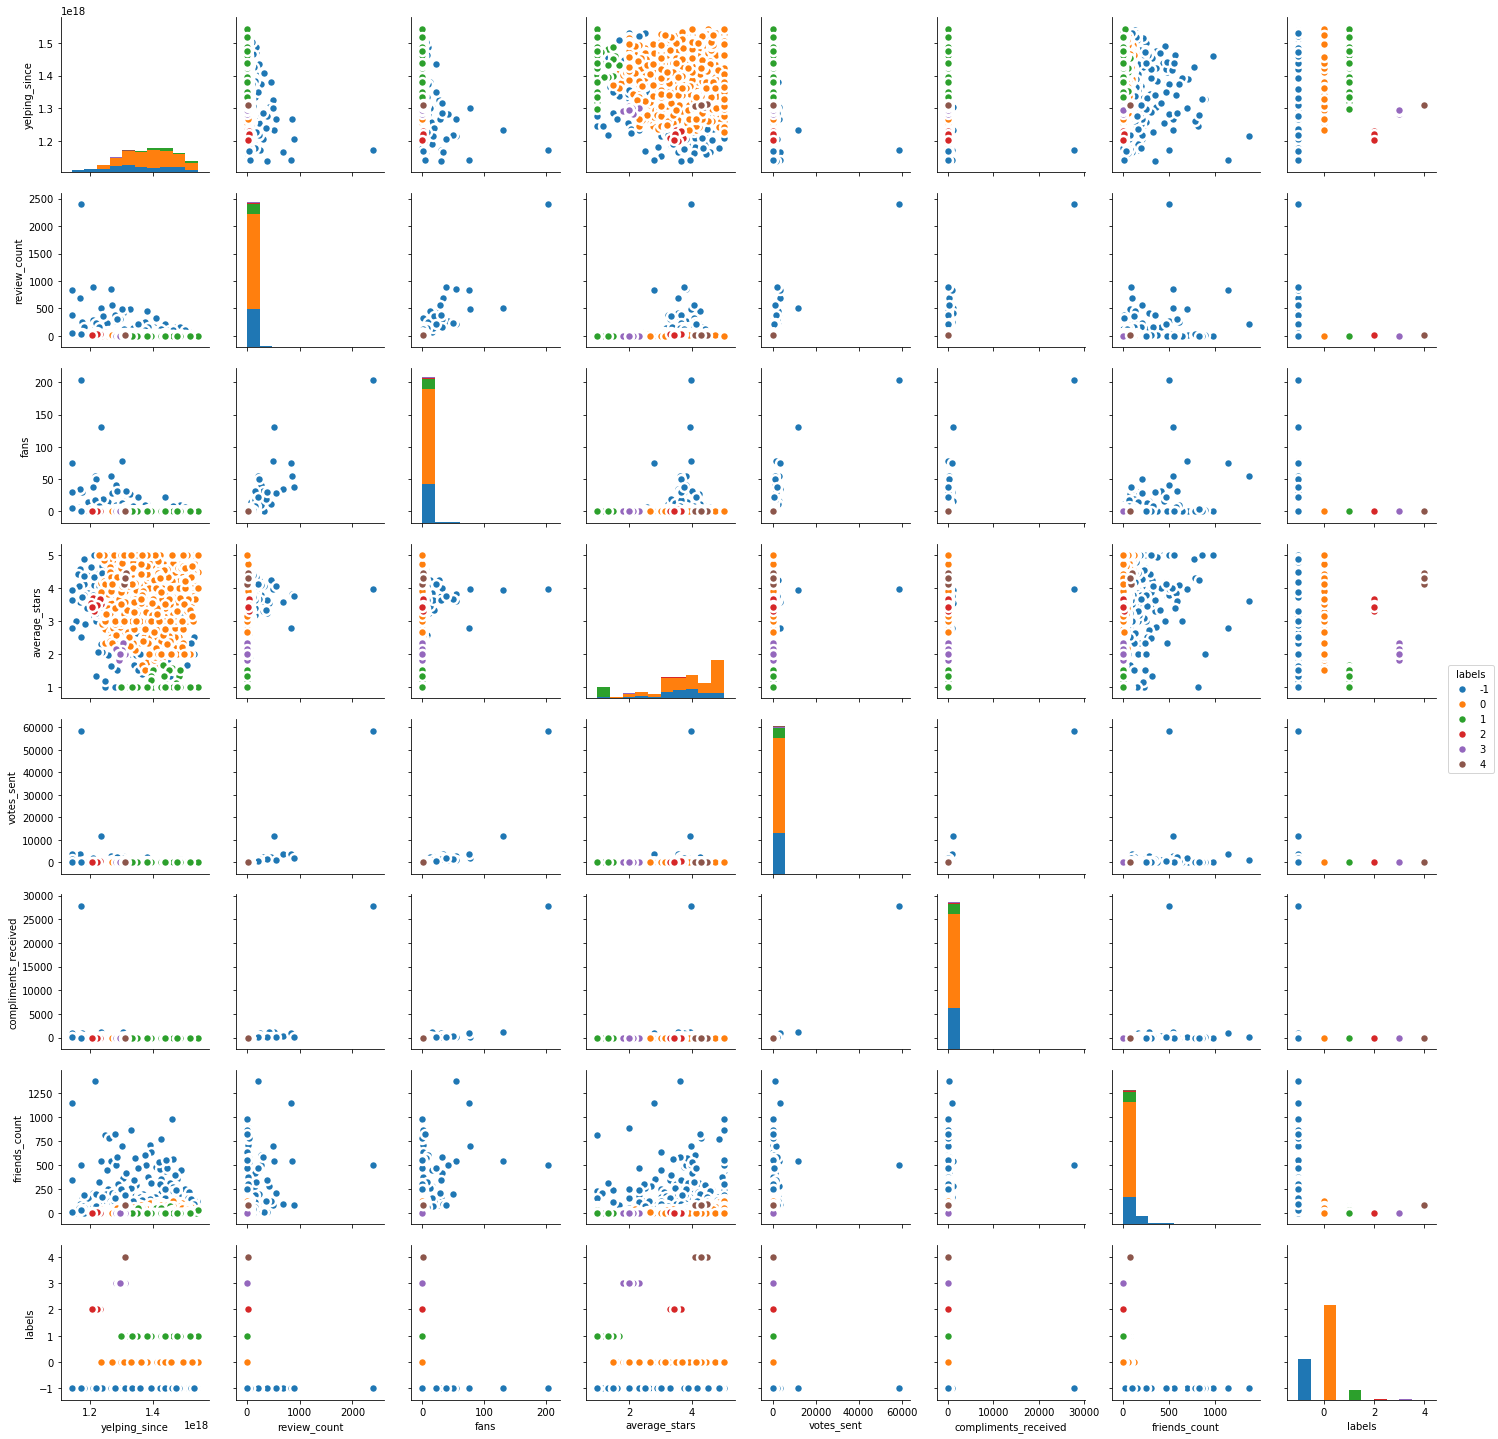

In [188]:
sns.pairplot(xTrain, kind="scatter", hue="labels", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [28]:
print(xTrain[labels==1])

         yelping_since  review_count  fans  average_stars  votes_sent  \
343681    1.444691e+18             3     0           3.67           0   
1497030   1.444017e+18            11     0           3.67           8   
34286     1.442188e+18            16     0           3.50          15   
579576    1.440009e+18             6     0           3.33           1   
998428    1.439427e+18             6     0           3.50           1   

         compliments_received  friends_count  
343681                      0            155  
1497030                     2            183  
34286                       0            148  
579576                      0            145  
998428                      0            135  


In [29]:
print(xTrain[labels==2])

         yelping_since  review_count  fans  average_stars  votes_sent  \
84169     1.369928e+18            51     1           3.27          14   
1053906   1.377034e+18            40     1           3.31          27   
376240    1.386103e+18            28     2           3.33          88   
565523    1.375649e+18            35     1           3.14          75   
1216427   1.377043e+18            34     0           3.57          15   

         compliments_received  friends_count  
84169                       2             13  
1053906                     1              7  
376240                     10             28  
565523                      4              1  
1216427                     0              1  


In [31]:
print(xTrain[labels==-1])

         yelping_since  review_count  fans  average_stars  votes_sent  \
186976    1.421098e+18             4     0           4.00          10   
274209    1.328982e+18            25     0           1.35          29   
660691    1.407551e+18            11     0           2.91          19   
495629    1.267829e+18            14     1           4.63          13   
835864    1.309008e+18           276    18           3.77        1214   
1165191   1.241191e+18           144    10           3.91         601   
1034620   1.297804e+18             3     2           2.00          22   
712472    1.212945e+18            15     0           2.56         137   
1044050   1.321409e+18            11     0           3.36          21   
1491850   1.326996e+18            21     0           3.52          23   
339701    1.460406e+18            19     1           4.21           7   
355080    1.466507e+18            24     0           3.72          56   
943191    1.265400e+18             4     0         